# <font color="#f47641">LP4
##  <font color="#DAC9A6"># preprocessing LP4 flow </font>  

In [1]:
import scipy.io
import pandas as pd
import numpy as np
import glob
import re
import pandas as pd
from sklearn import preprocessing 

In [2]:
df1 = pd.read_csv("LP4_TRAIN.csv", header=None)
df2 = pd.read_csv("LP4_TEST.csv", header=None)
print('train:',len(df1)/15)
print('train:',len(df2)/15)

train: 42.0
train: 75.0


In [3]:
all_data = pd.concat([df1,df2],axis=0)

In [4]:
list_of_lists = [[i]*15 for i in range(1,int((len(df1)+len(df2))/15)+1)]
flattened = [val for sublist in list_of_lists for val in sublist]
all_data.columns = ['batch','len','status','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5','sensor_6']
all_data['batch'] = flattened

In [5]:
df = pd.DataFrame(columns=['batch','sensor','value','status'])
df_list =[]
for i in range(1,int(len(all_data)/15)+1):
    df = pd.DataFrame(columns=['batch','sensor','value','status'])
    for h in range(1,7):

        sensor_name = 'sensor_' + str(h)
        value = all_data[all_data['batch'] == i].reset_index(drop = True)[sensor_name].tolist()
        value = preprocessing.minmax_scale(value,feature_range=(0,100))
        df.loc[h,'batch'] = i
        df.loc[h,'sensor'] = h
        df.loc[h,'value'] = value
        df.loc[h,'status'] = all_data[all_data['batch'] == i].reset_index(drop = True)['status'][0]
#         print(i)
    df_list.append(df)
res = pd.concat(df_list,axis=0,ignore_index=True)
res.head(20)


batch sensor                                              value status
0      1      1  [40.0, 40.0, 40.0, 40.0, 20.0, 40.0, 40.0, 20....      2
1      1      2  [75.0, 50.0, 50.0, 75.0, 50.0, 75.0, 75.0, 100...      2
2      1      3  [64.0, 64.0, 76.0, 64.0, 72.0, 64.0, 64.0, 64....      2
3      1      4  [42.85714285714286, 42.85714285714286, 42.8571...      2
4      1      5  [38.46153846153846, 38.46153846153846, 38.4615...      2
5      1      6  [0.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...      2
6      2      1  [33.33333333333333, 33.33333333333333, 33.3333...      2
7      2      2  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...      2
8      2      3  [44.736842105263165, 42.10526315789474, 44.736...      2
9      2      4  [60.0, 60.0, 60.0, 60.0, 40.0, 40.0, 60.0, 60....      2
10     2      5  [40.0, 20.0, 40.0, 40.0, 20.0, 20.0, 40.0, 60....      2
11     2      6  [50.0, 100.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50...      2
12     3      1  [100.0, 75.0, 100.0, 100.0, 100.0, 75.0, 100.0...      2
13     3      2  [66.66666666666667, 33.333333333333336, 66.666...      2
14     3      3  [47.82608695652174, 39.130434782608695, 47.826...      2
15     3      4  [77.77777777777777, 66.66666666666666, 77.7777...      2
16     3      5  [83.33333333333334, 83.33333333333334, 83.3333...      2
17     3      6  [0.0, 100.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 1...      2
18     4      1  [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60....      2
19     4      2  [50.0, 25.0, 25.0, 25.0, 50.0, 50.0, 50.0, 25....      2

In [18]:
res[res.batch == 48]

batch sensor                                              value status
282    48      1  [50.0, 100.0, 100.0, 50.0, 75.0, 50.0, 25.0, 5...      3
283    48      2  [57.142857142857146, 28.571428571428577, 28.57...      3
284    48      3  [72.22222222222223, 55.55555555555554, 100.0, ...      3
285    48      4  [33.33333333333334, 100.0, 83.33333333333334, ...      3
286    48      5  [37.5, 75.0, 62.5, 37.5, 100.0, 37.5, 50.0, 87...      3
287    48      6  [0.0, 0.0, 50.0, 0.0, 50.0, 50.0, 50.0, 50.0, ...      3

In [7]:
for i in range(1,3+1):
    res_ab = res[res['status']==i]
    print("status %s: %s"%(i,len(res_ab)/6))
    res_ab.to_json("LP4_"+str(i)+".json")

status 1: 72.0
status 2: 24.0
status 3: 21.0


In [8]:
import pandas as pd
import random 
import numpy as np

def dataset(is_whole):
    if is_whole==True:
        np.random.seed(1)
        json_list = ["LP4_1.json","LP4_2.json","LP4_3.json"]
        for k in json_list:

            df_status_1 = pd.read_json(k)

            df_status_1_train =np.random.choice(df_status_1.batch.unique(),round(len(df_status_1.batch.unique())*0.7),replace=False)#70%

            df_status_1_train=df_status_1[df_status_1.batch.isin(df_status_1_train)]
            df_status_1_left=df_status_1[~df_status_1.batch.isin(df_status_1_train)]
            df_status_1_validation =np.random.choice(df_status_1_left.batch.unique(),round(len(df_status_1.batch.unique())*0.15),replace=False)#15%
            df_status_1_validation=df_status_1_left[df_status_1_left.batch.isin(df_status_1_validation)]
            df_status_1_test=df_status_1_left[~df_status_1_left.batch.isin(df_status_1_validation)]

            df_status_1_train.to_json("LP4_"+"status_"+k[4]+"_train_all.json")

            df_status_1_validation.to_json("LP4_"+"status_"+k[4]+"_validation_all.json")

            df_status_1_test.to_json("LP4_"+"status_"+k[4]+"_test_all.json")

In [9]:
dataset(True)

In [10]:
def dataset_cross(is_whole):
    import pandas as pd
    import random 
    import numpy as np
    if is_whole==True:
        json_list = ["LP4_1.json","LP4_2.json","LP4_3.json"]
        for k in json_list:
            np.random.seed(1)
            df_status_1 = pd.read_json(k)

    #         df_abnormal = pd.read_json("network_abnormal.json")
            np.random.seed(1)
    #=====================LP5_1
            status_1_coross_1 =np.random.choice(df_status_1.batch.unique(),round(len(df_status_1.batch.unique())*0.2),replace=False)#20%
            df_status_1_cross_1=df_status_1[df_status_1.batch.isin(status_1_coross_1)]
            df_status_1_cross_1["cross"]=1
            df_status_1_left=df_status_1[~df_status_1.batch.isin(status_1_coross_1)]

            status_1_coross_2 =np.random.choice(df_status_1_left.batch.unique(),round(len(df_status_1.batch.unique())*0.2),replace=False)
            df_status_1_cross_2=df_status_1_left[df_status_1_left.batch.isin(status_1_coross_2)]
            df_status_1_cross_2["cross"]=2
            df_status_1_left=df_status_1_left[~df_status_1_left.batch.isin(status_1_coross_2)]

            status_1_coross_3 =np.random.choice(df_status_1_left.batch.unique(),round(len(df_status_1.batch.unique())*0.2),replace=False)
            df_status_1_cross_3=df_status_1_left[df_status_1_left.batch.isin(status_1_coross_3)]
            df_status_1_cross_3["cross"]=3
            df_status_1_left=df_status_1_left[~df_status_1_left.batch.isin(status_1_coross_3)]

            status_1_coross_4 =np.random.choice(df_status_1_left.batch.unique(),round(len(df_status_1.batch.unique())*0.2),replace=False)
            df_status_1_cross_4=df_status_1_left[df_status_1_left.batch.isin(status_1_coross_4)]
            df_status_1_cross_4["cross"]=4
            df_status_1_cross_5=df_status_1_left[~df_status_1_left.batch.isin(status_1_coross_4)]
            df_status_1_cross_5["cross"]=5



            df_status_1_cross_1.to_json("LP4_"+"status_"+k[4]+"_all_cross_1.json")
            df_status_1_cross_2.to_json("LP4_"+"status_"+k[4]+"_all_cross_2.json")
            df_status_1_cross_3.to_json("LP4_"+"status_"+k[4]+"_all_cross_3.json")
            df_status_1_cross_4.to_json("LP4_"+"status_"+k[4]+"_all_cross_4.json")
            df_status_1_cross_5.to_json("LP4_"+"status_"+k[4]+"_all_cross_5.json")


            print(len(df_status_1_cross_1),len(df_status_1_cross_2),len(df_status_1_cross_3),len(df_status_1_cross_4),len(df_status_1_cross_5))


In [11]:
dataset_cross(True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

84 84 84 84 96
30 30 30 30 24
24 24 24 24 30


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [12]:
def transformation(is_whole,is_cross,method):
    from pyts.visualization import plot_gasf,plot_gadf,plot_mtf,plot_recurrence_plots
    import matplotlib.pyplot as plt
    import os
    import pandas as pd
    import numpy as np
    from PIL import Image

    
    if is_cross==False:
        is_train=["train","test","validation"]
        is_normal=["status_1","status_2","status_3"]
        if is_whole==True:
            path="_all"
        else:
            path=""
        for a in is_train:
            for b in is_normal:
                x= pd.read_json("LP4_"+b+"_"+a+path+".json")
                x = x[['batch','sensor','status','value']]
                for i in range(len(x)):
                    x_time=np.array(x.iloc[:,3].values[i])
                    x_class= str(x.iloc[:,0].values[i])+'_'+str(x.iloc[:,1].values[i])
                    if method.lower() != "recurrence_plots":

                        locals()["plot_"+method.lower()](x_time,
                                                 cmap="rainbow",
                                                 image_size=15,
                                                 output_file="LP4_img"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")
                    else:
                        locals()["plot_"+method.lower()](x_time,
                                                 output_file="LP4_img"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")

                for i in range(len(x)):
                    x_time=np.array(x.iloc[:,3].values[i])
                    x_class= str(x.iloc[:,0].values[i])+'_'+str(x.iloc[:,1].values[i])
                    img = Image.open("LP4_img"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")
                    img=img.crop((20, 3, 237, 220))
                    img.thumbnail((128,128))  #resize
                    img.save("LP4_img"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")
    else:
        if is_whole==True:
            path="_all"
        else:
            path=""
        cross=["1","2","3","4","5"]
        is_normal=["status_1","status_2","status_3"]
        for a in cross:
            for b in is_normal:
                x= pd.read_json("LP4_"+b+path+"_cross_"+a+".json")
                x = x[['batch','sensor','status','value']]
                for i in range(len(x)):
                    x_time=np.array(x.iloc[:,3].values[i])
                    x_class= str(x.iloc[:,0].values[i])+'_'+str(x.iloc[:,1].values[i])
                    if method.lower() != "recurrence_plots":

                        locals()["plot_"+method.lower()](x_time,
                                                 cmap="rainbow",
                                                 image_size=15,
                                                 output_file="LP4_img_cross"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")
                    else:
                        locals()["plot_"+method.lower()](x_time,
                                                 output_file="LP4_img_cross"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")

                for i in range(len(x)):
                    x_time=np.array(x.iloc[:,3].values[i])
                    x_class= str(x.iloc[:,0].values[i])+'_'+str(x.iloc[:,1].values[i])
                    img = Image.open("LP4_img_cross"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")
                    img=img.crop((20, 3, 237, 220))
                    img.thumbnail((128,128))  #resize
                    img.save("LP4_img_cross"+path+"/"+method+"/"+a+"/"+b+"/"+x_class+".png")


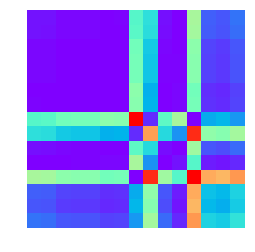

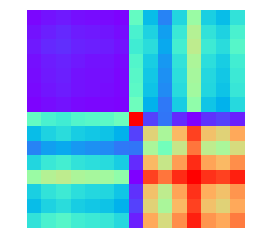

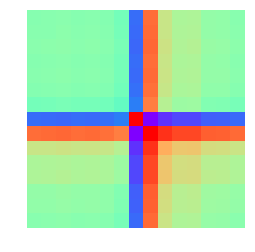

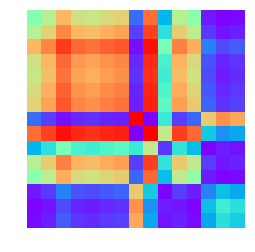

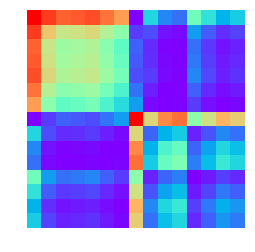

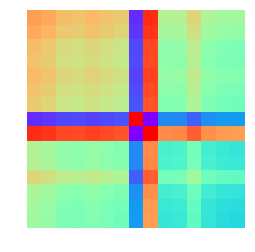

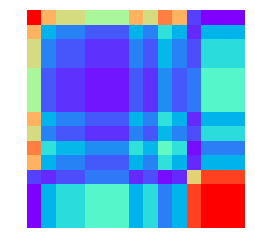

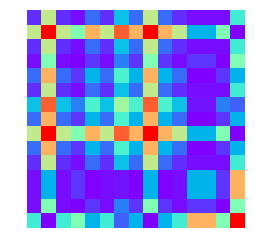

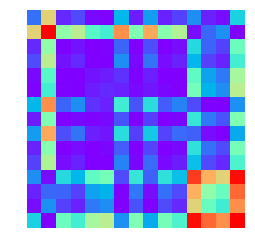

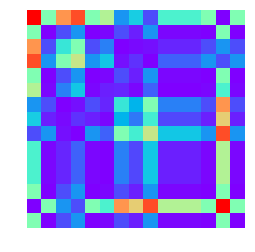

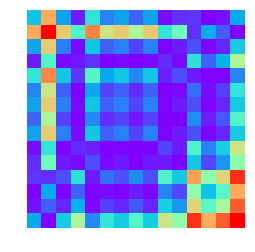

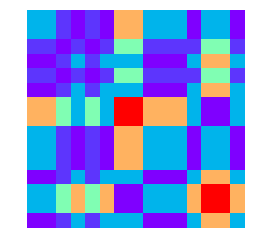

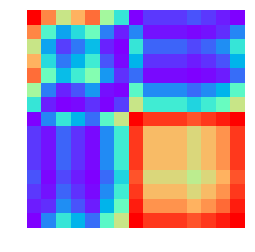

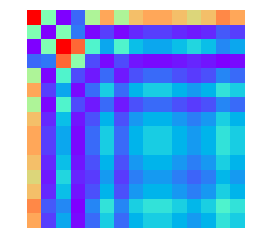

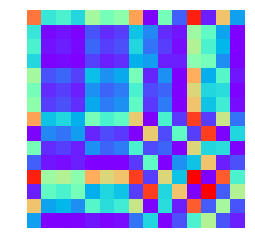

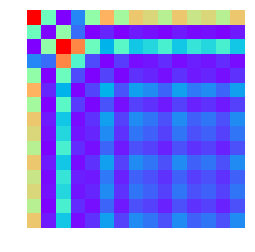

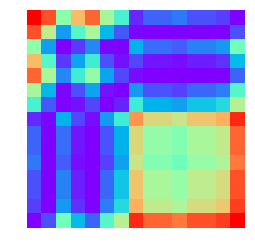

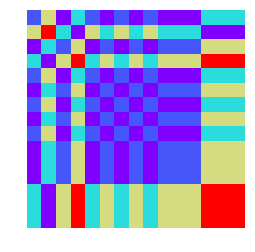

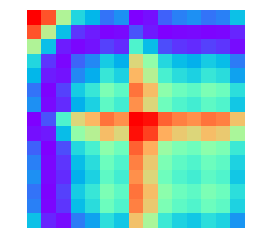

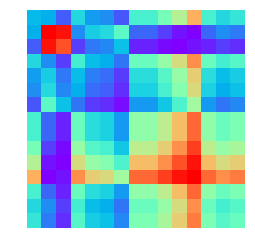

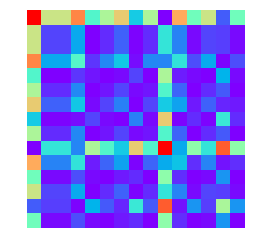

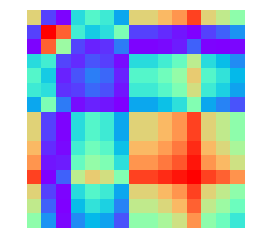

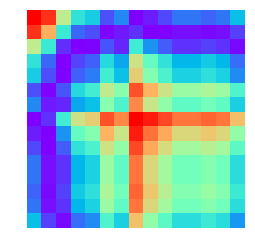

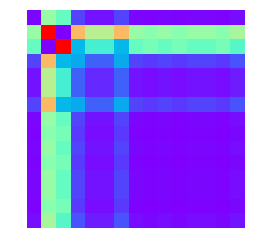

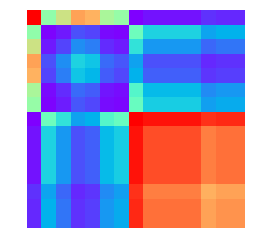

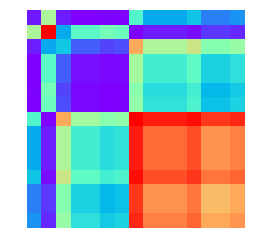

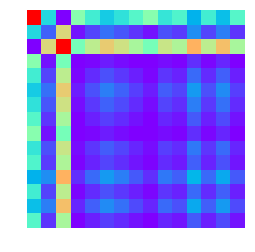

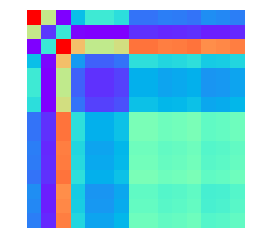

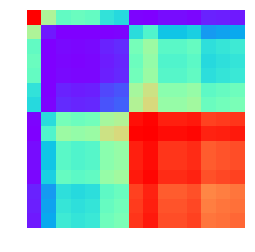

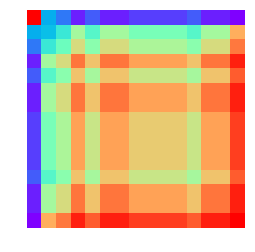

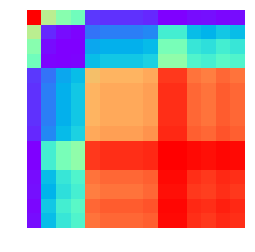

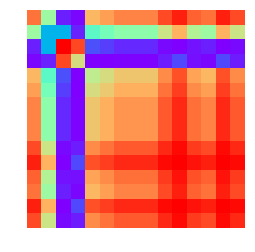

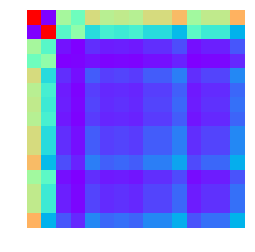

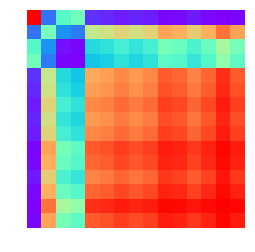

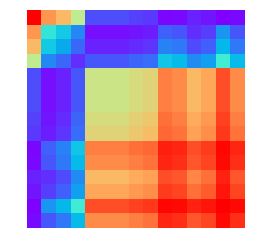

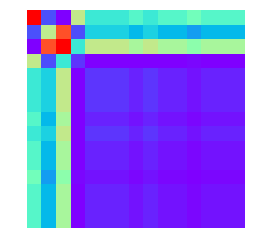

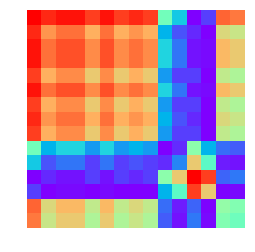

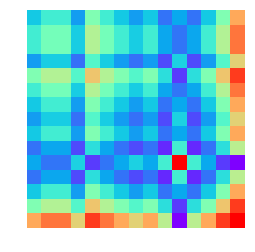

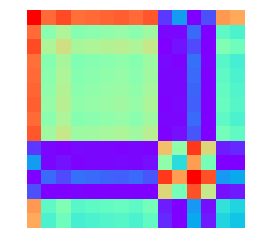

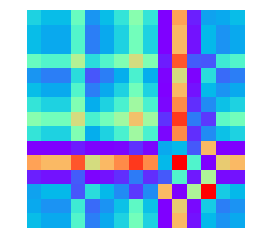

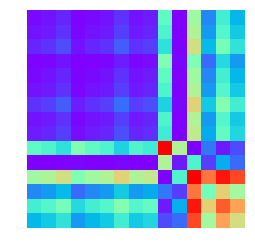

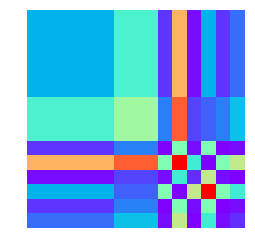

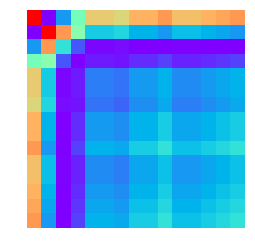

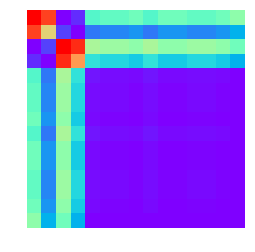

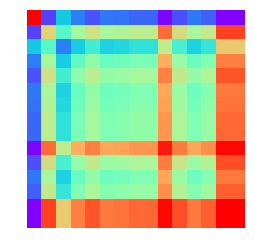

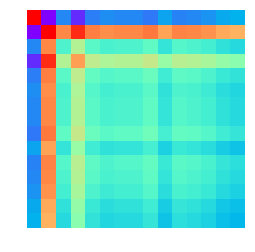

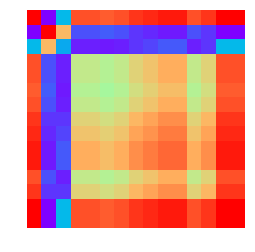

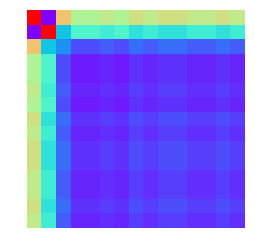

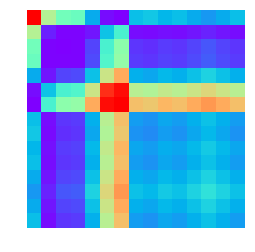

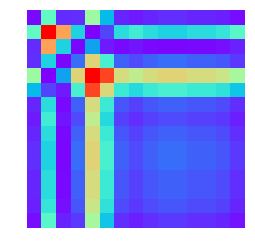

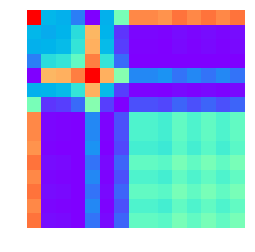

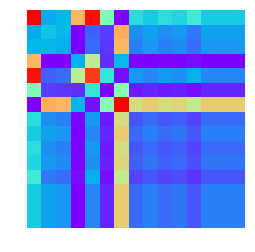

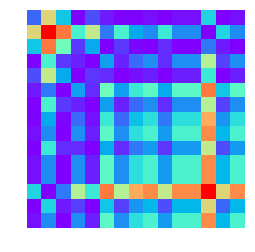

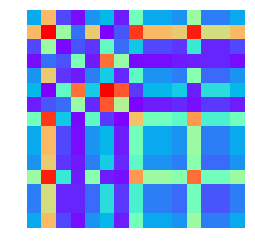

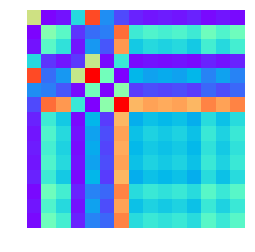

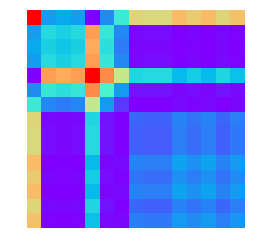

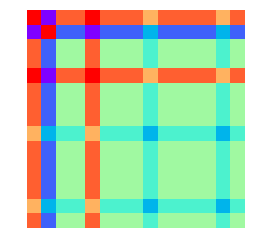

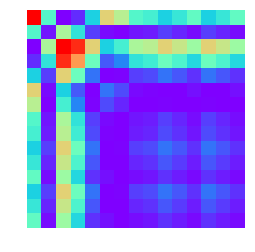

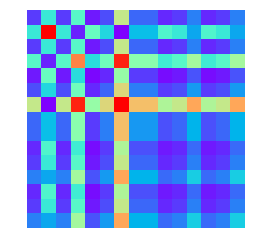

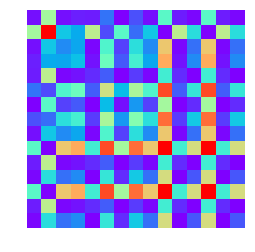

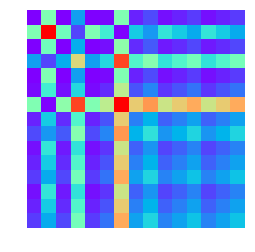

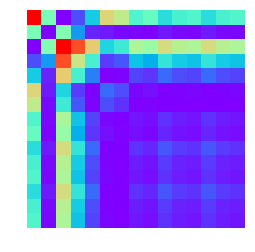

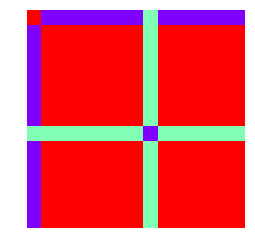

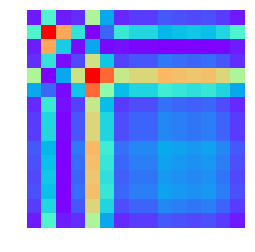

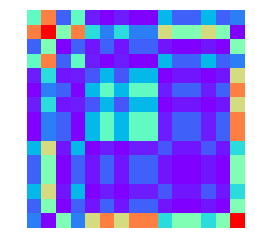

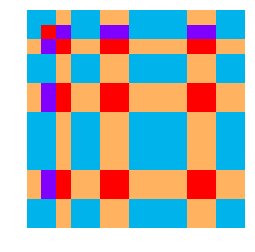

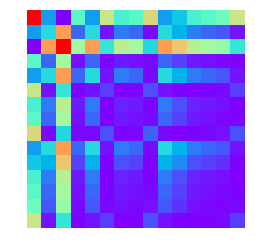

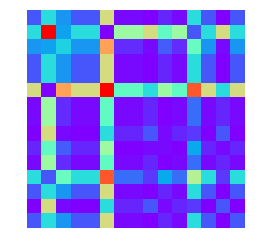

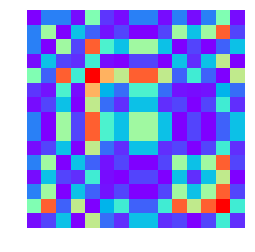

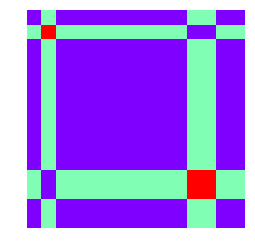

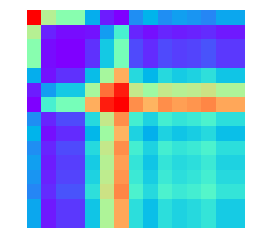

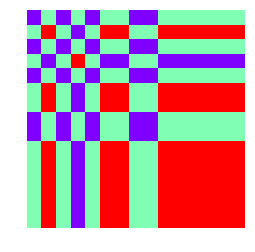

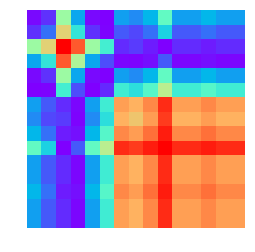

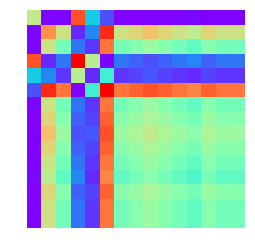

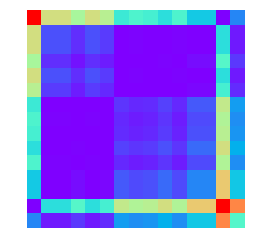

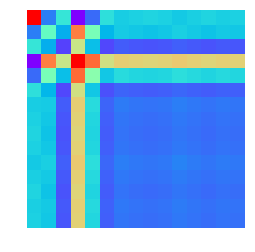

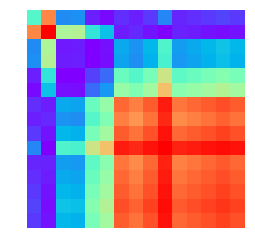

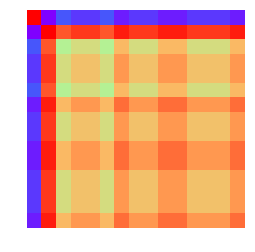

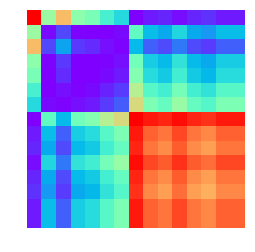

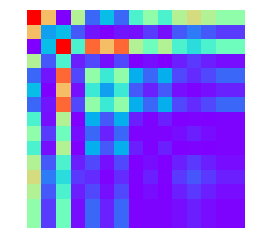

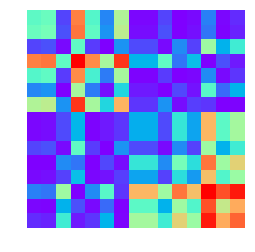

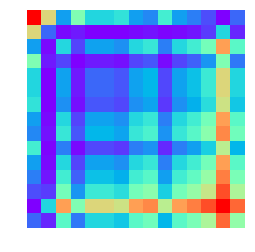

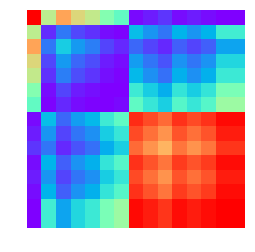

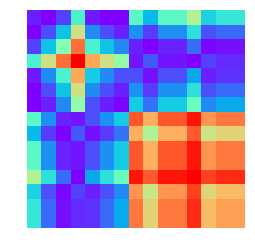

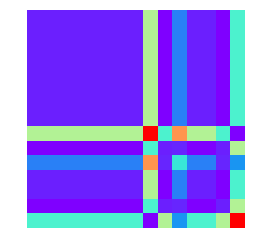

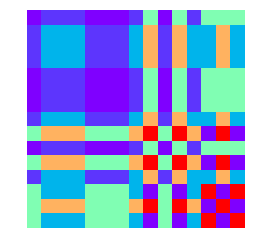

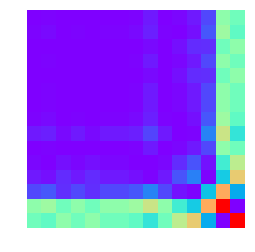

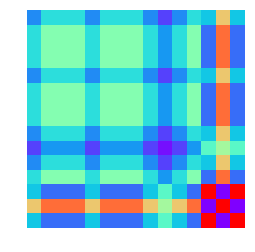

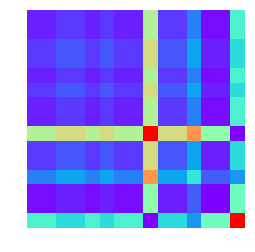

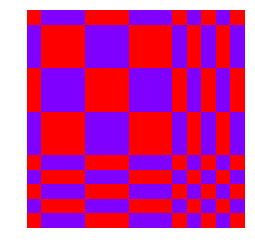

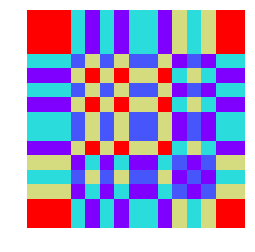

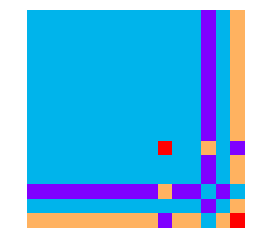

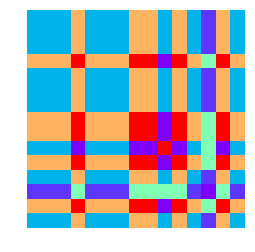

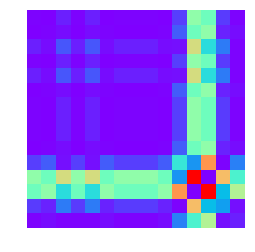

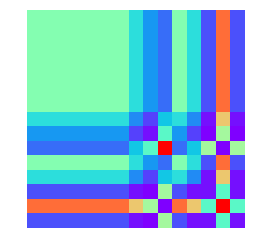

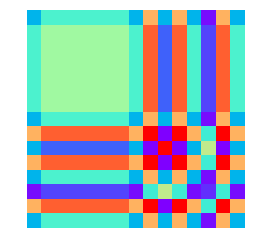

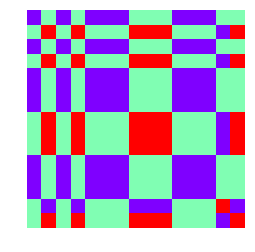

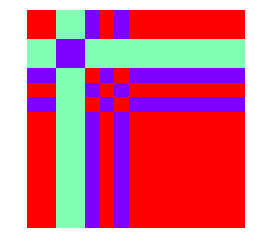

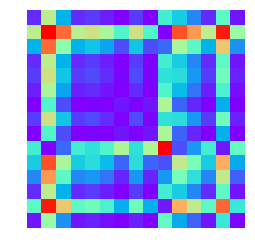

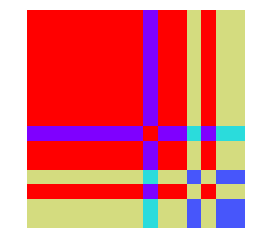

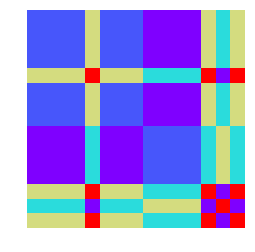

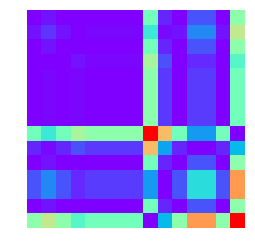

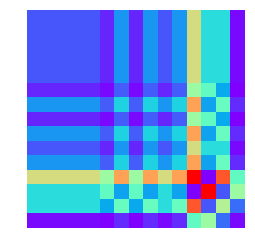

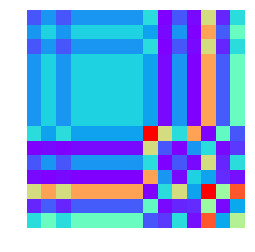

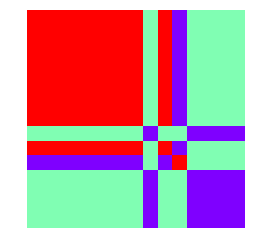

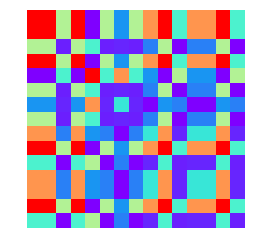

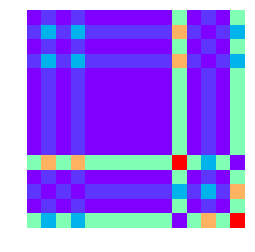

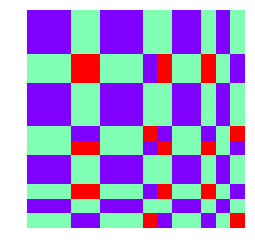

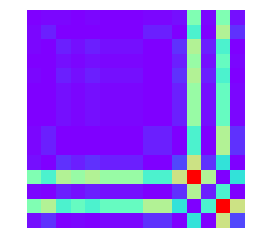

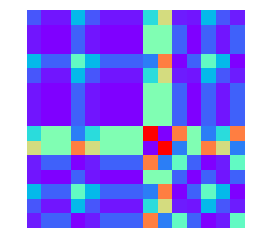

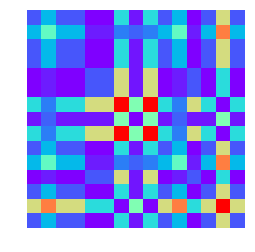

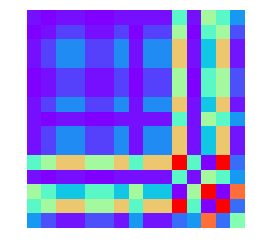

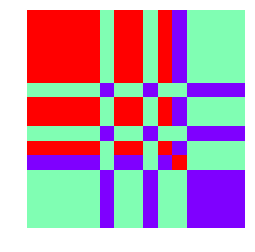

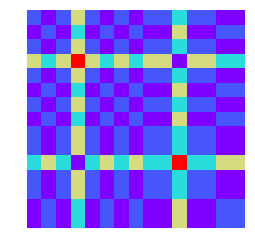

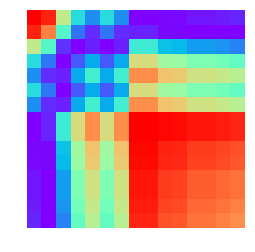

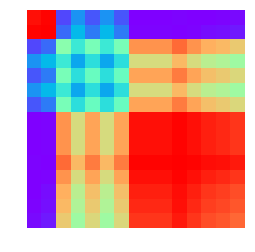

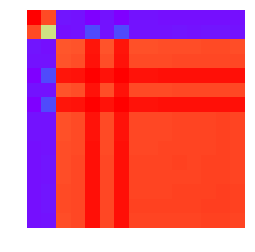

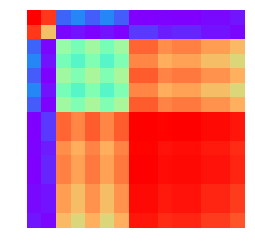

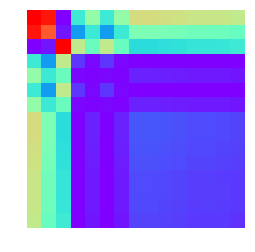

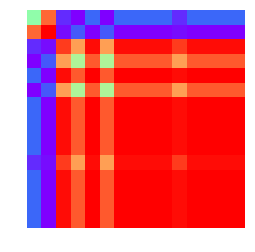

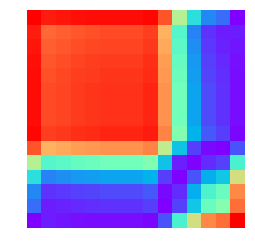

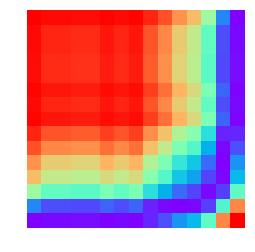

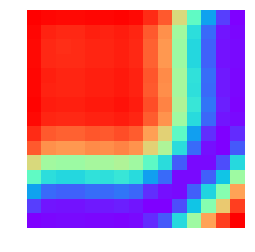

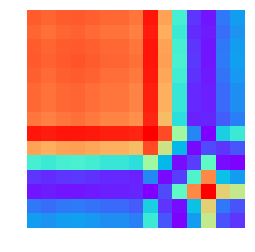

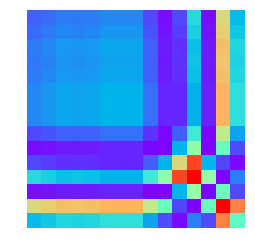

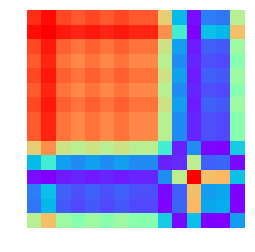

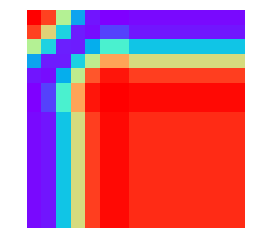

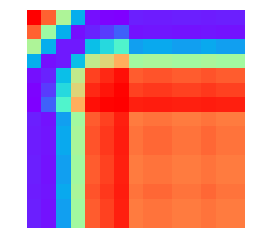

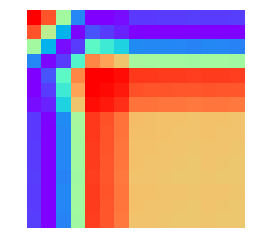

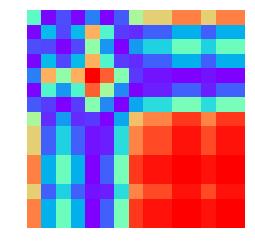

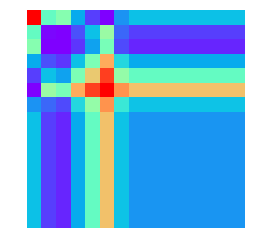

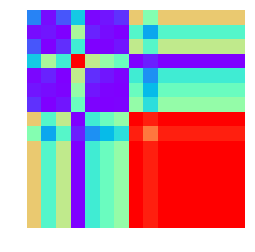

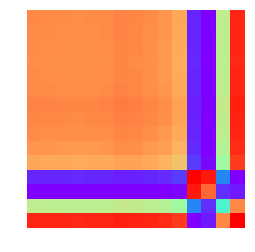

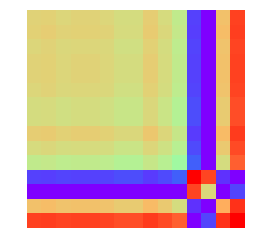

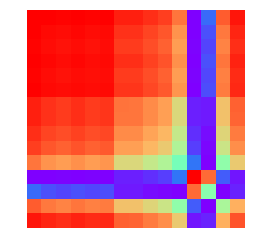

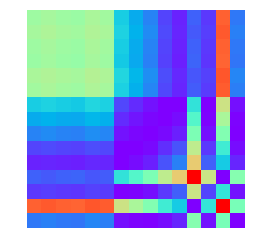

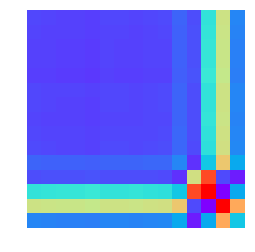

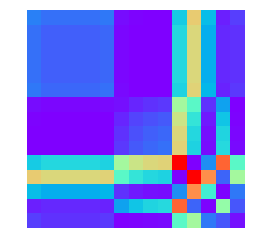

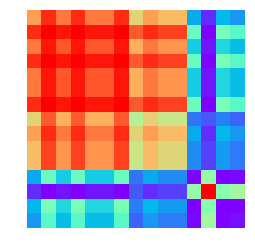

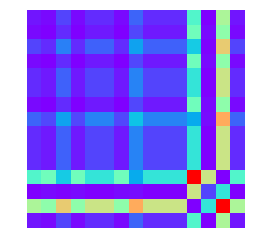

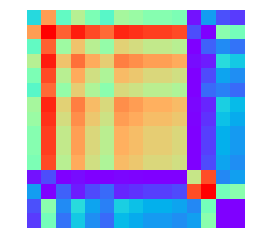

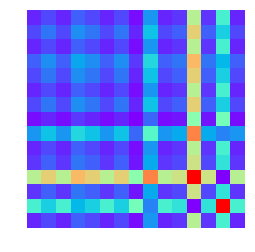

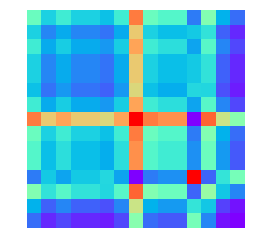

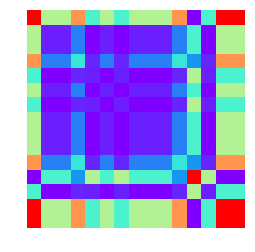

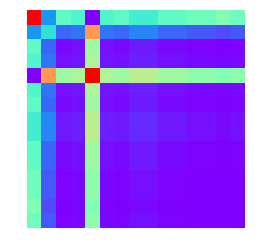

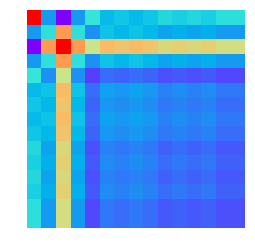

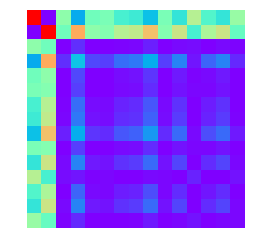

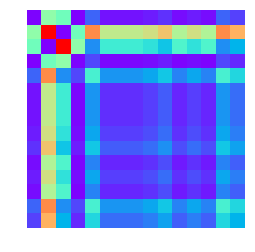

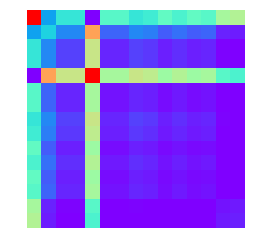

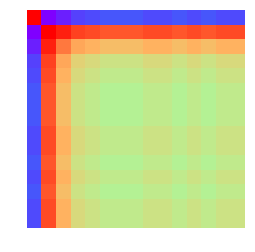

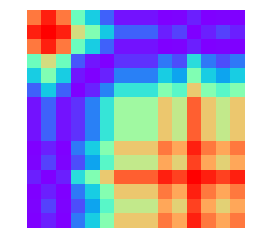

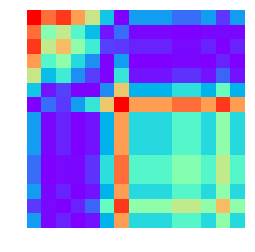

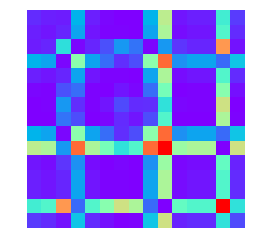

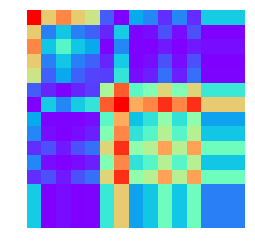

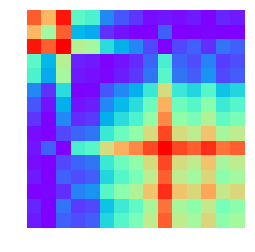

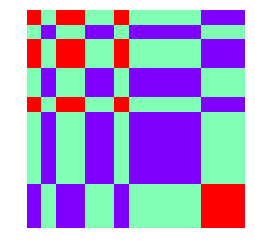

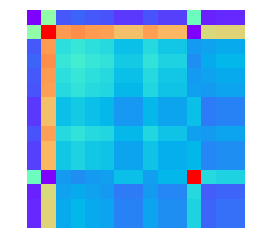

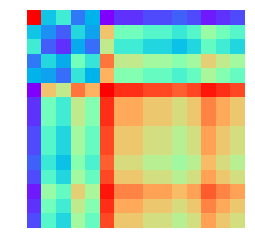

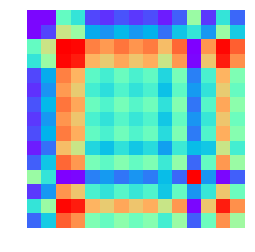

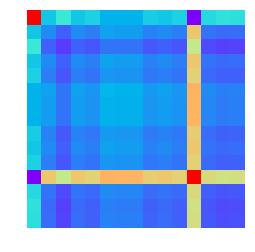

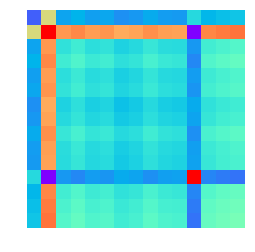

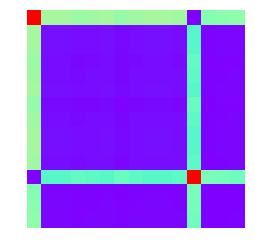

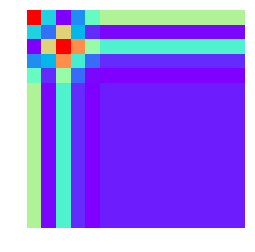

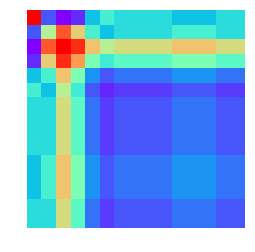

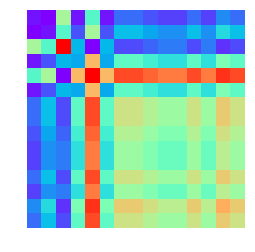

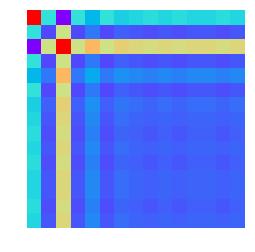

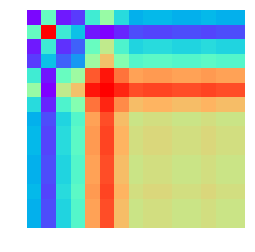

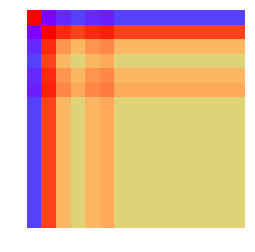

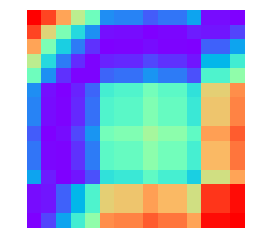

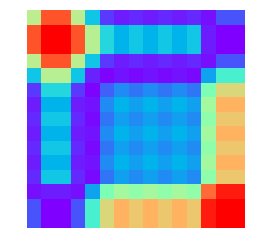

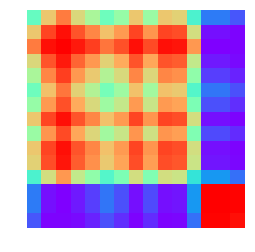

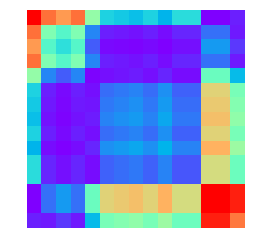

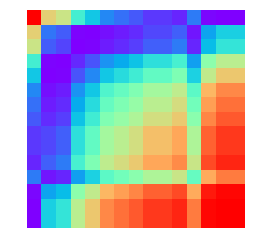

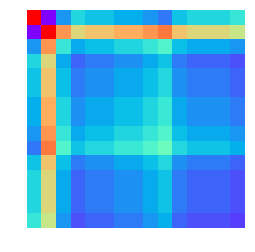

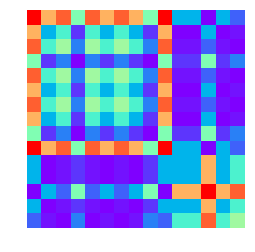

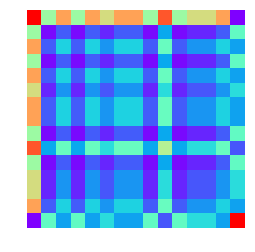

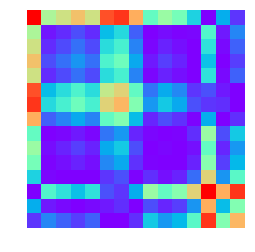

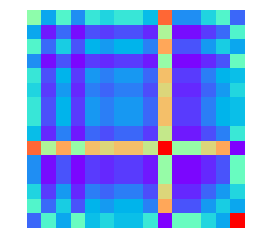

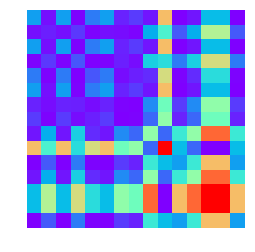

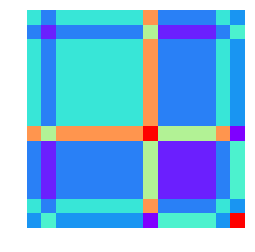

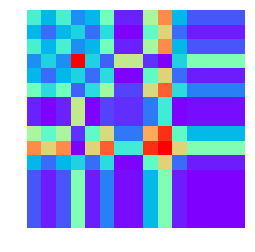

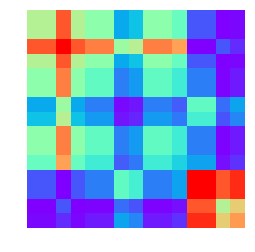

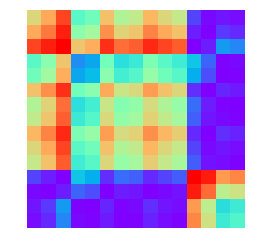

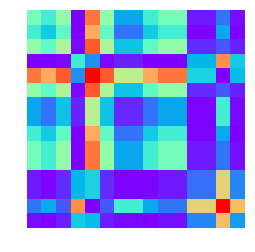

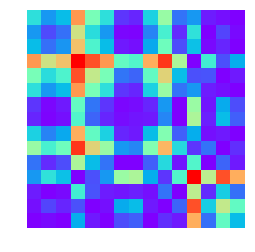

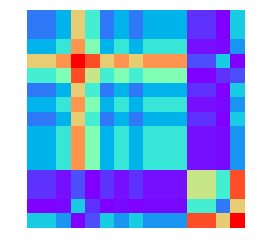

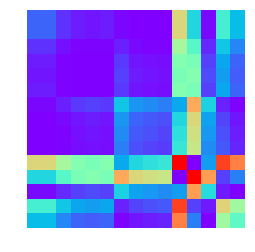

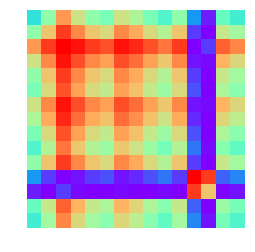

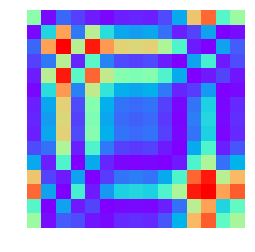

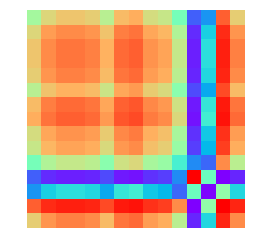

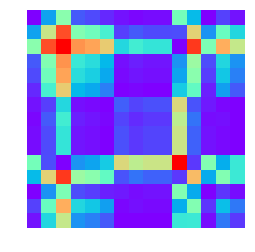

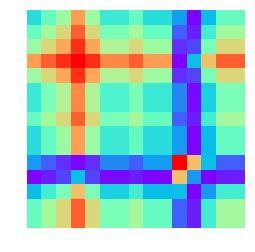

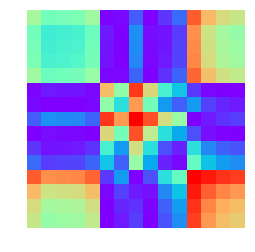

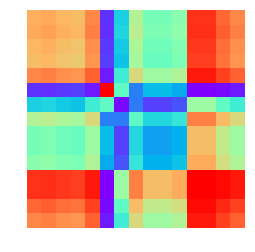

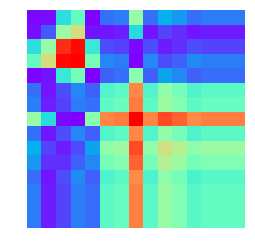

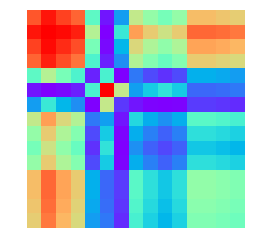

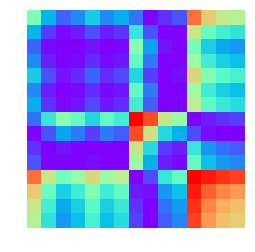

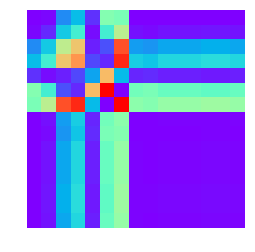

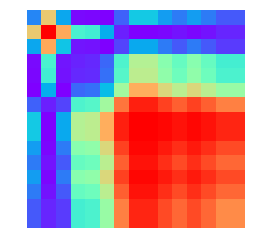

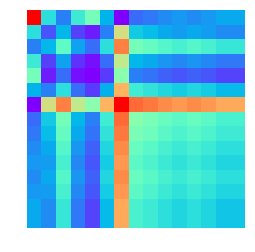

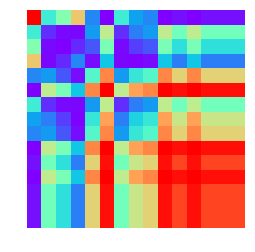

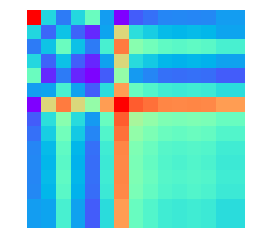

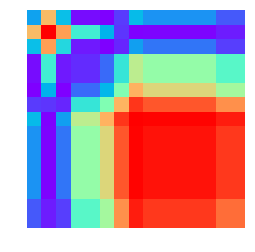

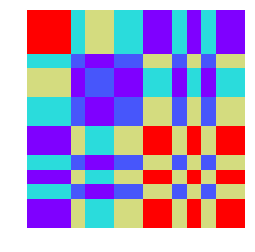

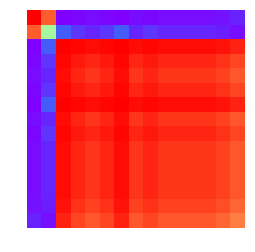

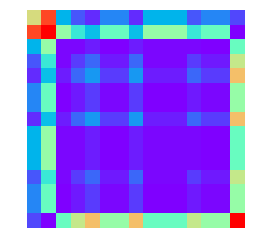

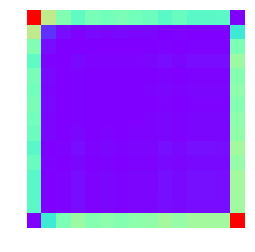

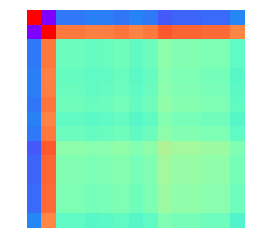

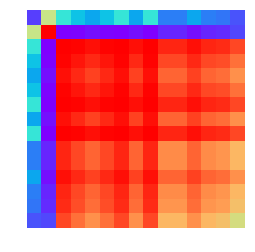

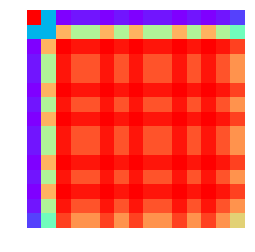

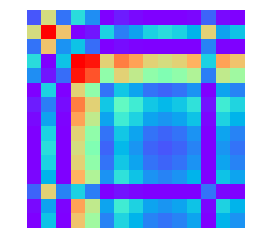

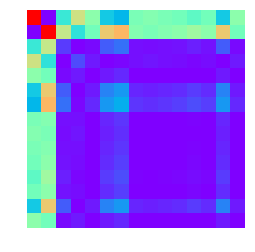

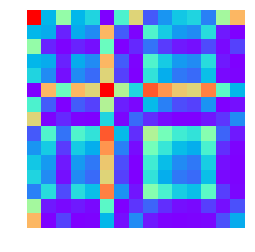

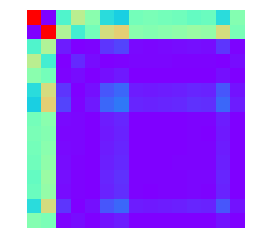

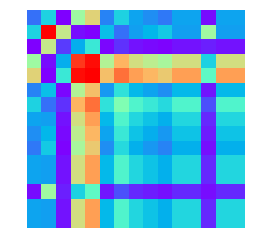

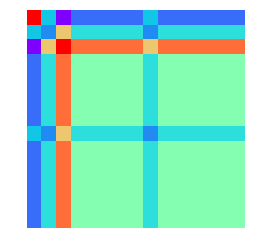

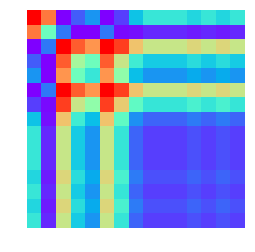

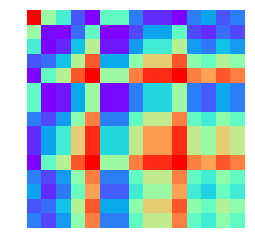

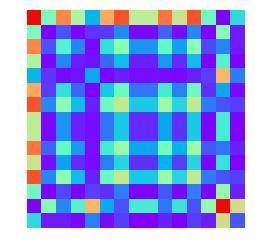

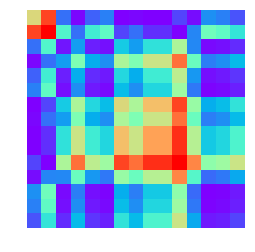

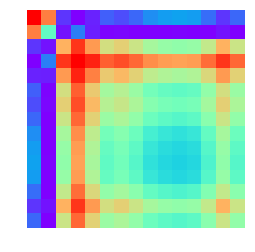

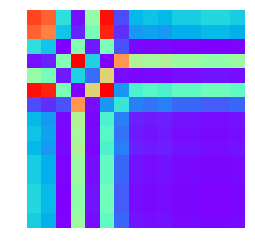

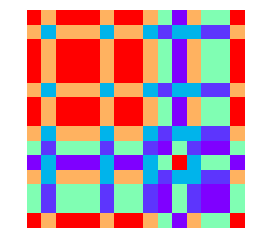

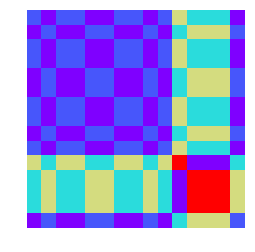

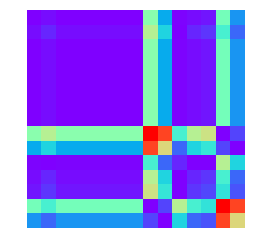

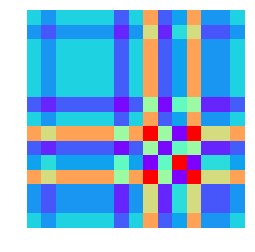

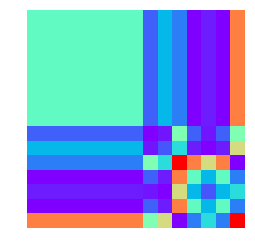

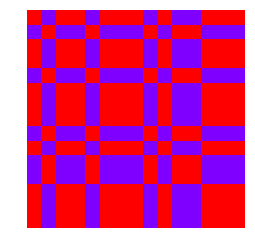

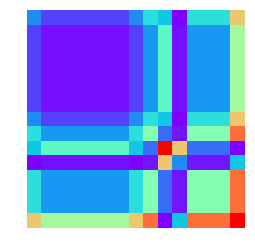

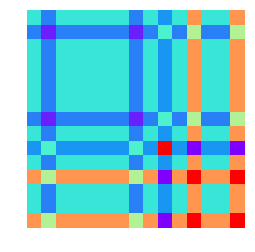

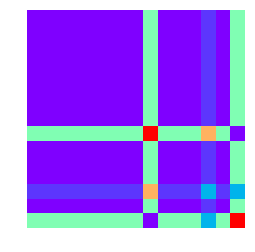

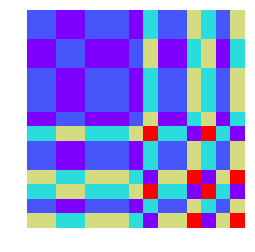

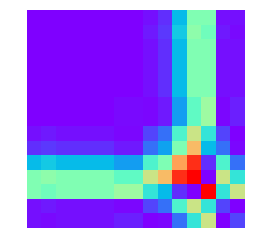

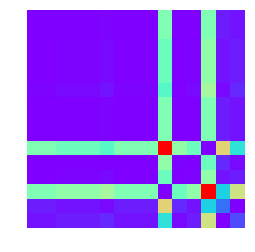

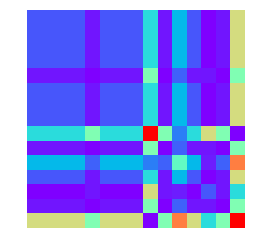

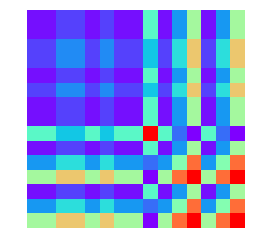

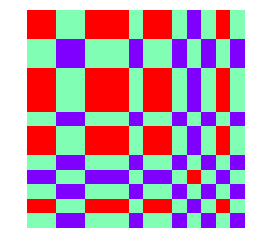

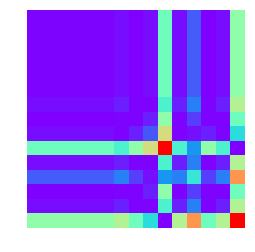

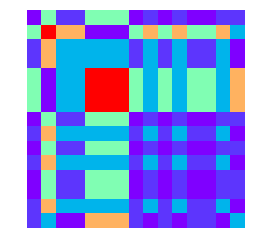

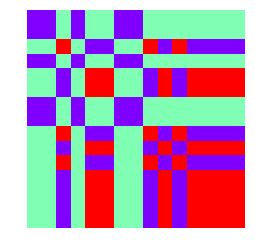

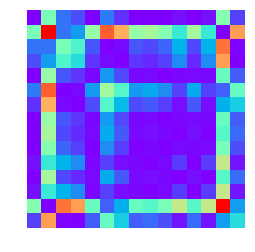

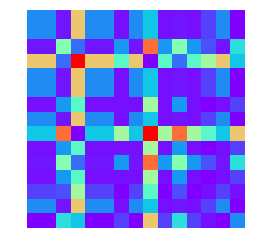

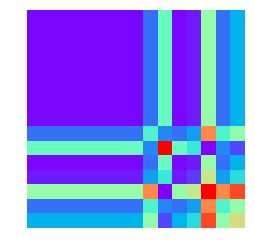

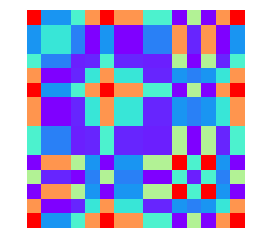

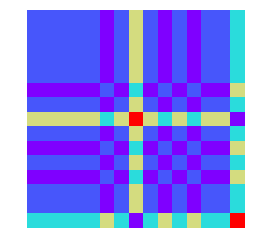

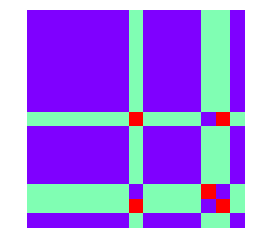

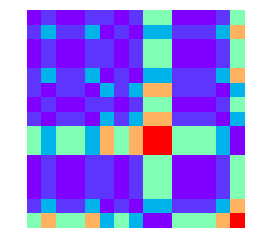

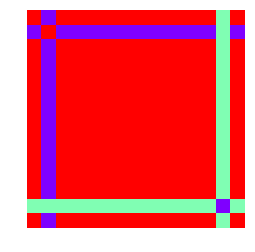

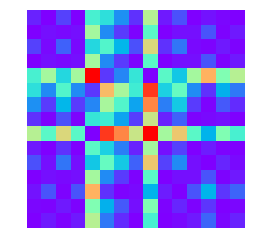

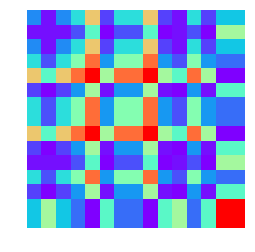

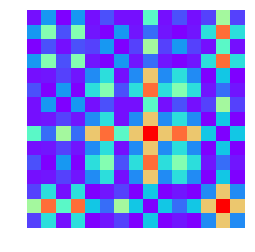

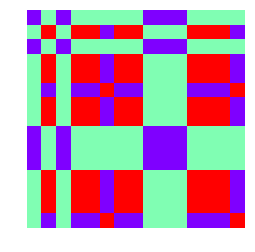

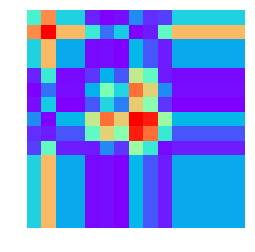

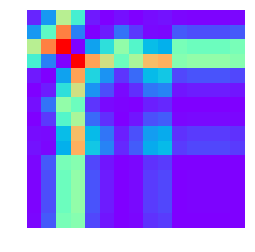

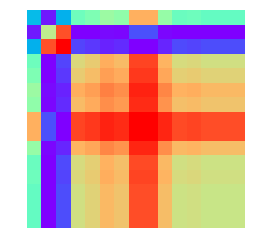

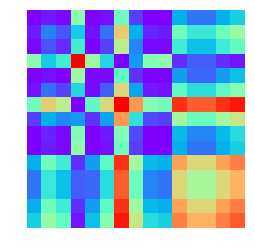

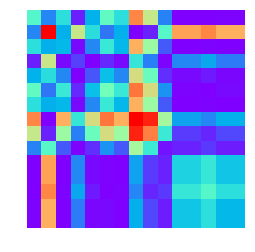

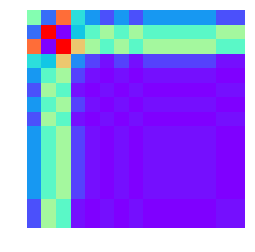

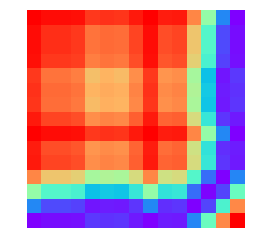

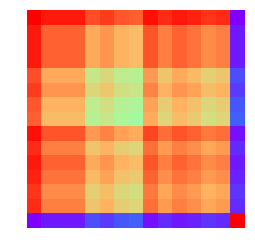

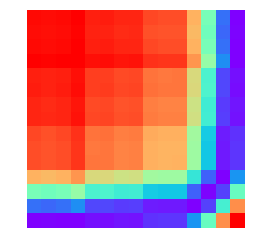

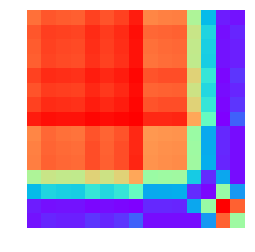

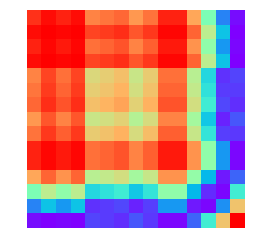

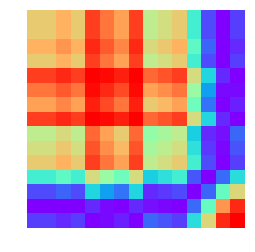

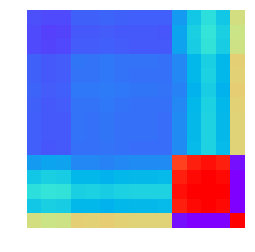

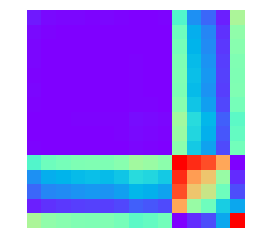

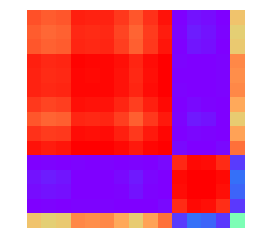

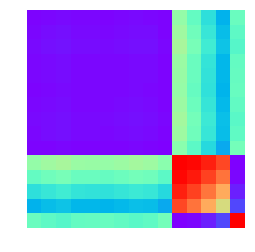

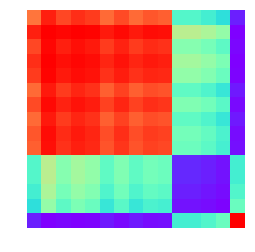

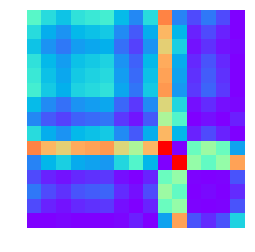

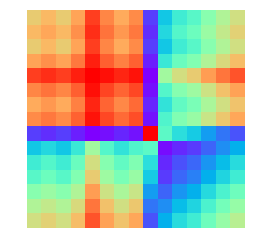

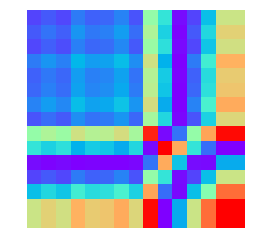

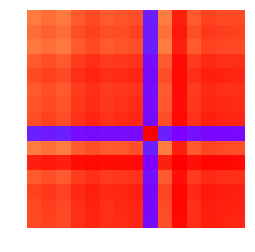

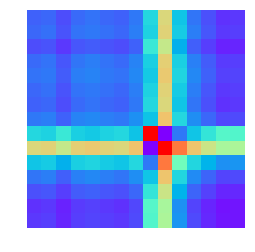

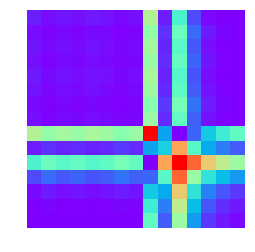

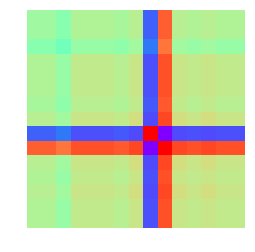

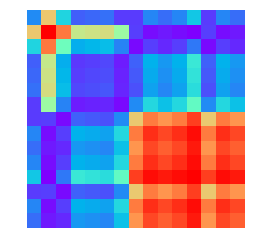

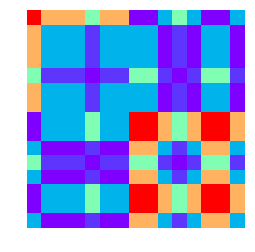

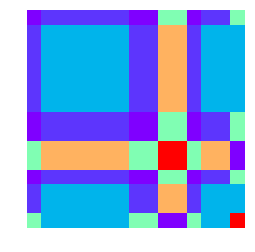

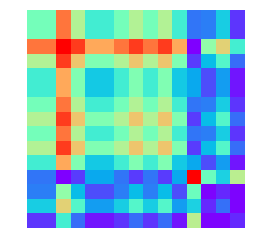

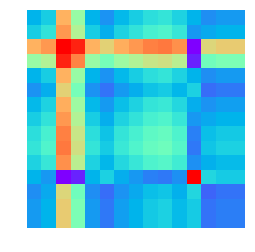

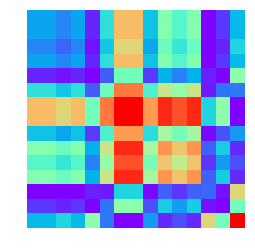

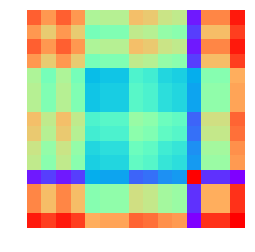

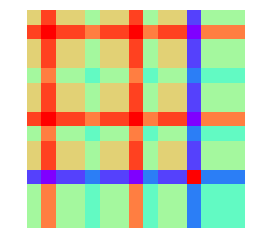

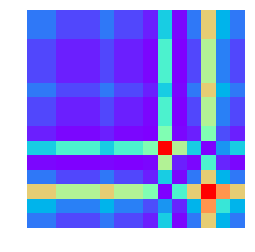

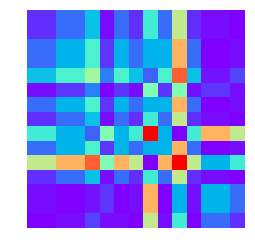

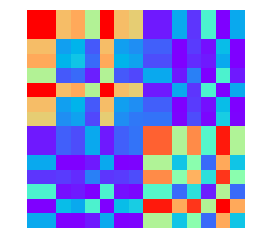

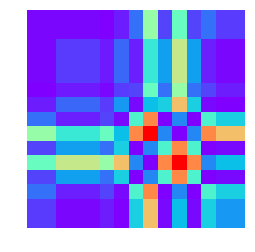

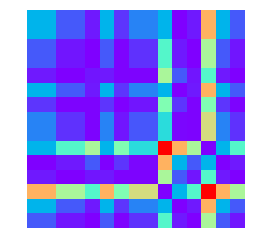

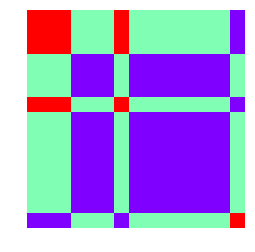

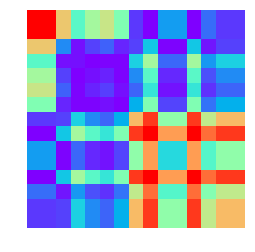

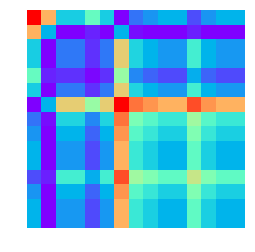

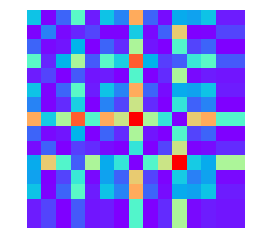

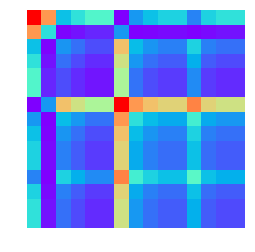

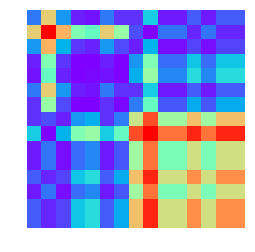

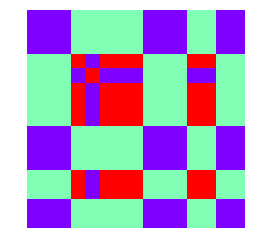

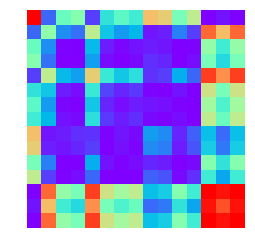

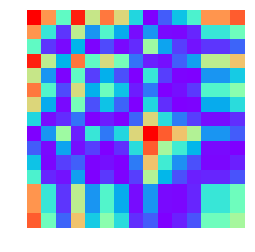

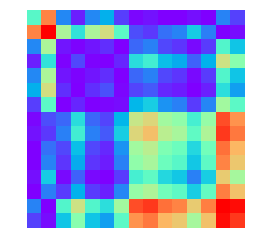

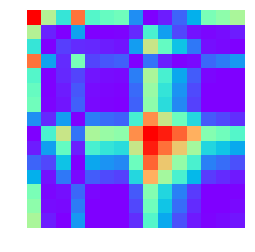

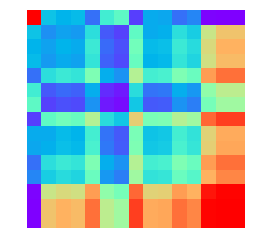

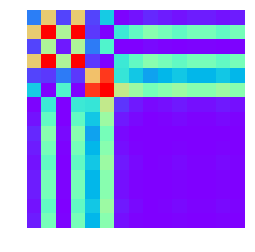

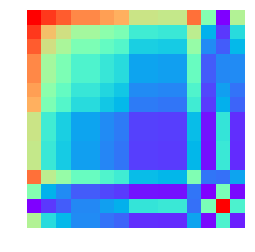

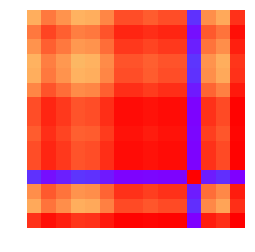

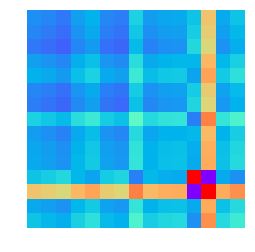

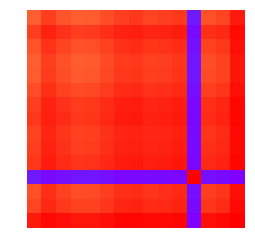

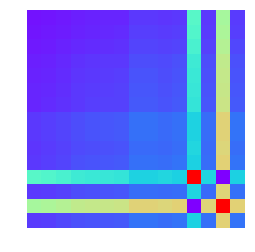

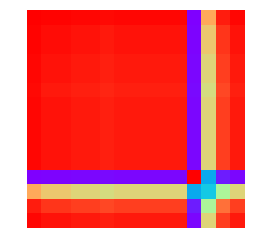

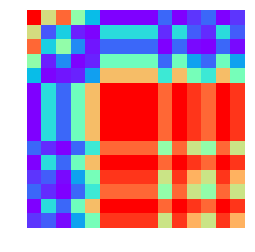

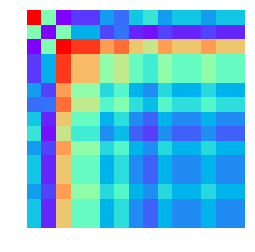

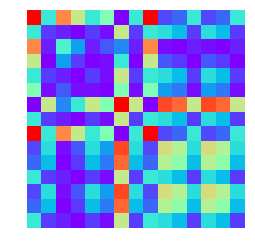

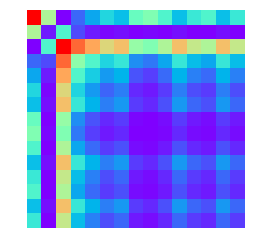

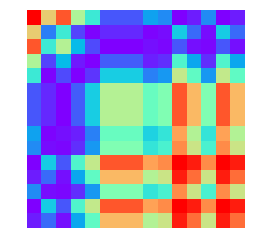

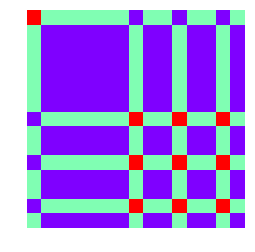

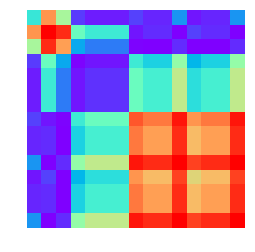

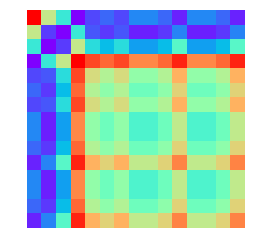

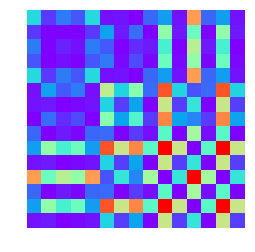

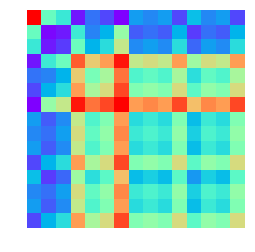

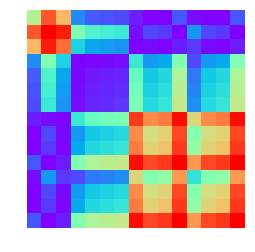

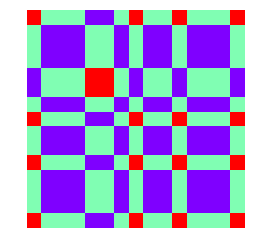

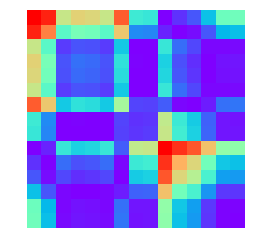

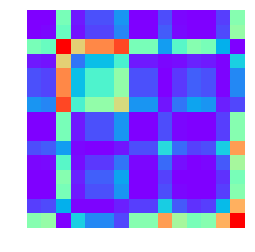

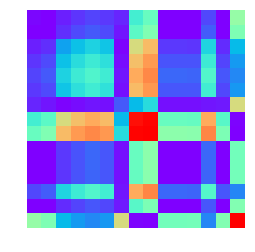

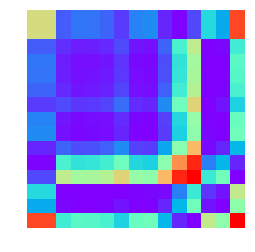

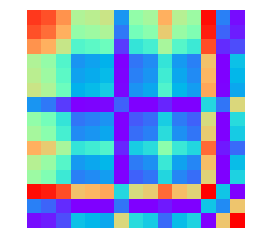

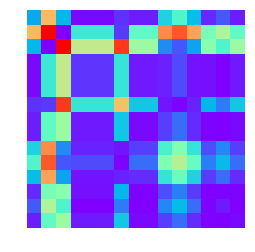

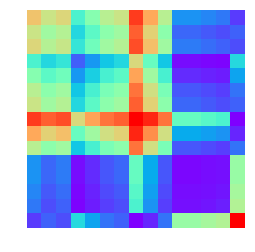

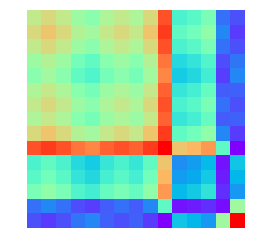

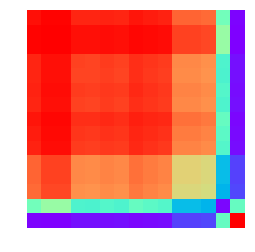

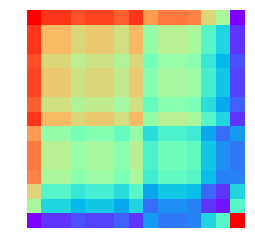

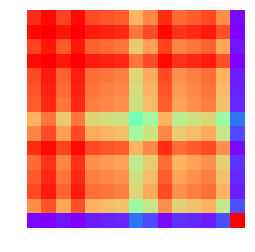

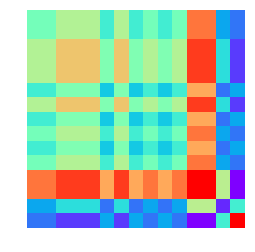

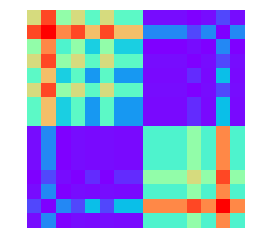

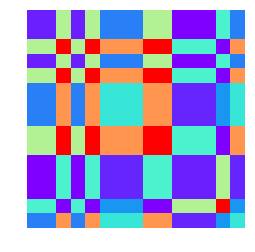

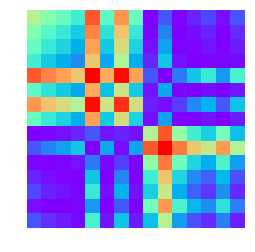

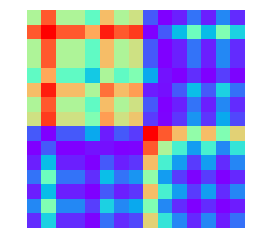

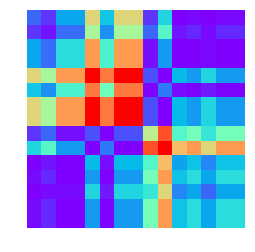

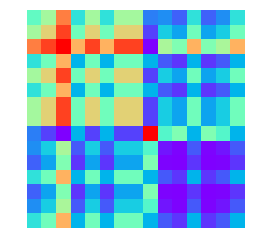

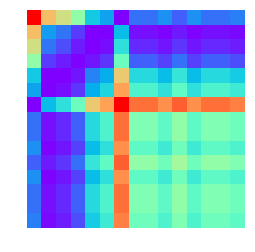

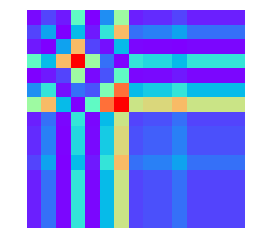

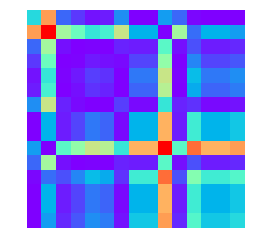

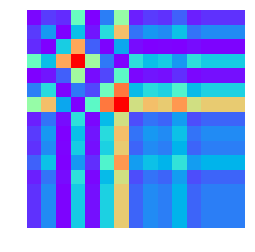

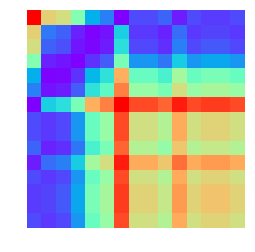

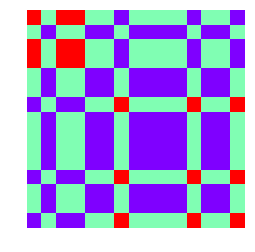

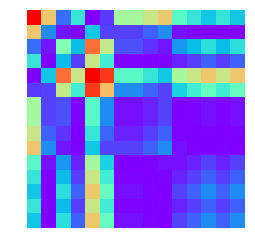

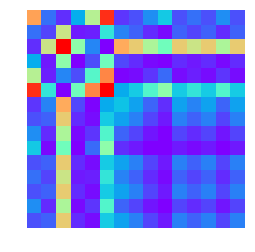

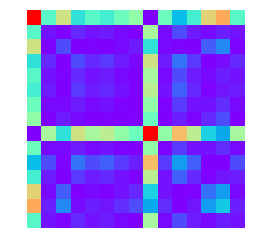

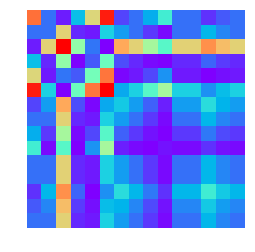

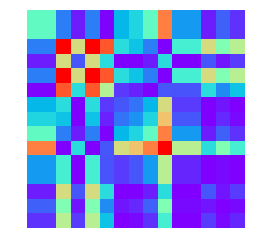

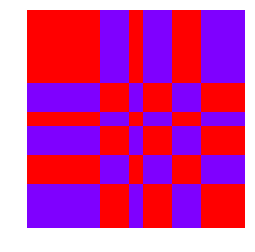

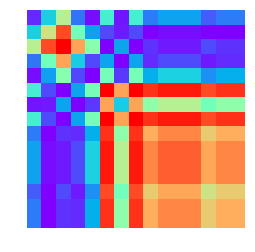

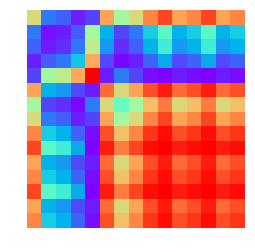

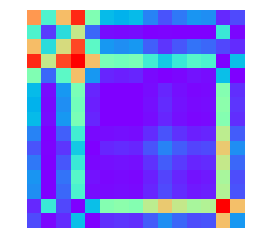

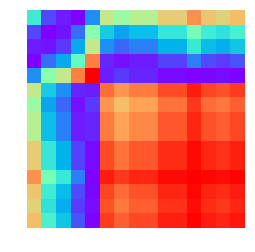

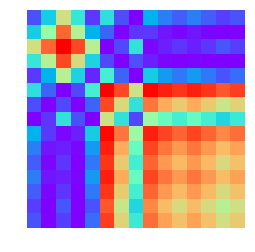

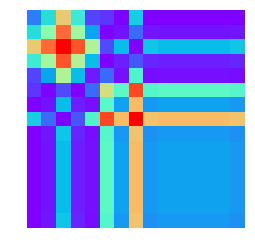

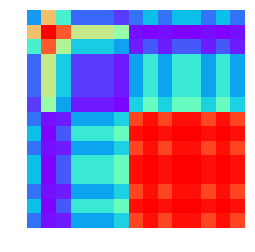

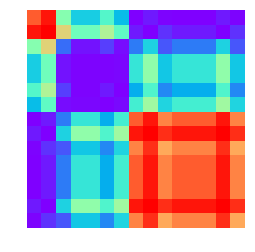

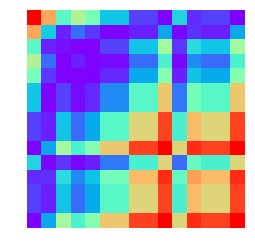

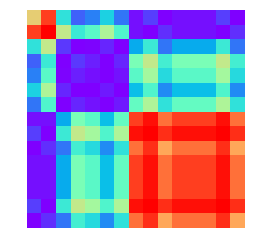

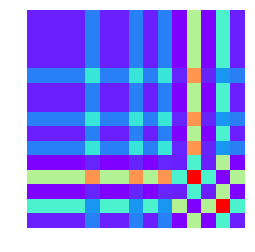

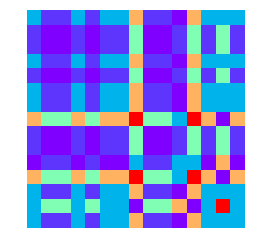

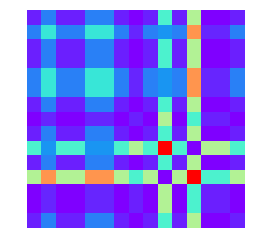

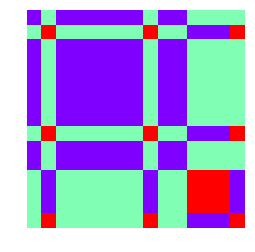

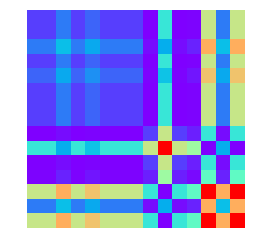

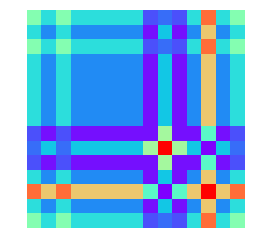

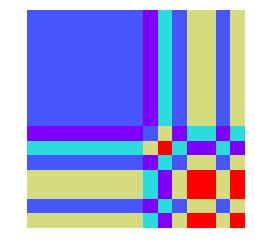

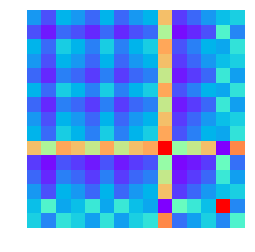

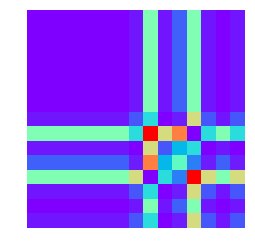

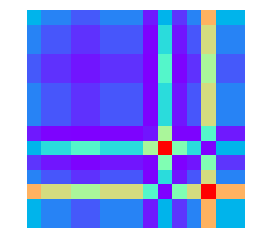

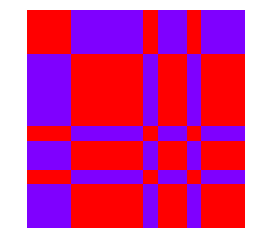

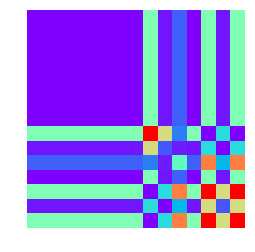

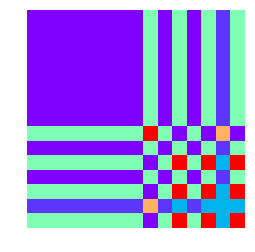

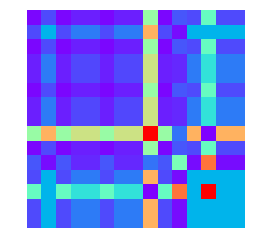

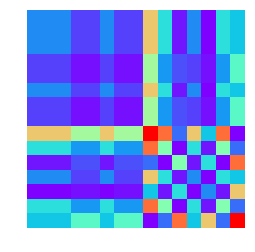

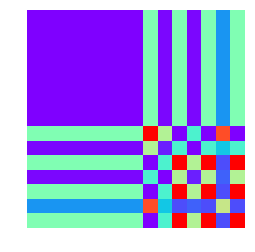

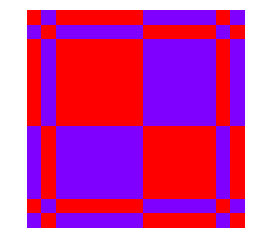

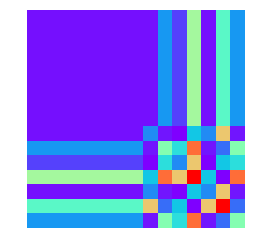

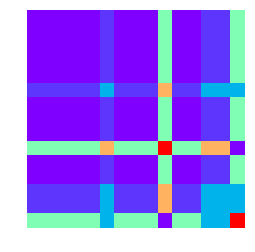

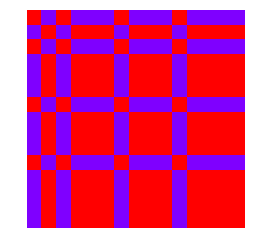

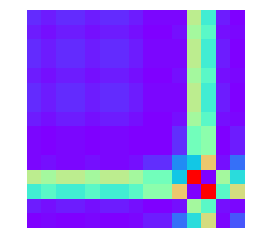

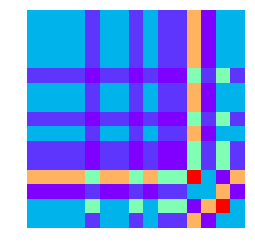

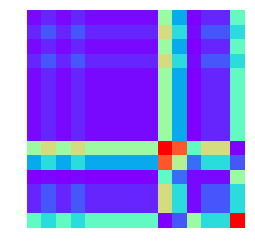

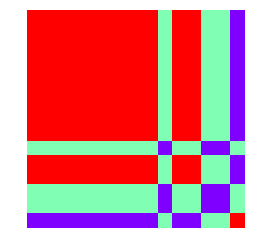

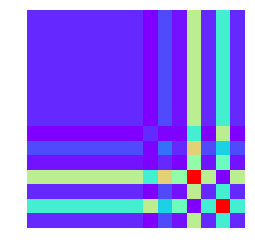

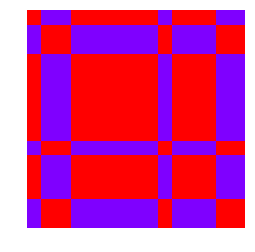

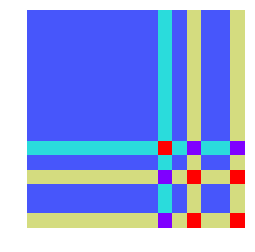

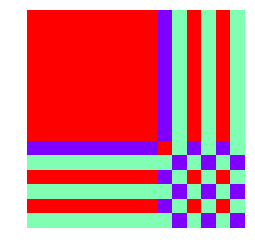

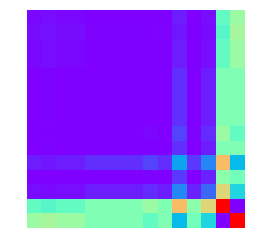

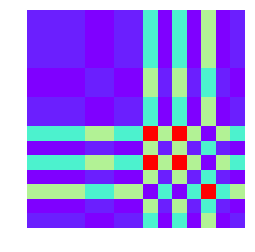

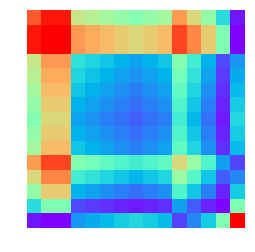

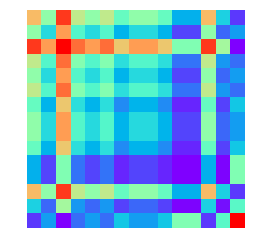

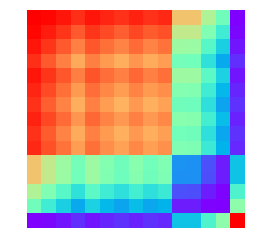

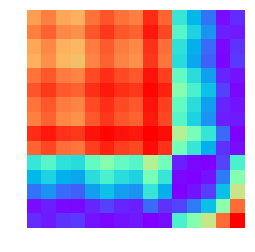

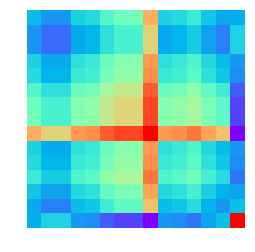

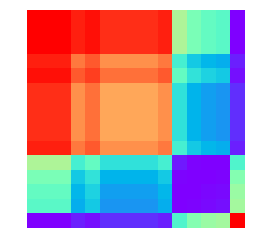

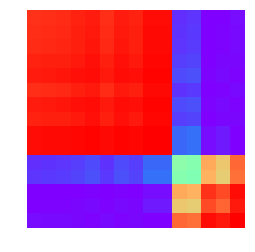

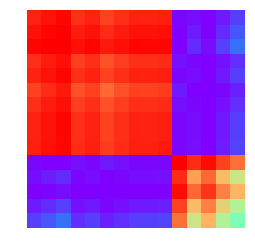

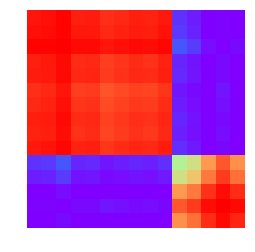

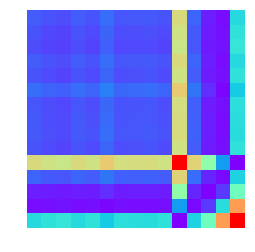

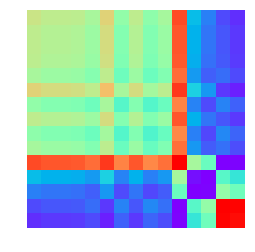

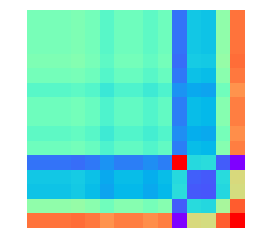

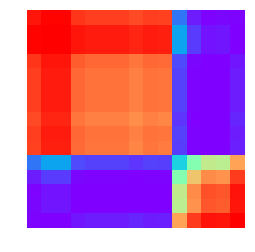

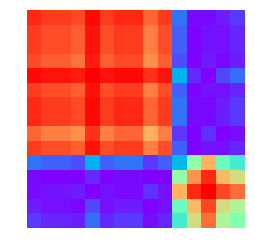

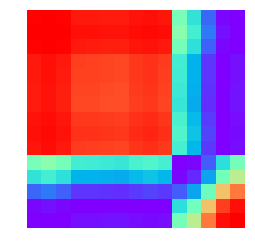

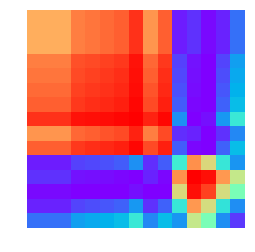

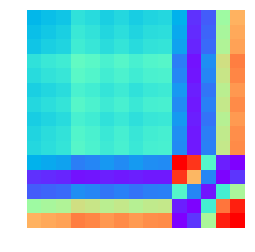

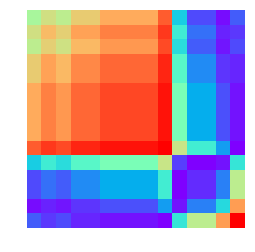

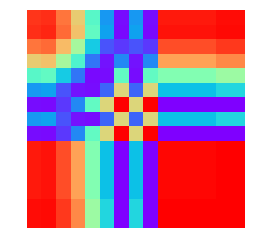

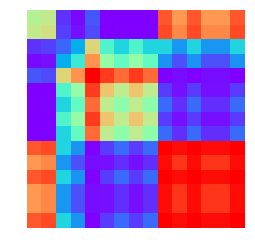

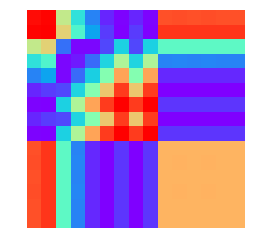

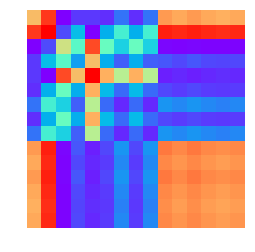

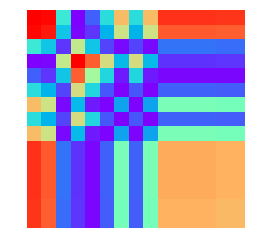

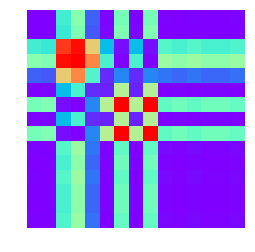

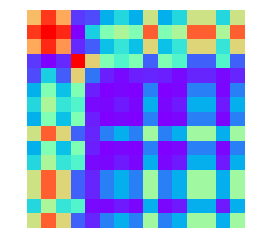

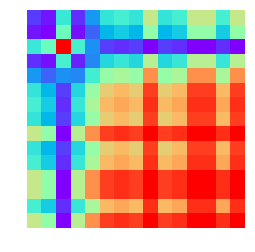

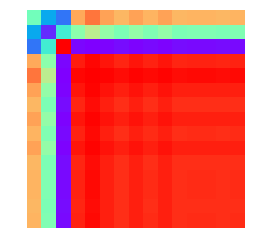

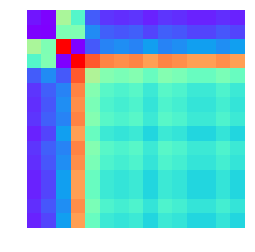

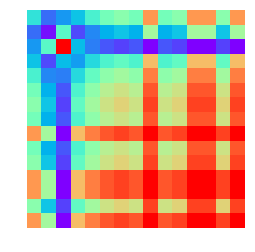

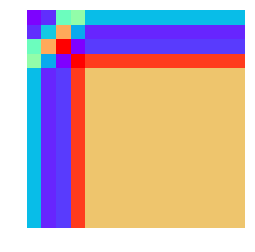

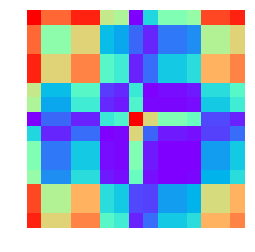

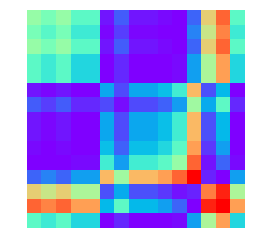

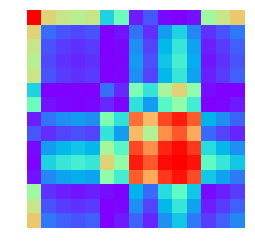

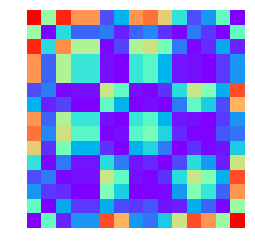

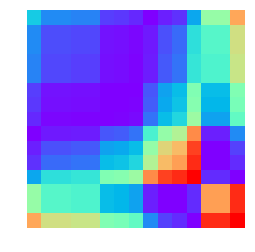

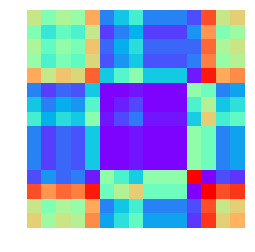

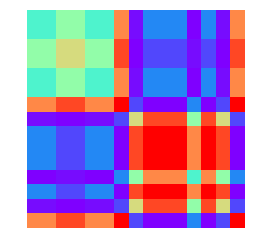

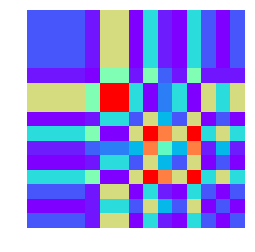

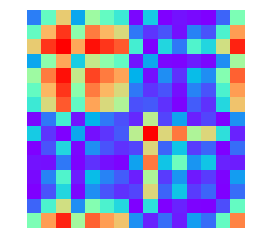

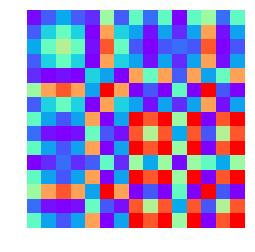

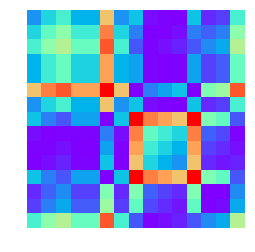

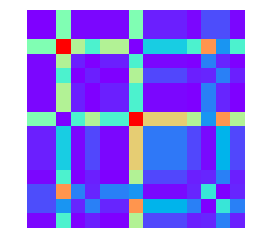

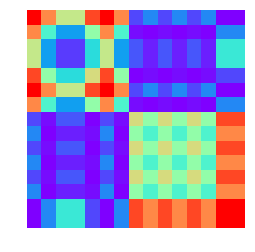

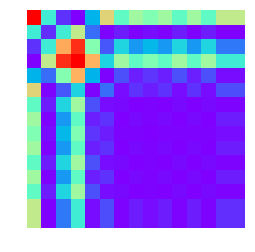

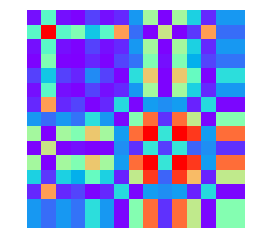

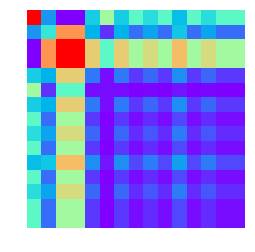

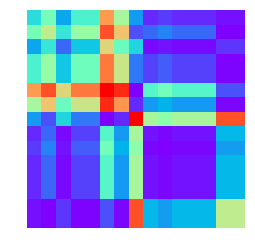

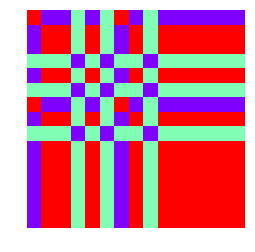

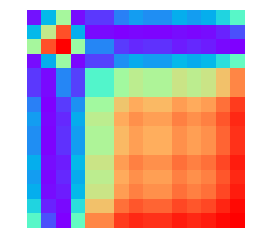

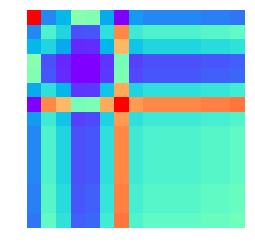

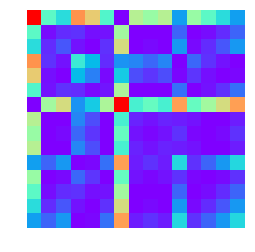

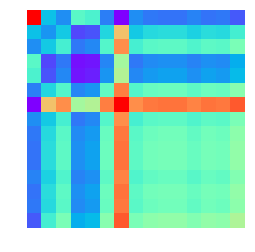

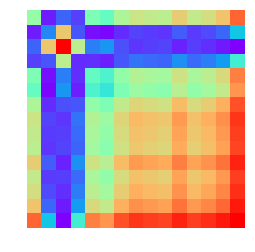

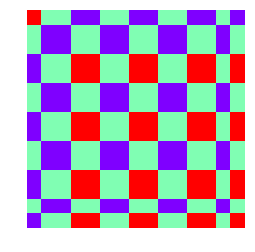

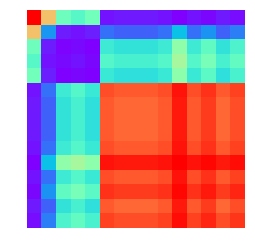

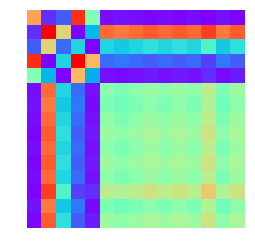

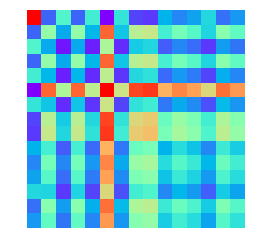

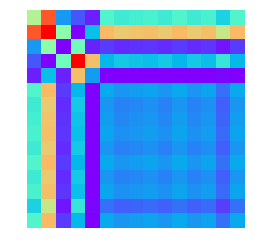

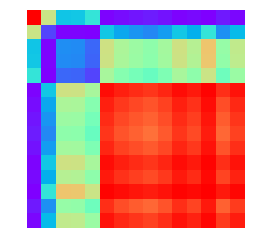

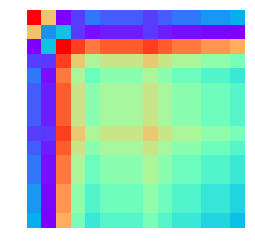

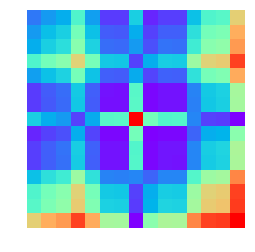

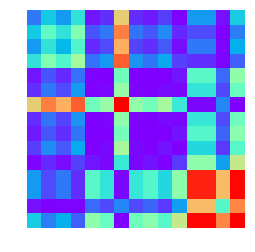

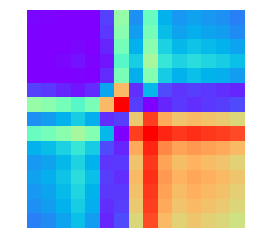

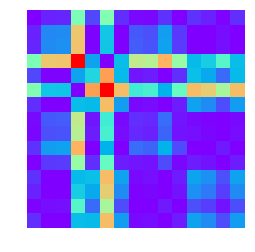

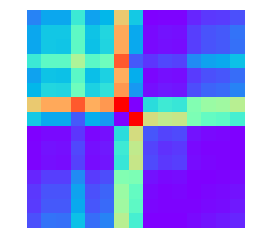

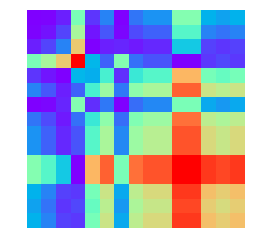

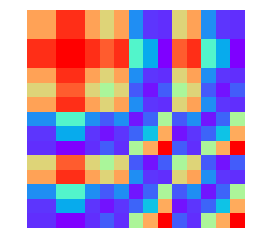

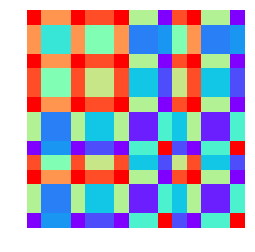

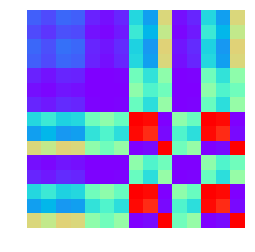

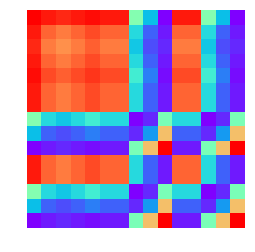

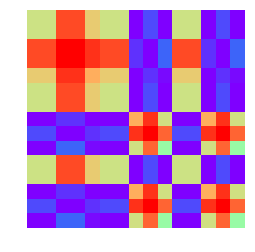

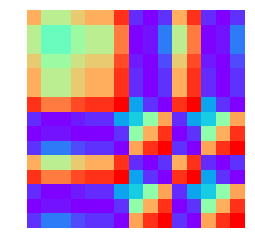

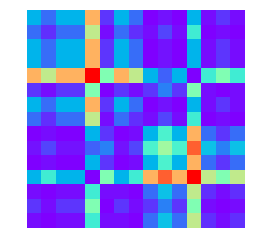

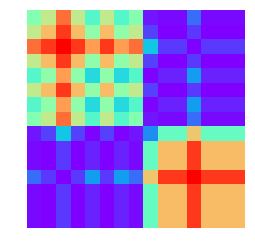

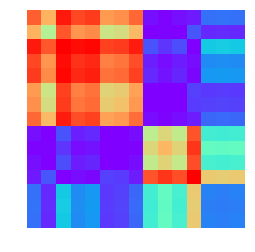

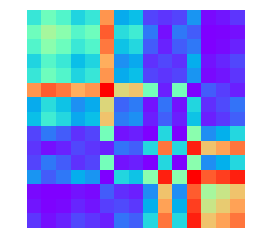

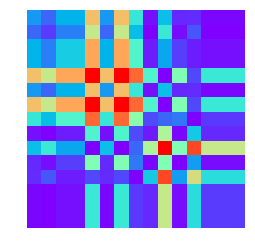

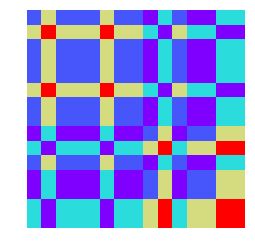

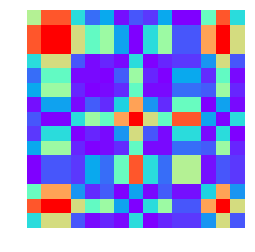

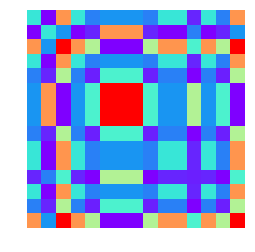

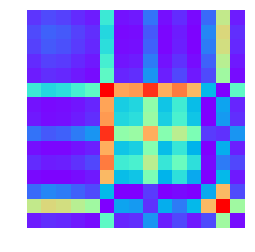

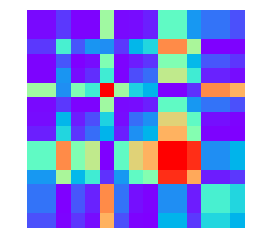

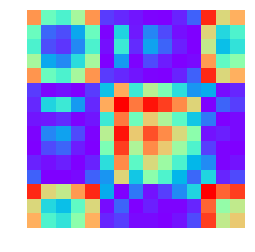

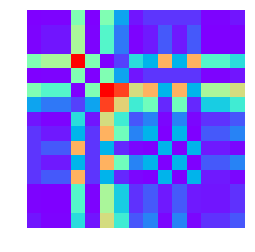

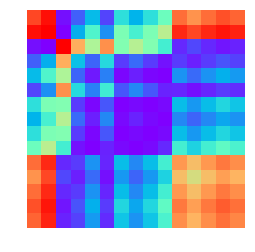

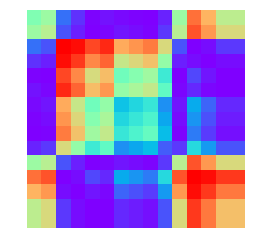

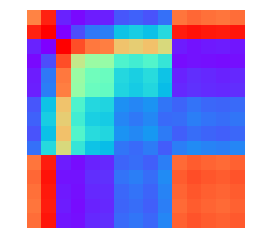

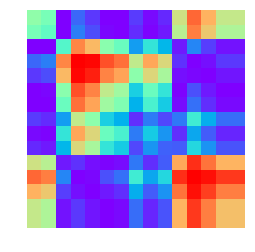

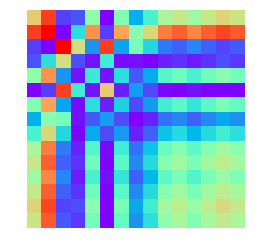

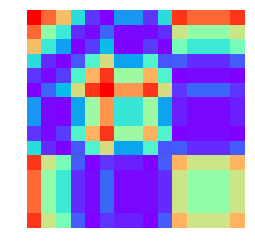

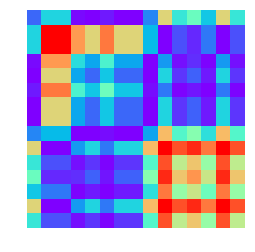

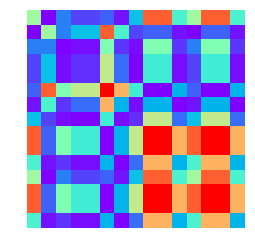

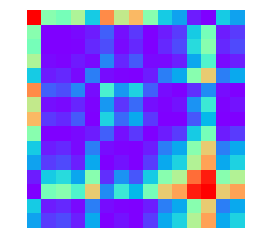

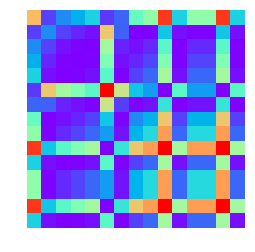

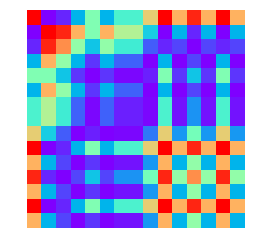

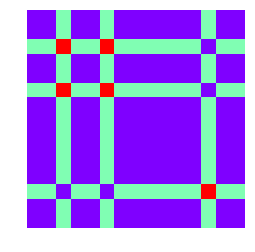

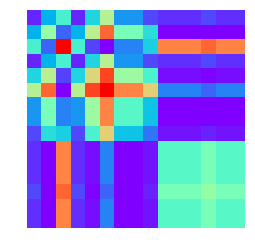

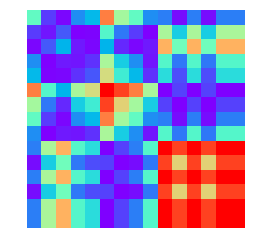

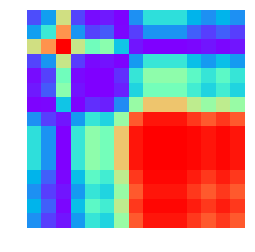

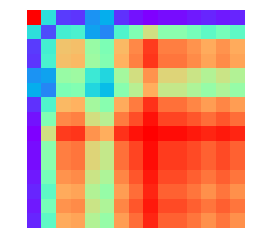

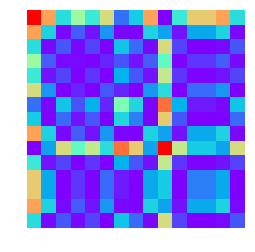

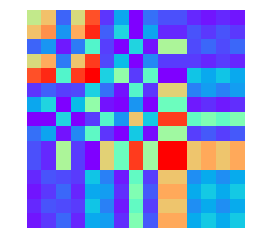

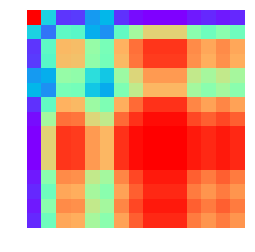

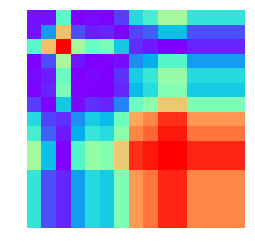

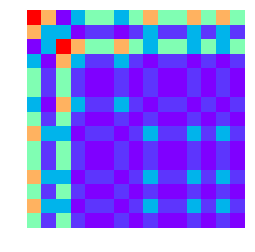

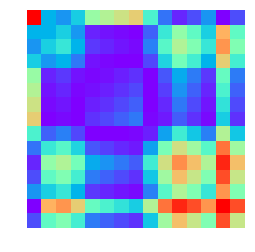

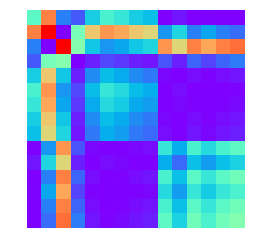

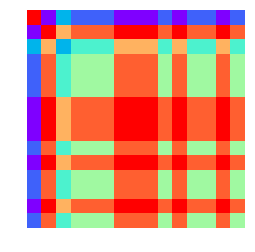

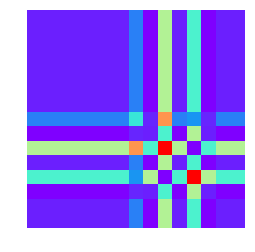

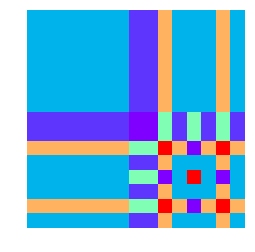

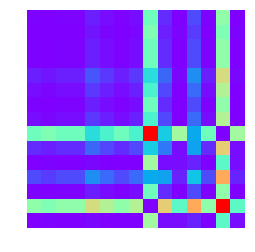

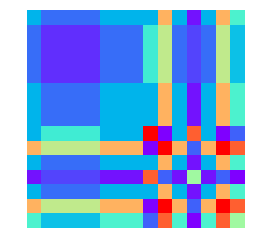

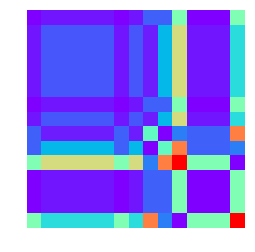

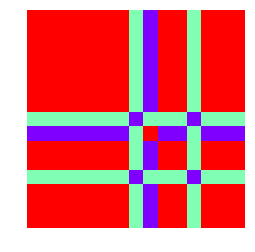

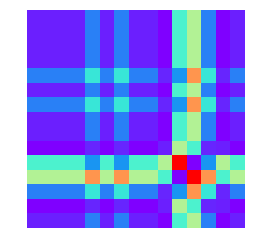

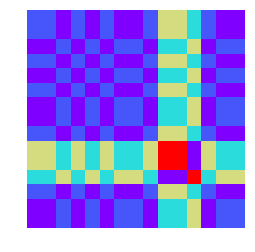

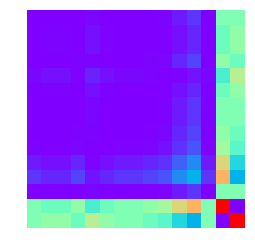

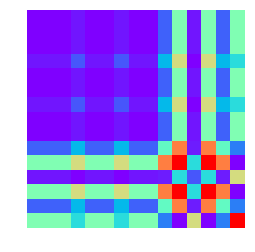

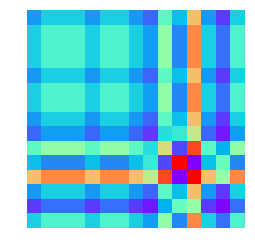

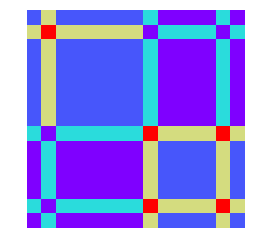

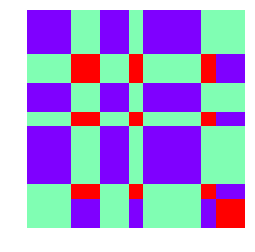

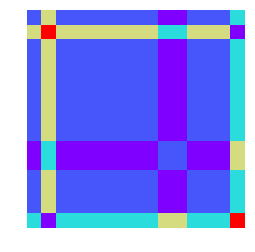

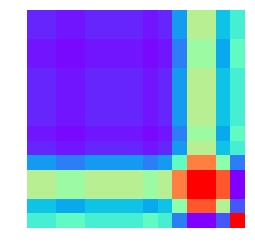

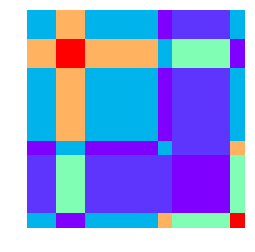

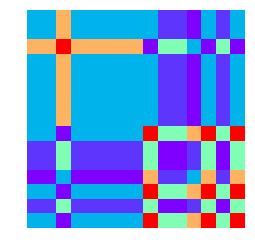

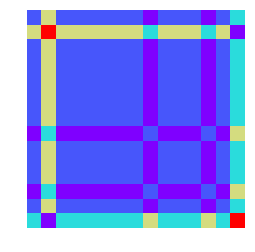

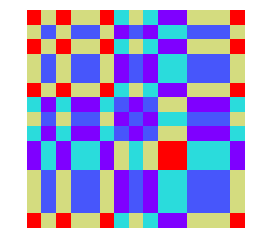

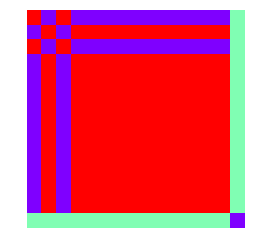

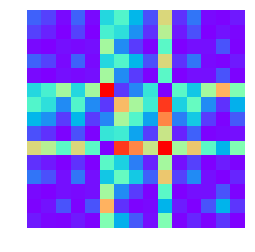

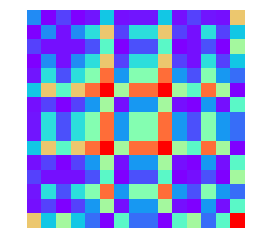

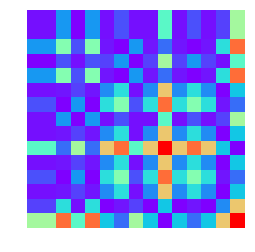

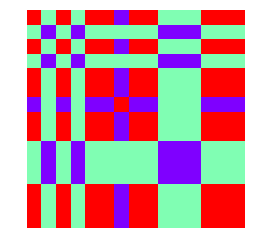

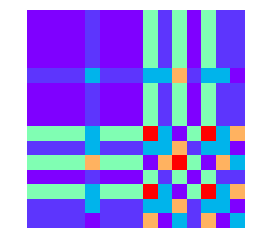

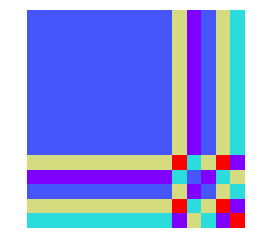

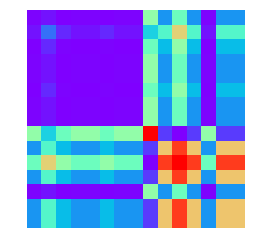

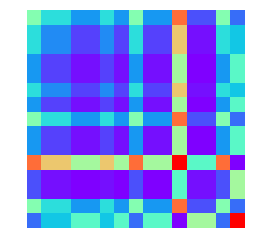

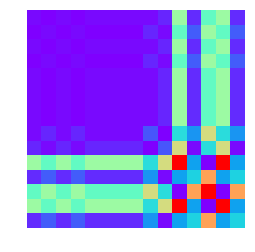

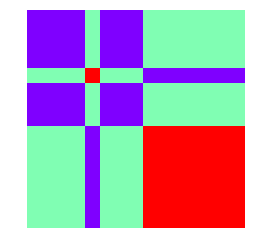

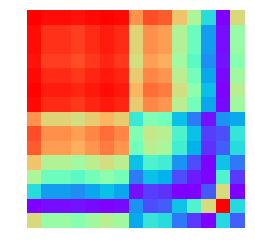

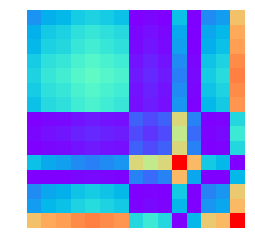

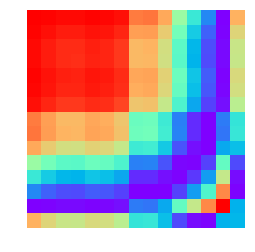

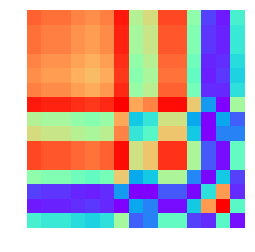

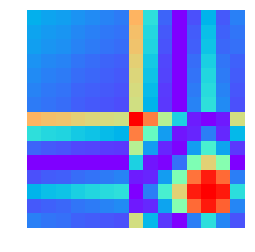

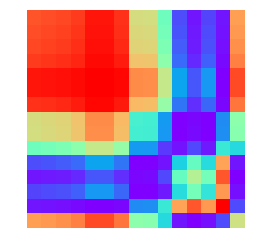

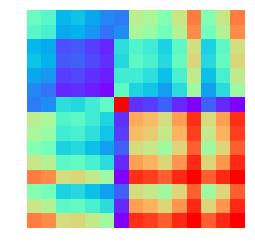

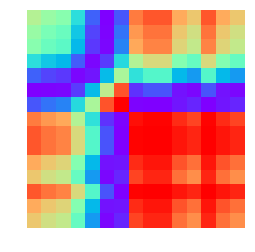

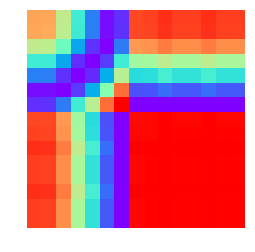

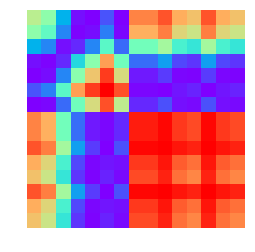

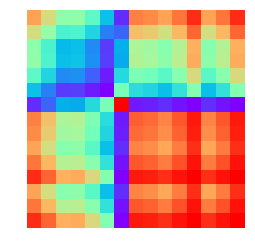

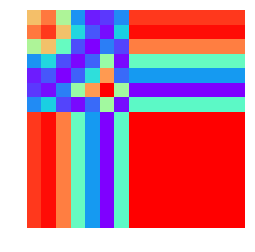

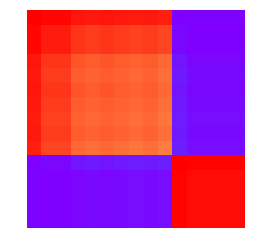

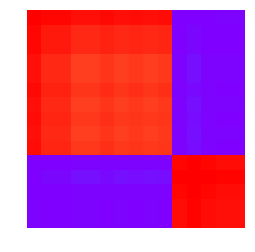

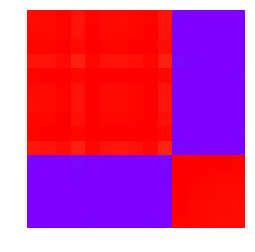

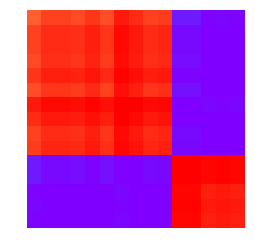

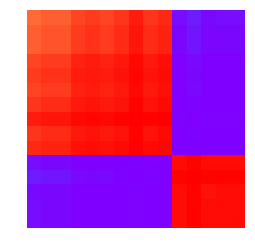

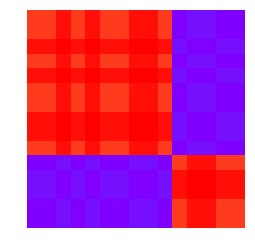

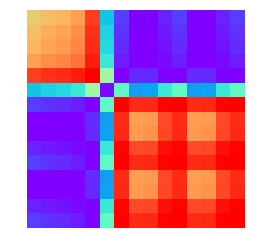

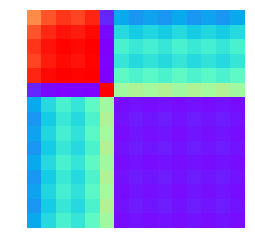

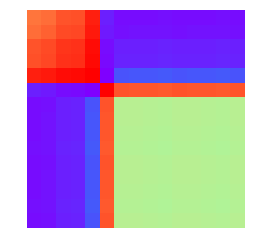

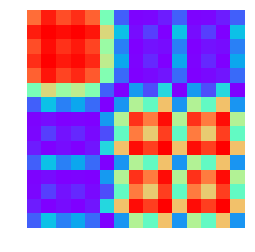

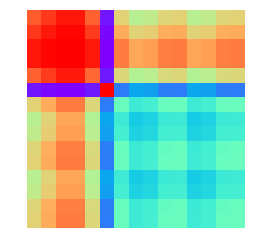

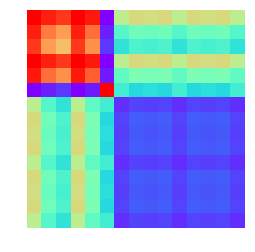

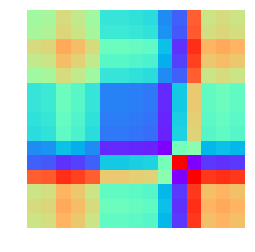

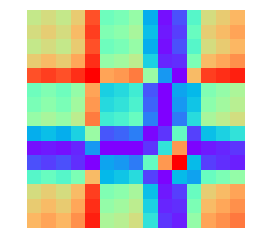

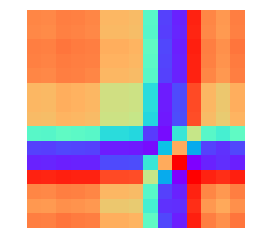

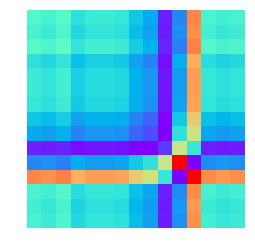

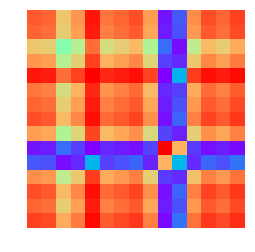

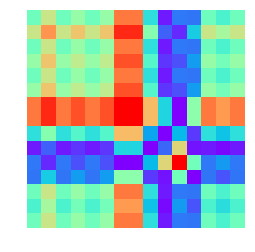

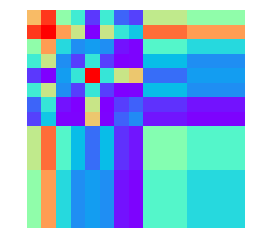

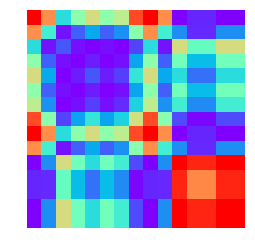

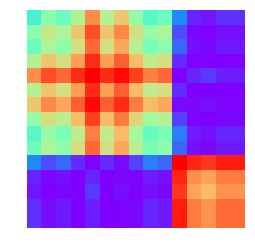

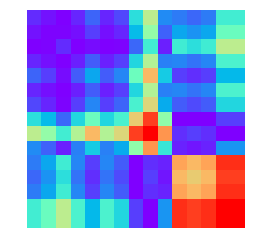

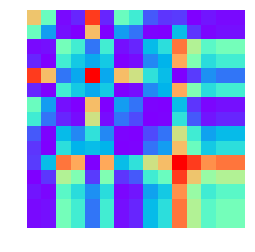

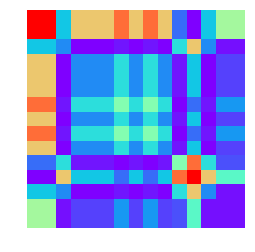

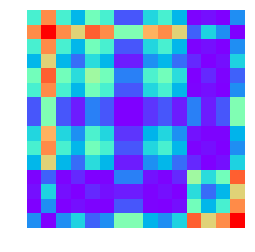

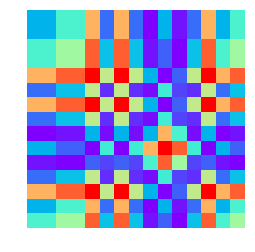

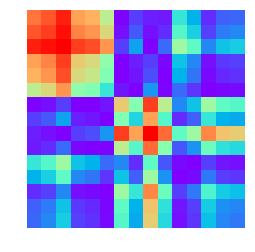

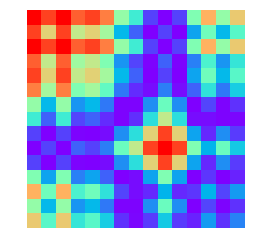

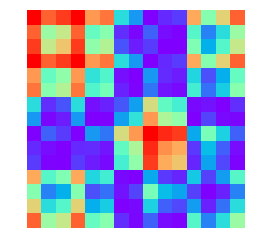

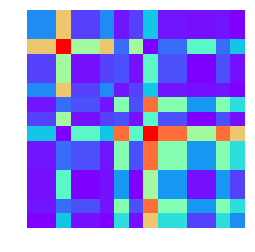

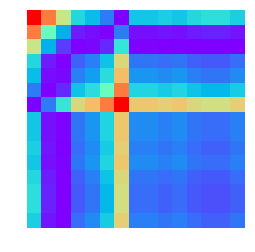

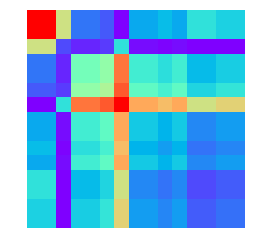

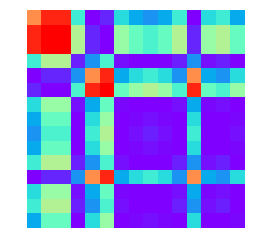

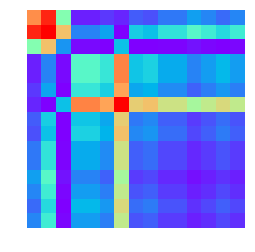

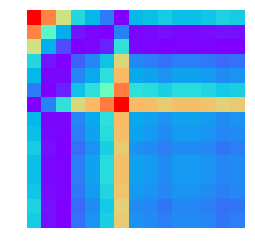

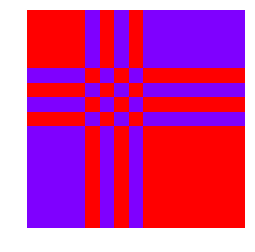

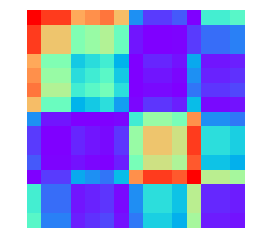

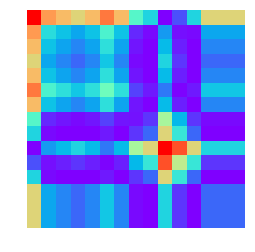

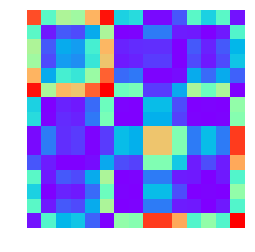

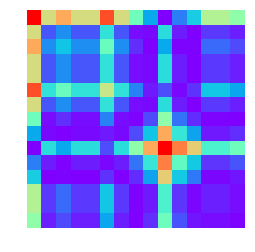

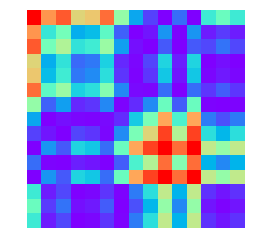

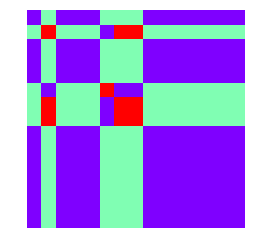

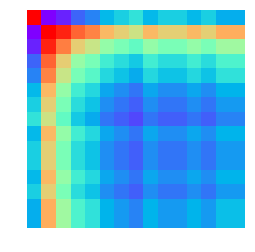

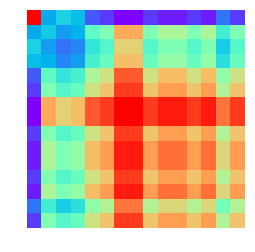

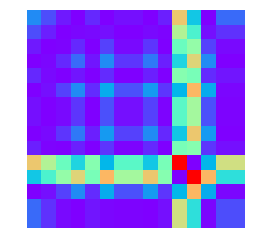

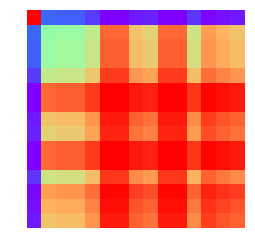

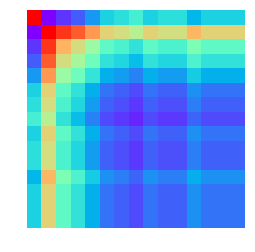

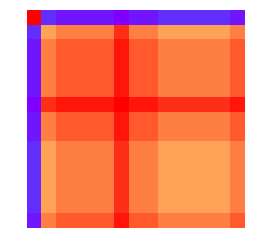

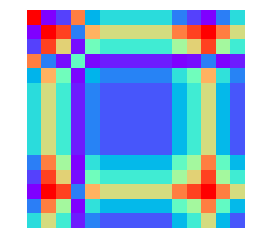

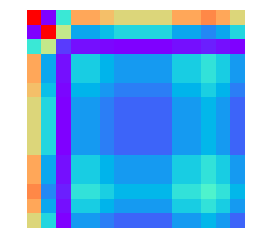

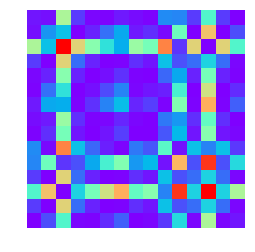

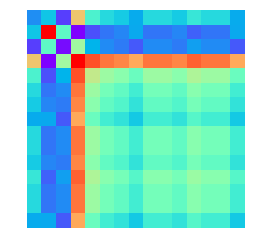

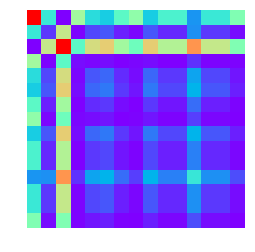

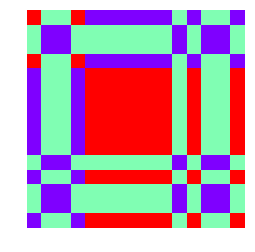

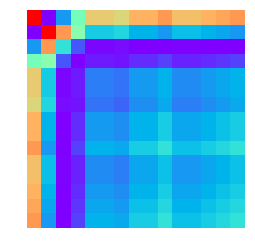

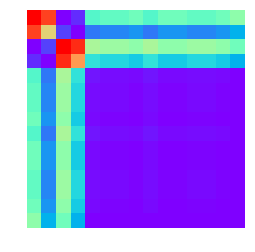

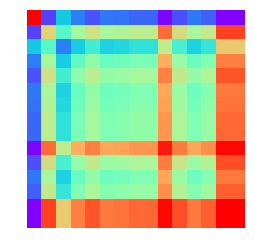

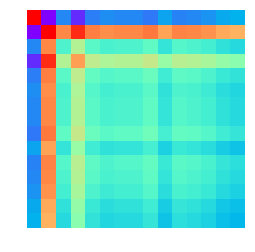

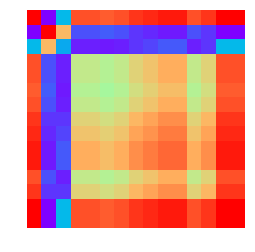

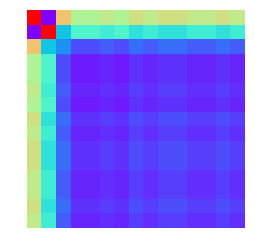

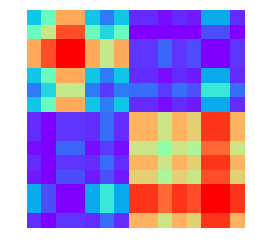

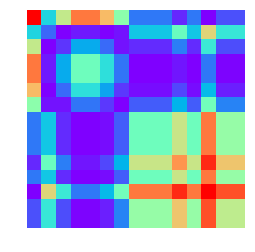

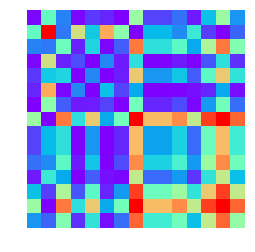

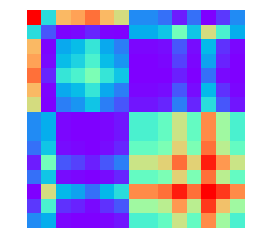

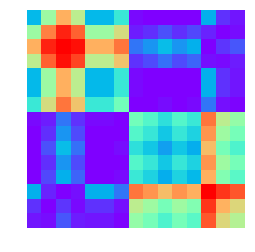

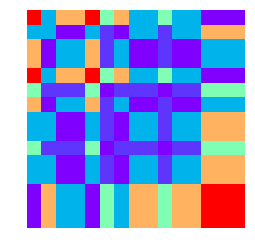

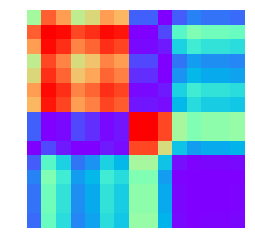

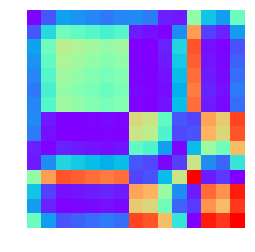

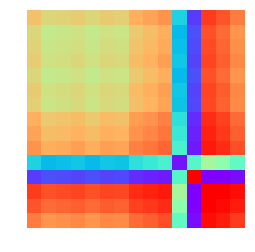

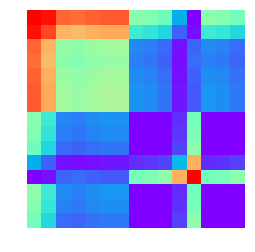

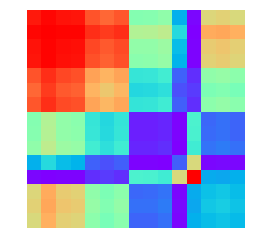

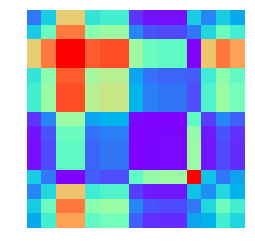

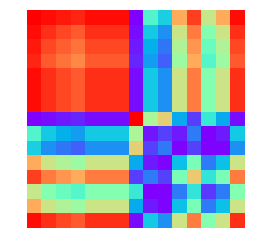

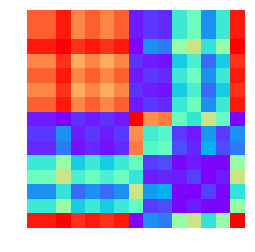

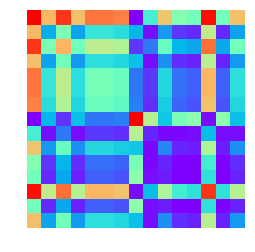

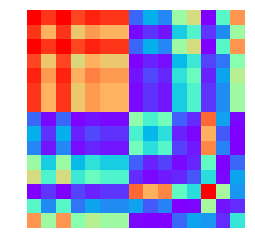

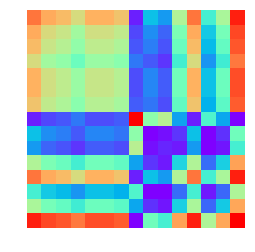

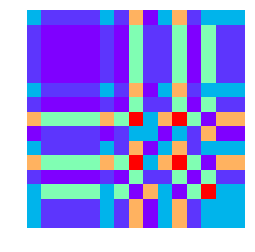

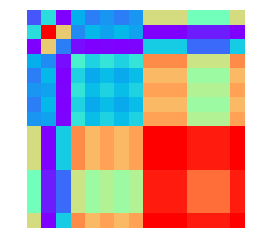

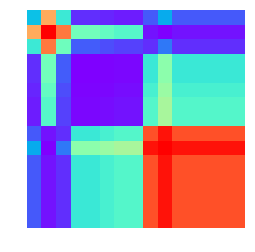

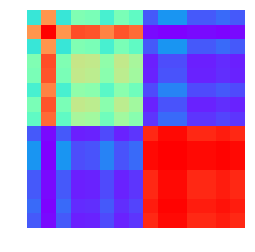

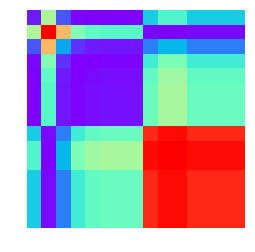

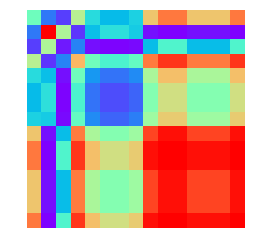

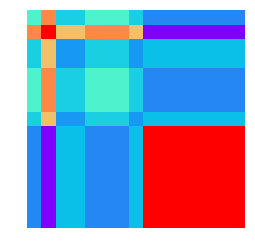

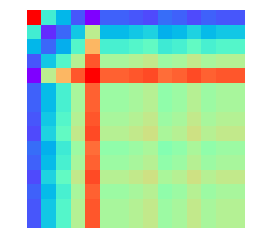

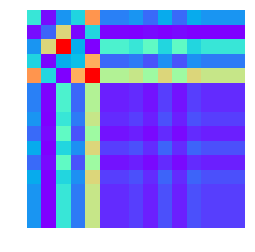

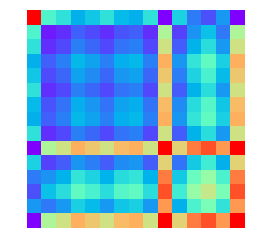

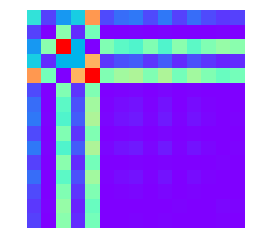

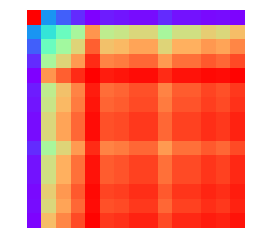

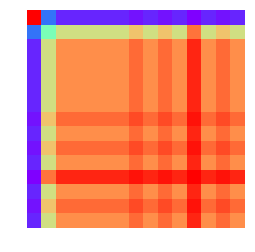

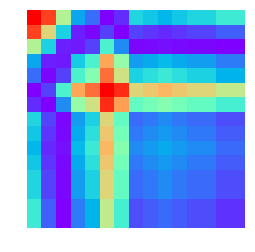

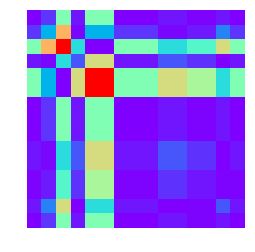

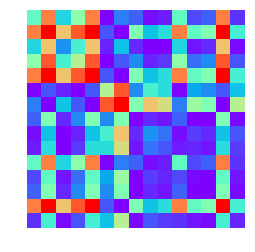

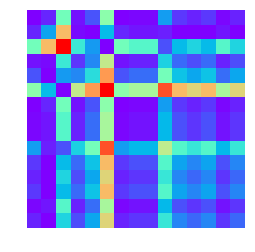

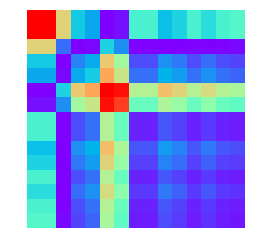

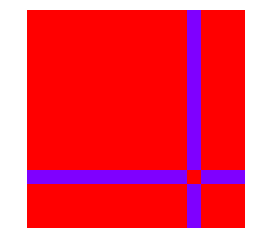

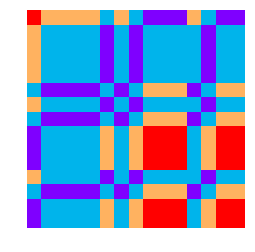

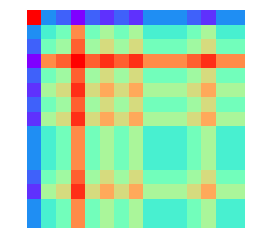

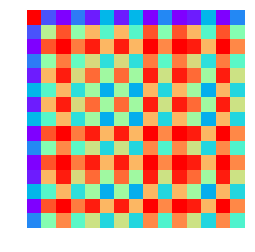

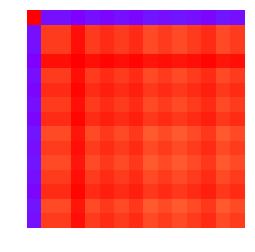

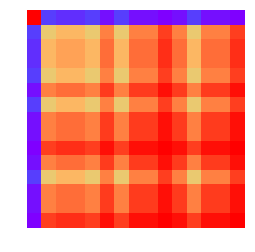

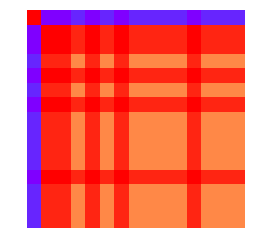

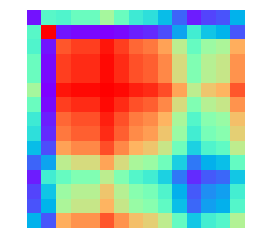

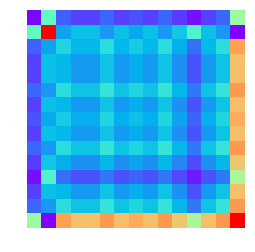

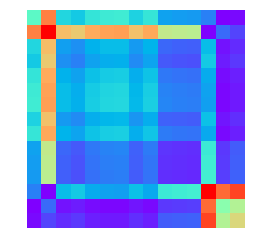

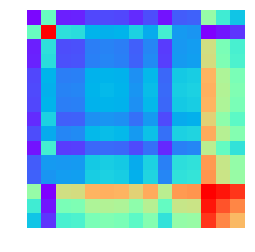

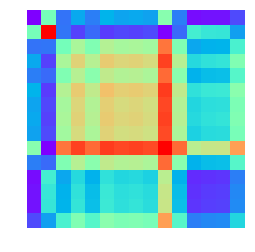

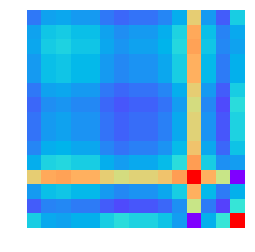

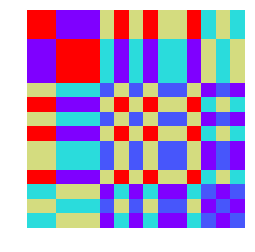

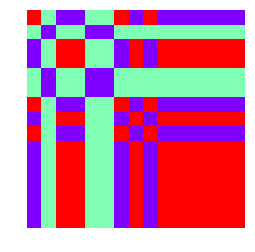

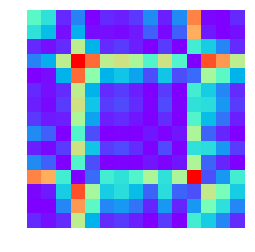

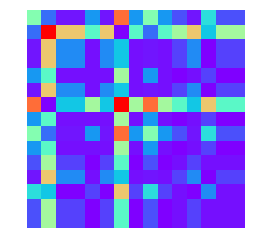

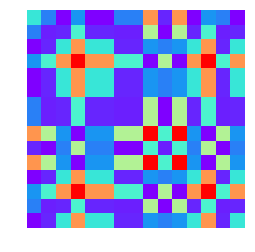

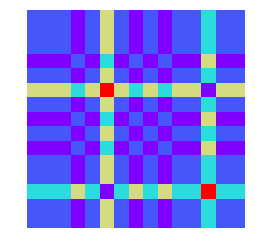

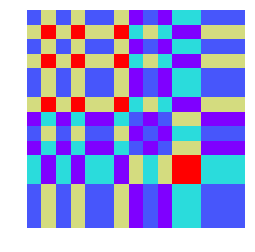

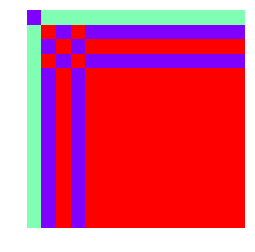

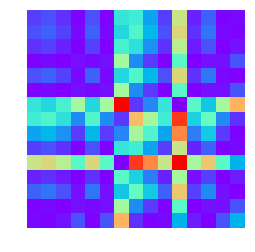

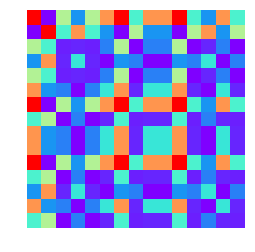

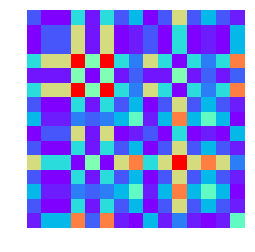

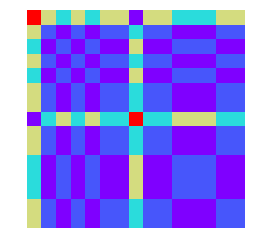

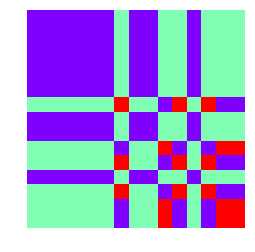

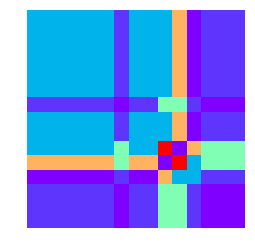

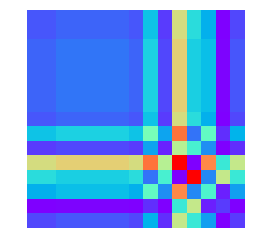

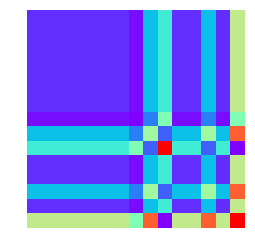

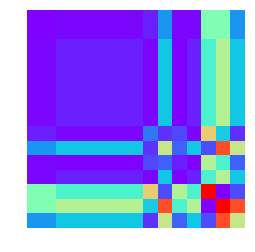

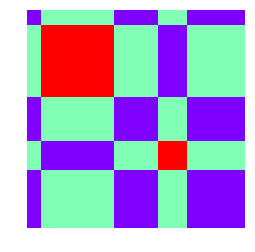

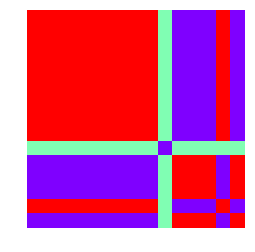

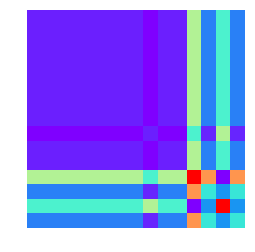

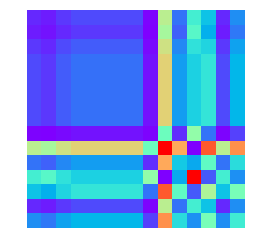

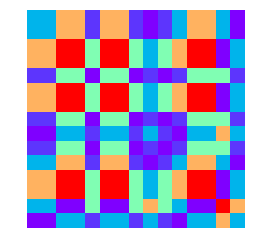

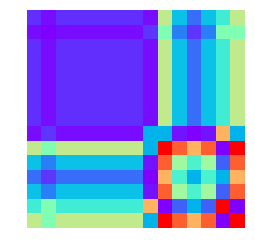

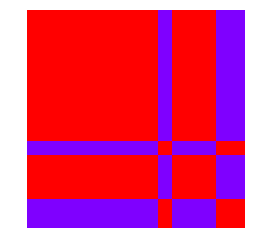

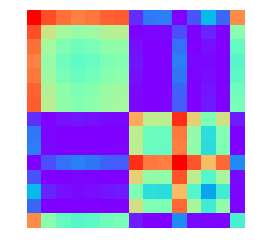

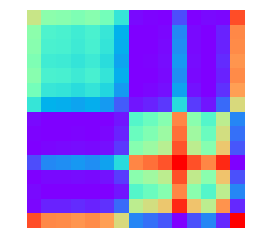

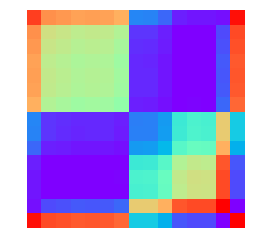

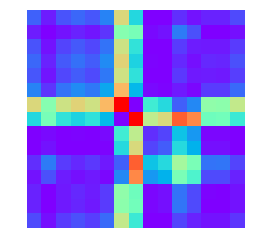

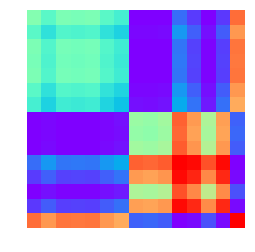

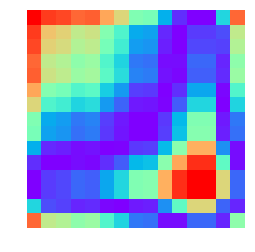

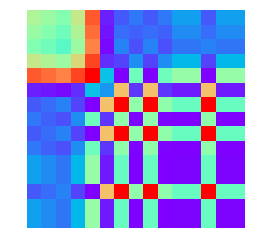

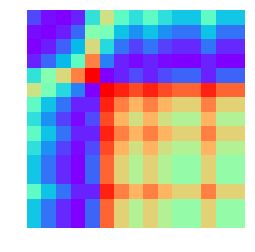

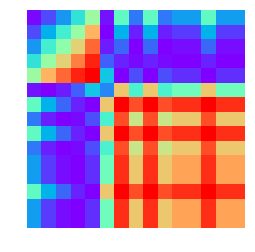

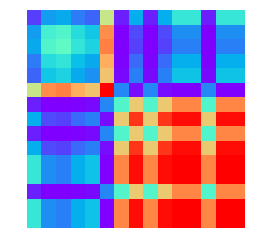

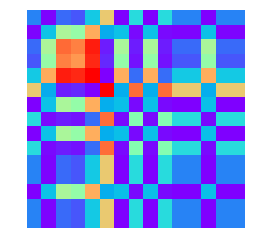

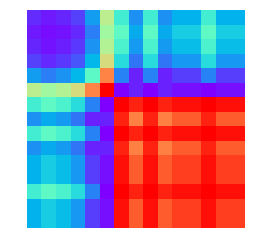

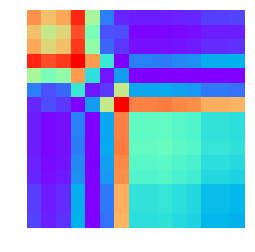

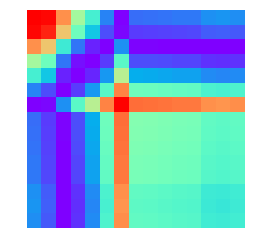

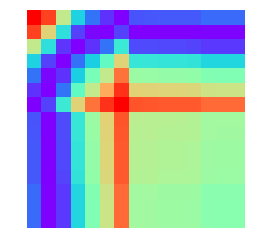

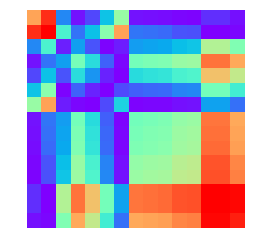

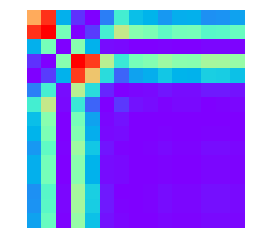

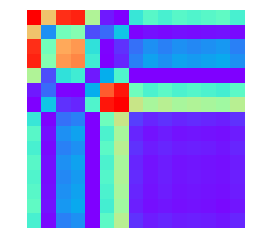

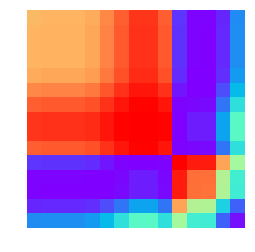

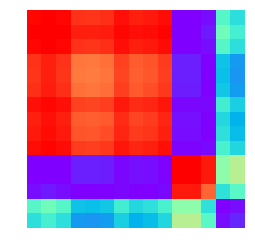

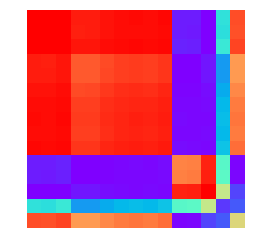

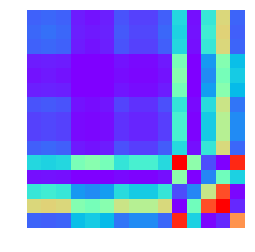

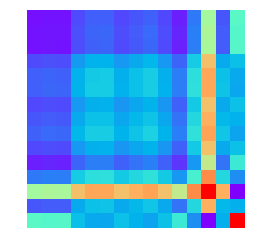

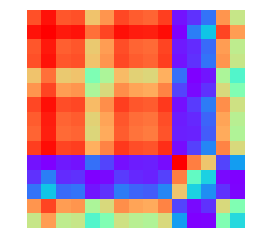

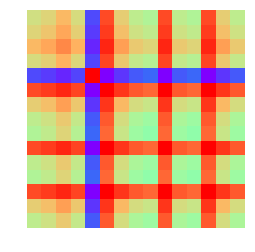

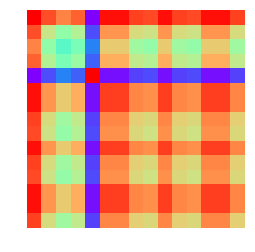

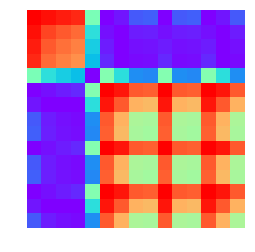

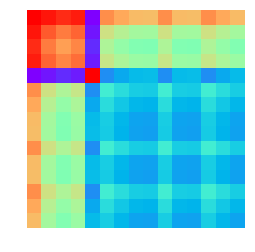

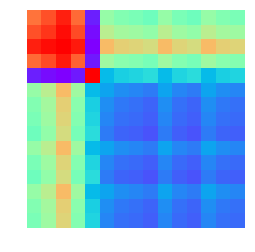

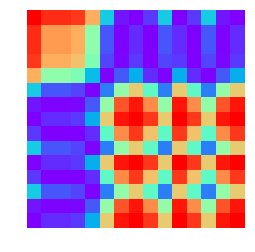

In [16]:
transformation(True,True,"gasf")
# image_size

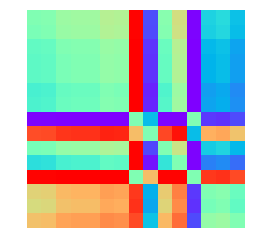

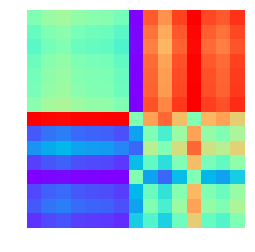

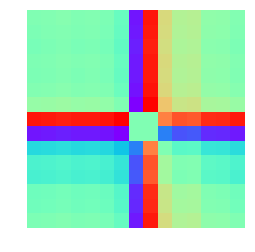

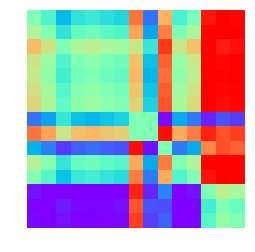

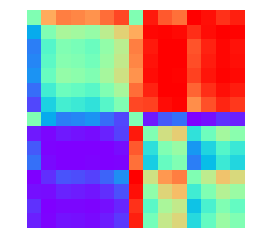

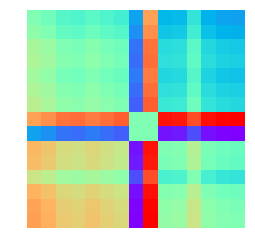

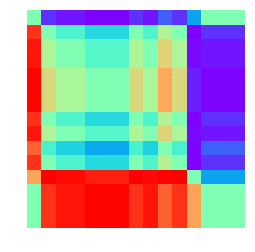

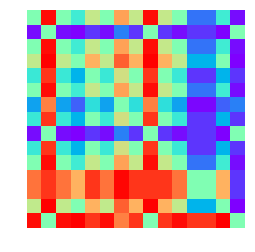

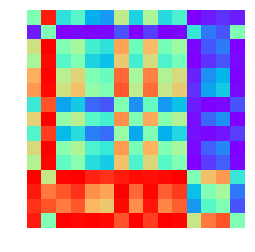

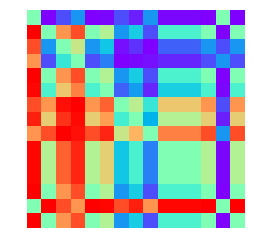

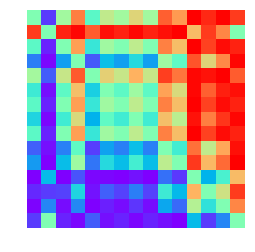

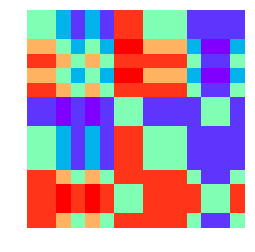

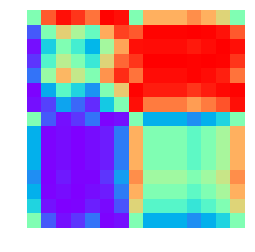

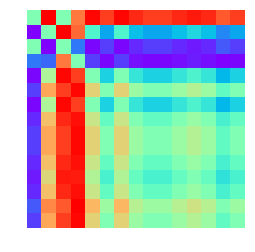

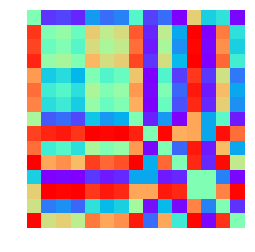

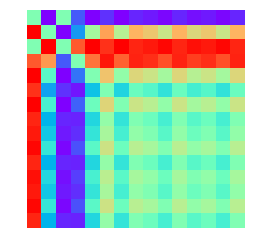

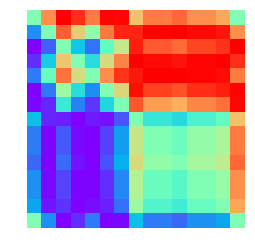

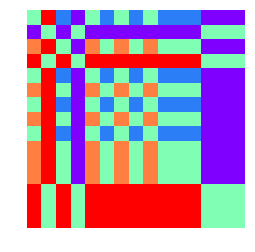

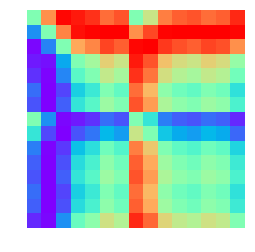

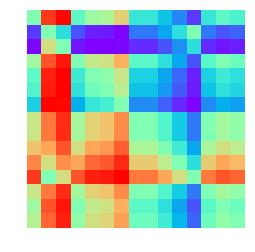

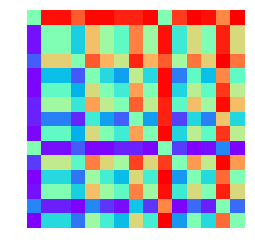

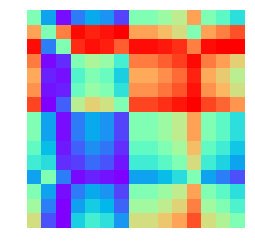

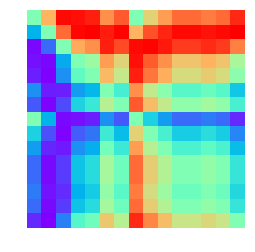

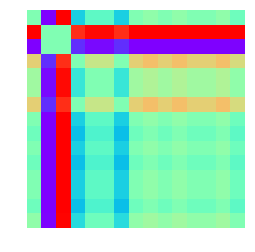

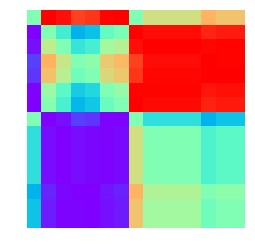

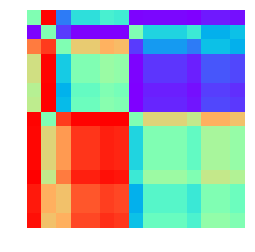

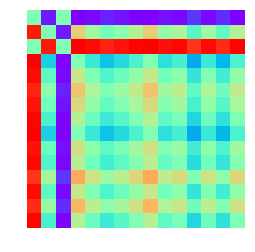

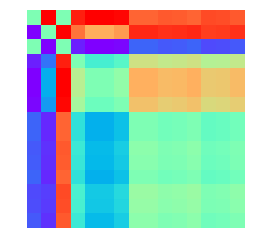

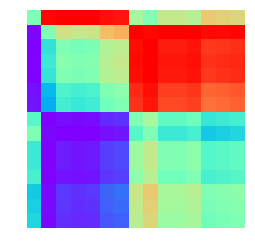

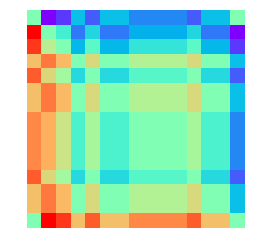

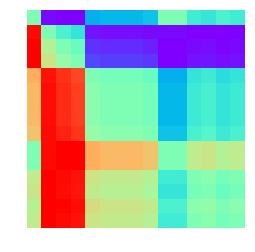

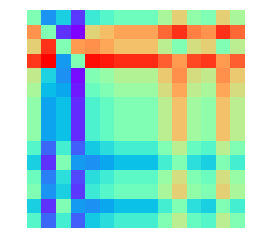

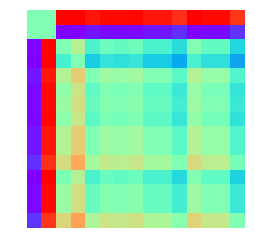

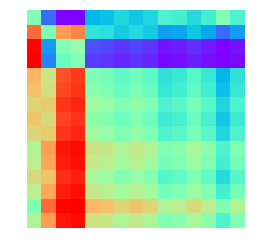

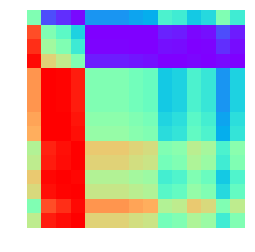

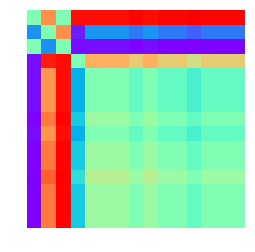

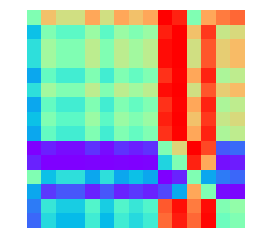

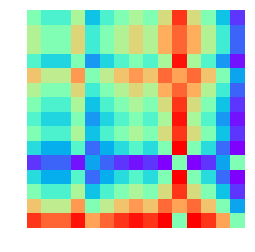

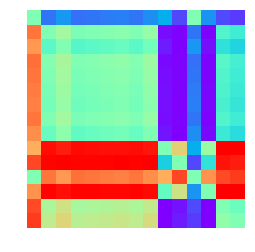

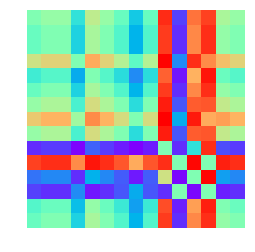

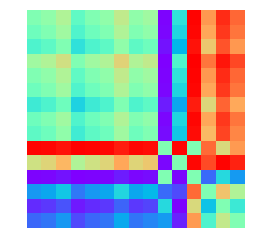

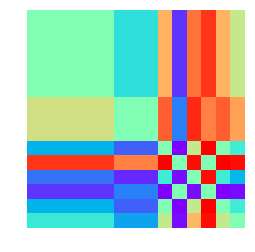

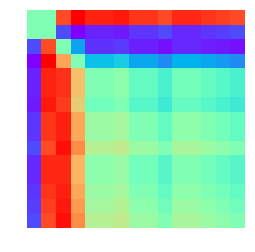

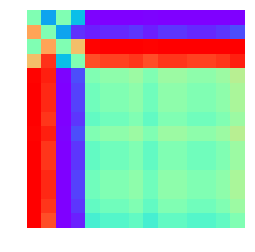

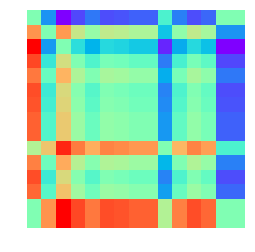

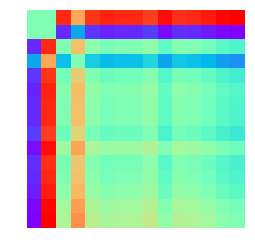

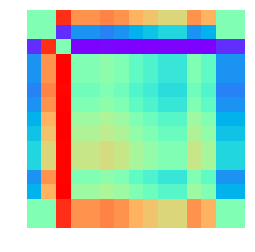

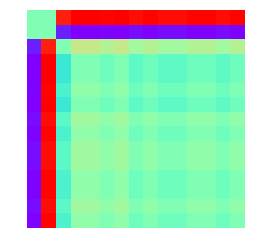

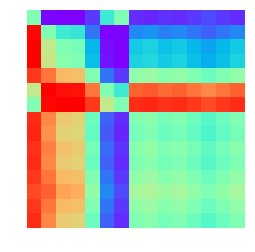

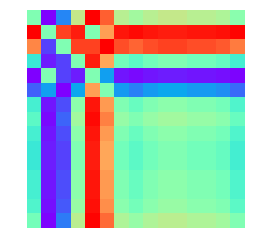

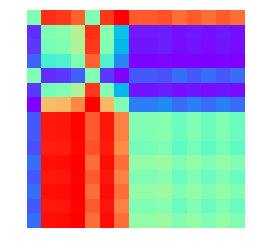

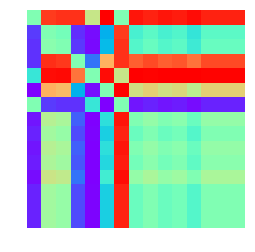

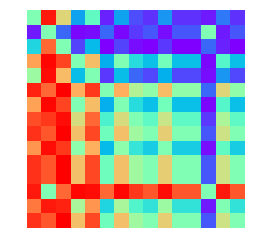

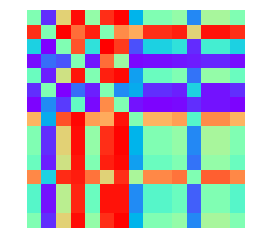

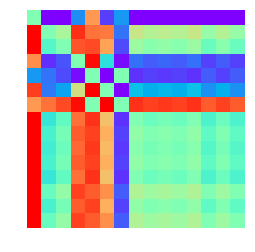

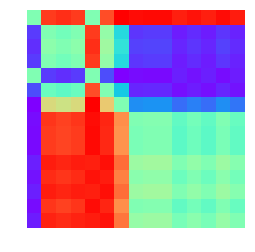

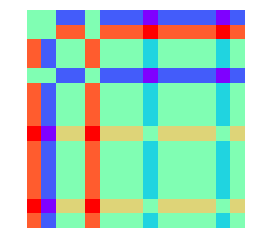

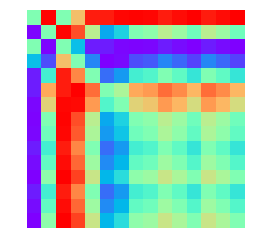

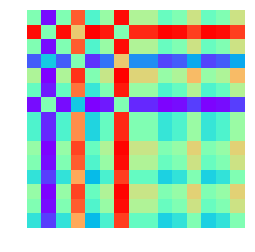

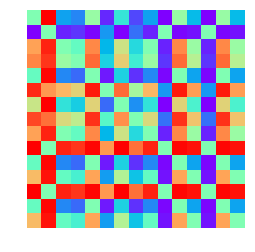

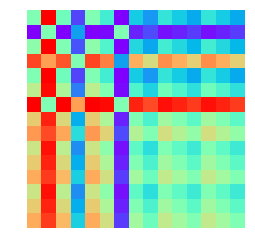

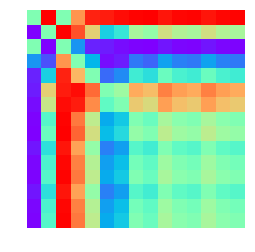

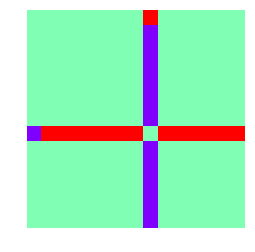

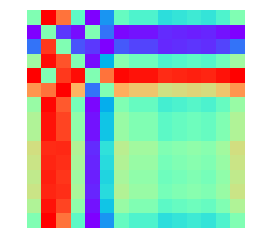

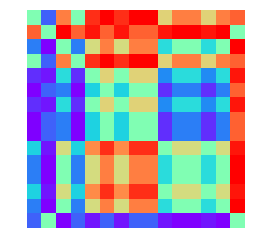

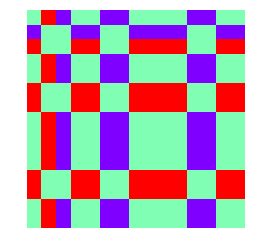

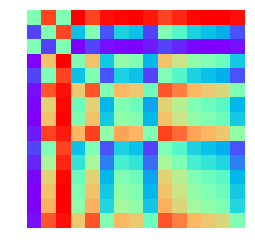

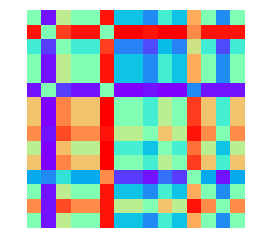

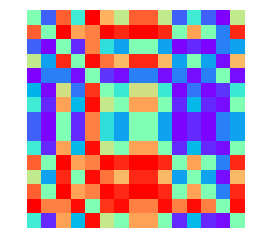

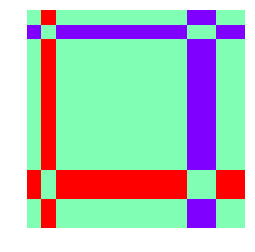

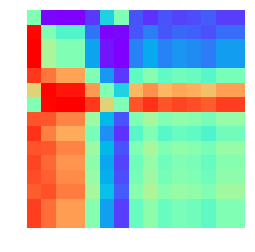

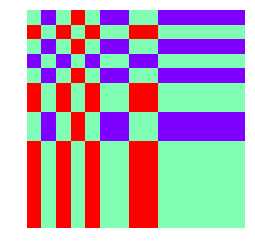

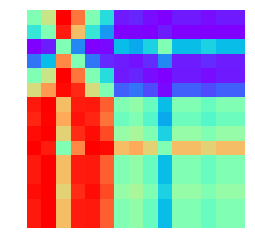

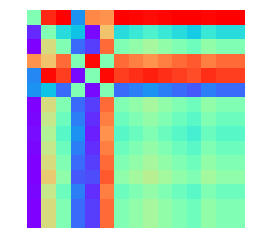

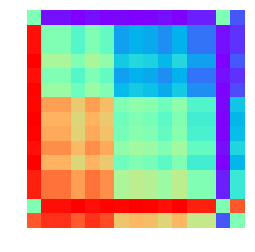

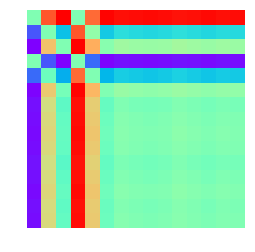

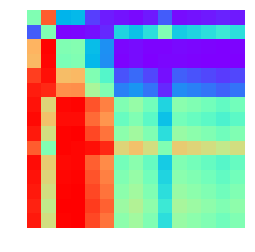

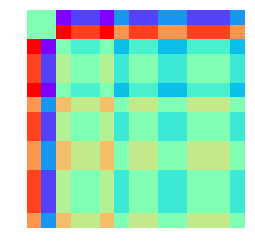

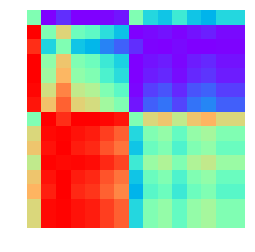

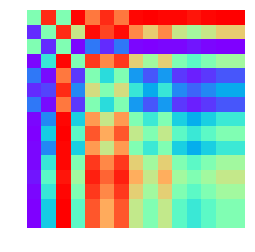

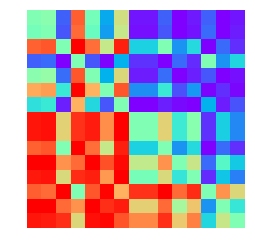

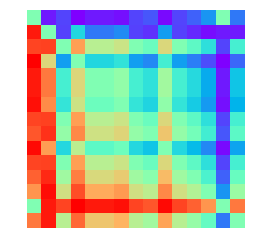

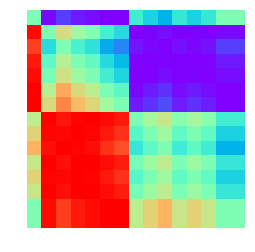

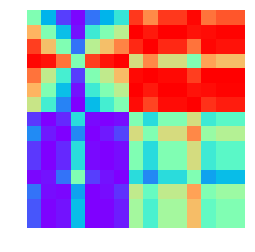

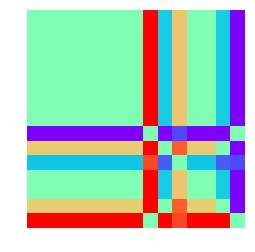

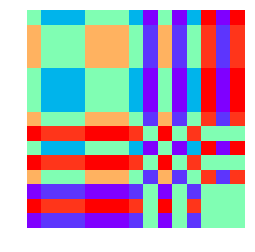

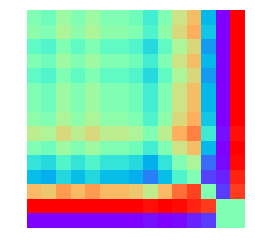

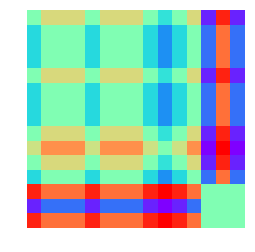

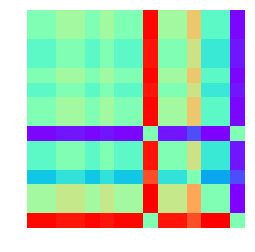

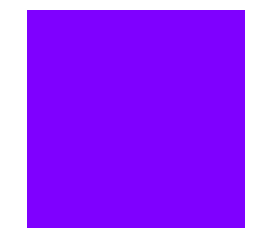

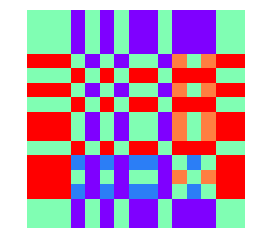

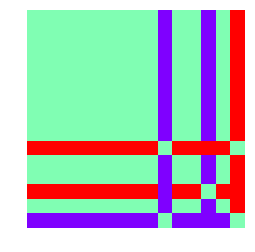

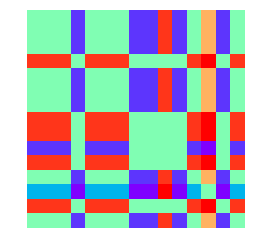

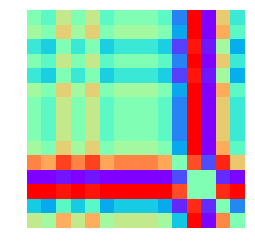

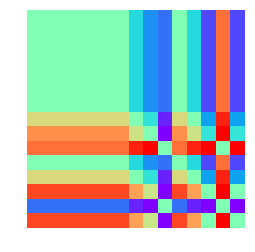

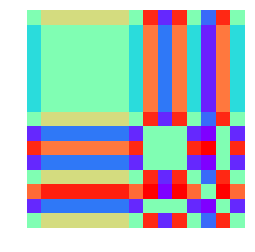

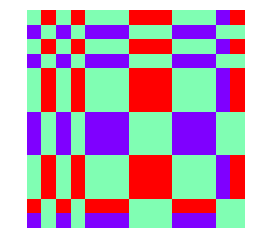

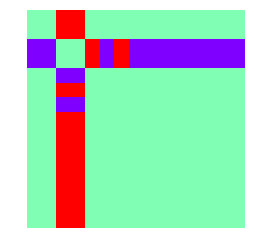

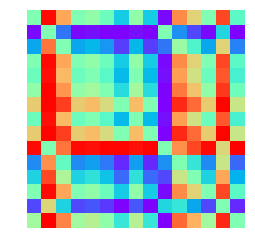

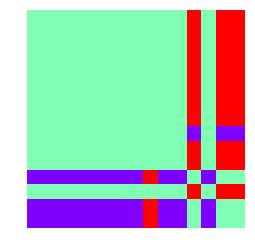

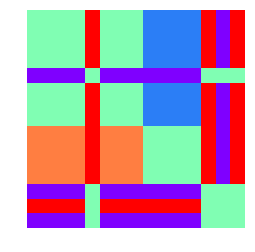

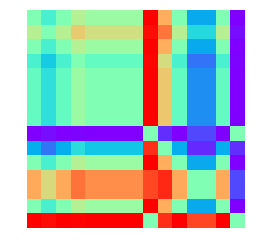

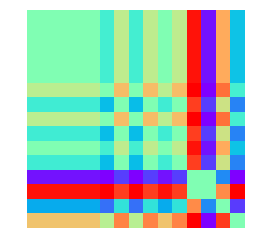

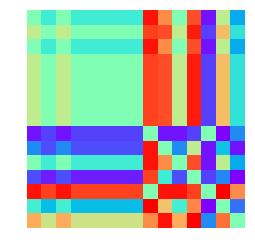

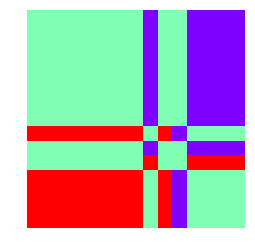

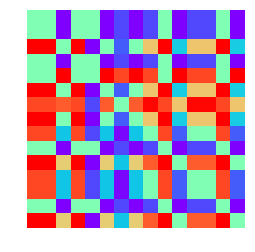

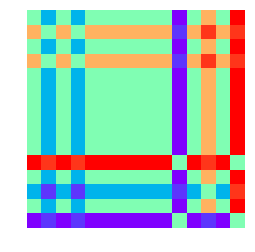

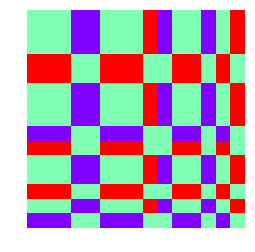

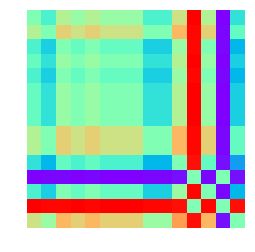

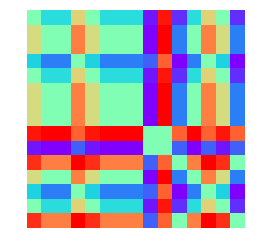

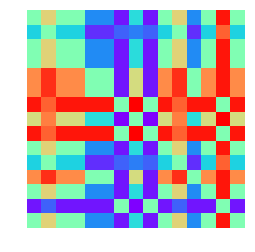

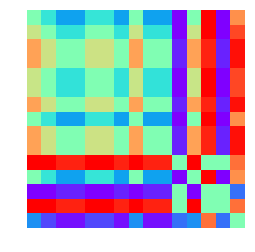

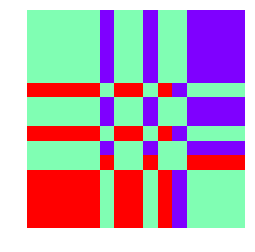

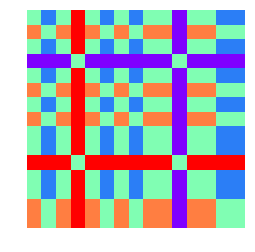

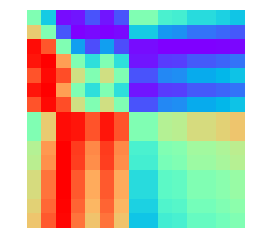

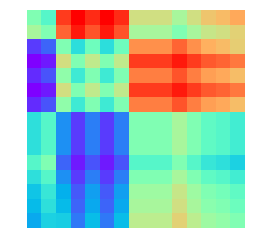

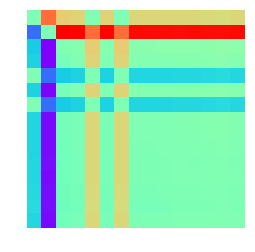

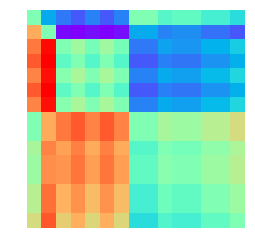

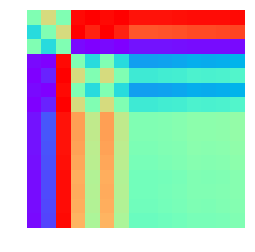

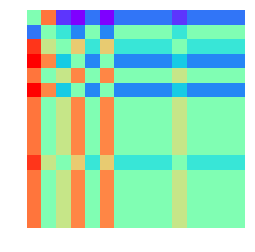

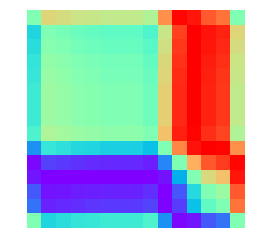

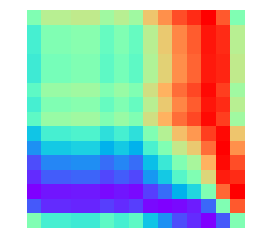

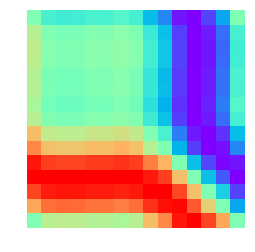

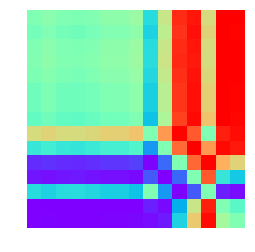

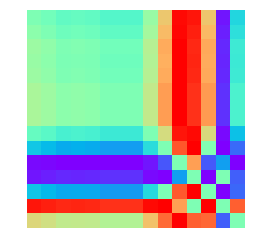

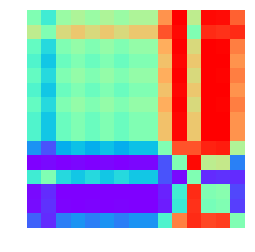

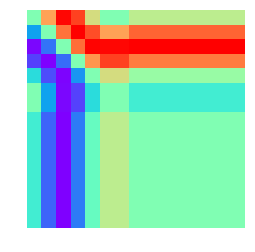

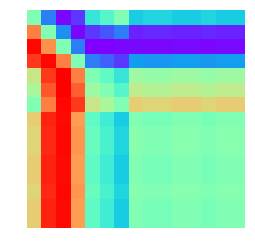

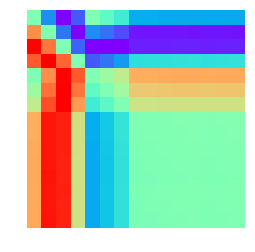

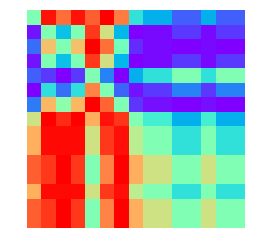

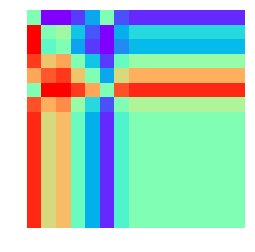

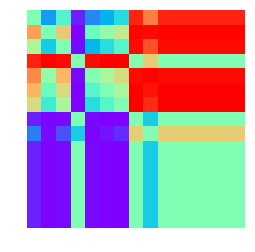

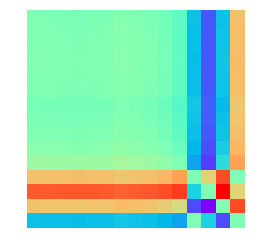

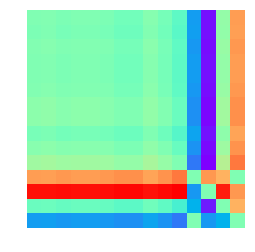

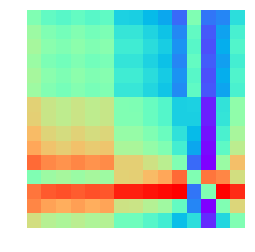

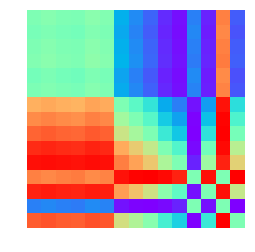

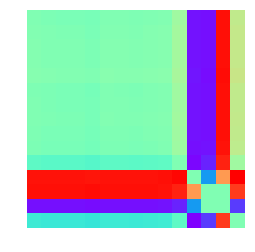

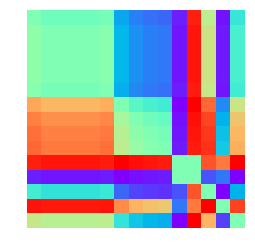

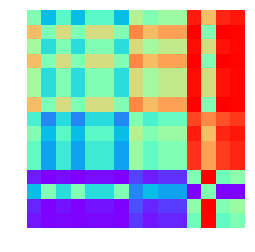

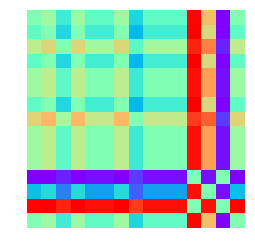

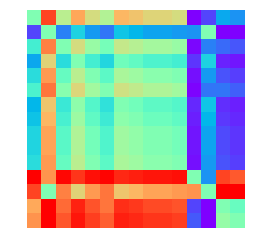

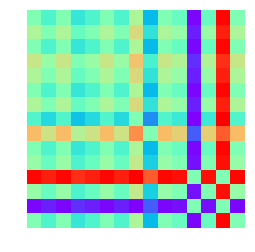

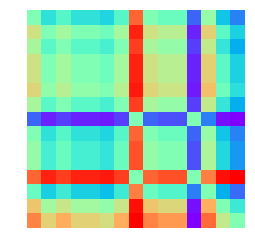

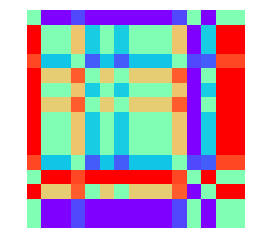

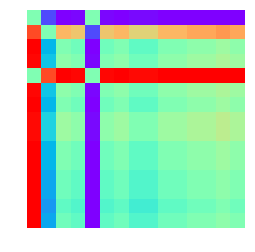

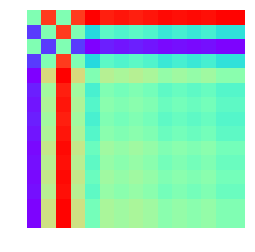

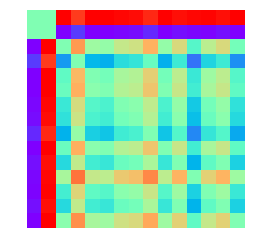

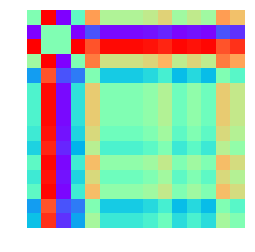

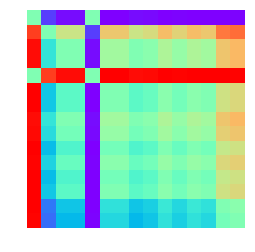

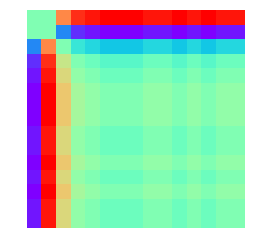

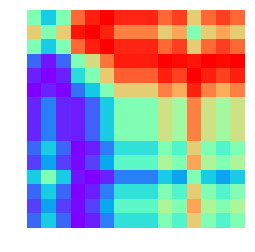

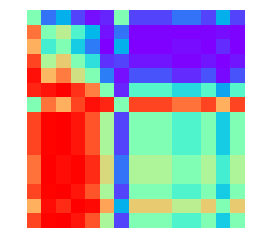

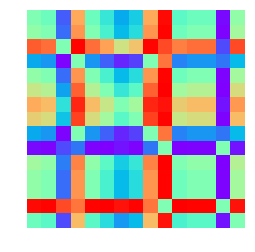

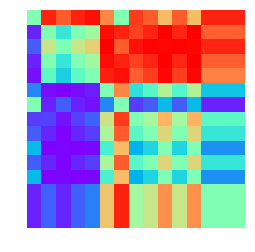

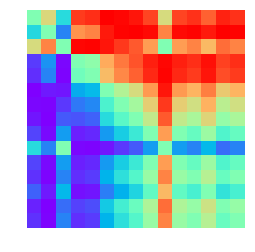

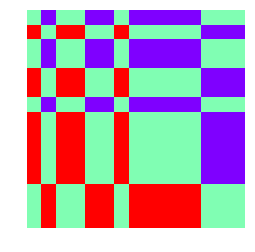

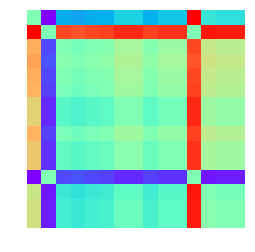

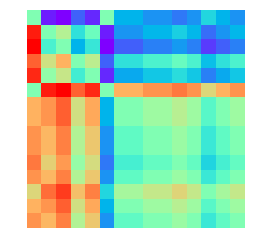

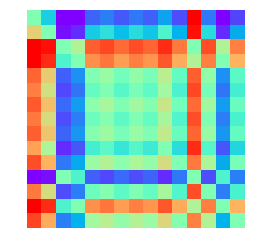

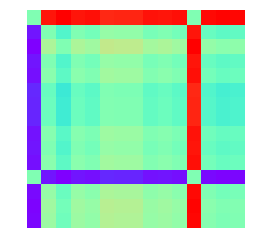

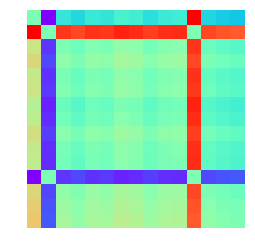

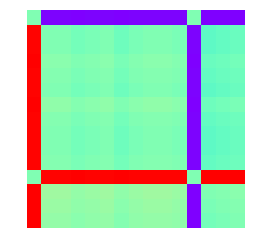

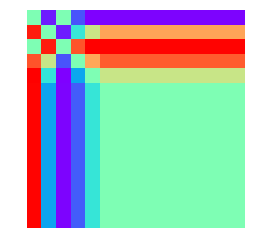

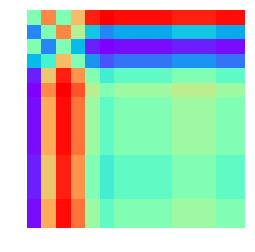

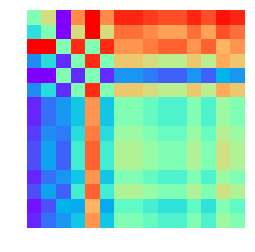

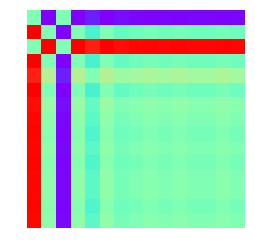

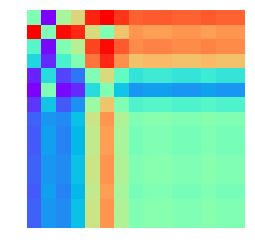

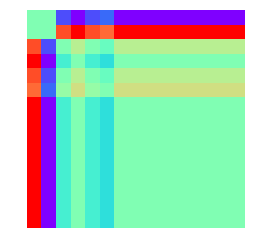

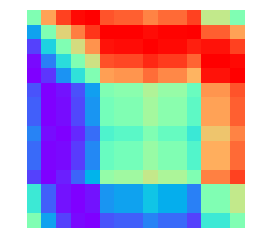

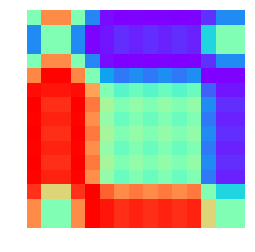

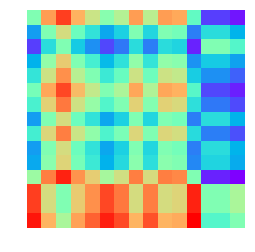

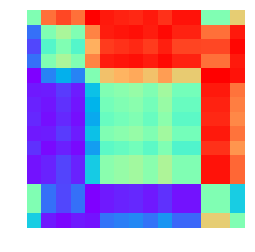

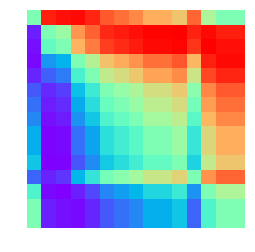

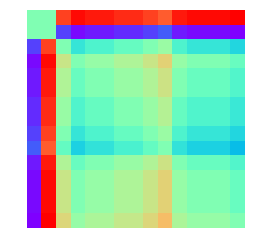

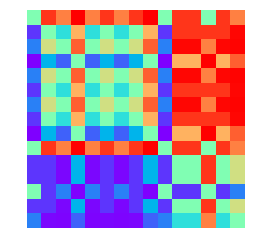

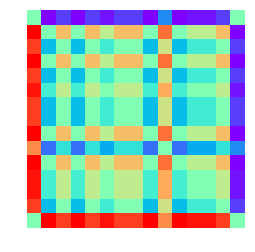

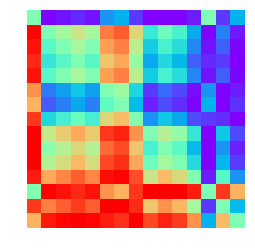

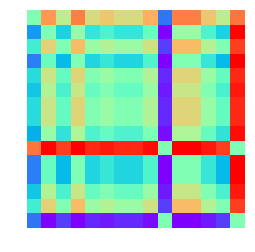

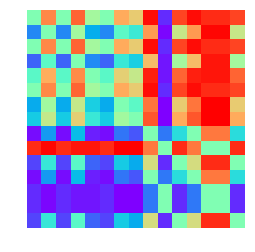

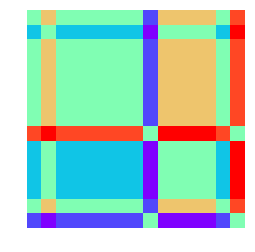

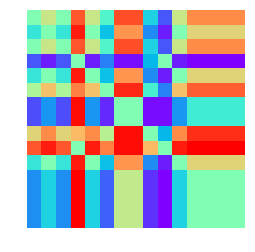

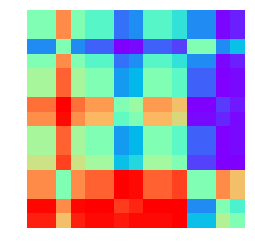

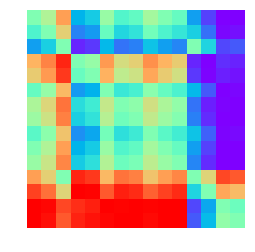

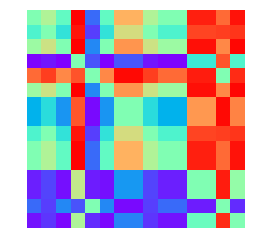

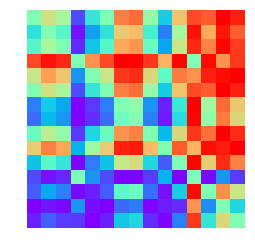

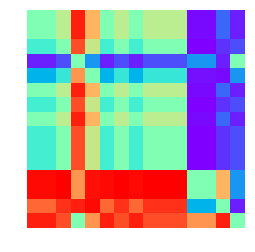

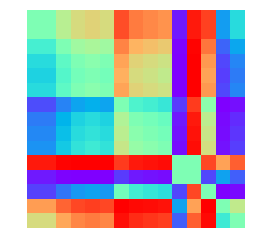

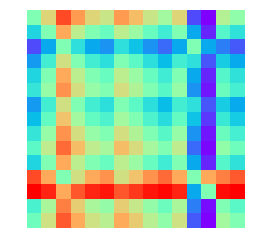

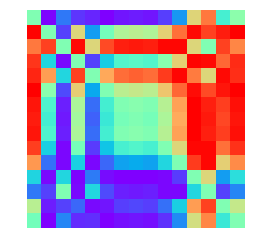

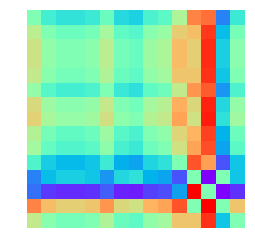

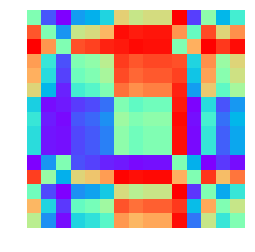

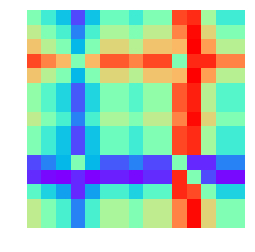

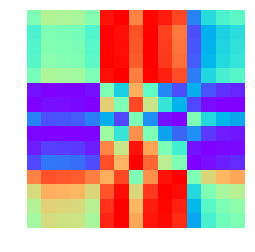

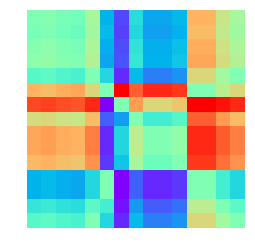

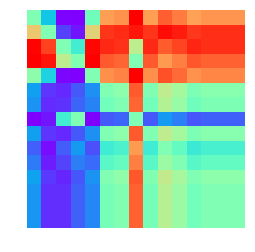

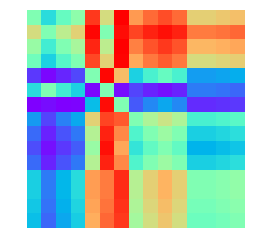

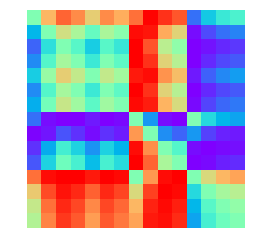

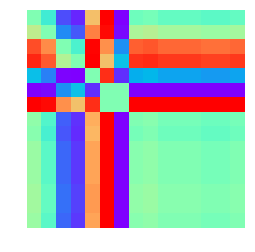

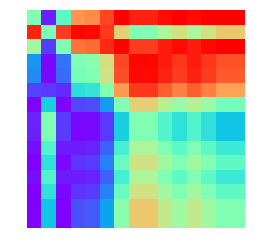

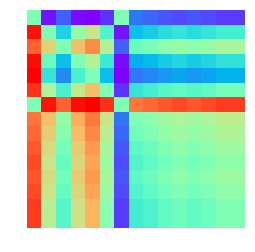

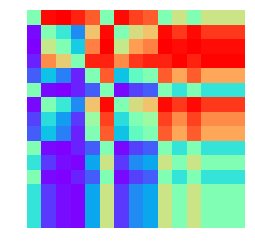

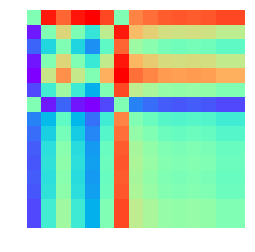

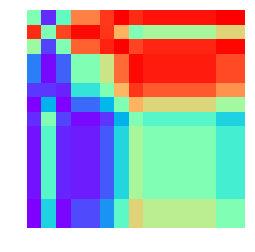

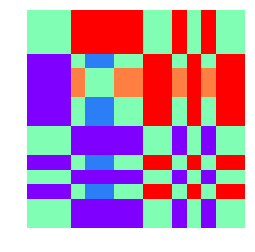

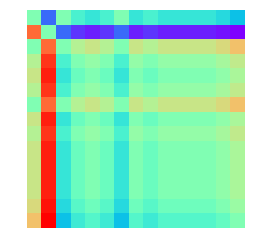

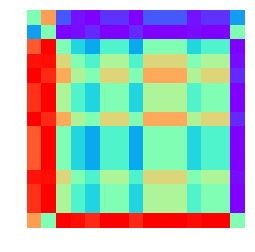

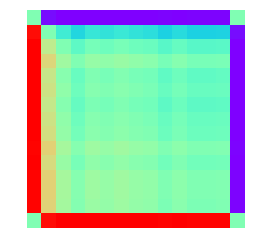

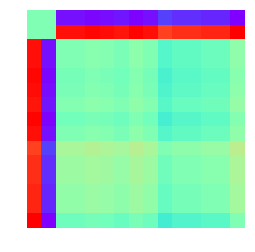

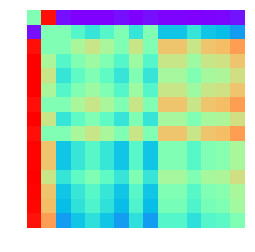

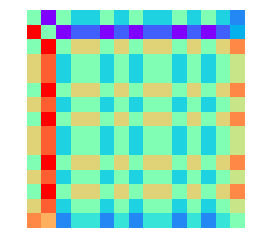

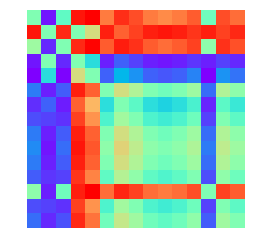

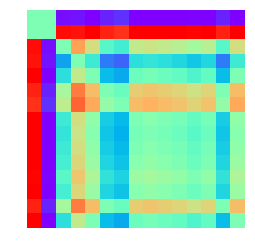

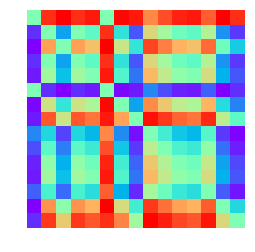

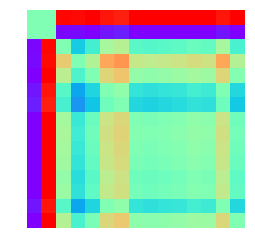

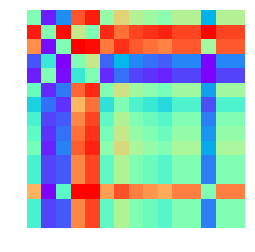

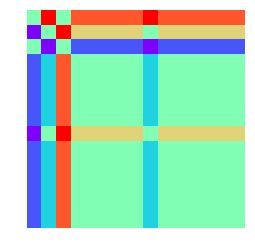

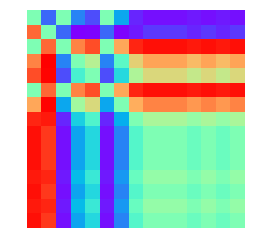

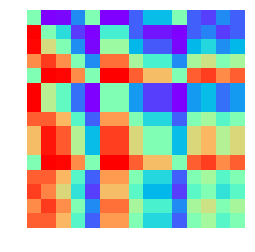

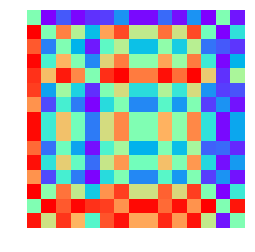

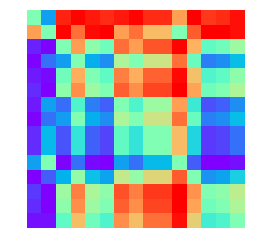

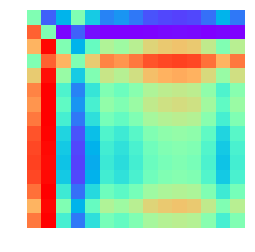

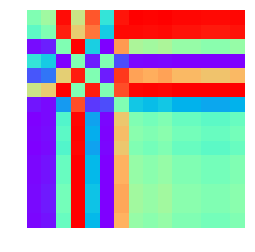

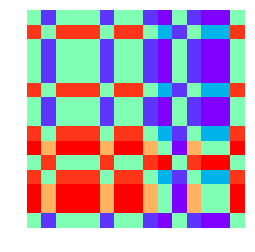

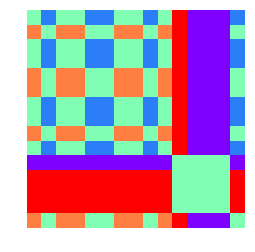

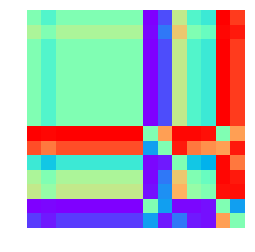

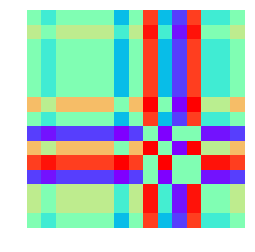

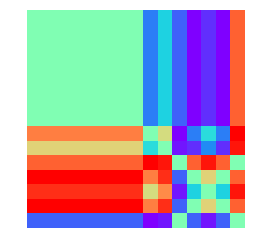

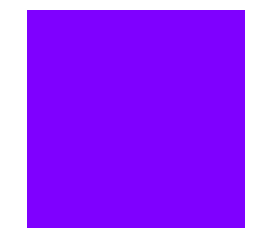

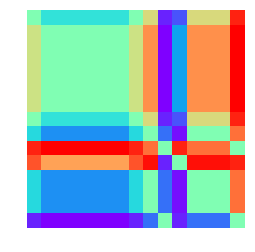

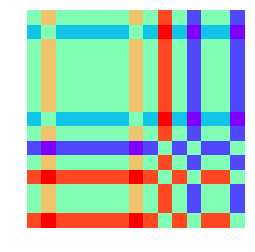

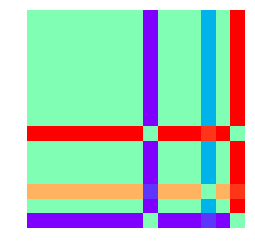

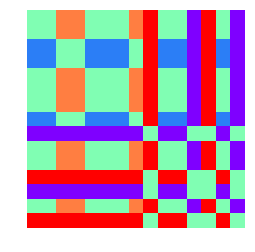

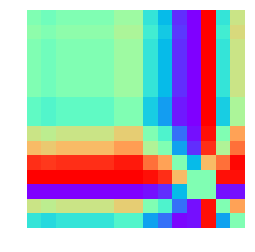

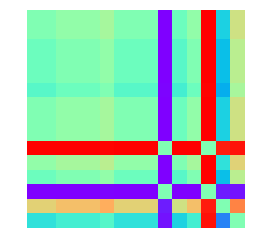

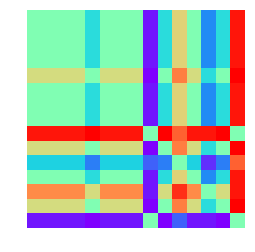

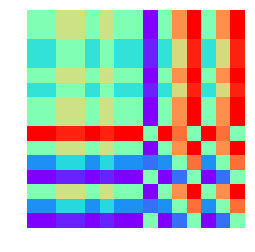

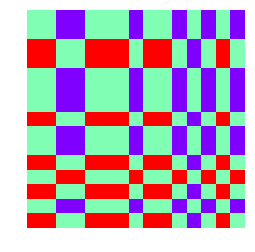

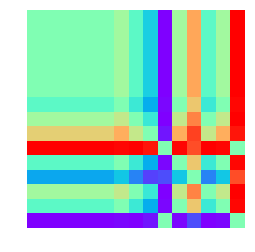

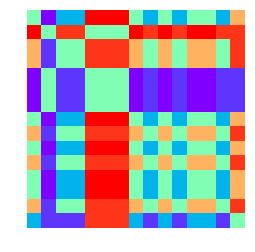

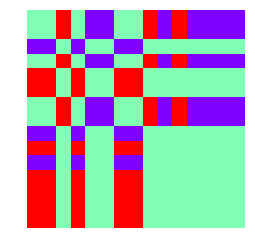

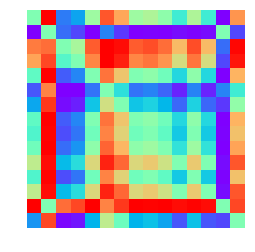

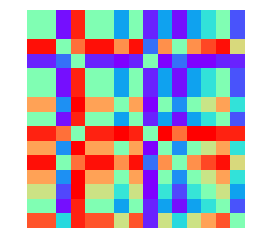

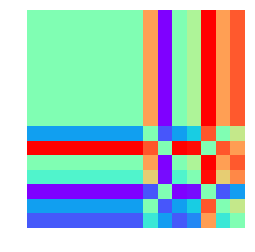

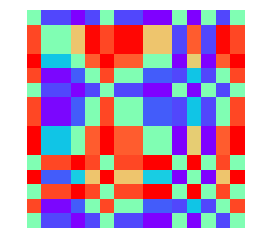

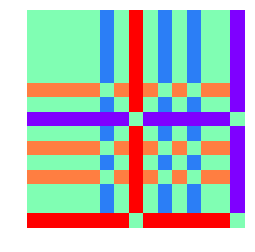

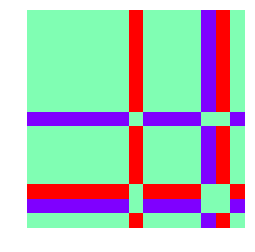

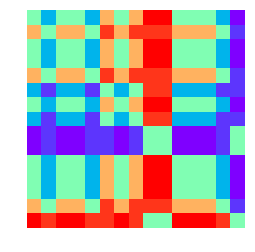

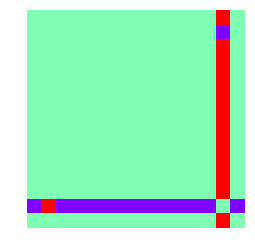

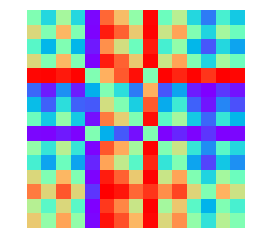

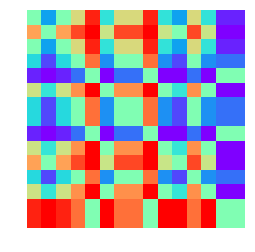

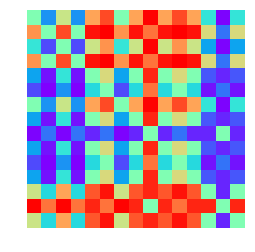

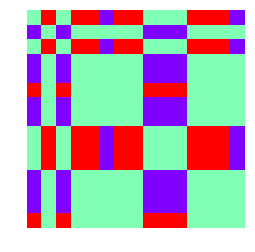

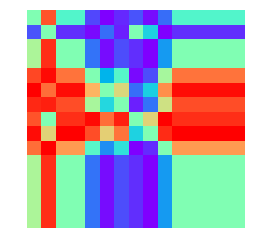

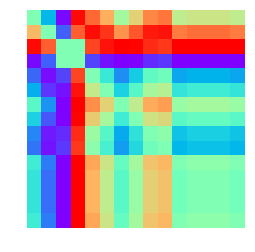

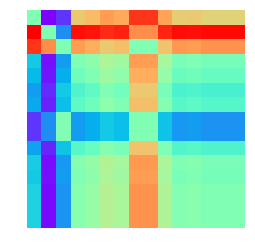

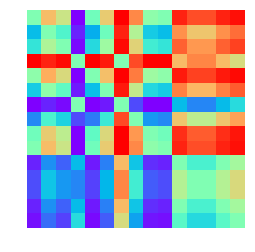

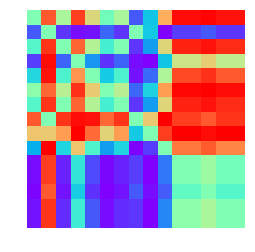

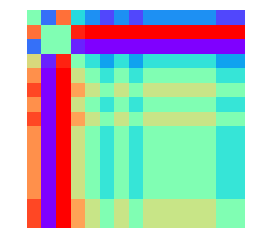

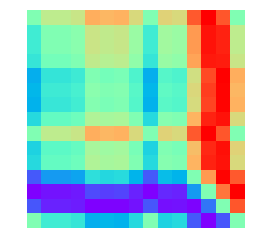

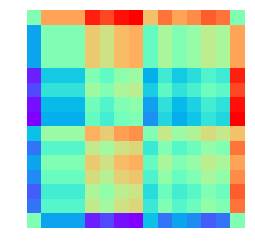

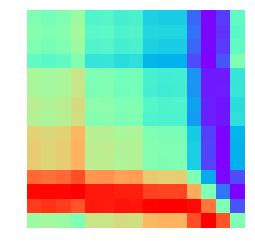

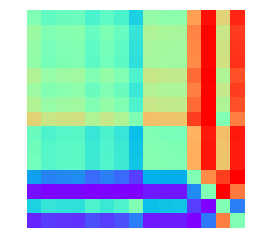

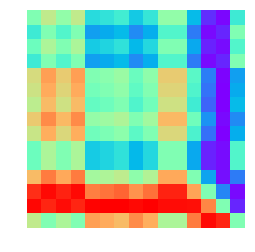

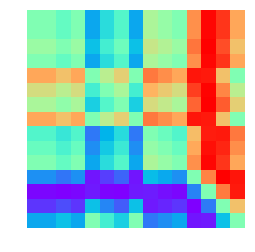

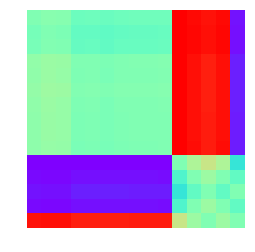

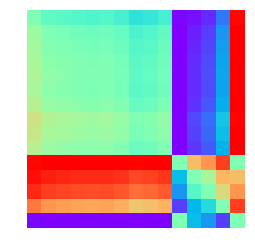

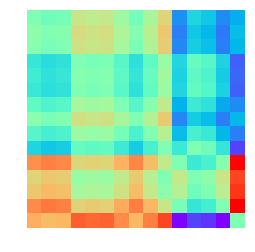

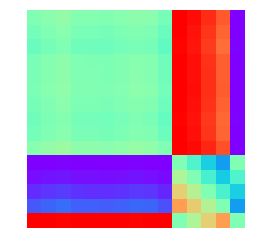

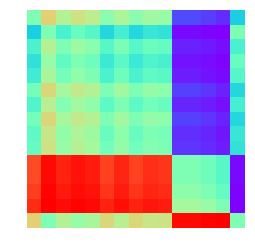

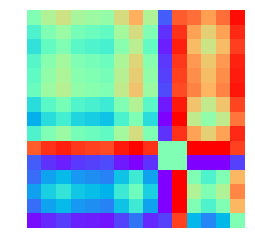

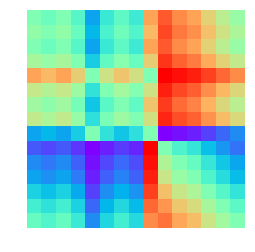

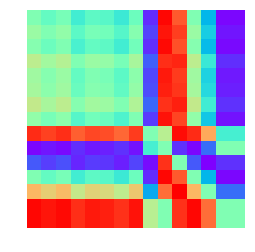

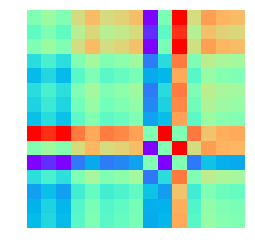

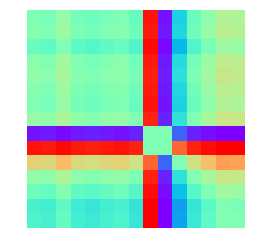

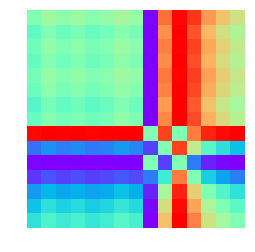

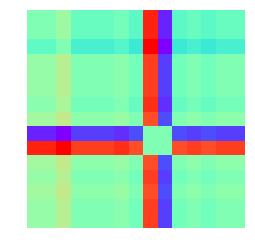

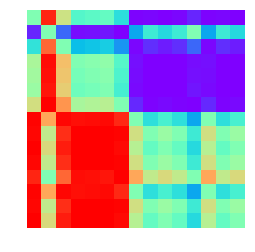

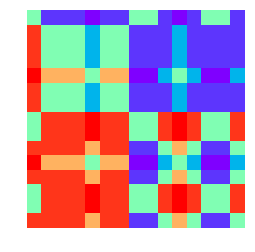

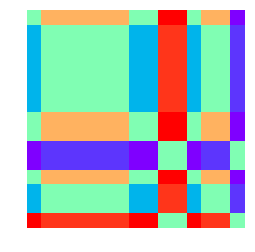

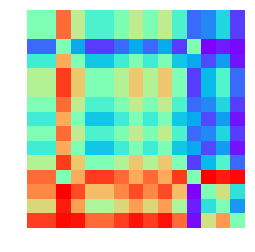

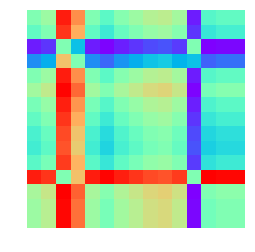

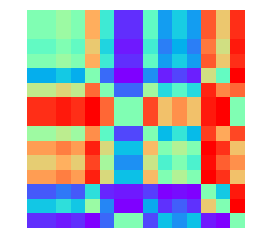

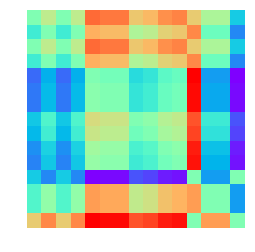

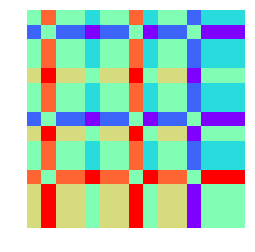

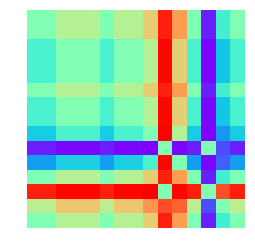

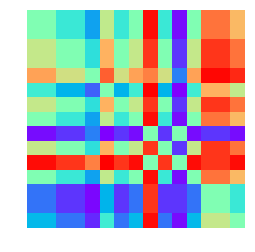

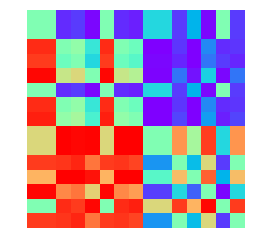

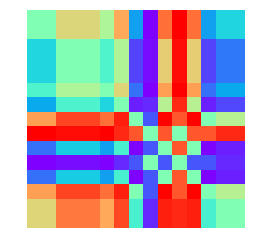

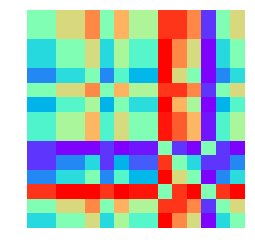

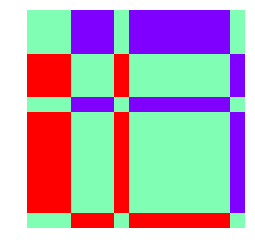

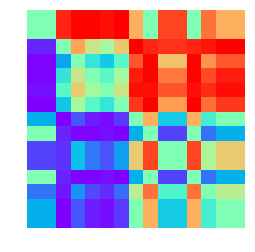

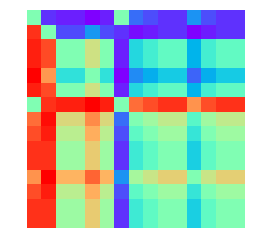

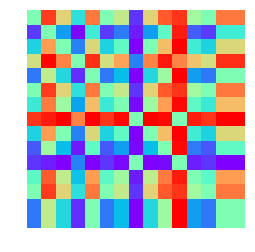

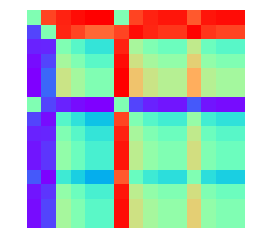

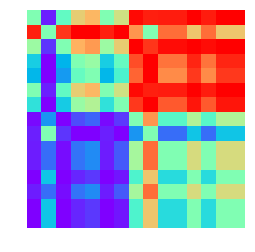

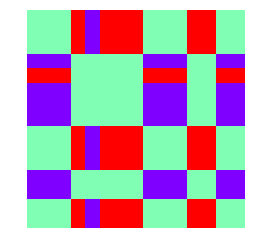

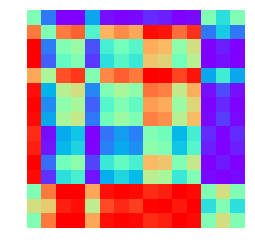

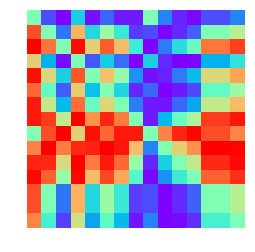

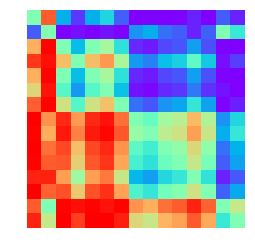

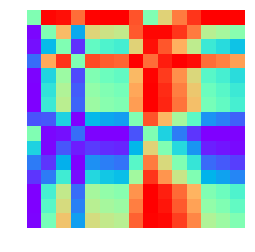

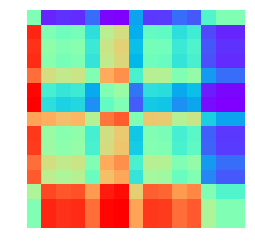

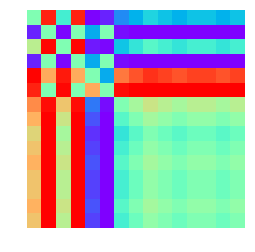

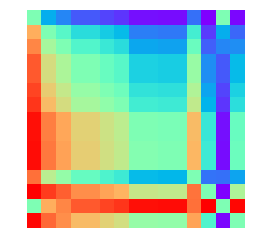

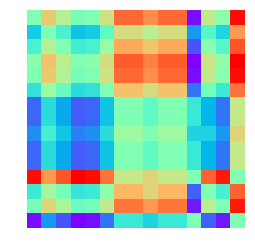

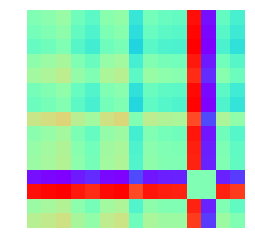

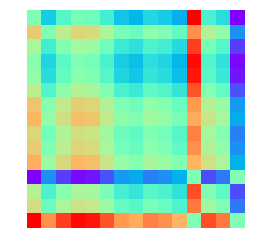

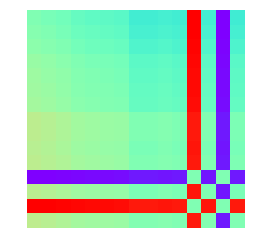

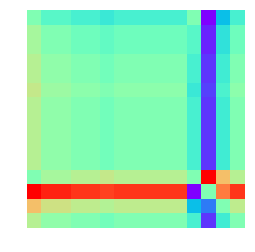

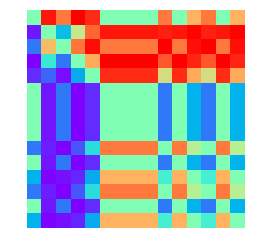

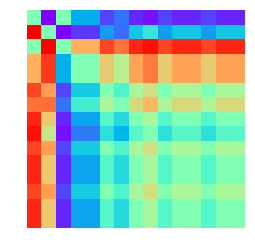

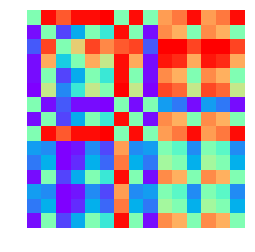

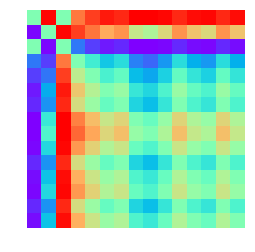

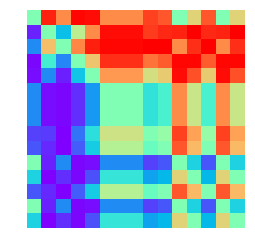

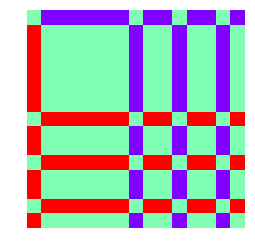

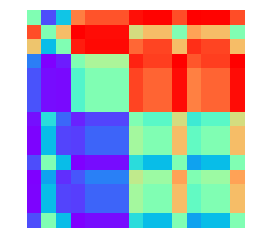

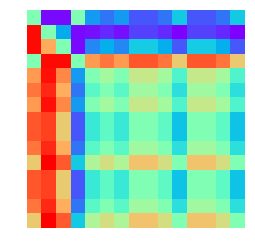

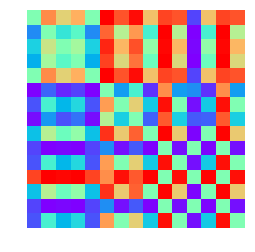

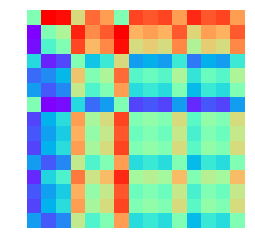

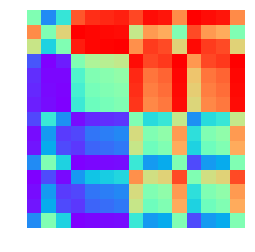

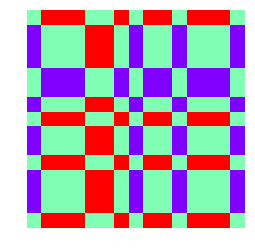

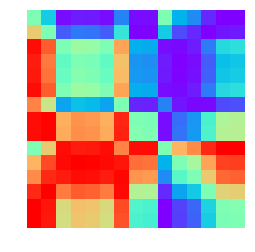

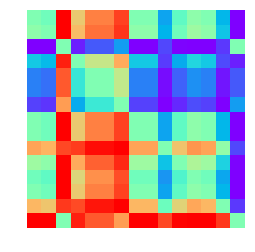

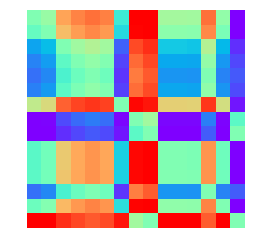

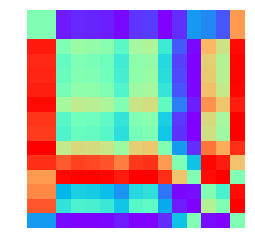

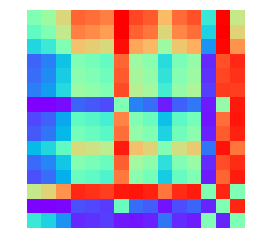

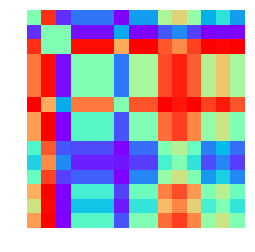

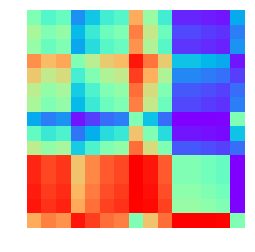

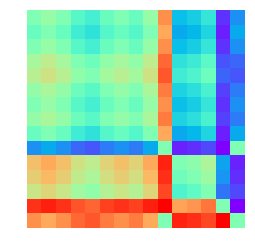

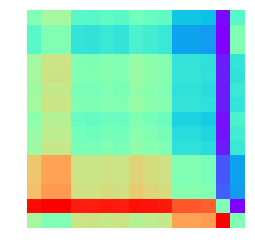

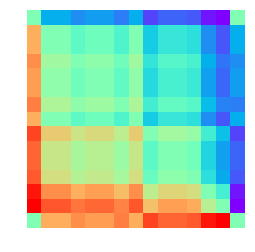

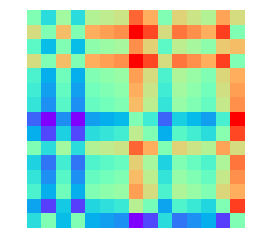

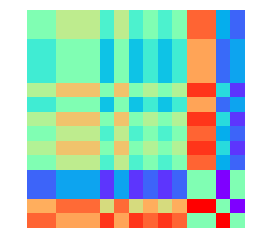

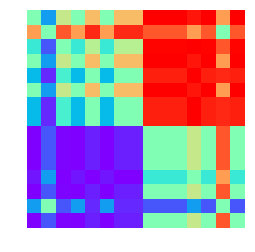

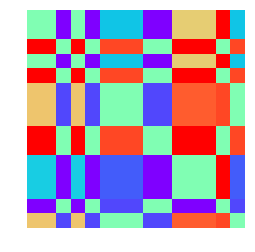

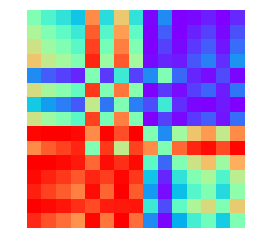

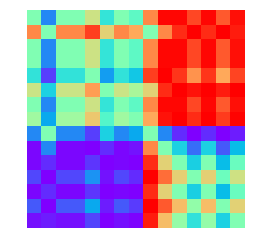

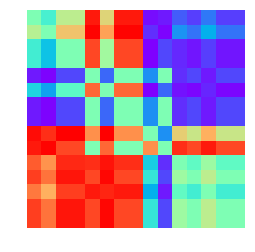

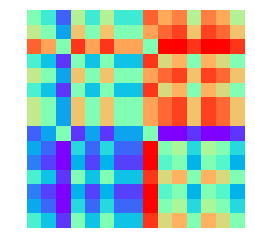

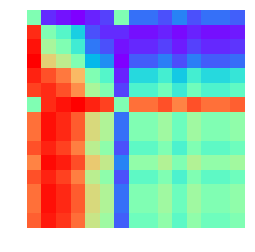

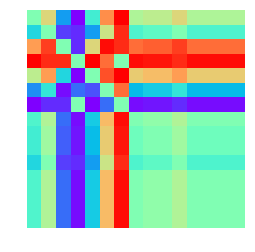

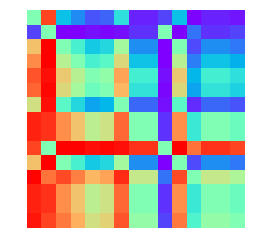

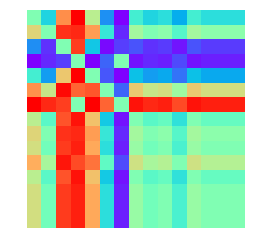

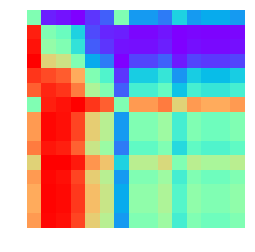

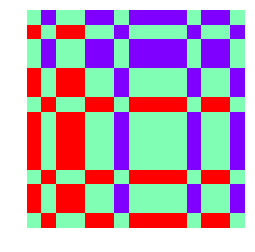

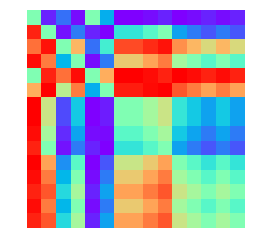

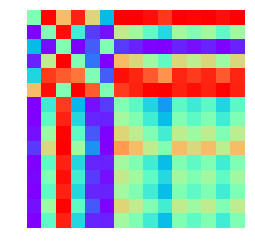

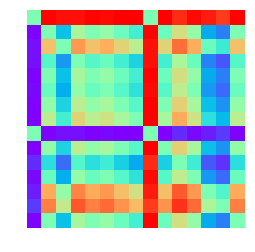

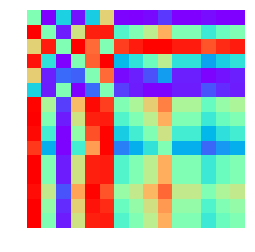

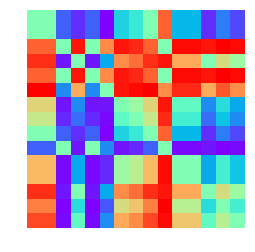

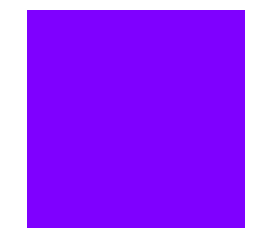

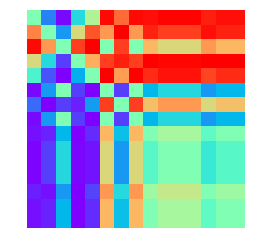

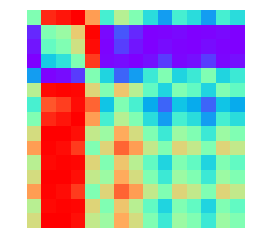

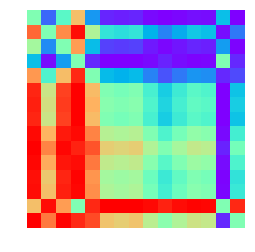

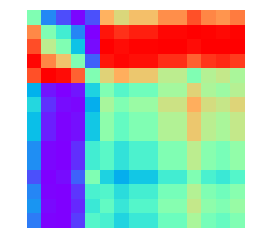

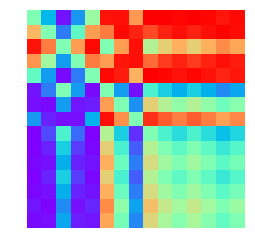

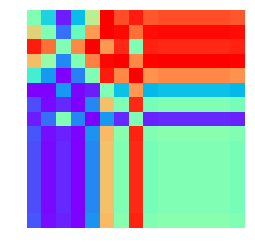

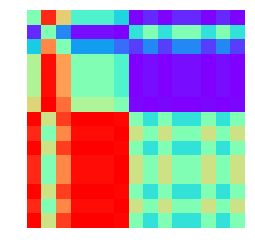

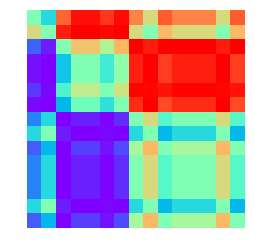

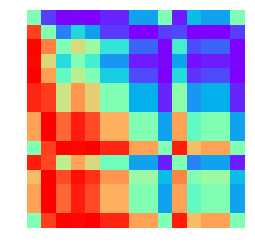

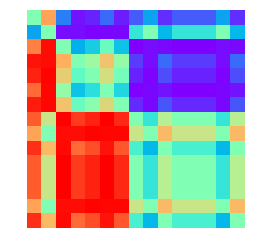

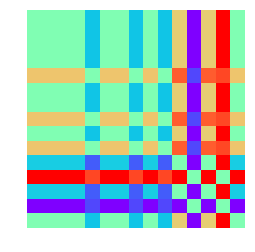

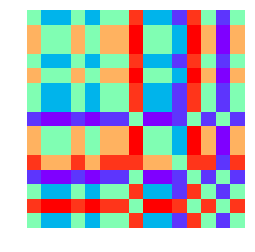

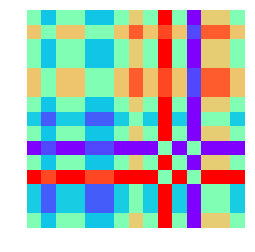

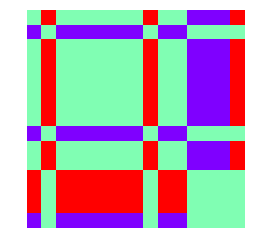

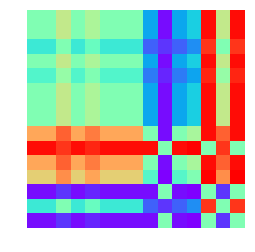

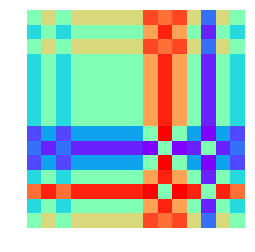

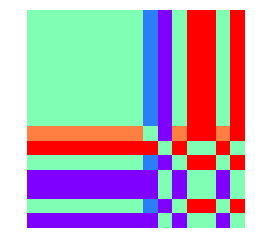

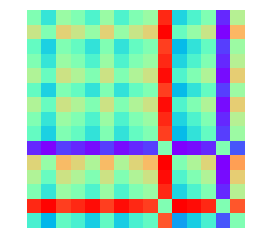

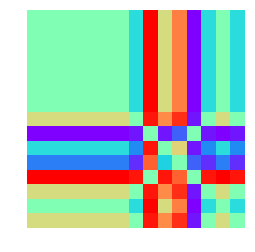

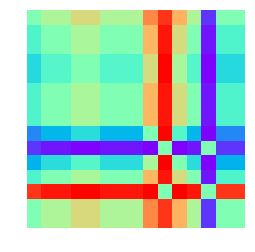

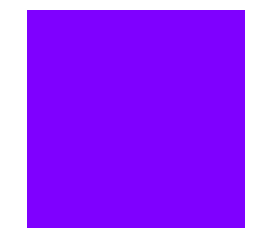

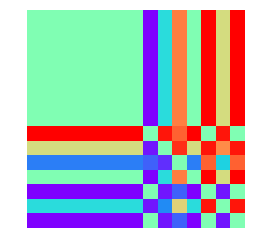

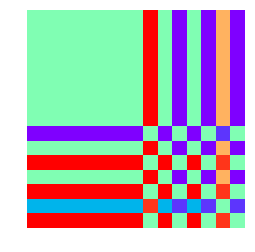

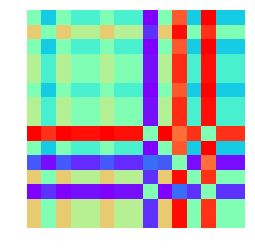

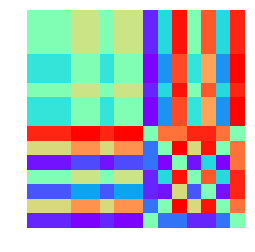

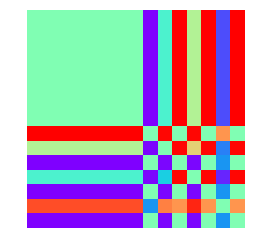

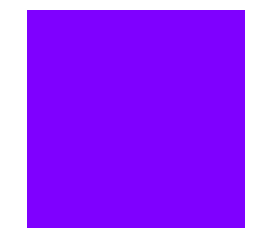

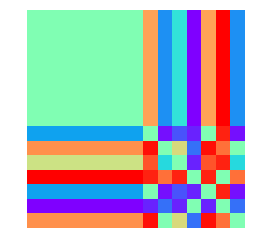

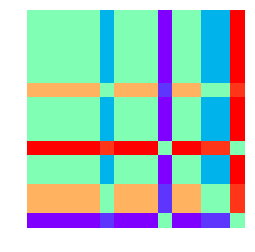

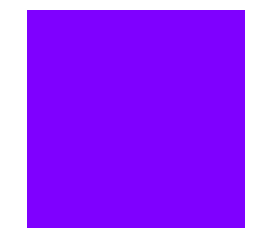

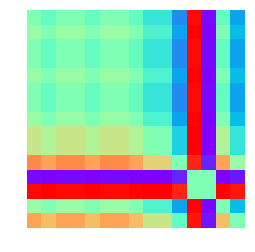

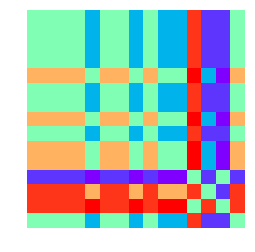

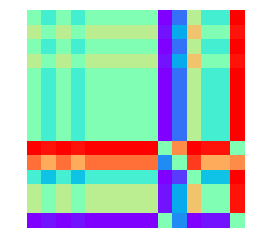

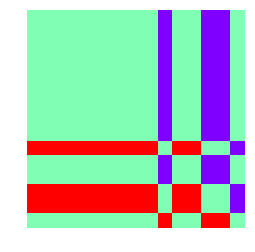

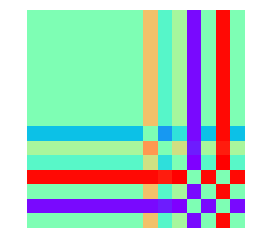

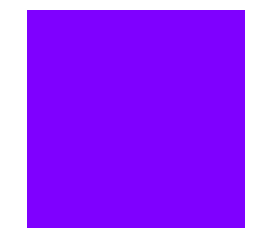

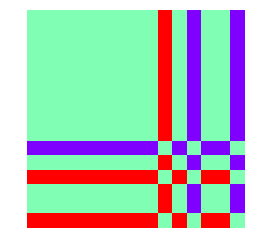

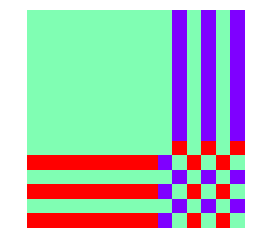

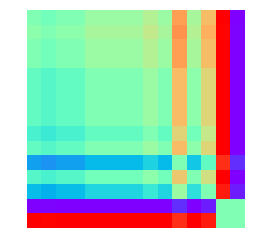

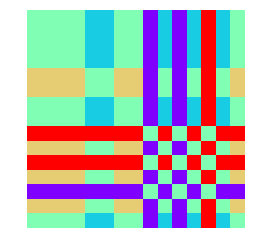

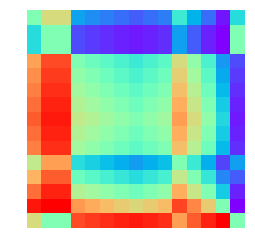

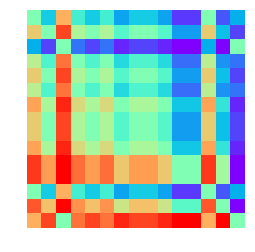

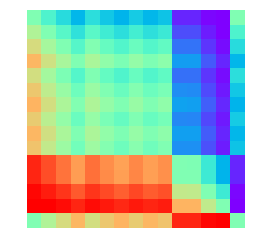

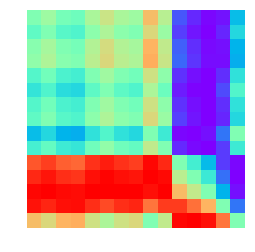

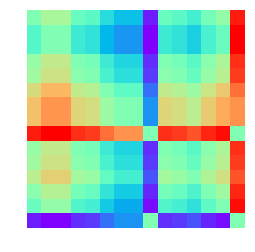

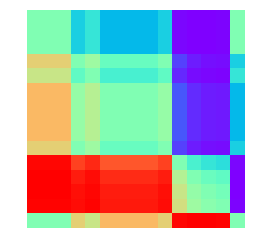

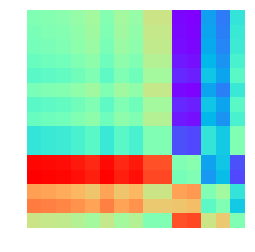

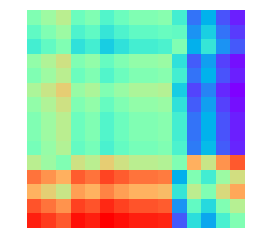

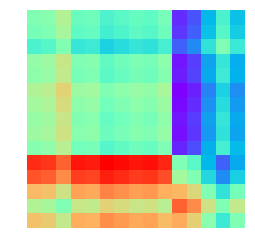

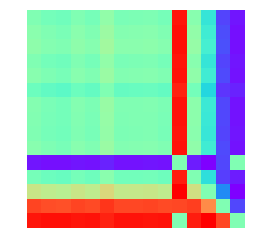

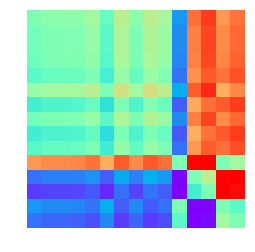

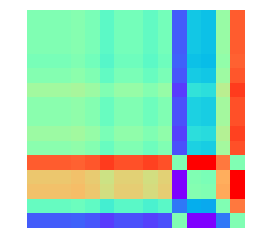

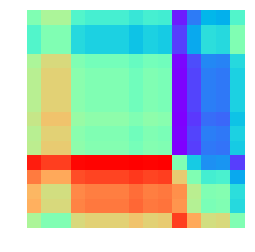

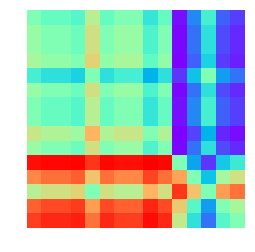

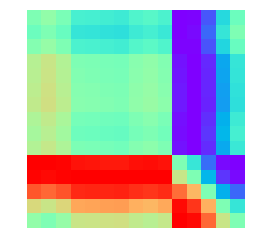

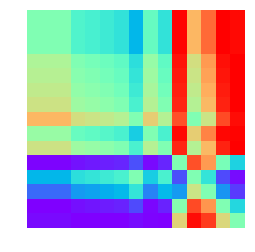

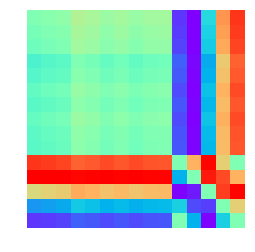

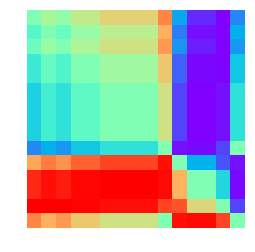

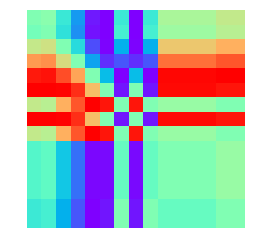

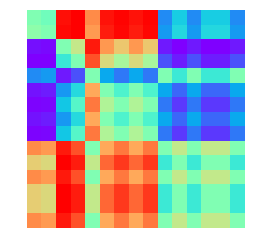

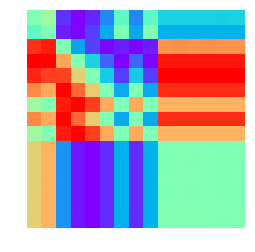

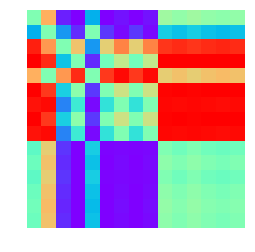

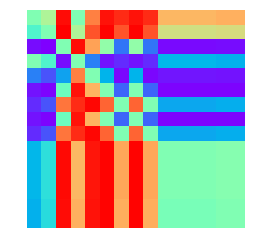

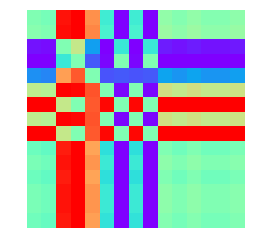

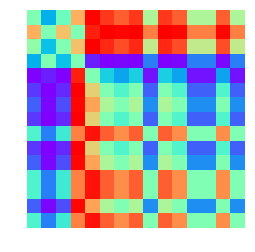

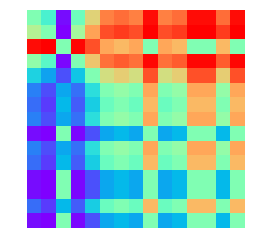

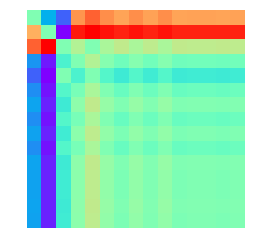

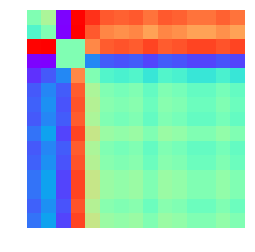

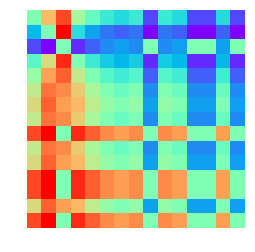

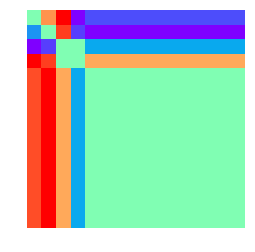

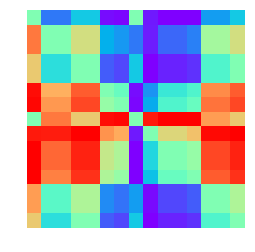

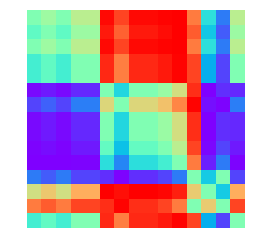

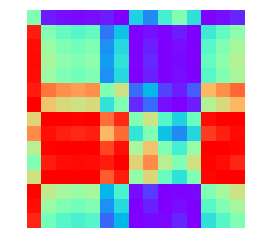

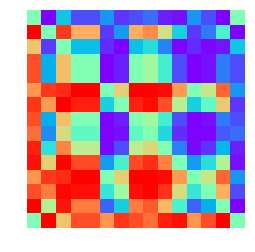

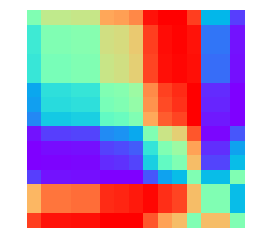

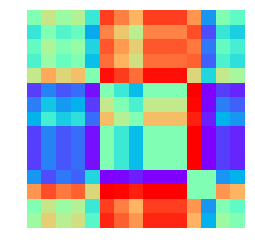

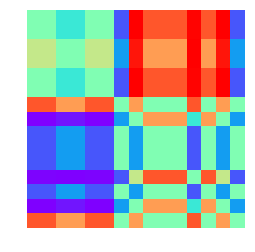

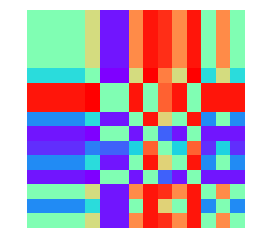

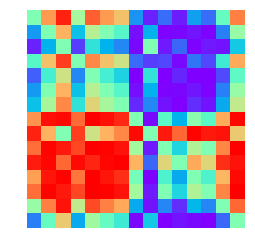

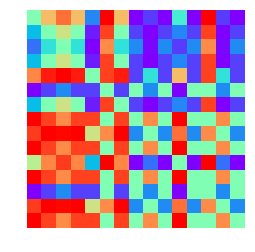

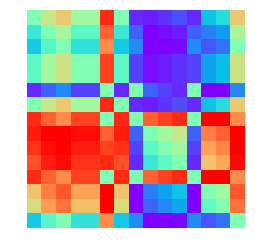

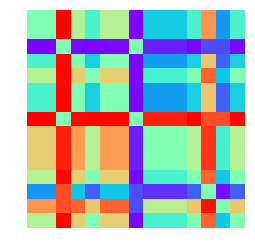

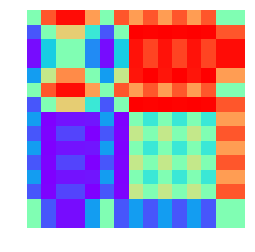

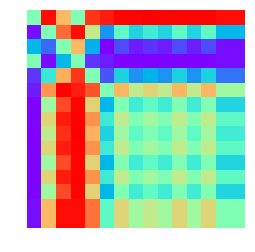

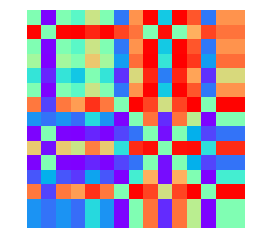

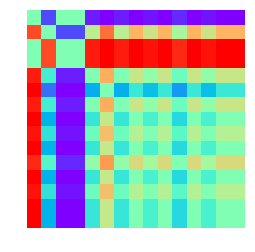

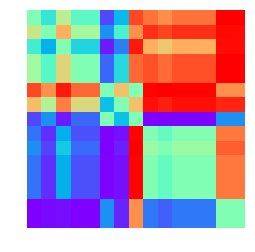

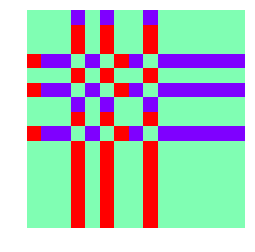

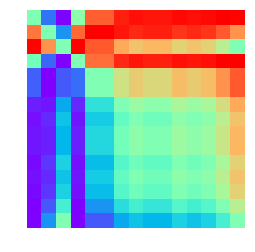

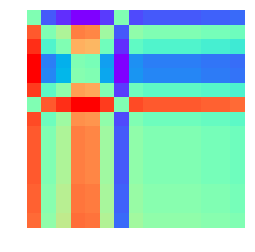

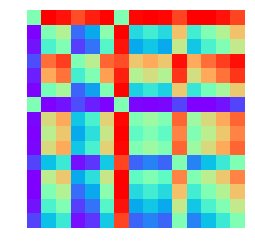

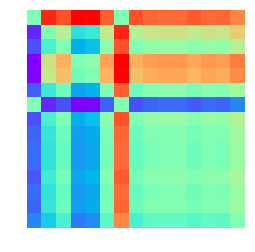

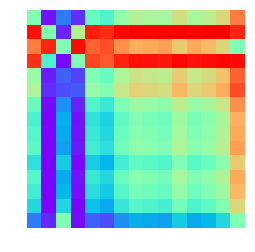

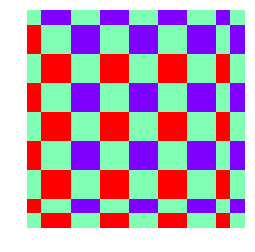

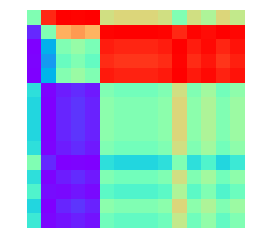

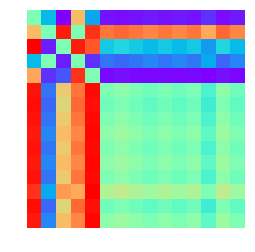

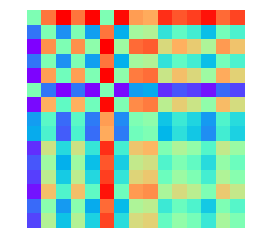

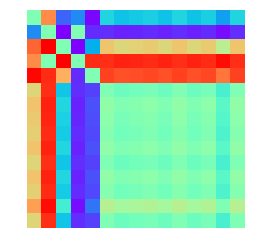

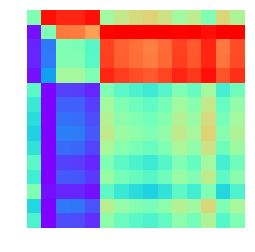

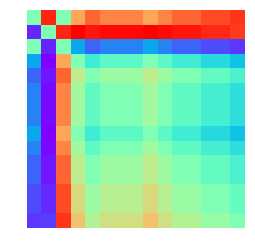

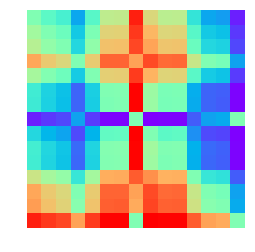

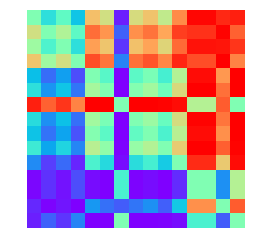

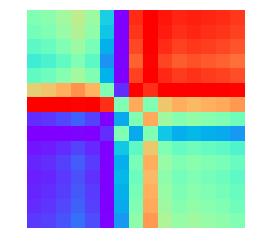

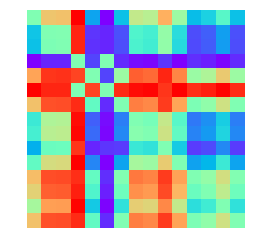

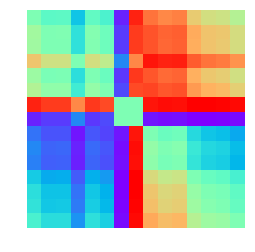

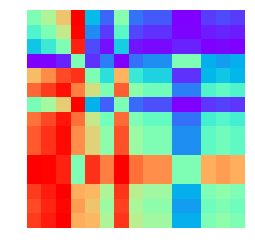

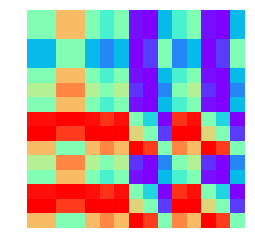

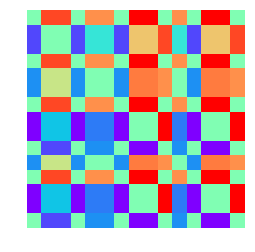

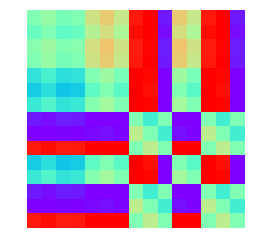

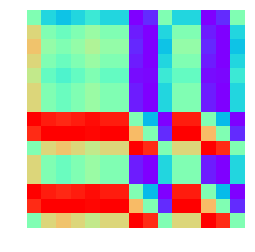

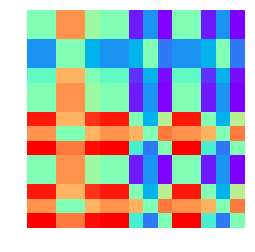

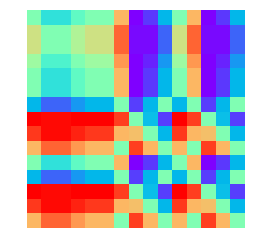

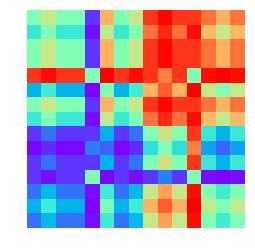

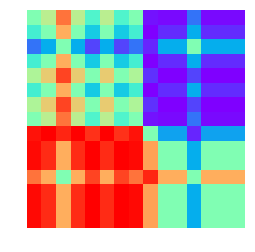

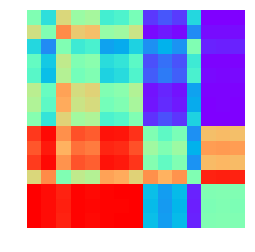

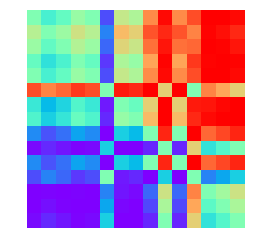

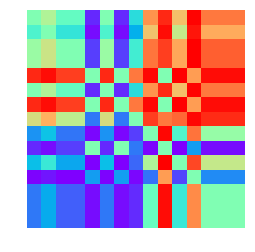

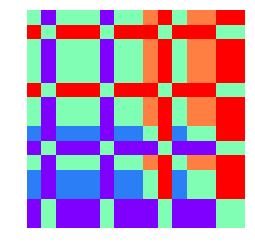

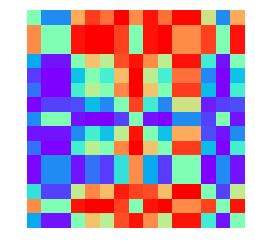

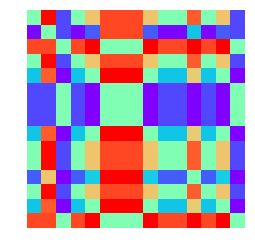

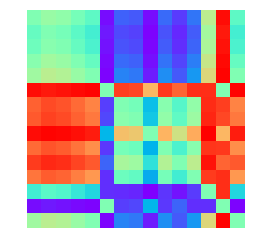

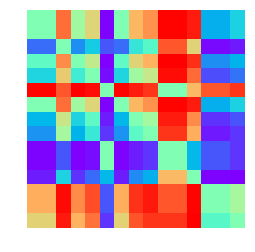

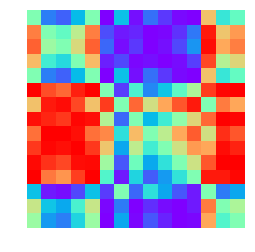

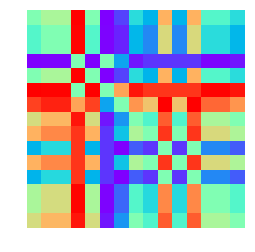

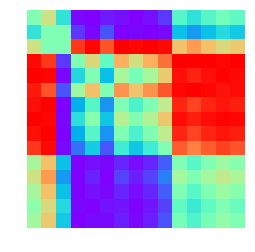

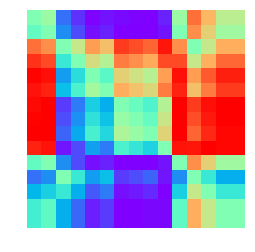

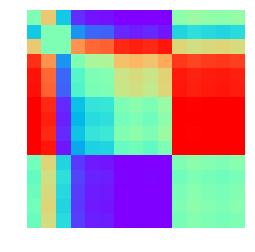

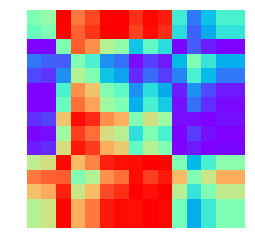

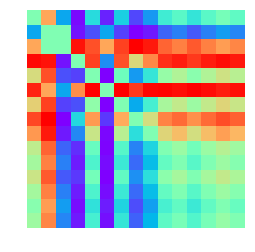

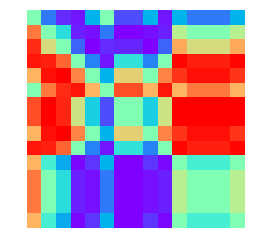

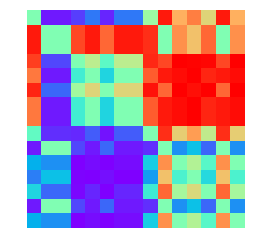

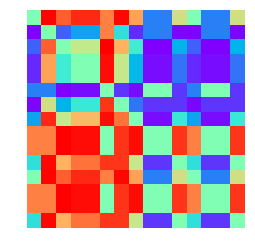

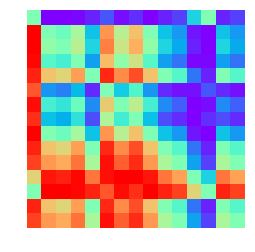

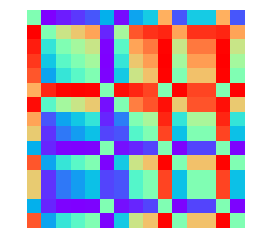

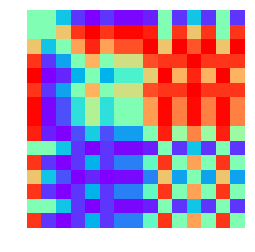

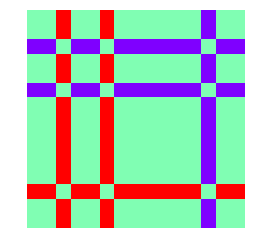

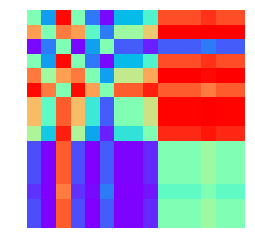

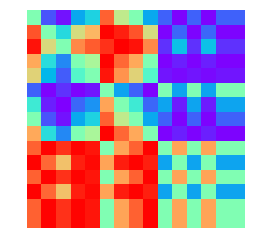

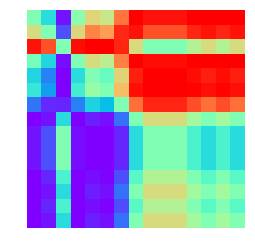

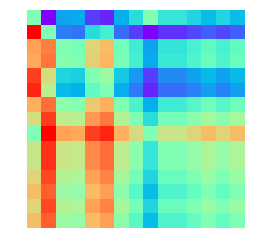

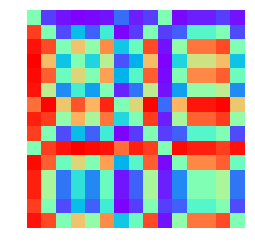

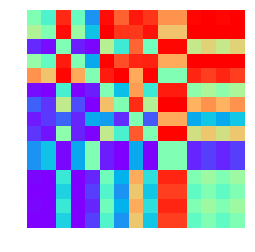

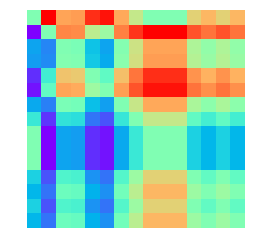

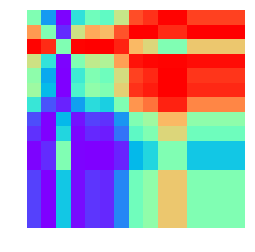

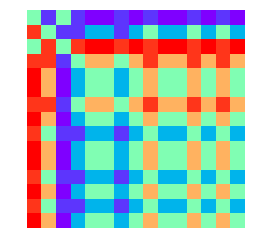

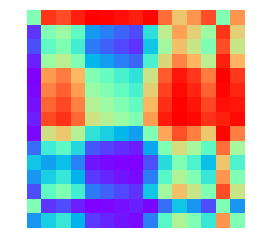

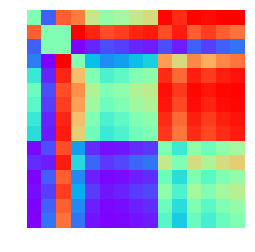

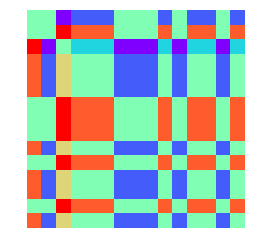

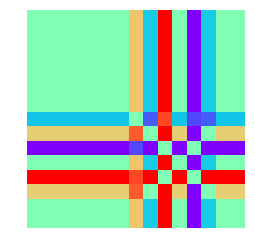

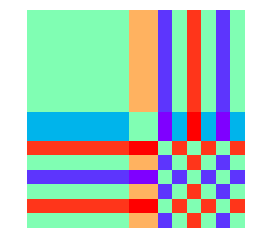

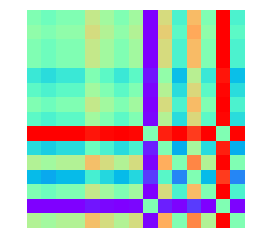

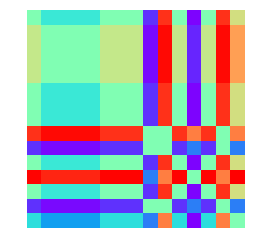

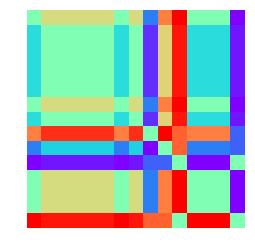

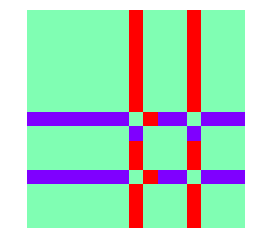

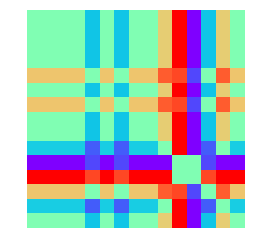

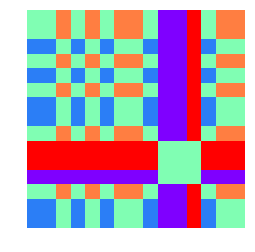

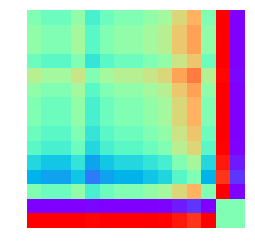

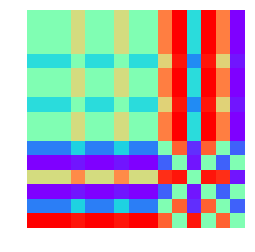

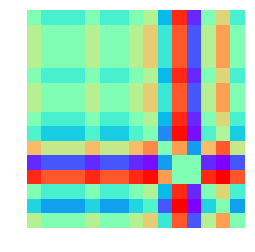

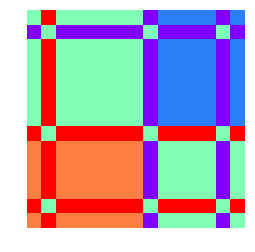

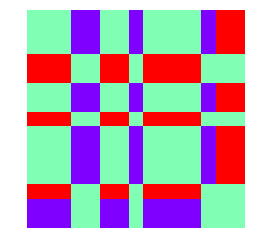

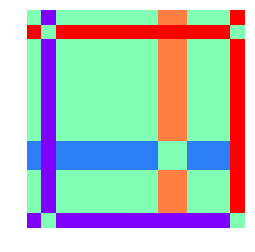

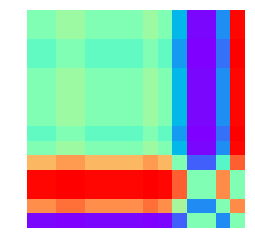

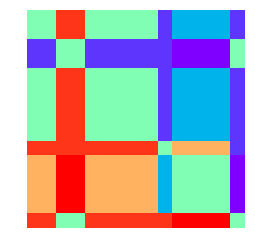

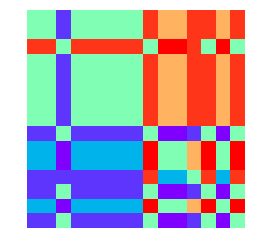

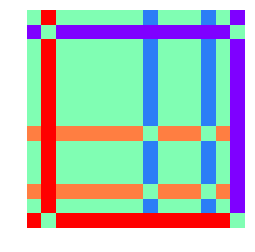

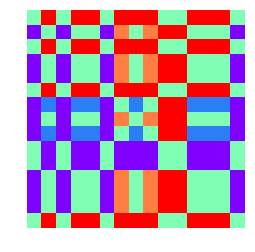

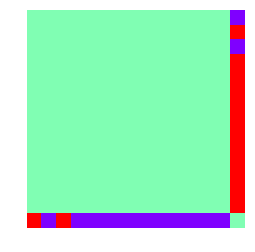

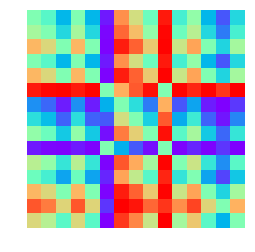

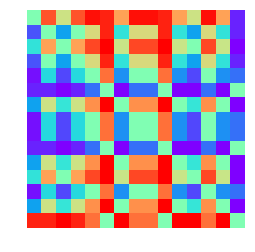

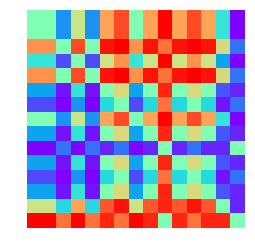

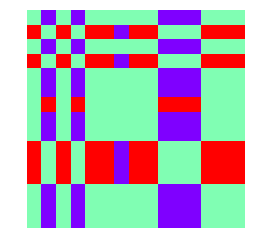

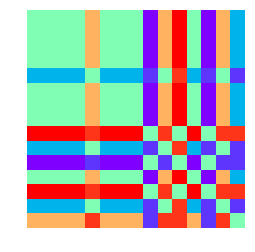

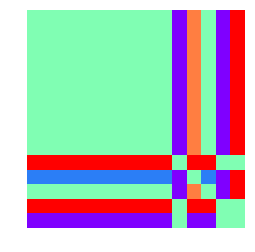

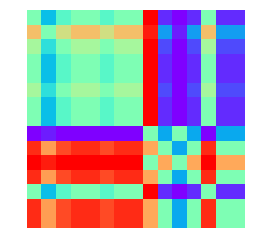

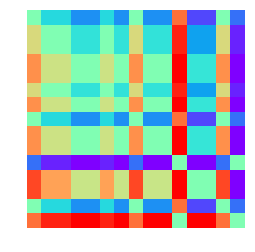

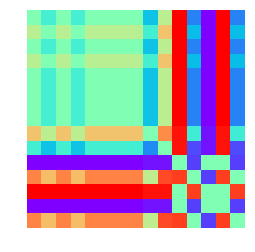

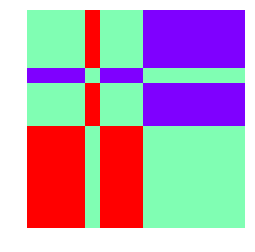

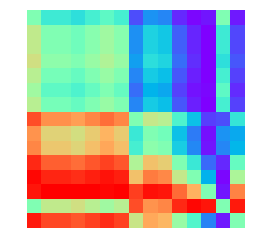

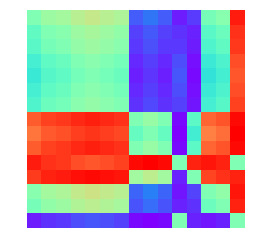

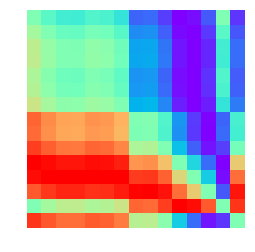

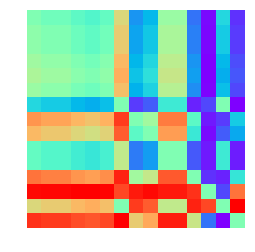

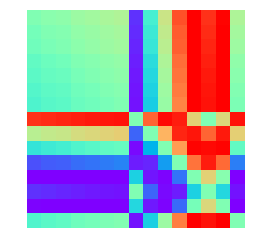

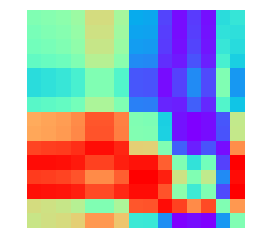

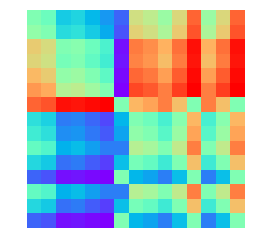

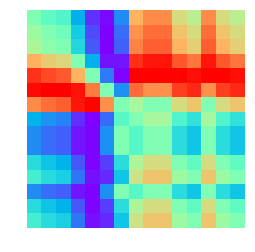

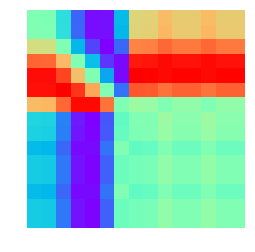

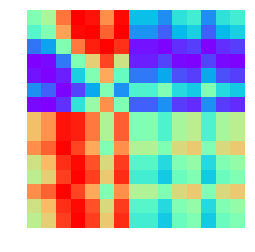

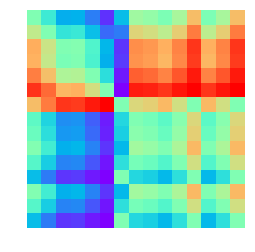

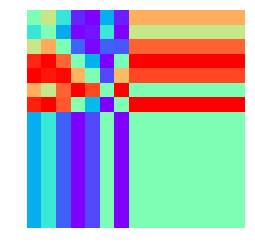

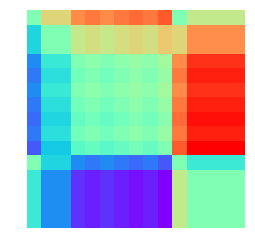

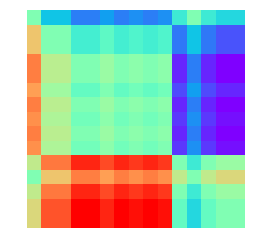

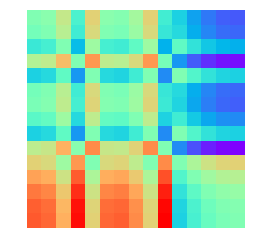

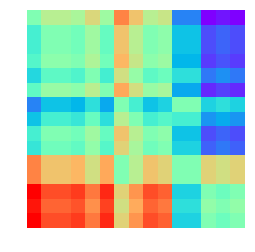

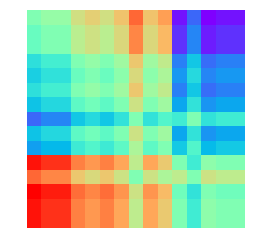

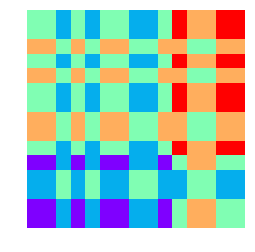

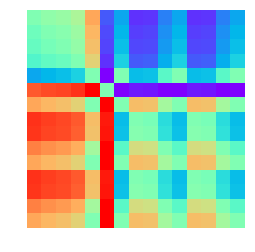

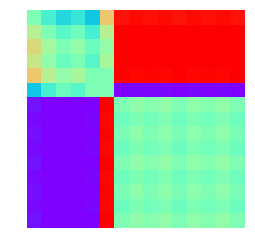

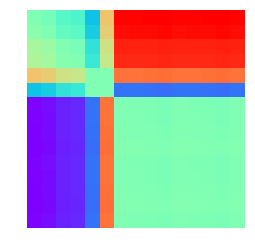

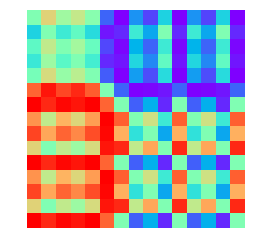

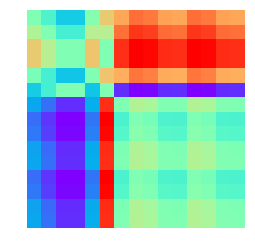

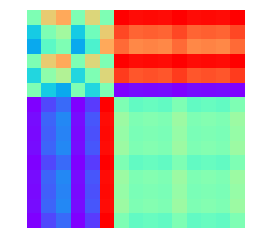

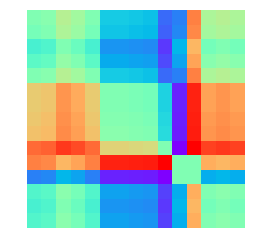

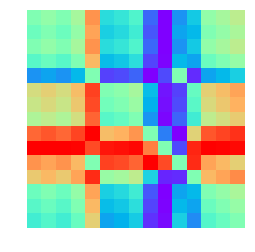

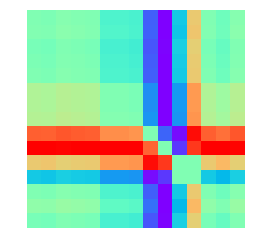

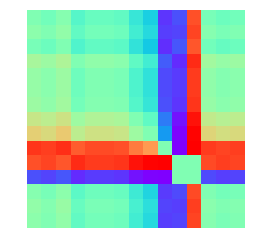

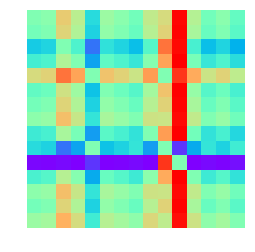

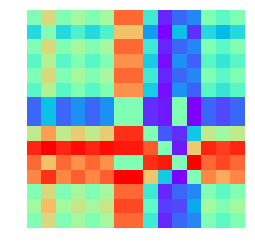

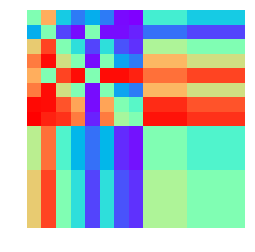

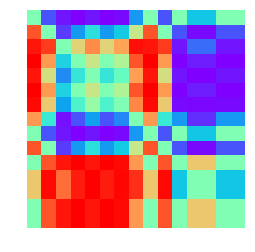

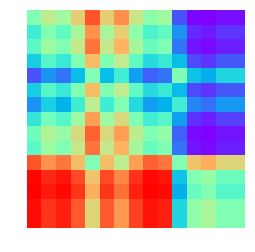

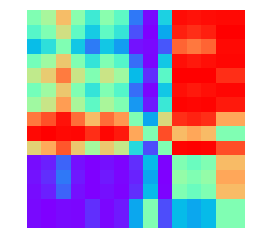

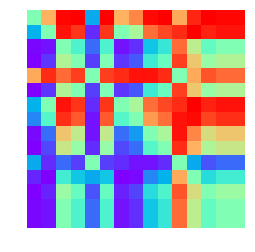

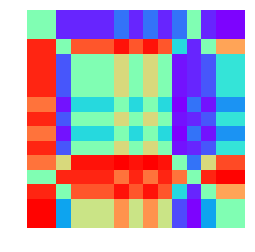

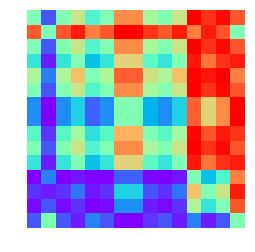

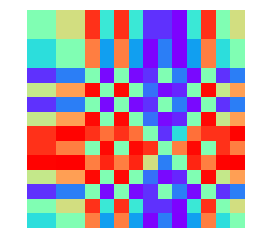

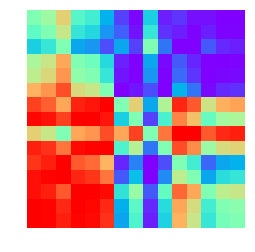

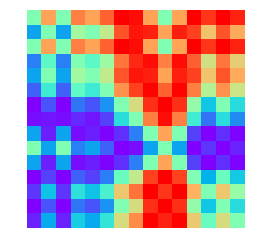

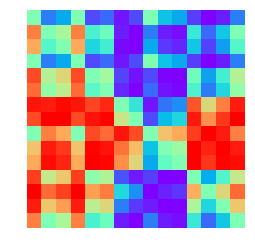

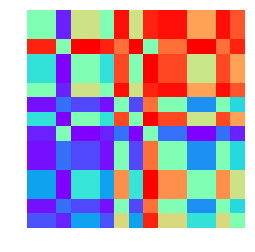

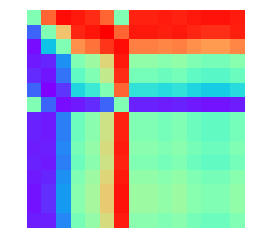

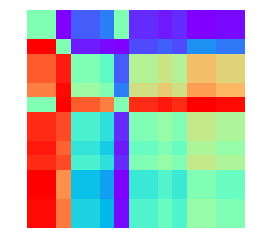

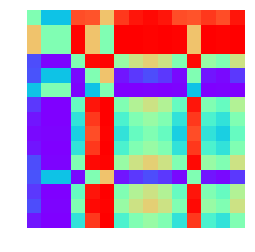

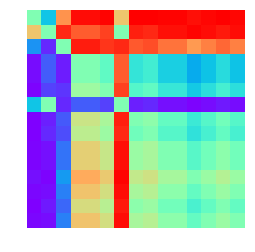

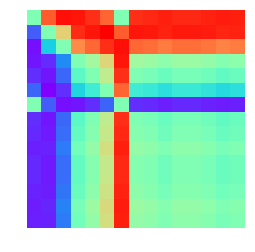

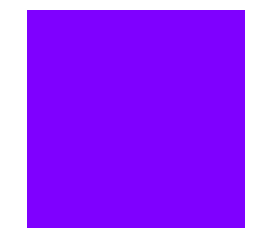

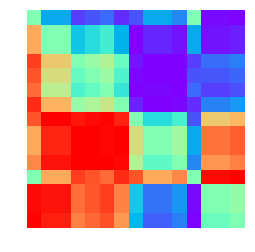

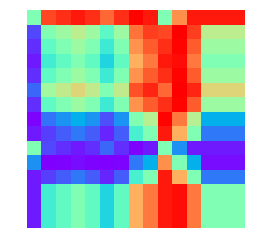

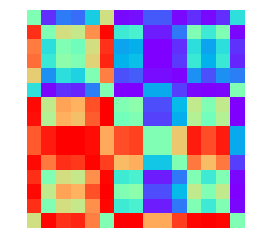

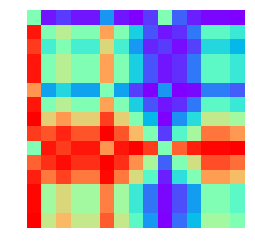

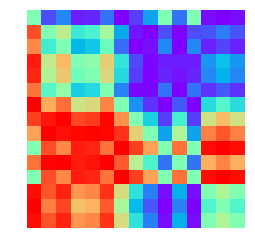

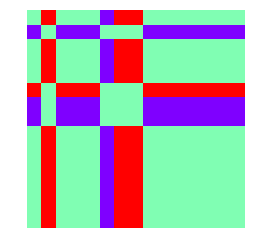

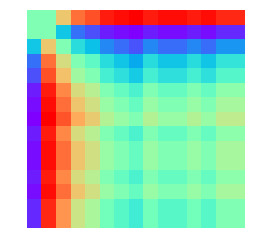

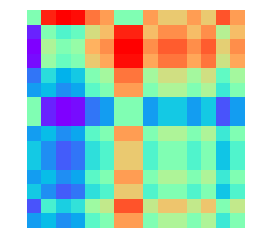

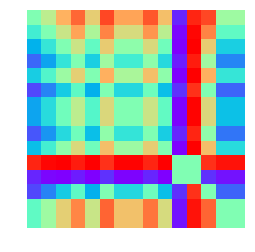

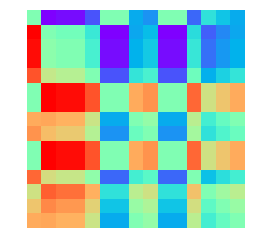

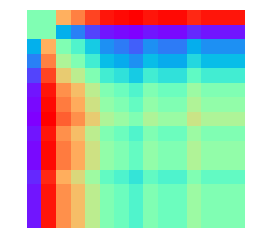

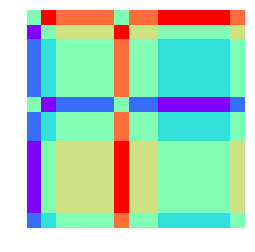

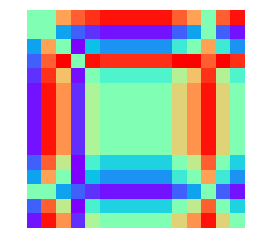

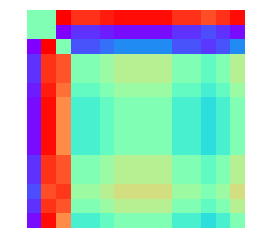

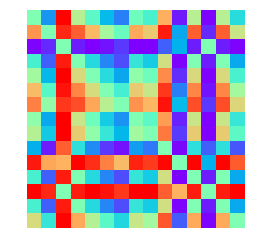

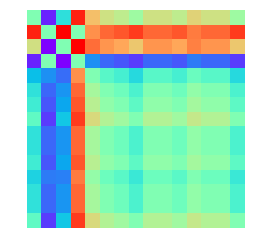

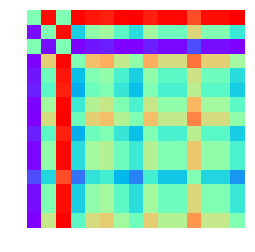

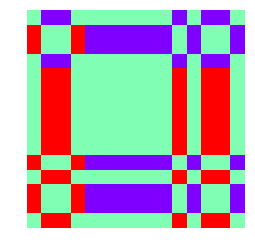

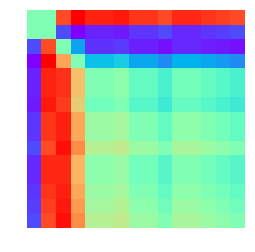

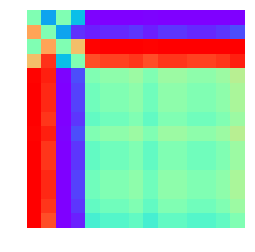

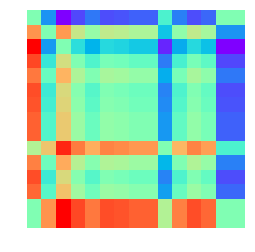

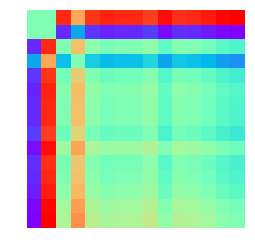

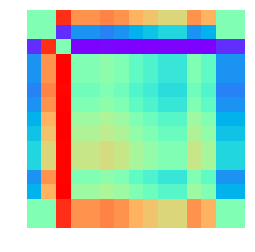

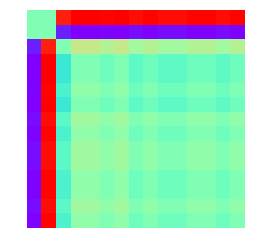

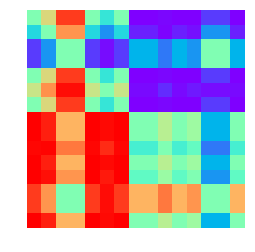

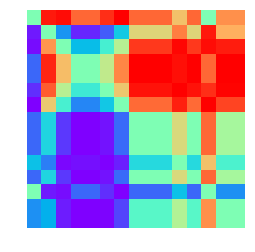

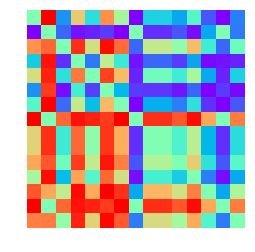

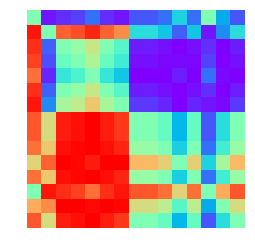

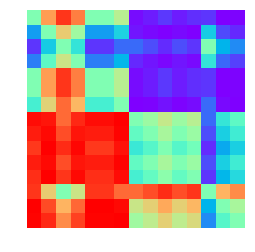

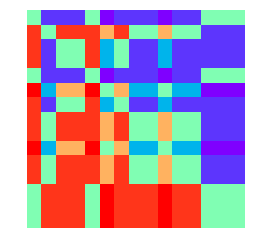

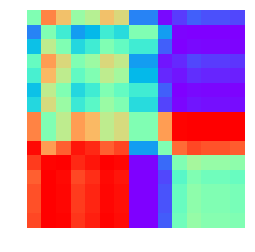

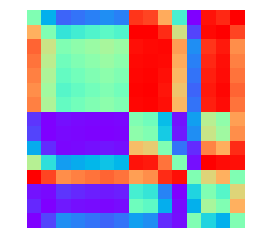

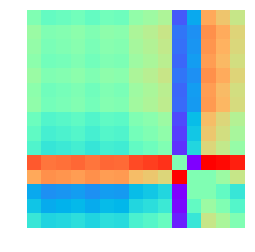

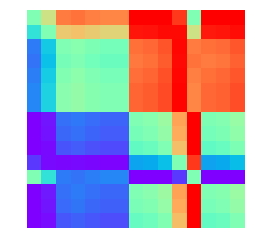

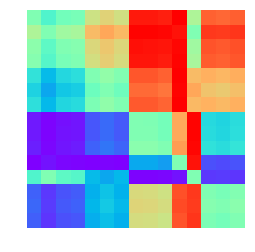

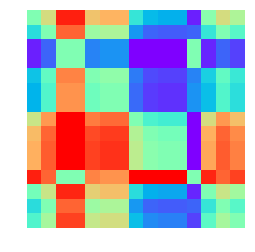

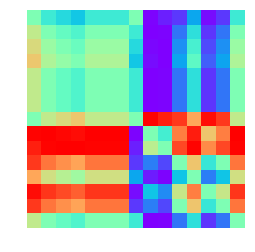

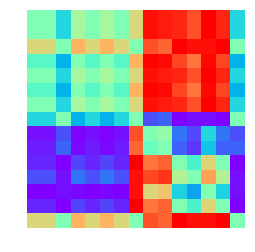

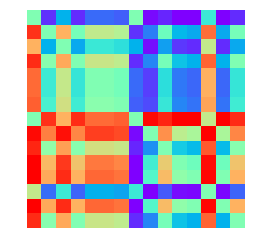

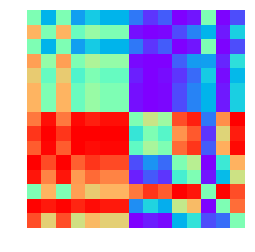

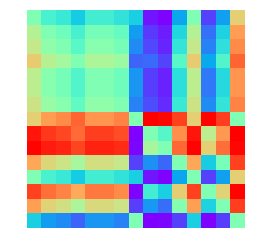

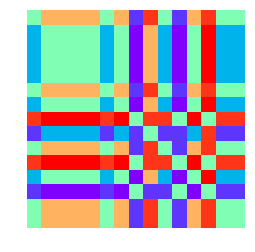

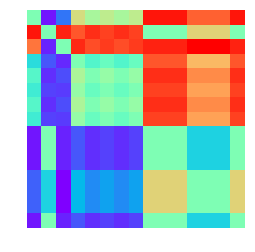

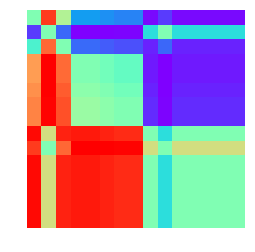

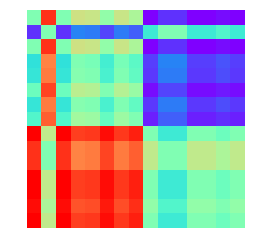

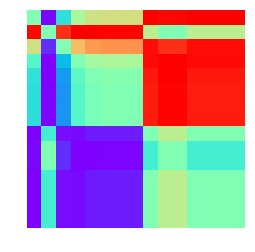

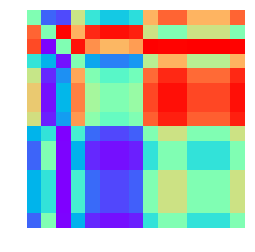

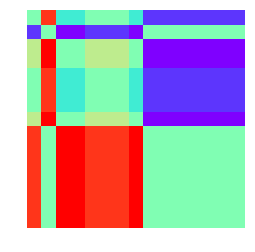

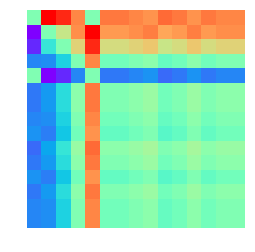

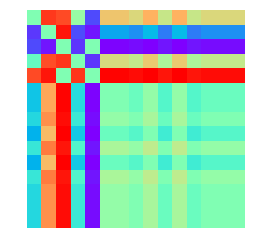

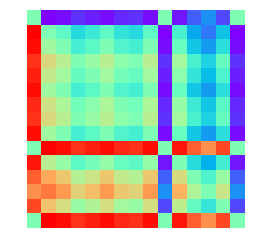

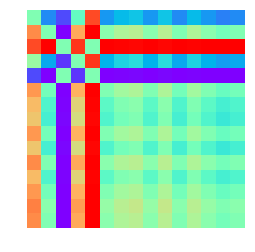

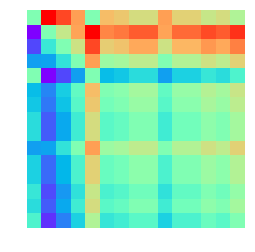

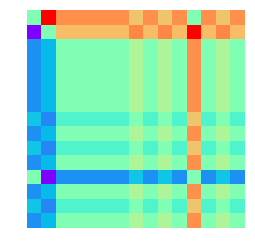

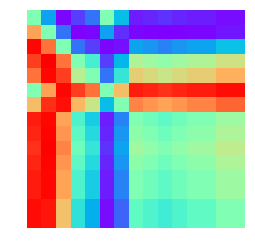

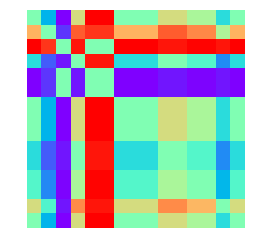

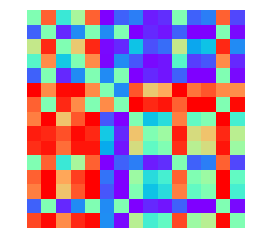

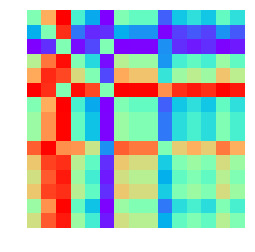

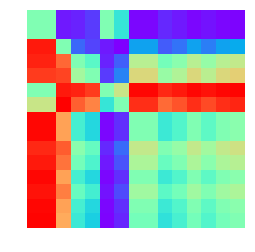

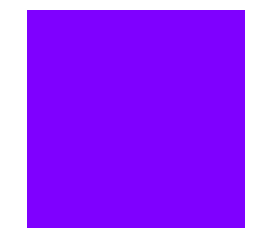

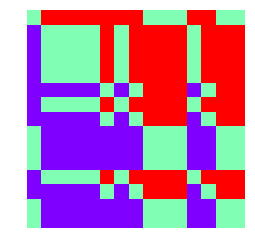

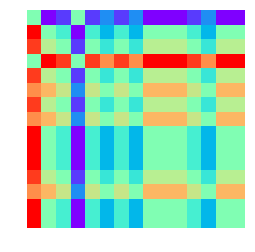

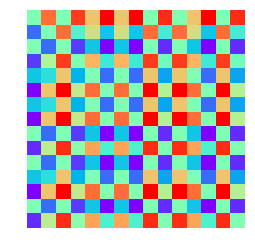

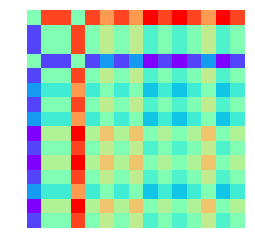

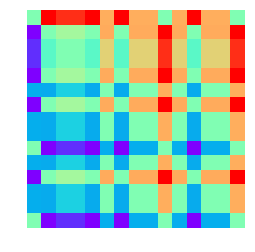

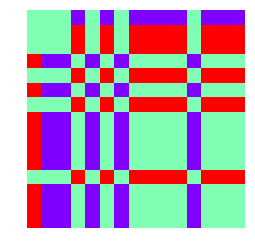

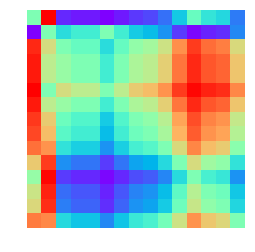

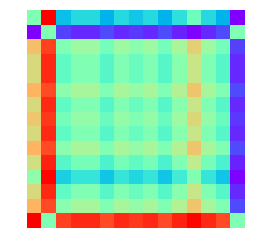

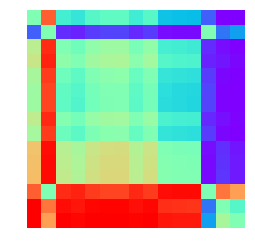

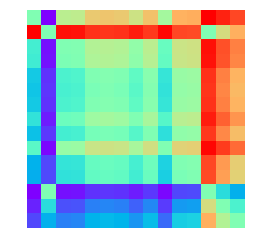

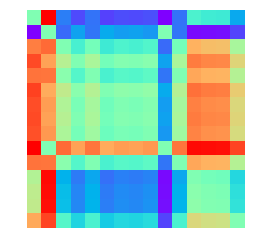

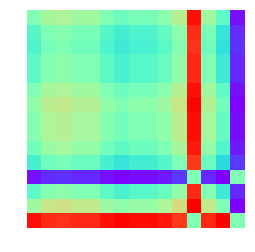

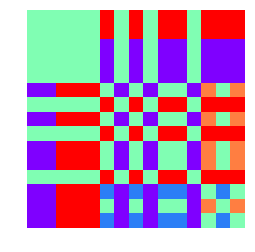

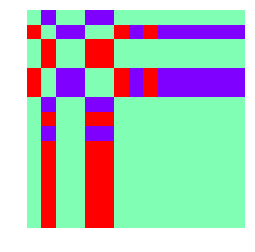

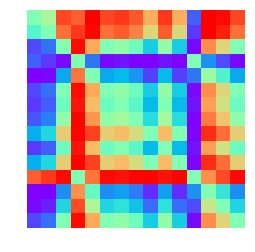

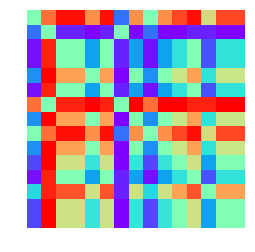

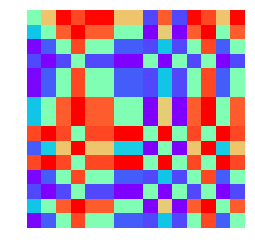

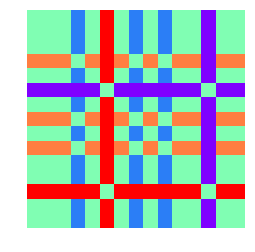

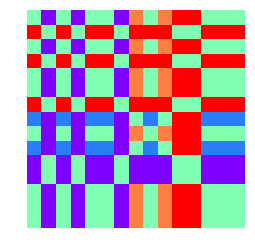

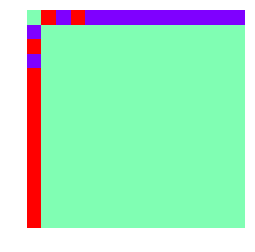

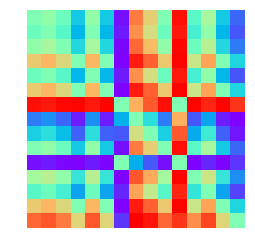

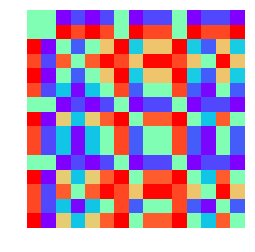

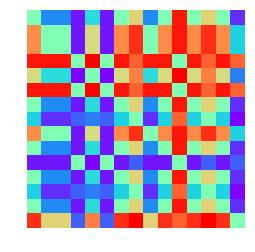

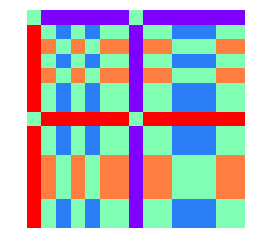

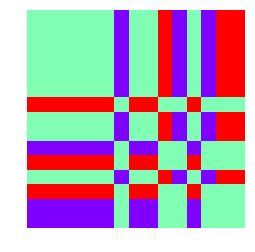

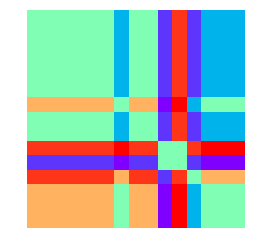

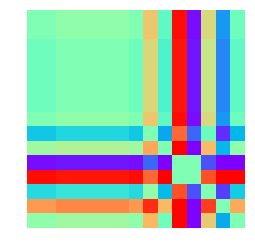

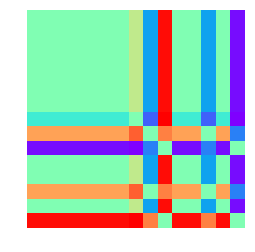

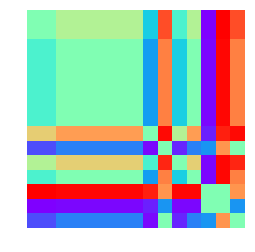

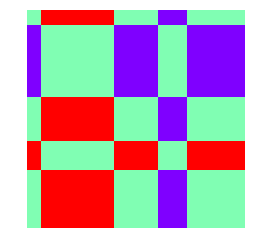

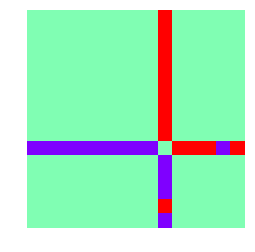

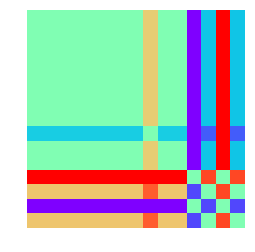

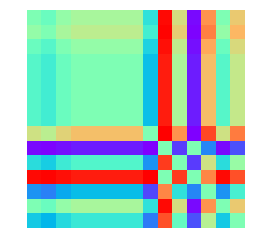

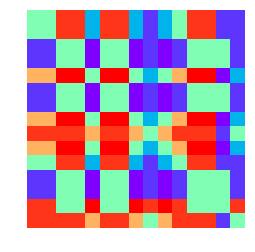

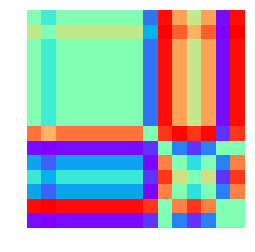

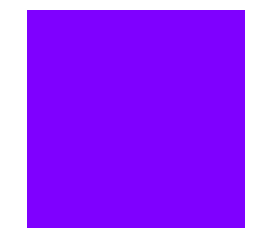

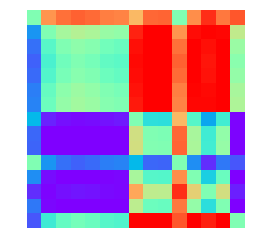

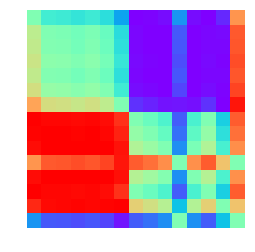

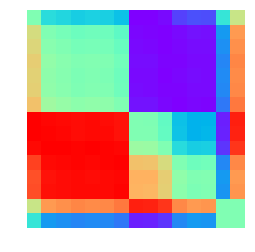

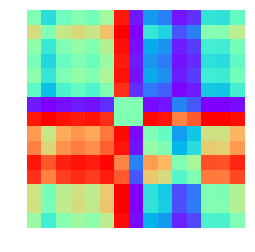

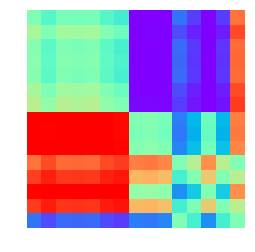

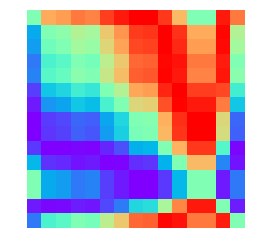

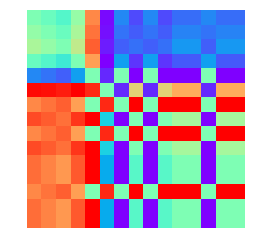

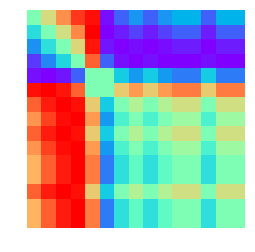

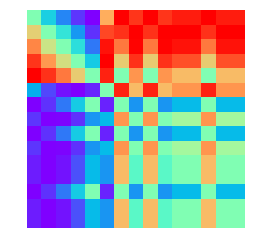

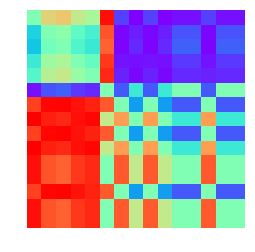

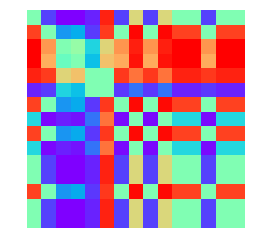

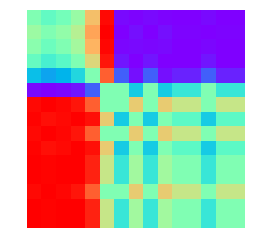

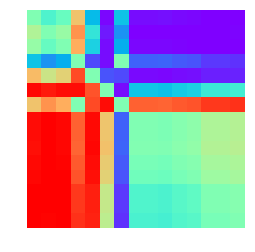

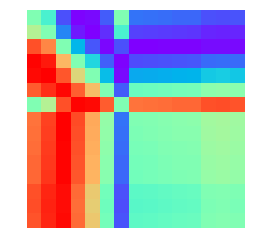

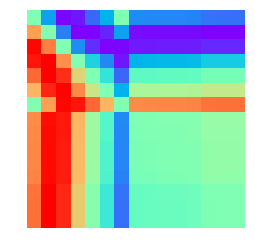

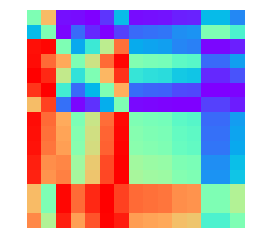

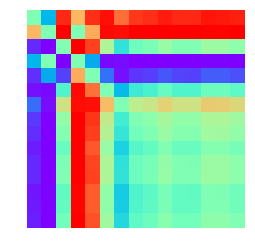

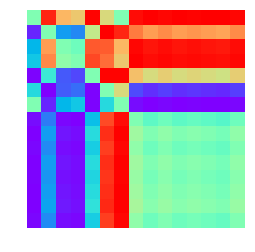

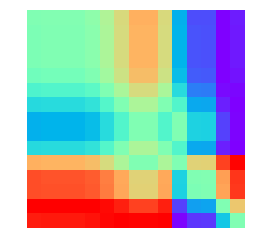

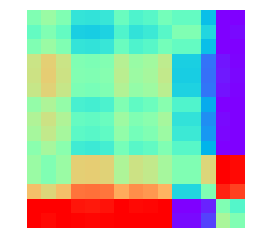

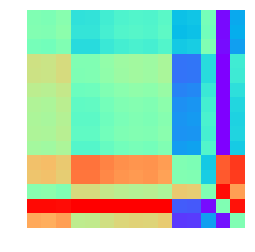

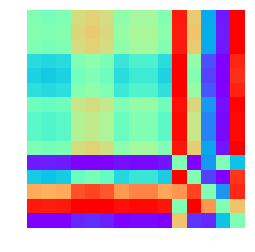

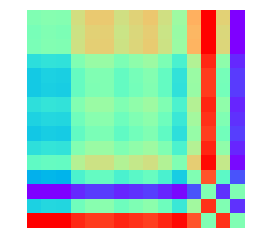

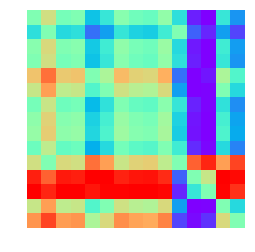

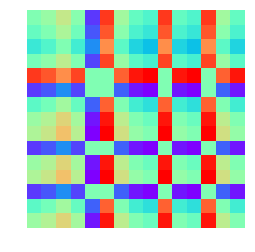

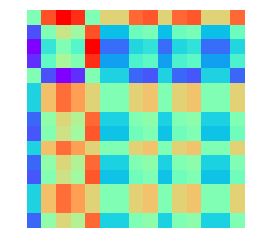

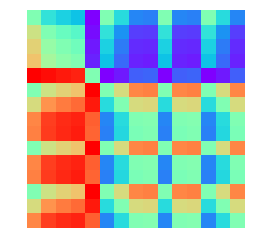

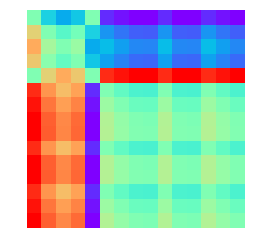

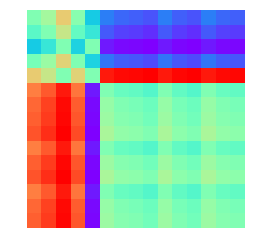

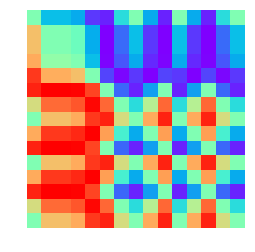

In [14]:
transformation(True,True,"gadf")

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


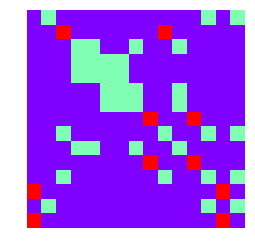

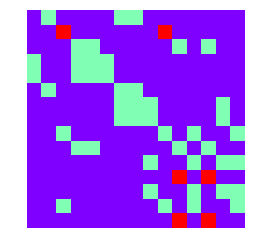

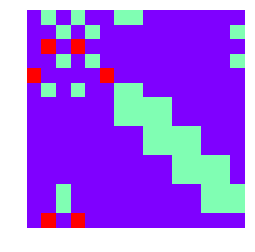

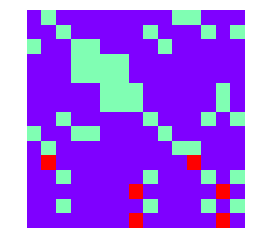

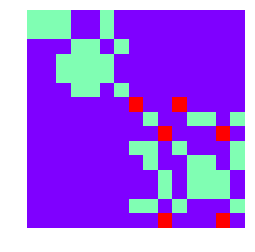

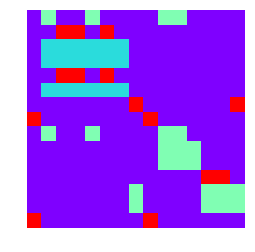

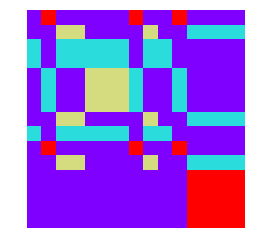

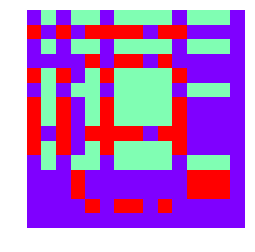

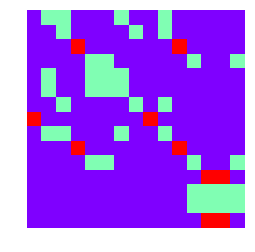

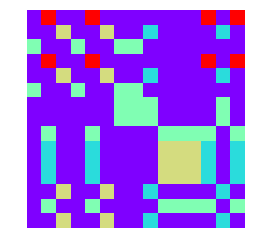

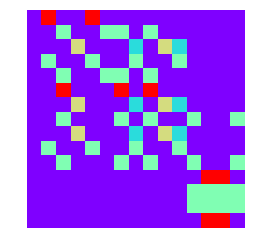

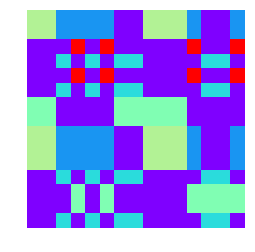

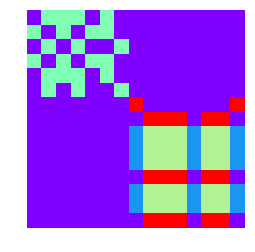

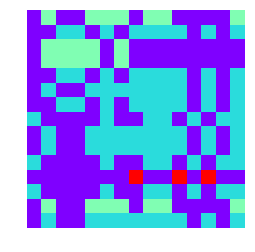

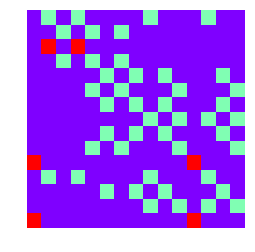

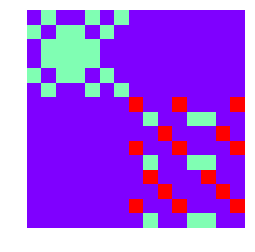

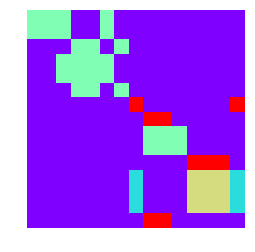

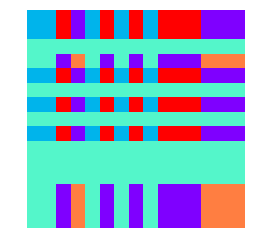

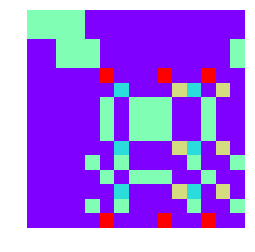

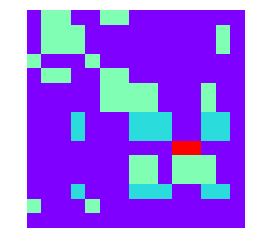

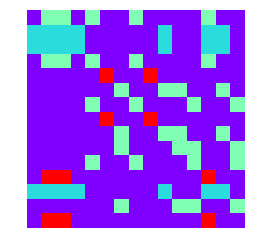

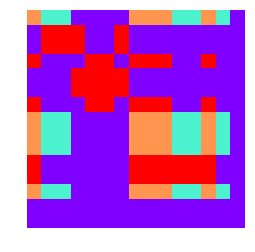

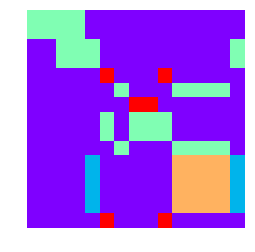

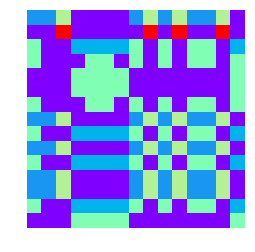

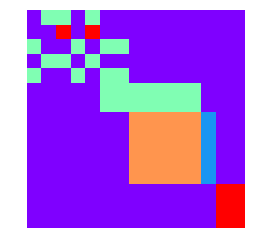

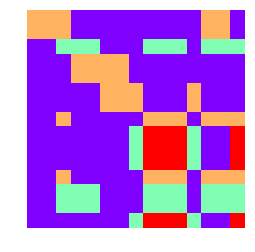

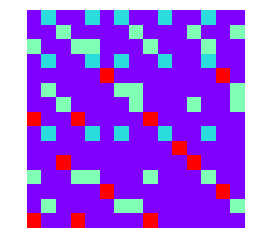

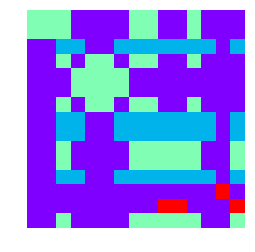

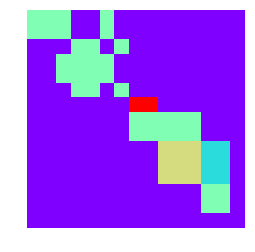

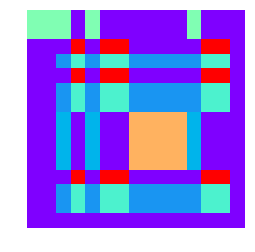

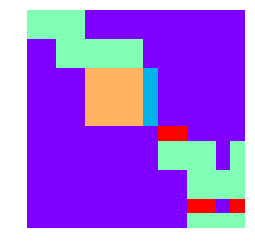

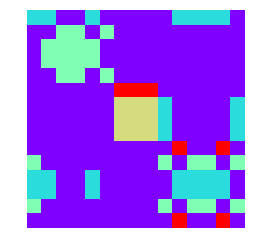

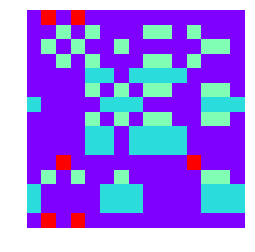

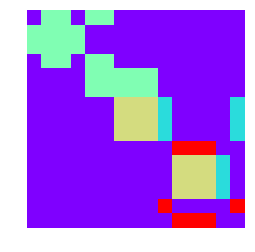

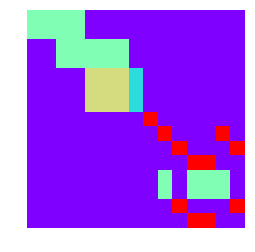

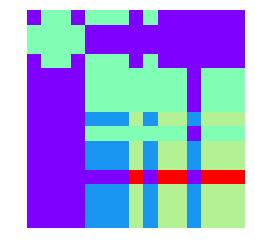

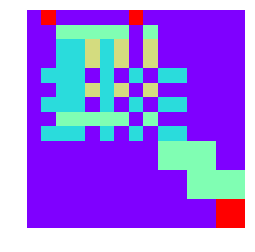

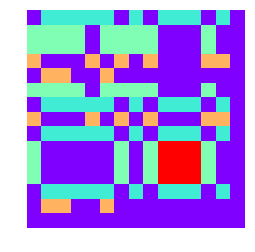

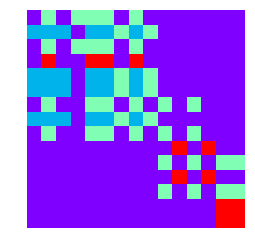

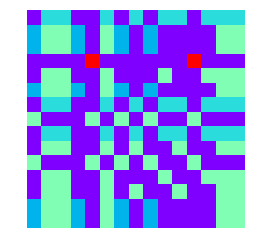

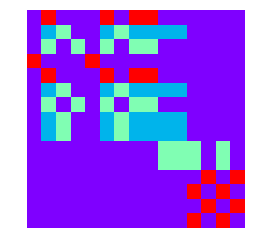

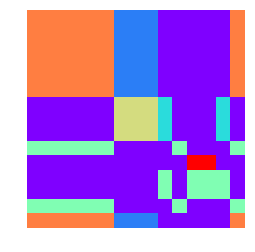

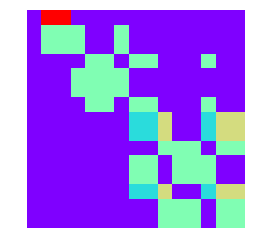

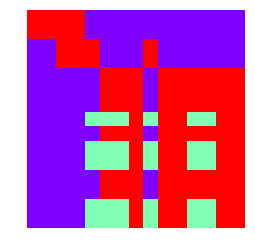

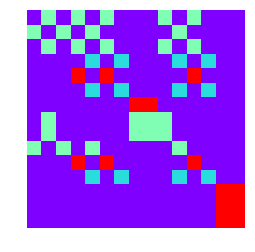

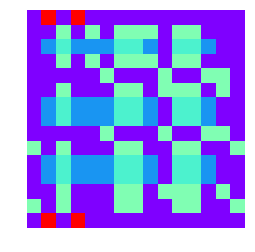

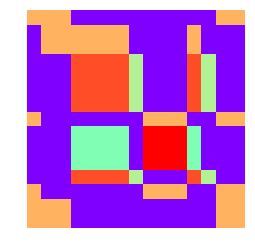

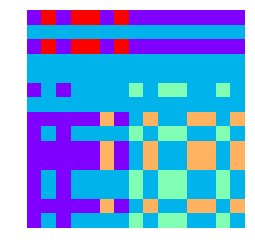

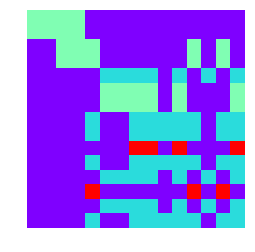

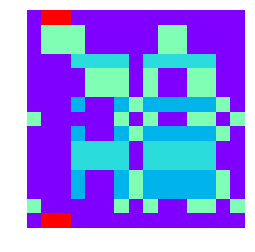

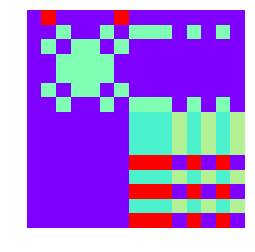

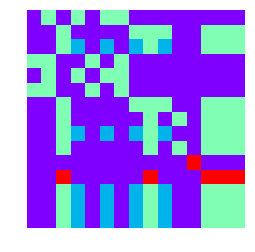

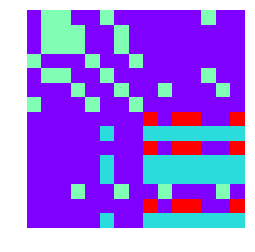

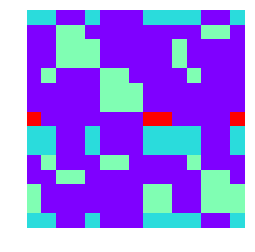

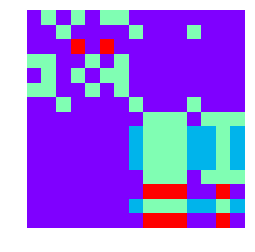

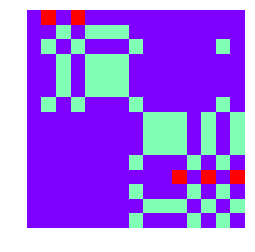

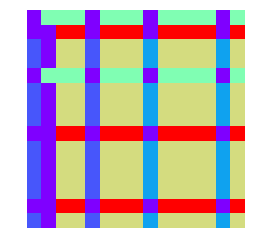

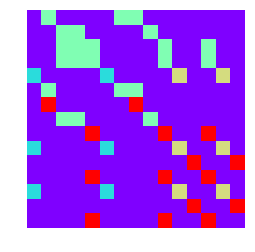

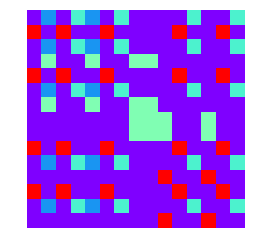

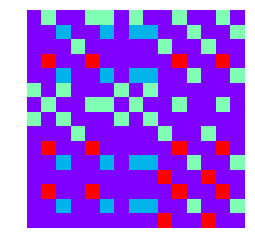

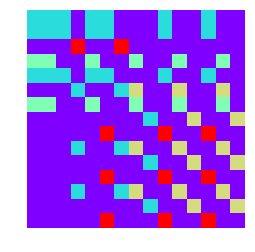

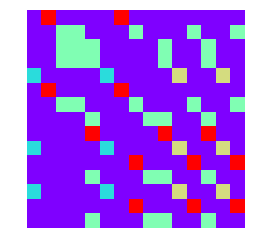

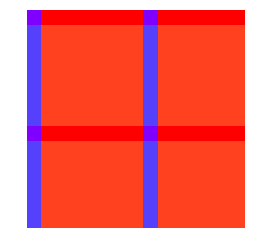

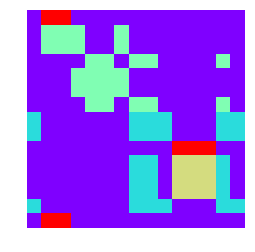

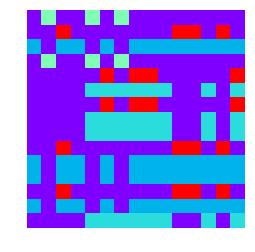

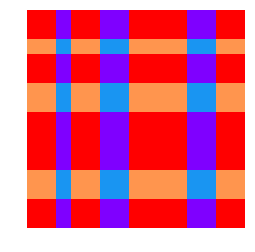

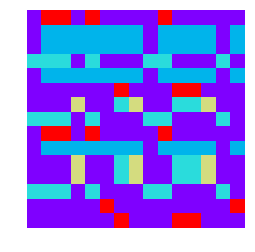

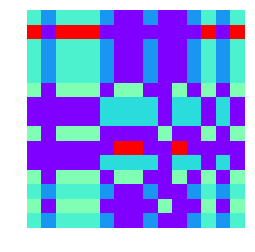

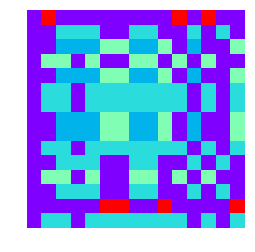

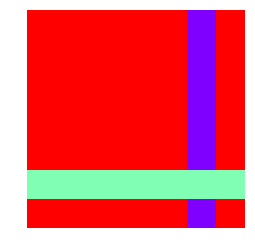

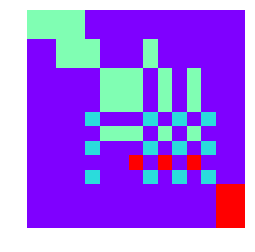

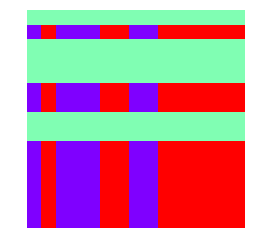

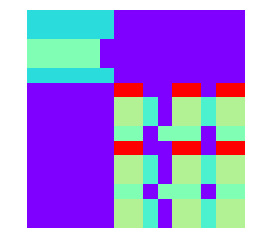

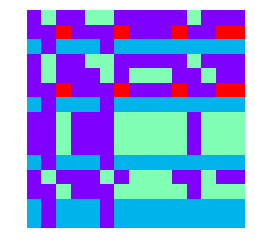

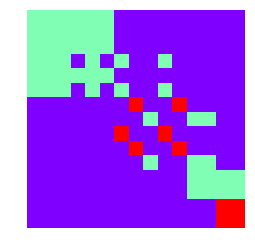

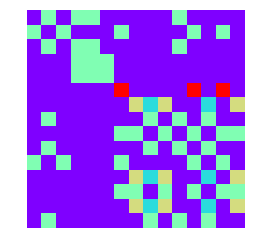

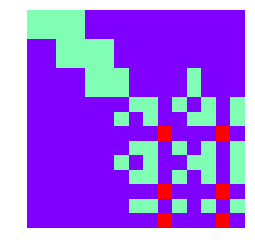

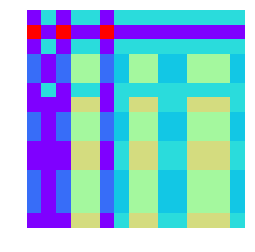

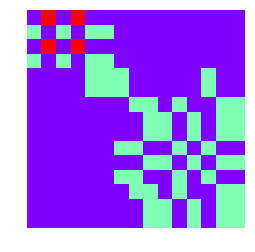

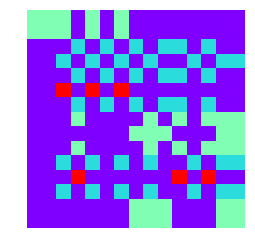

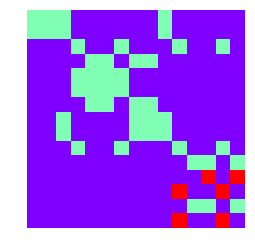

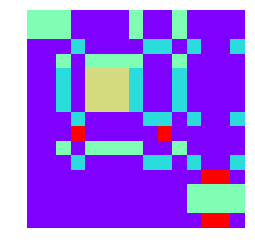

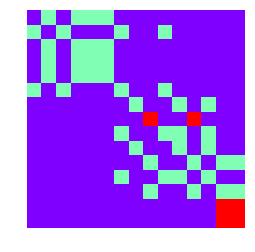

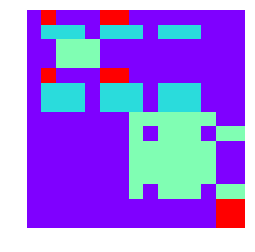

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


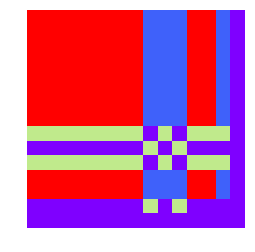

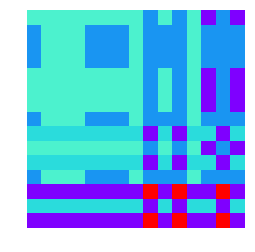

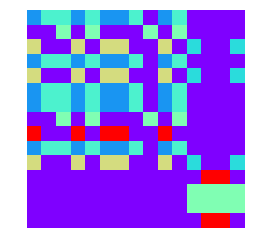

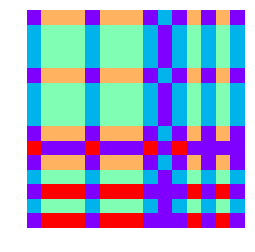

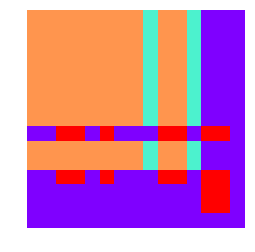

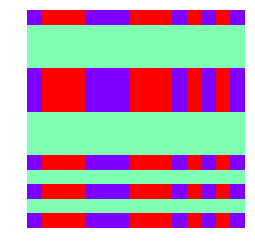

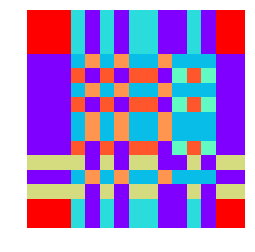

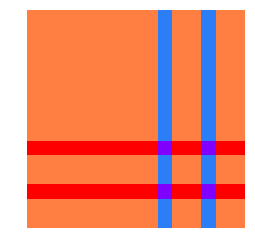

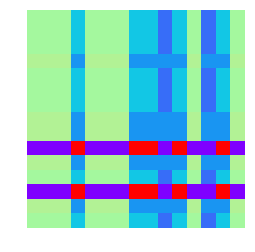

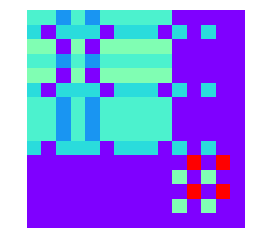

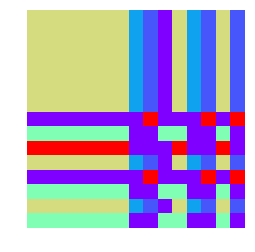

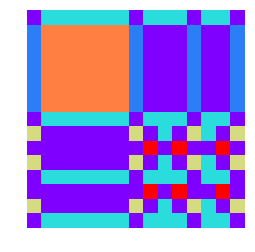

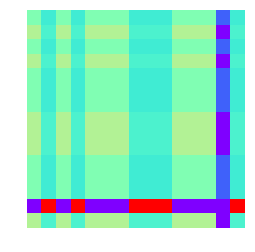

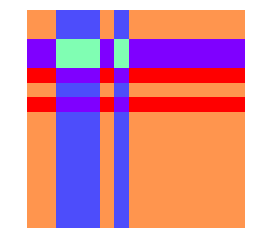

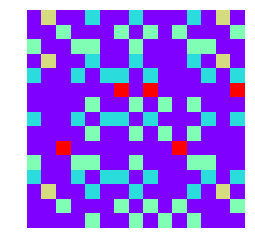

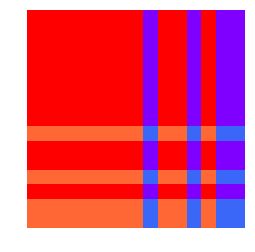

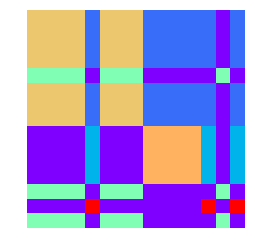

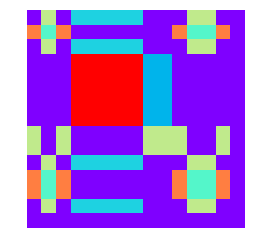

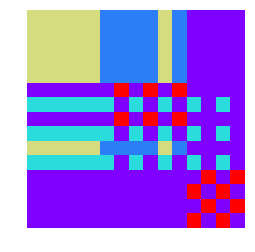

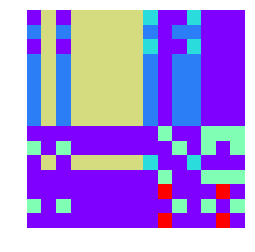

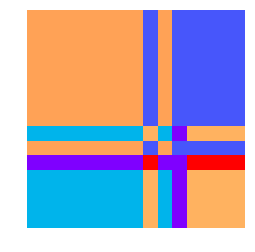

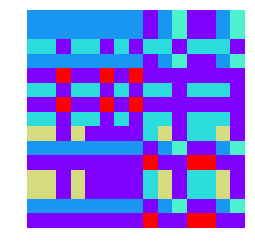

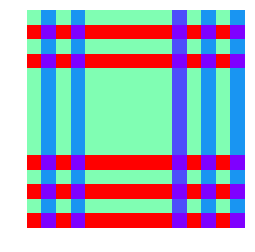

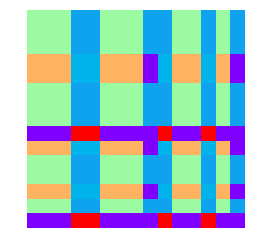

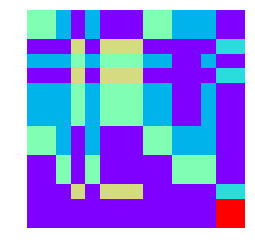

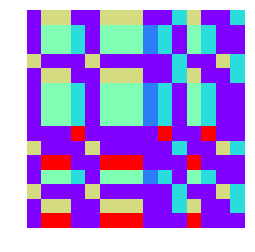

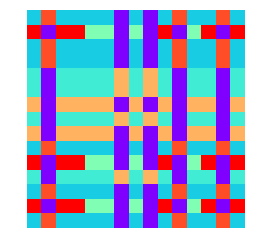

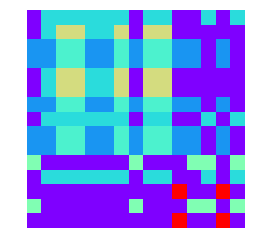

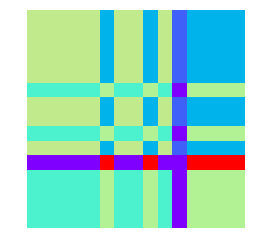

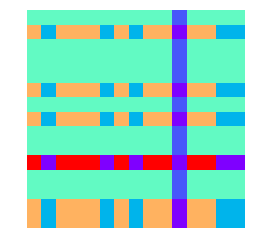

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


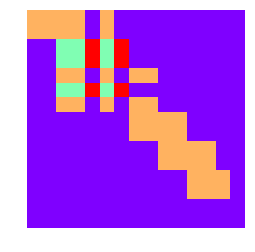

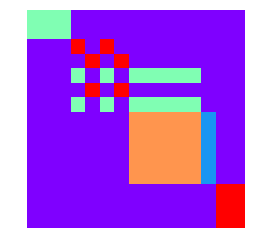

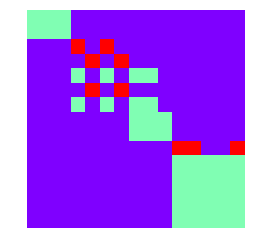

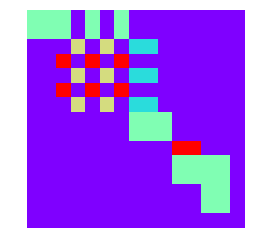

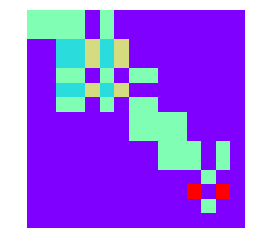

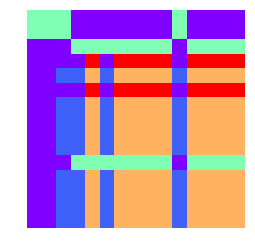

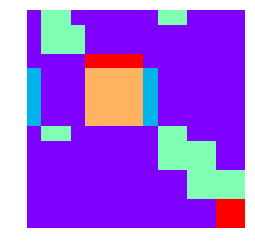

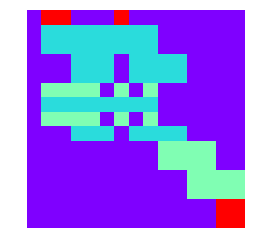

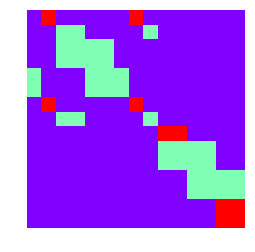

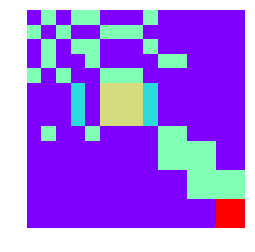

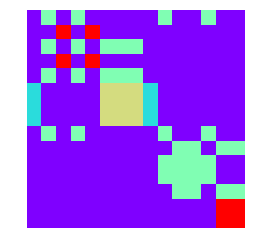

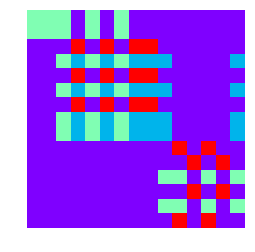

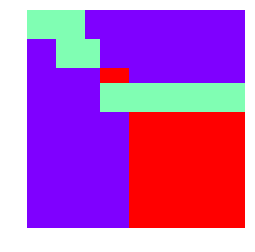

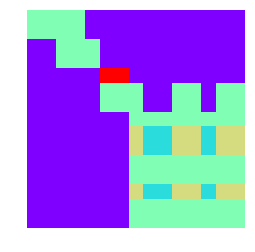

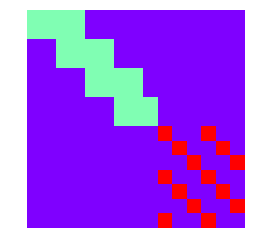

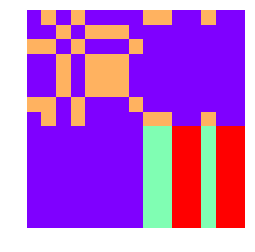

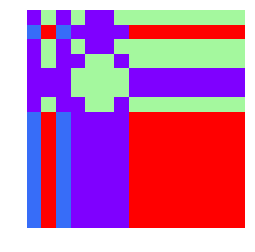

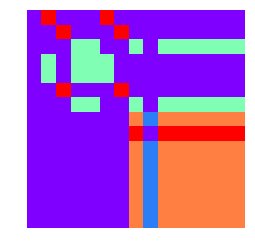

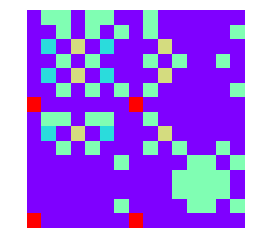

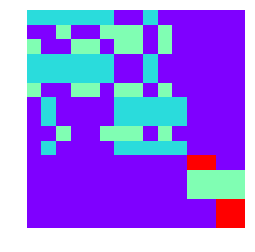

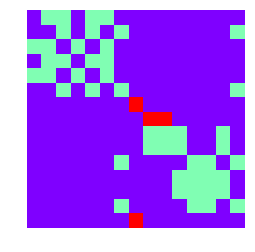

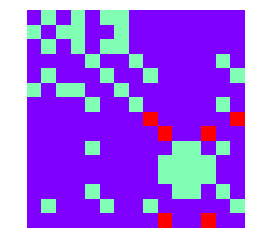

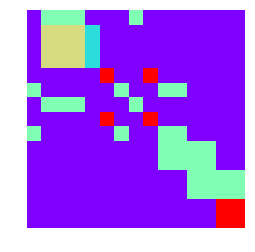

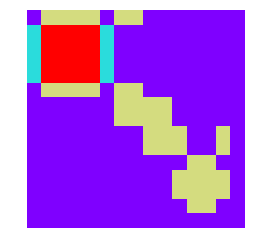

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


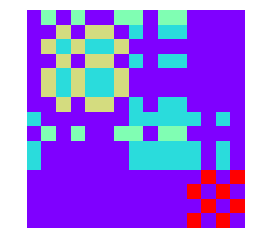

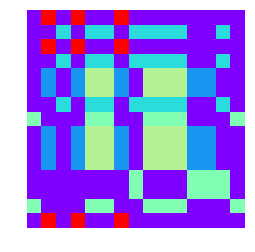

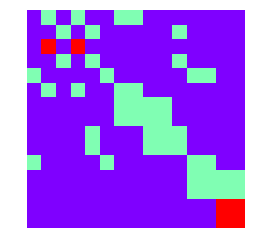

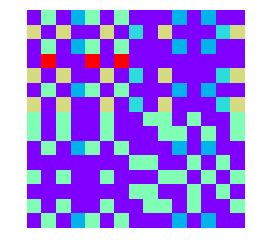

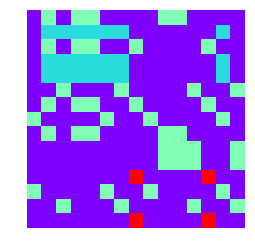

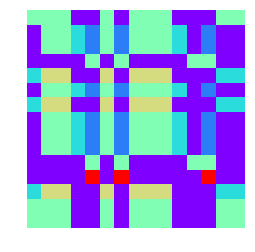

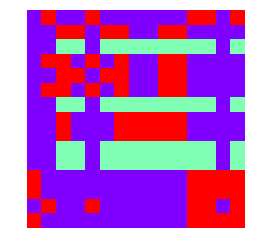

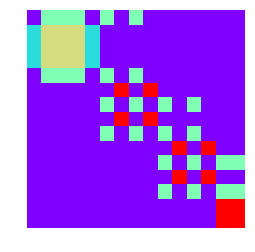

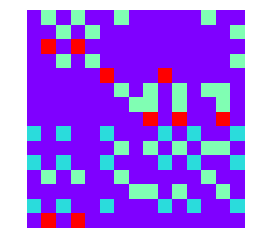

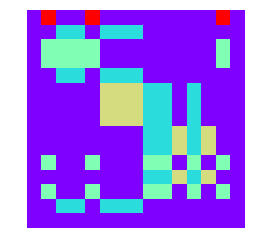

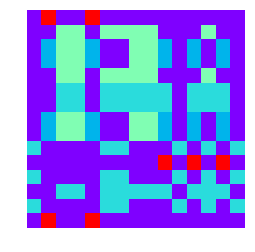

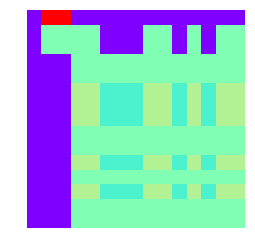

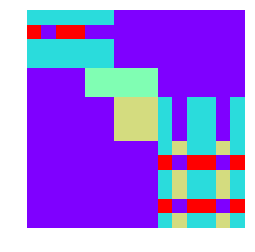

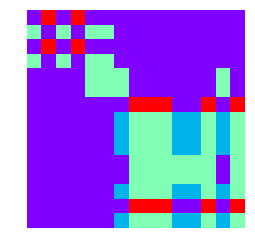

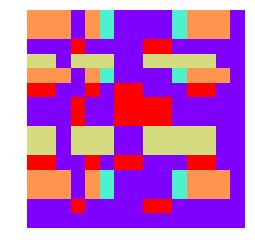

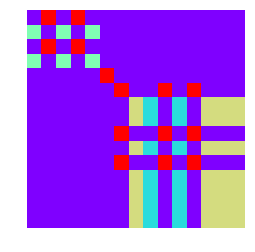

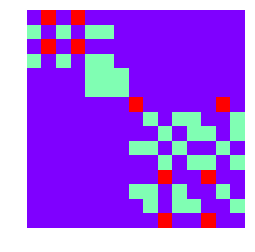

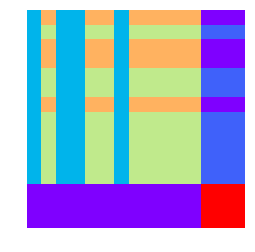

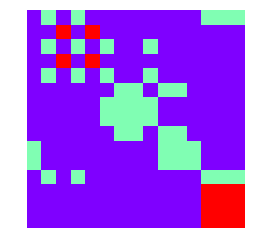

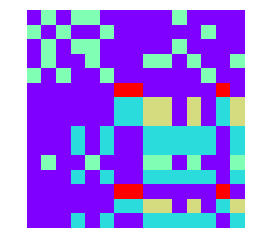

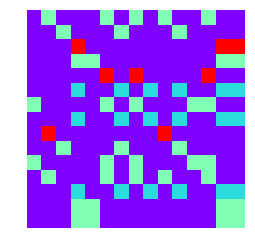

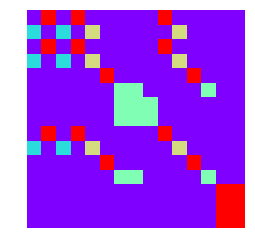

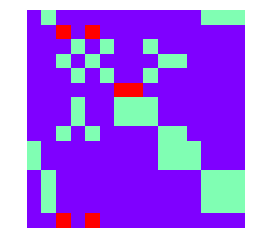

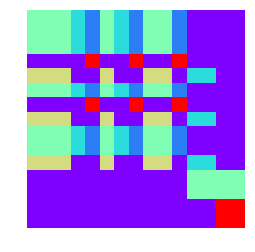

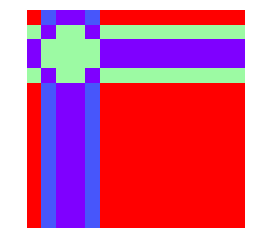

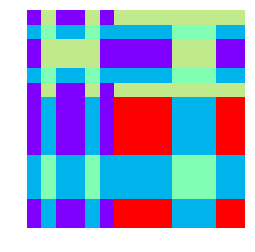

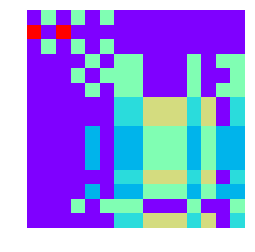

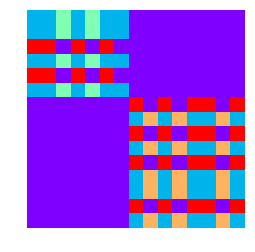

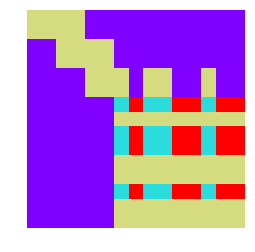

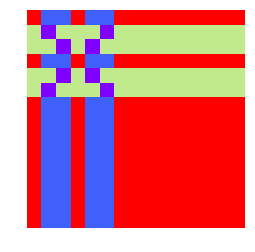

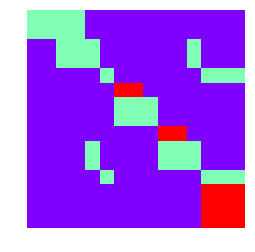

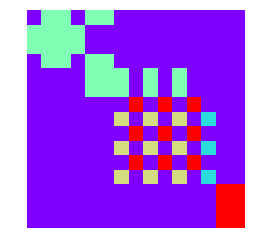

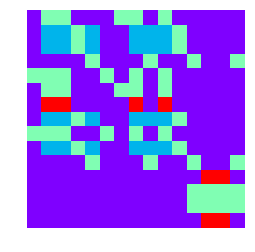

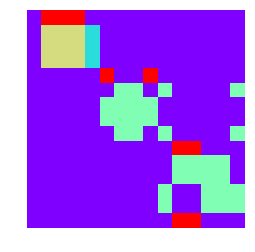

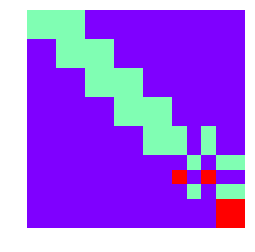

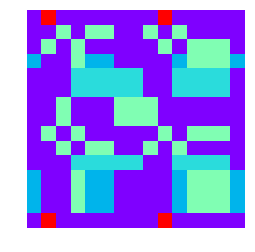

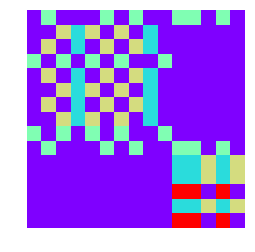

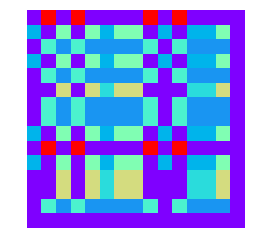

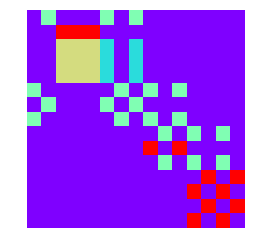

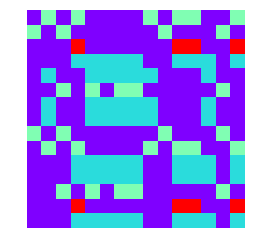

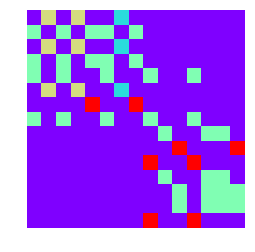

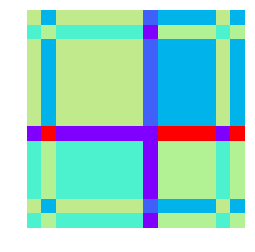

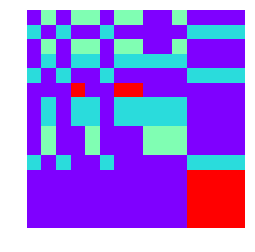

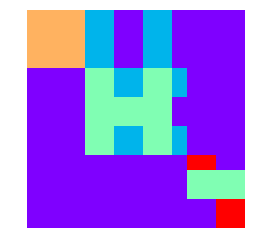

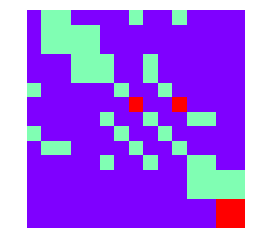

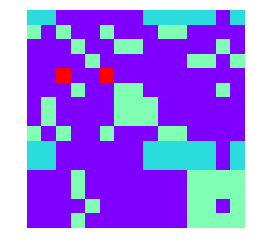

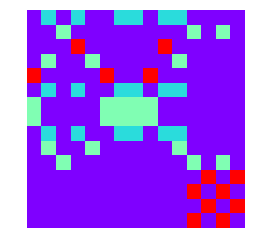

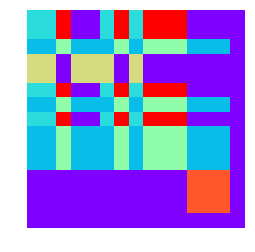

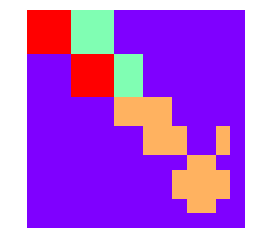

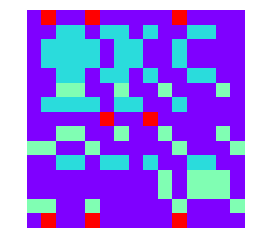

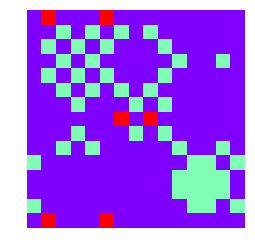

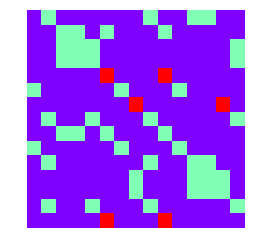

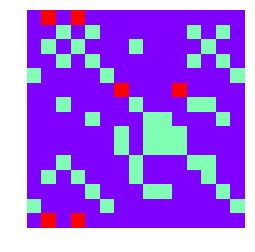

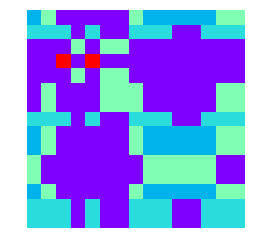

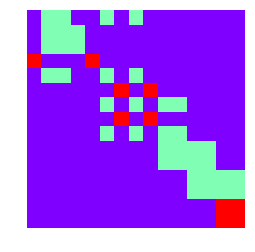

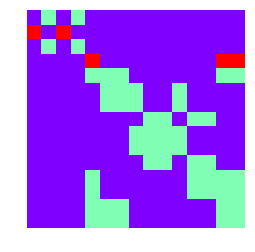

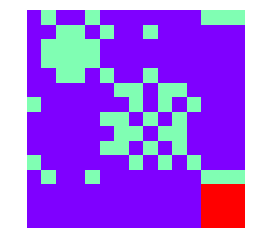

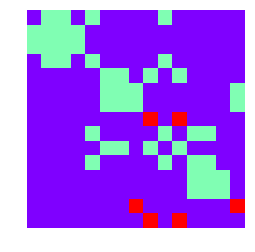

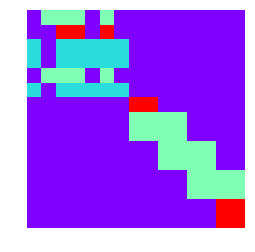

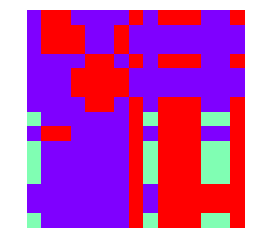

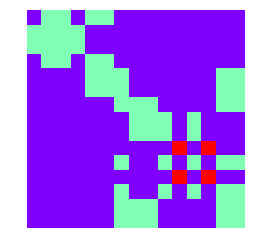

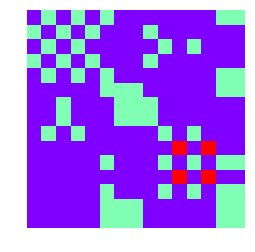

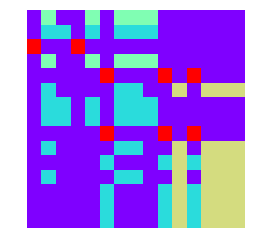

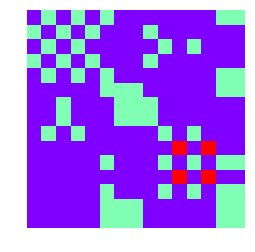

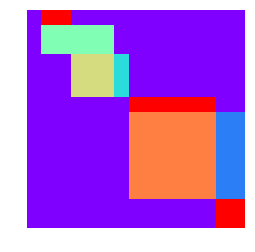

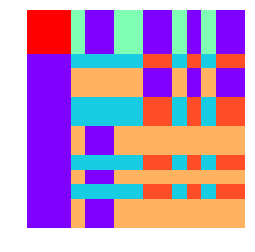

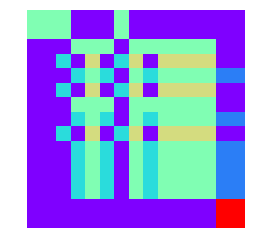

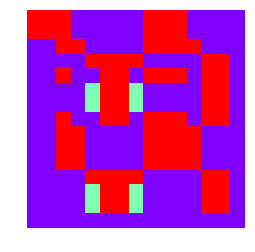

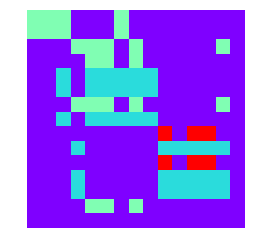

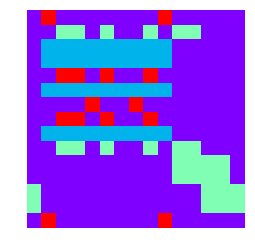

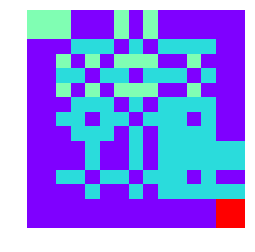

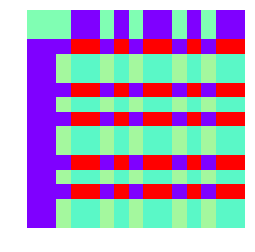

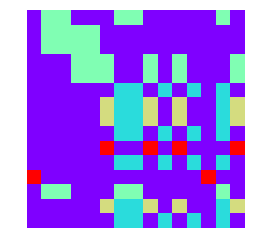

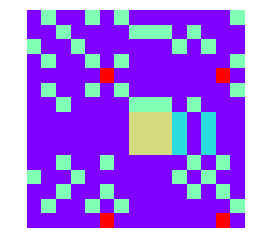

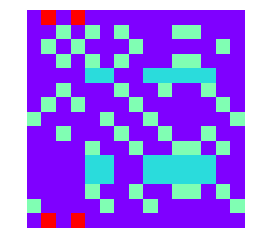

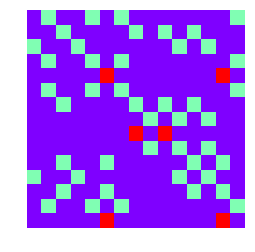

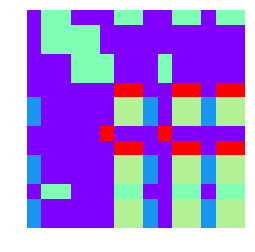

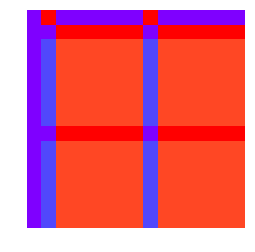

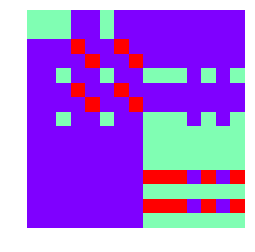

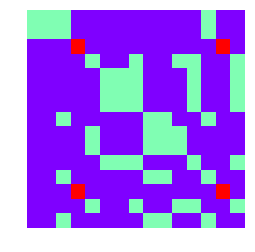

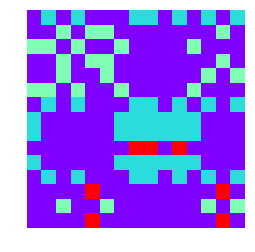

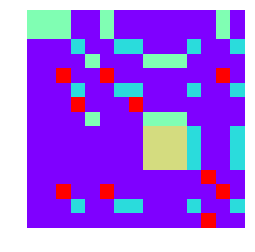

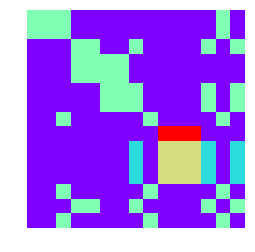

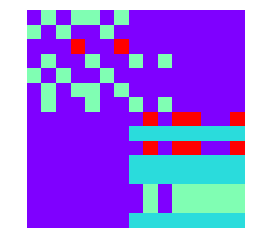

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


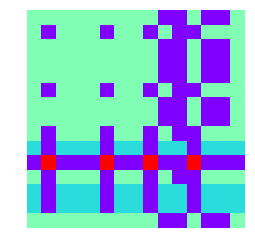

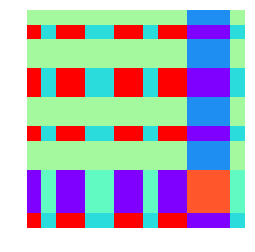

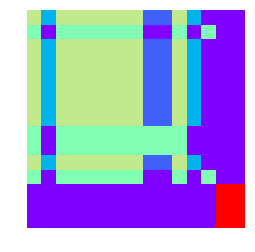

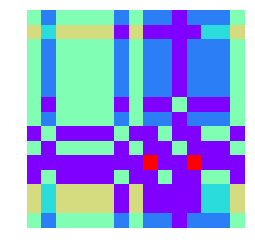

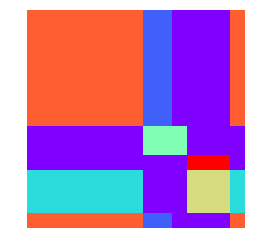

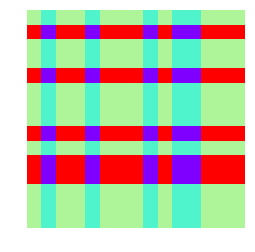

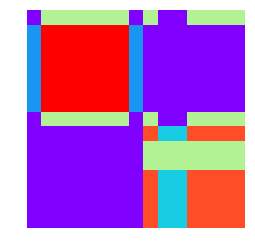

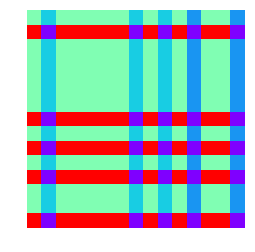

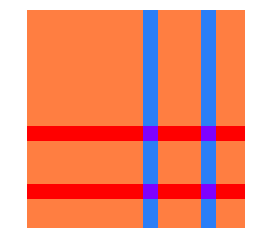

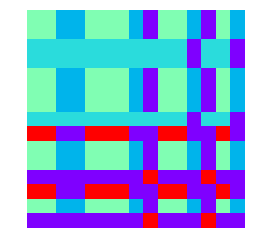

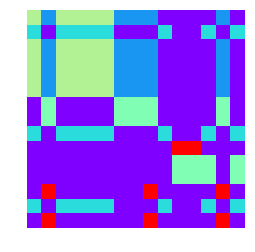

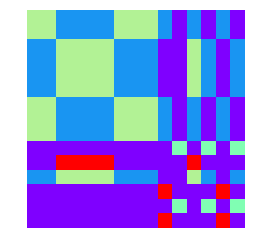

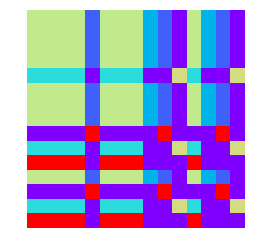

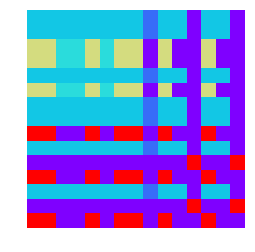

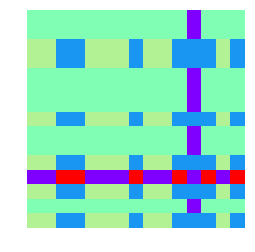

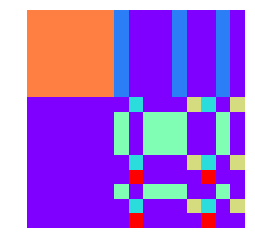

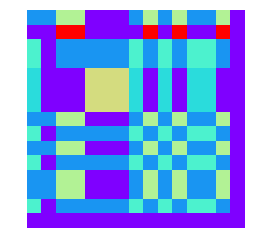

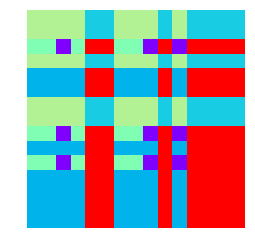

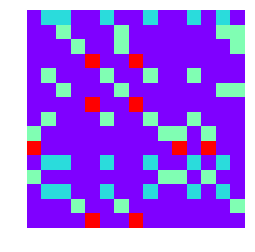

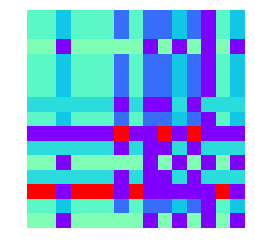

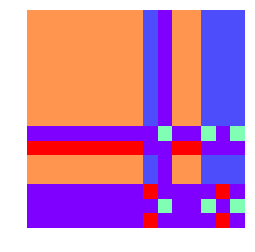

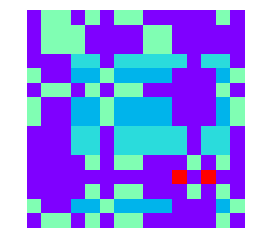

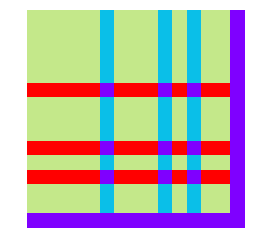

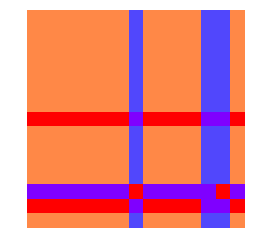

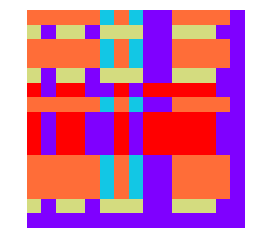

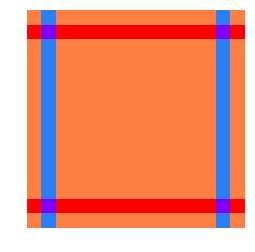

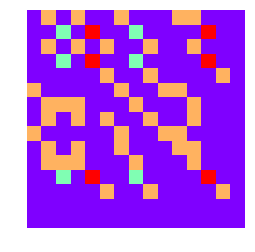

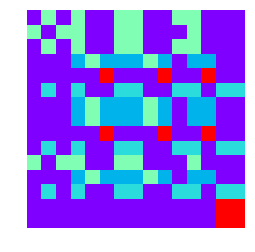

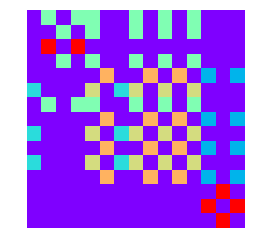

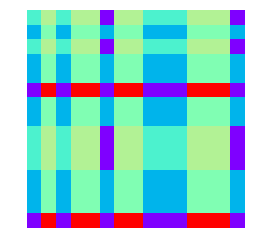

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


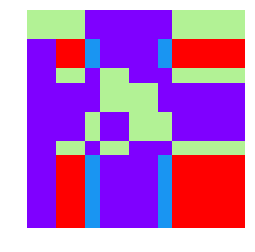

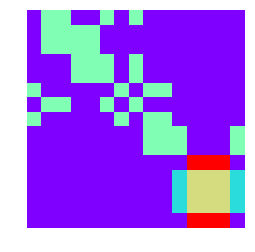

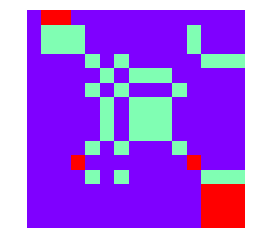

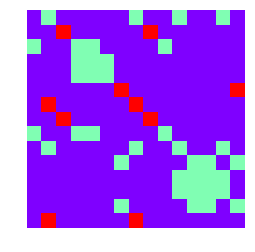

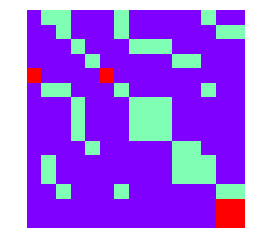

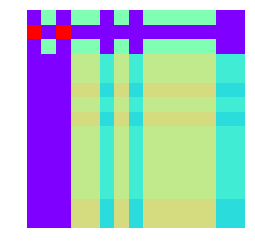

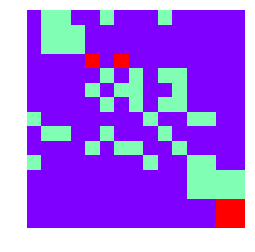

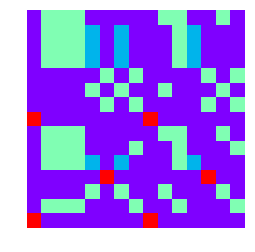

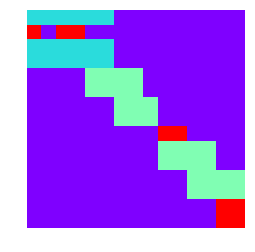

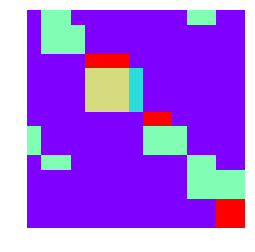

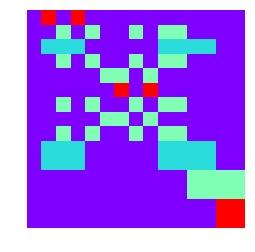

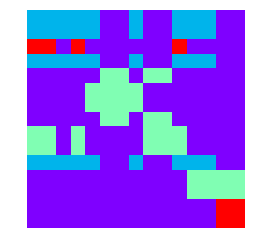

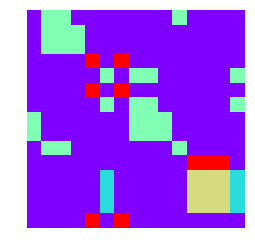

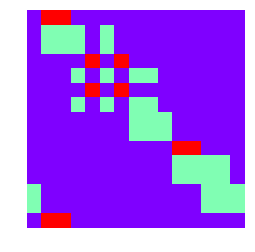

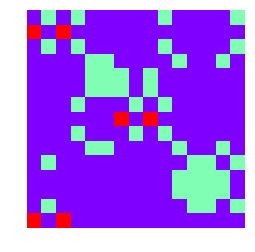

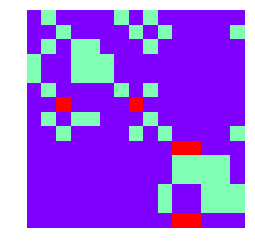

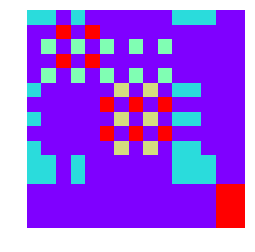

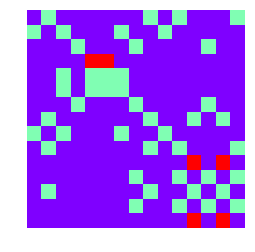

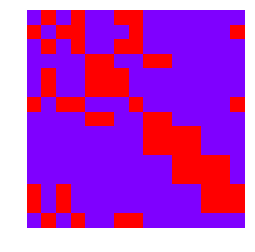

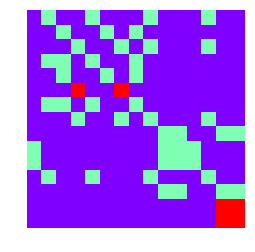

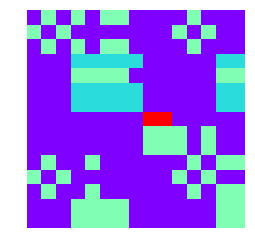

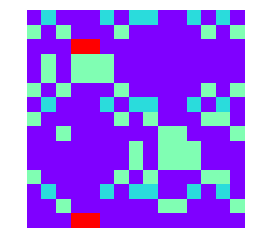

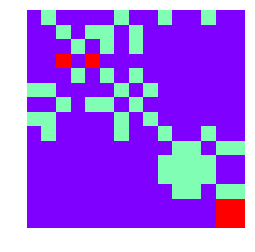

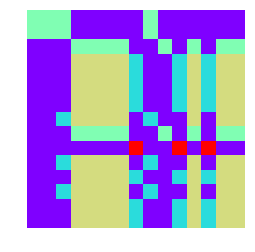

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


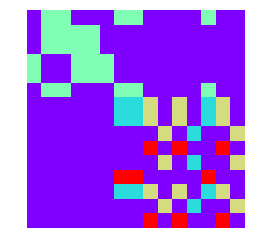

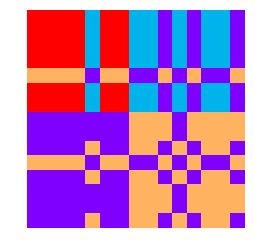

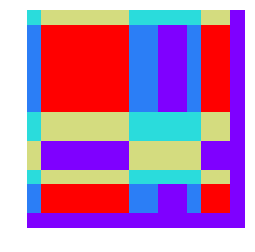

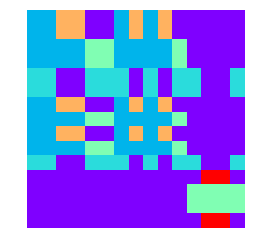

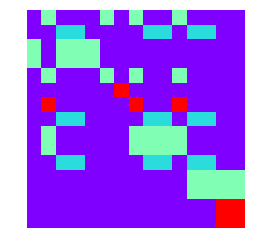

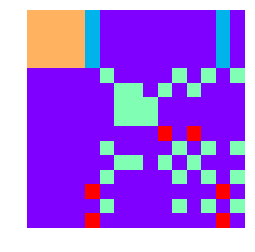

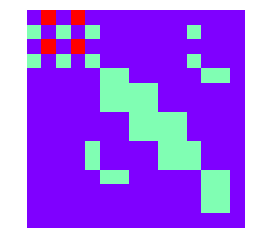

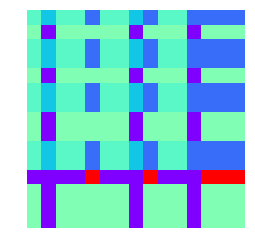

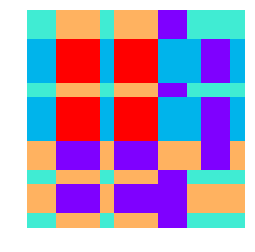

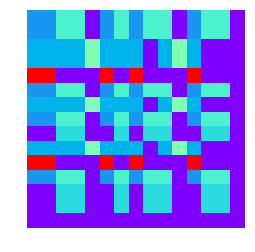

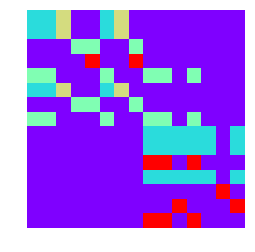

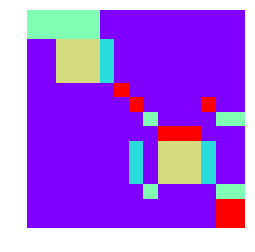

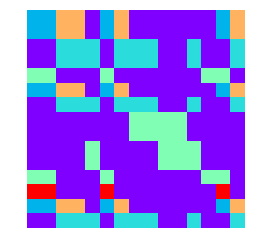

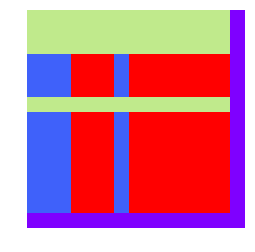

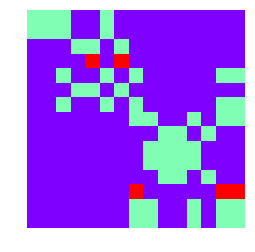

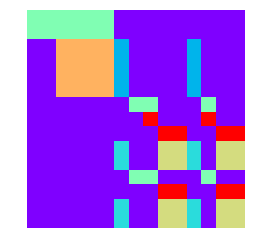

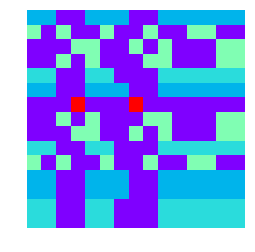

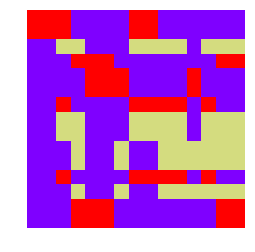

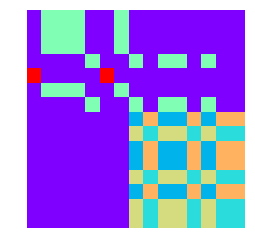

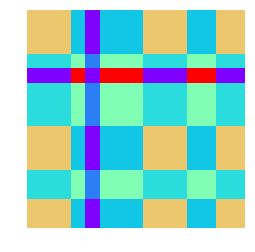

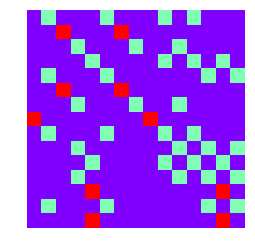

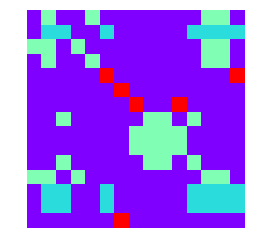

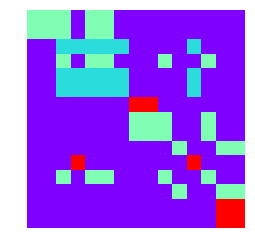

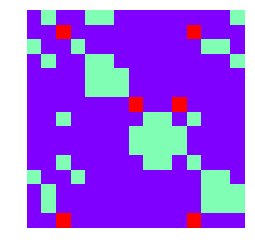

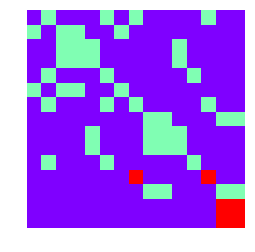

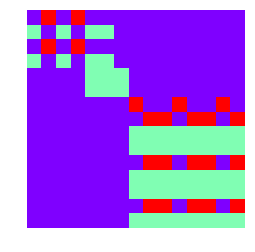

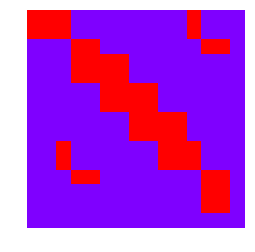

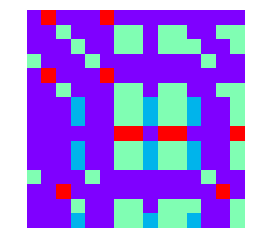

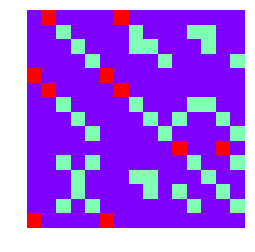

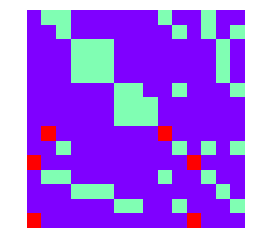

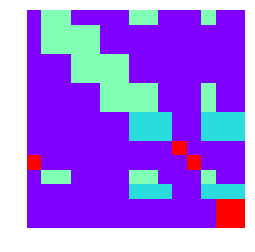

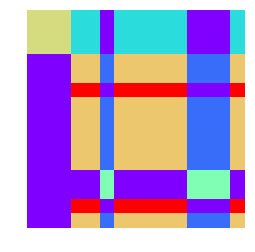

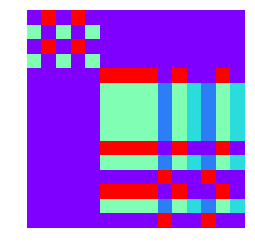

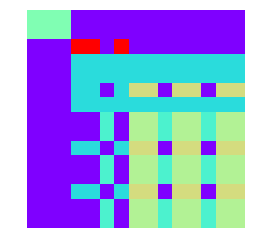

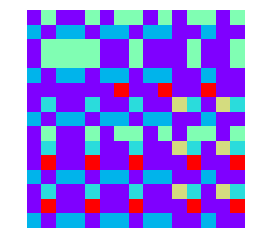

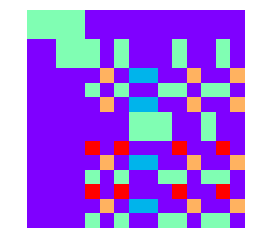

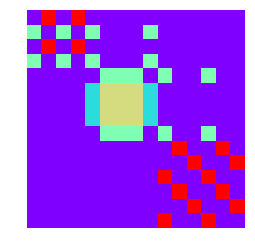

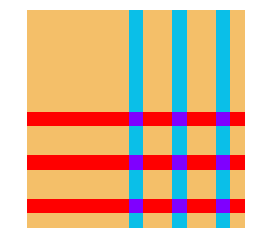

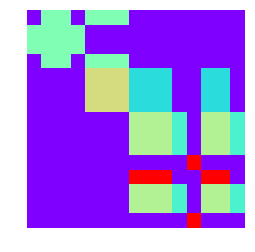

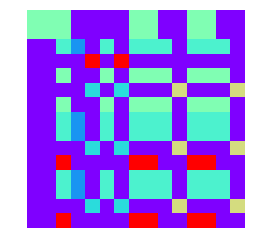

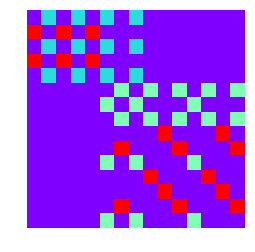

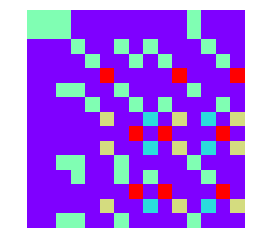

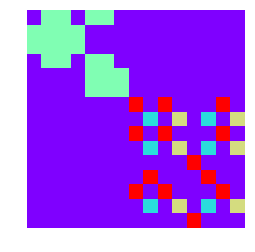

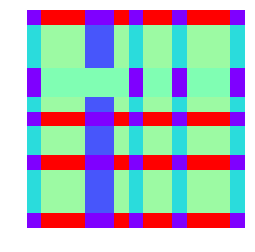

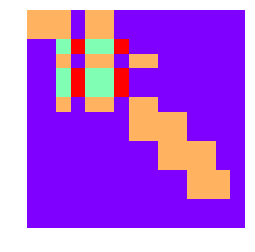

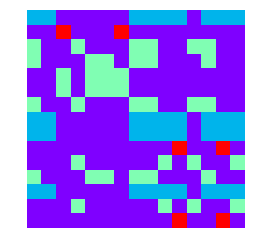

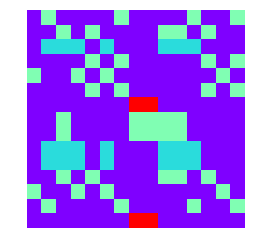

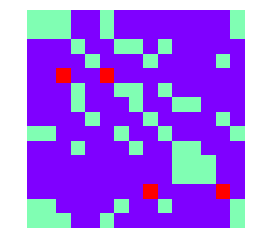

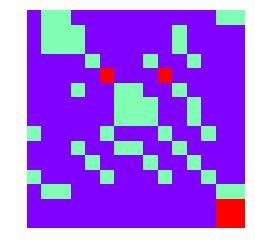

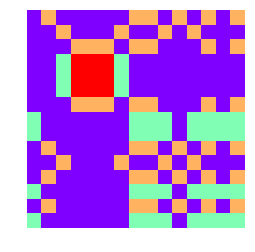

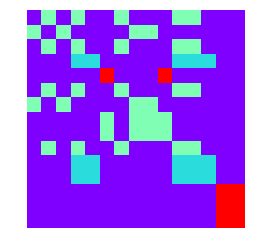

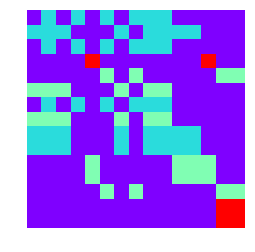

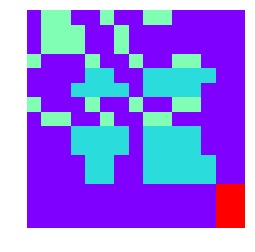

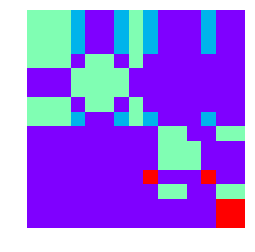

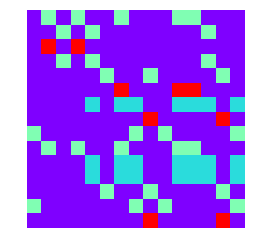

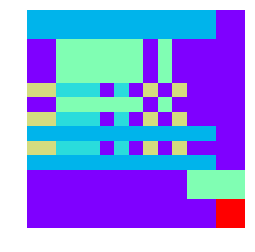

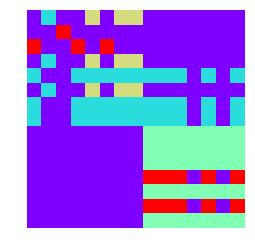

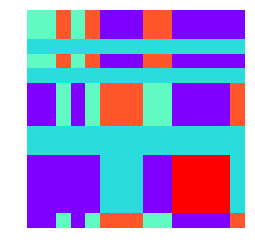

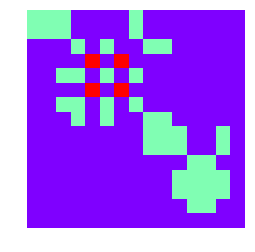

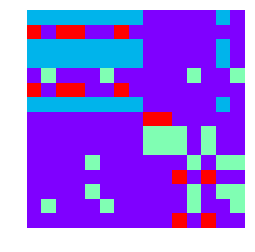

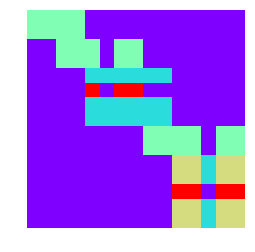

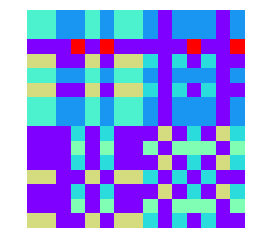

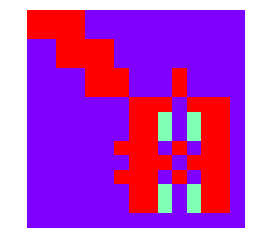

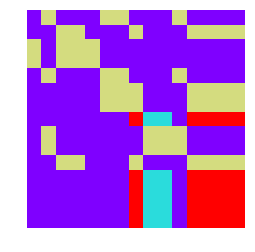

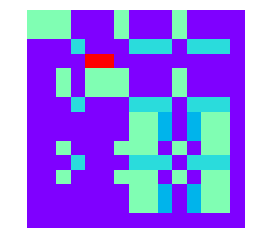

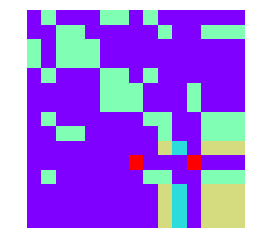

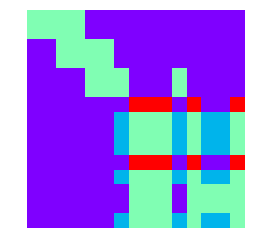

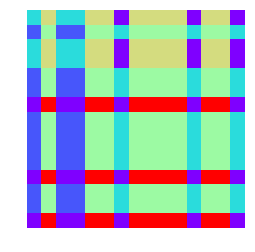

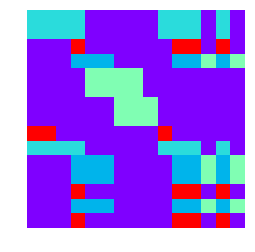

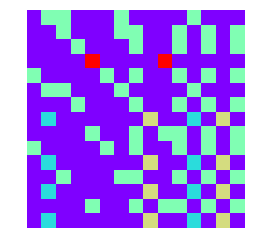

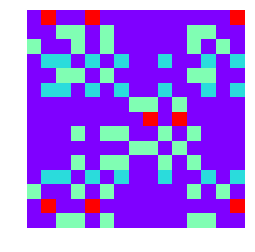

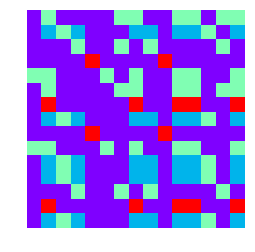

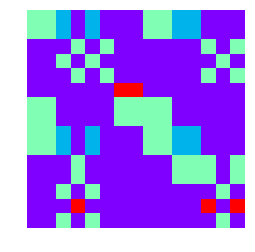

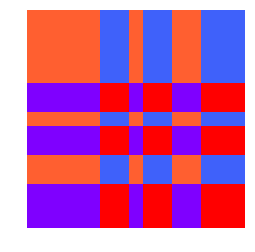

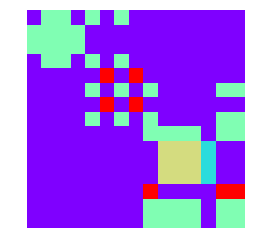

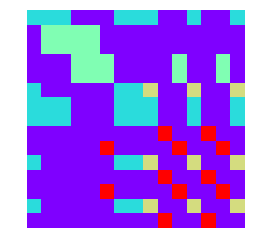

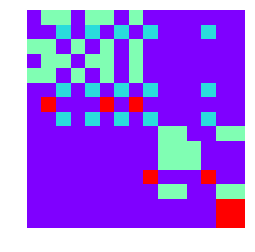

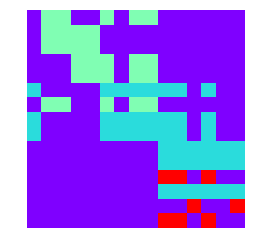

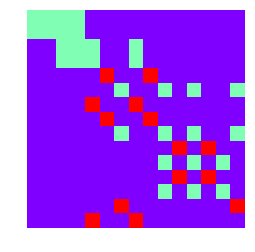

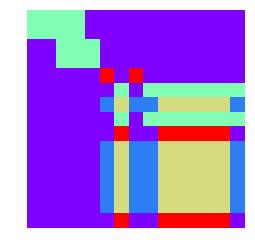

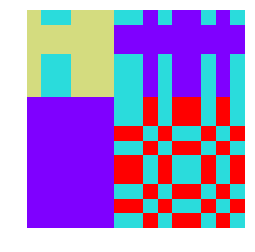

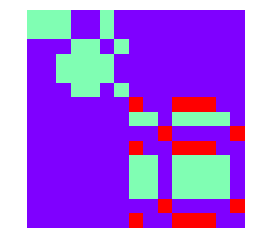

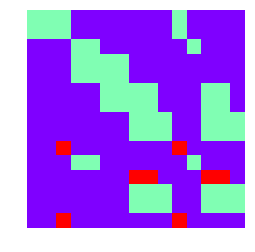

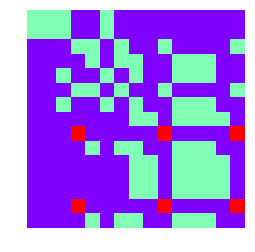

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


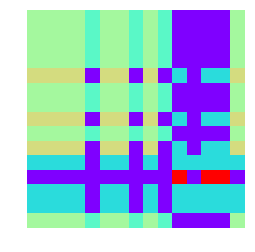

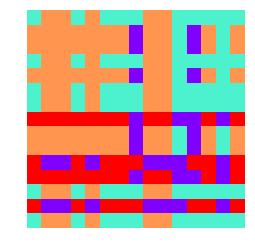

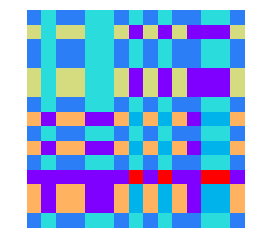

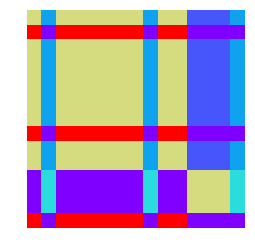

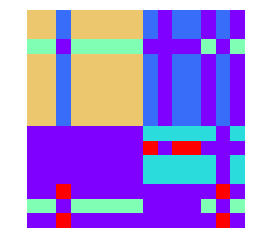

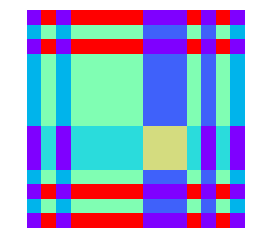

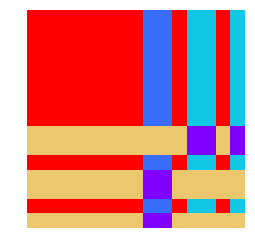

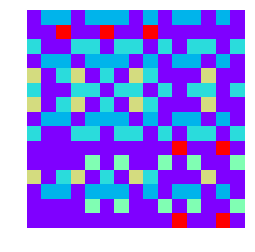

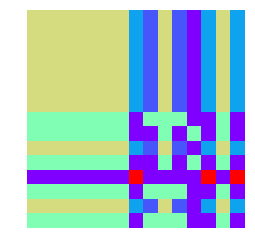

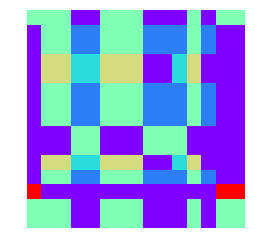

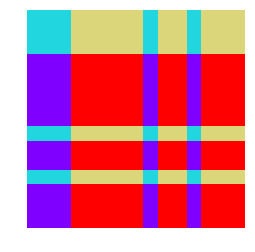

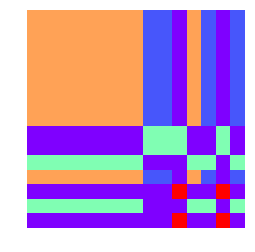

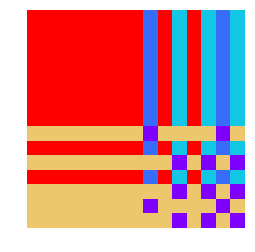

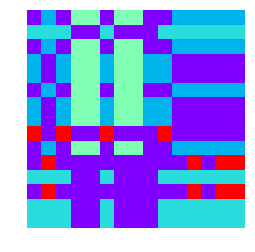

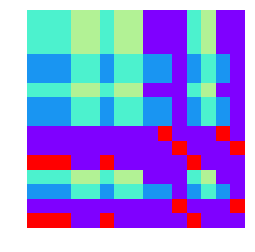

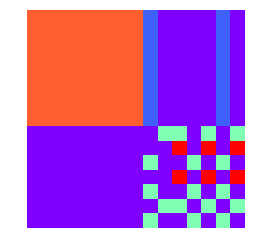

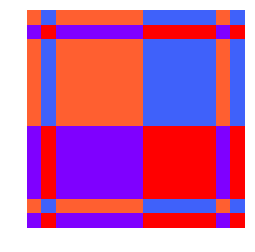

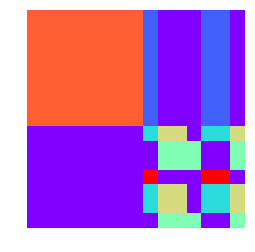

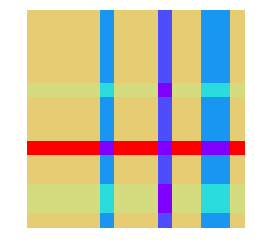

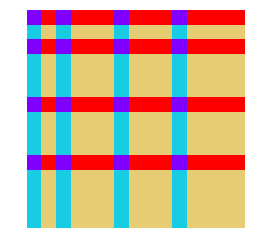

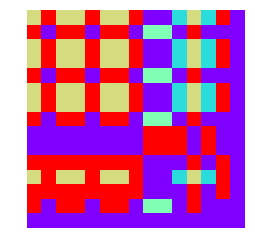

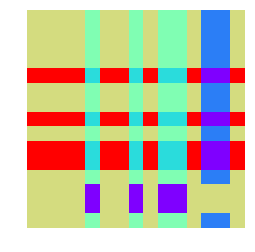

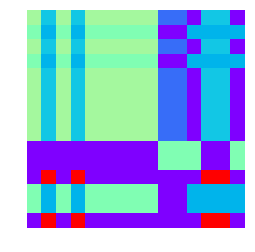

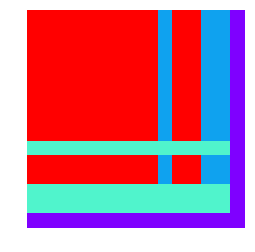

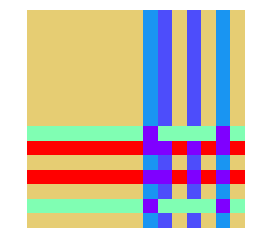

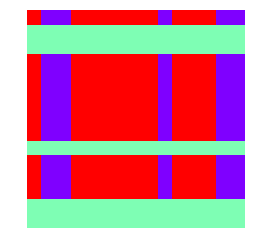

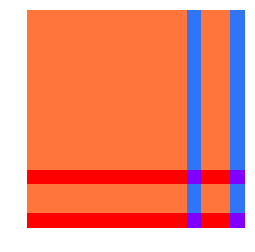

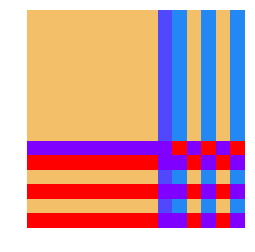

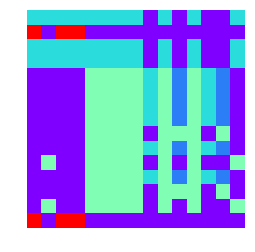

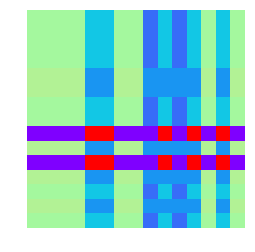

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


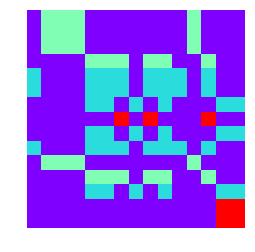

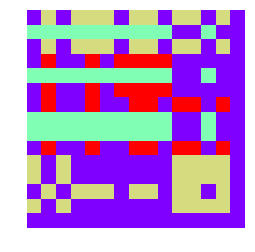

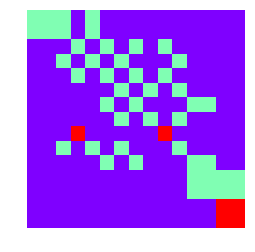

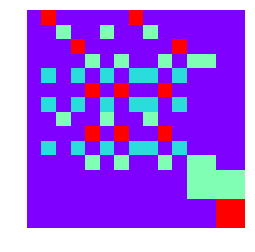

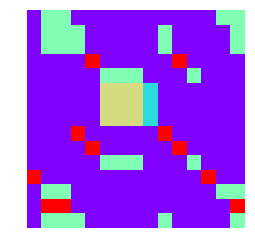

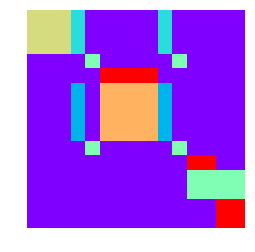

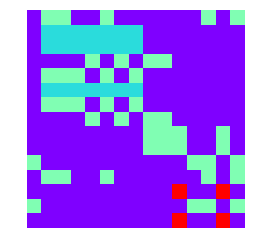

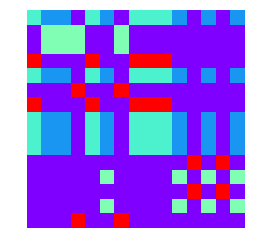

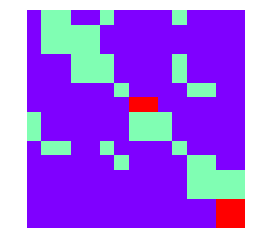

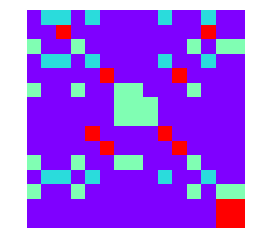

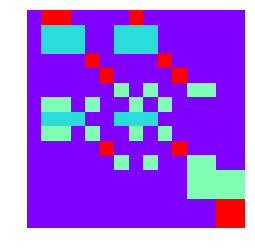

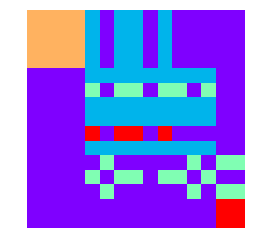

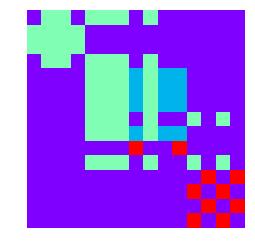

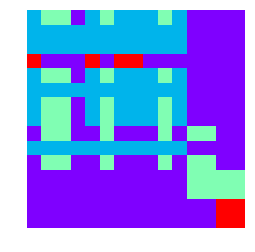

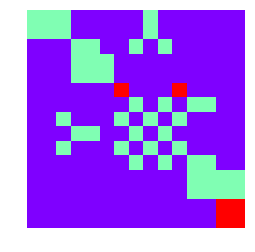

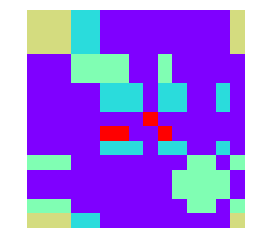

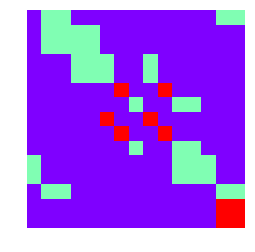

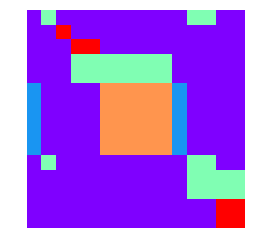

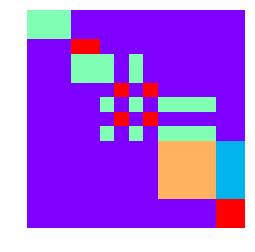

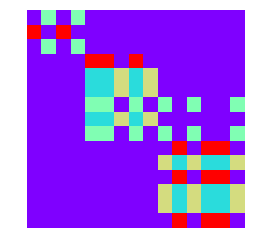

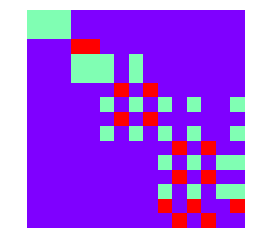

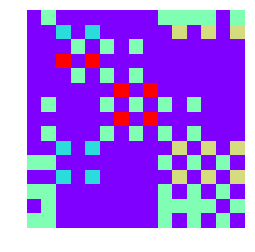

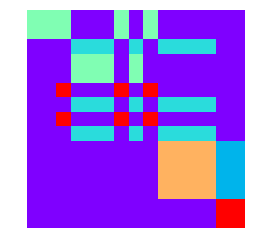

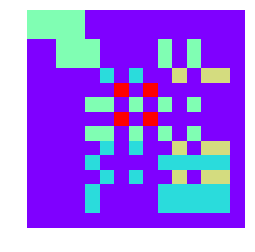

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


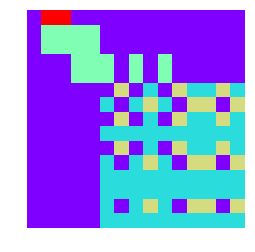

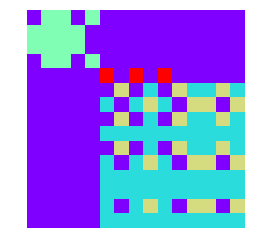

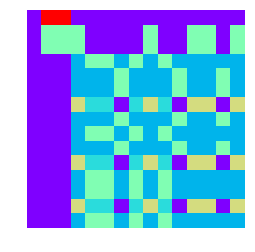

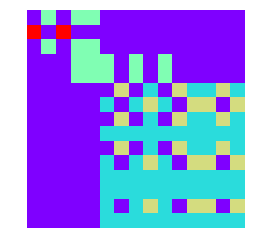

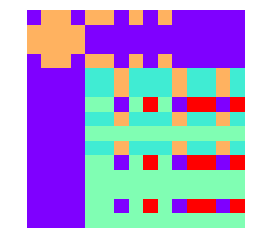

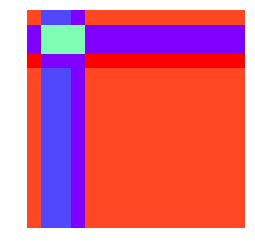

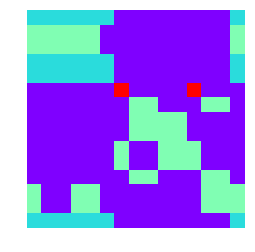

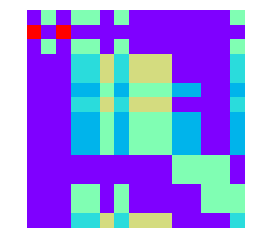

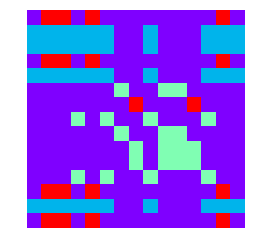

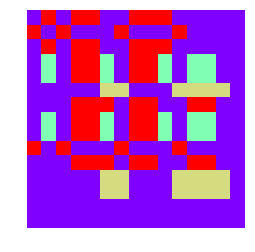

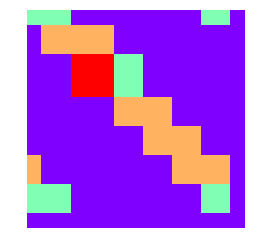

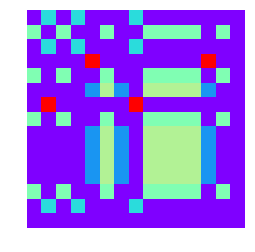

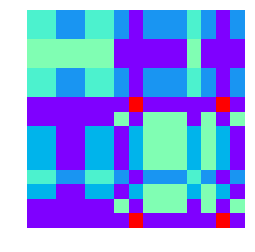

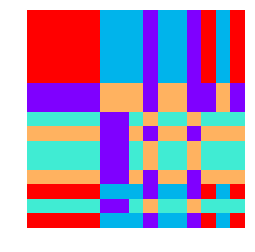

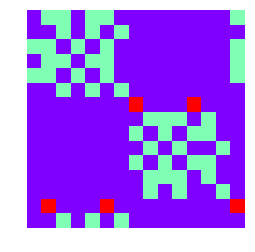

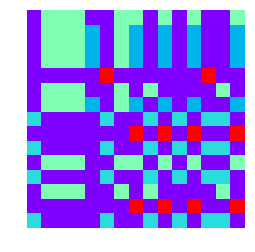

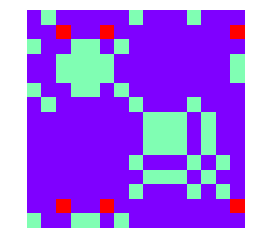

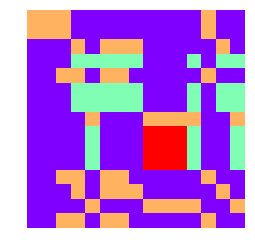

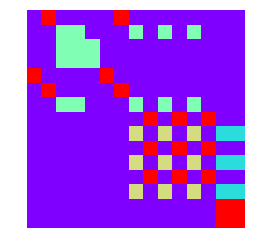

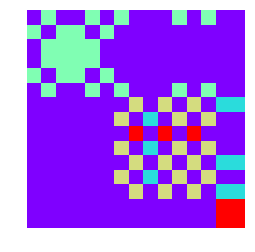

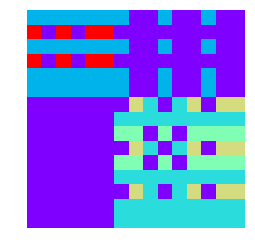

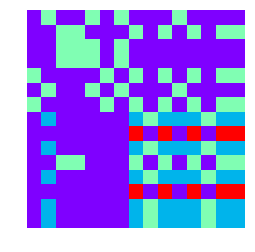

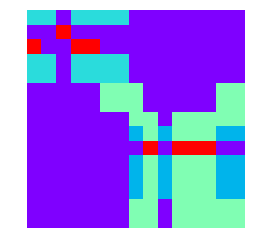

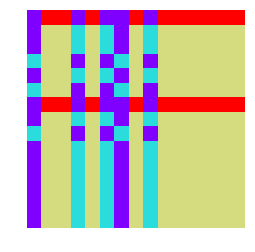

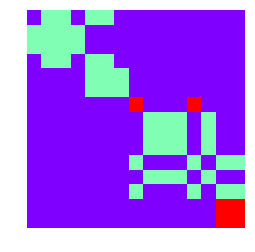

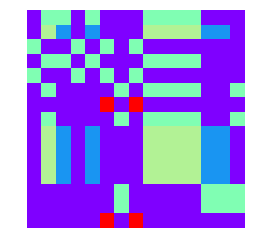

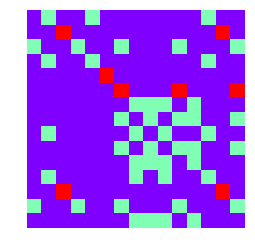

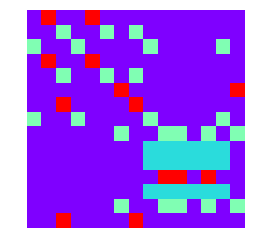

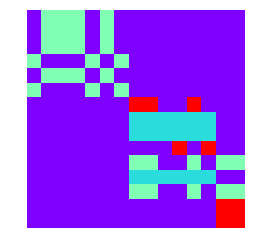

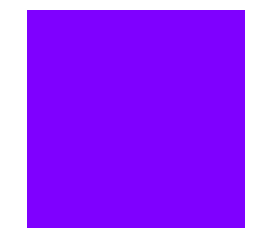

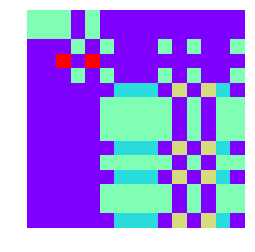

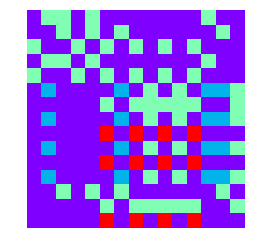

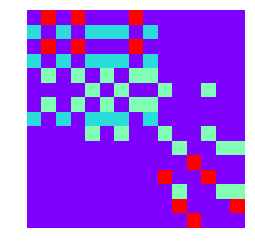

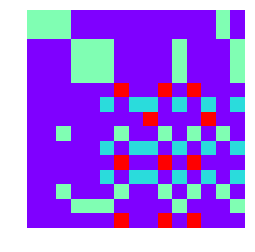

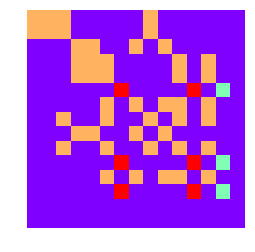

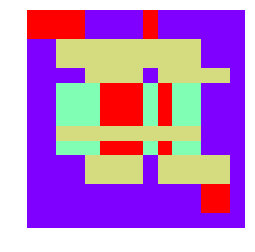

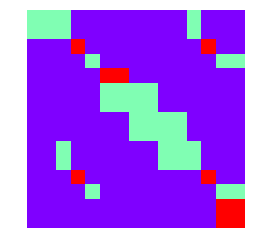

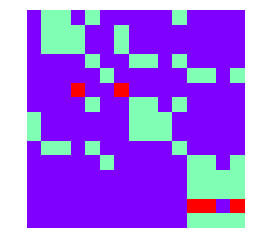

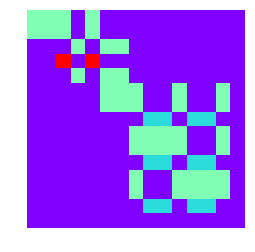

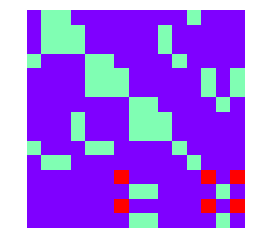

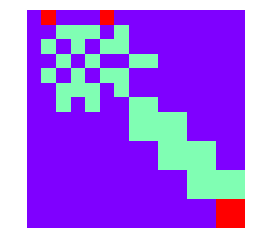

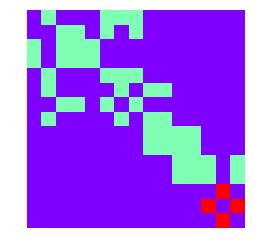

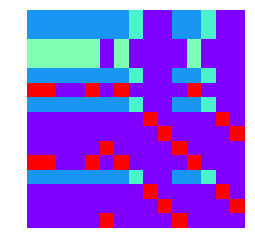

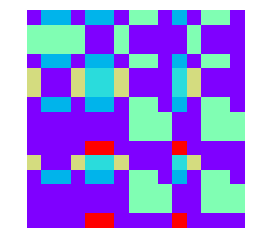

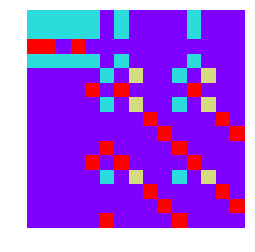

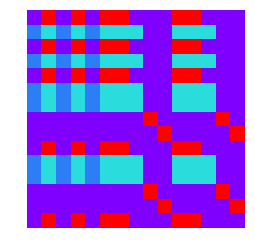

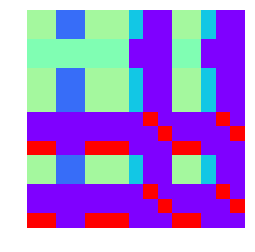

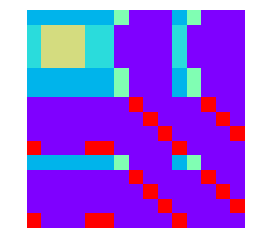

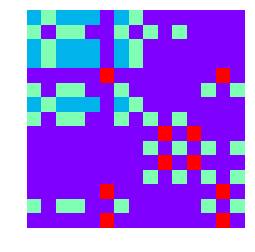

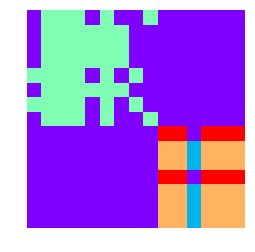

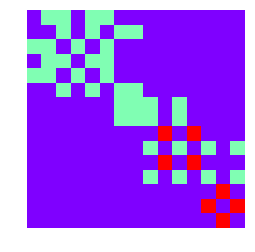

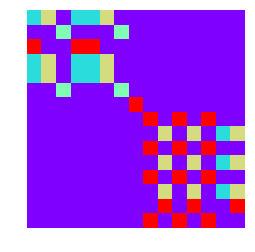

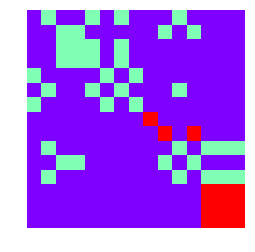

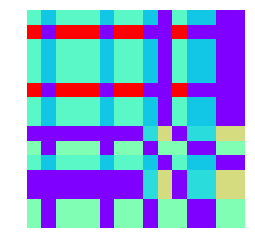

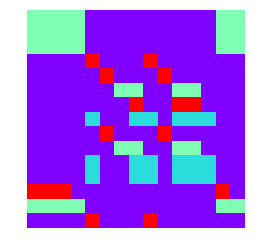

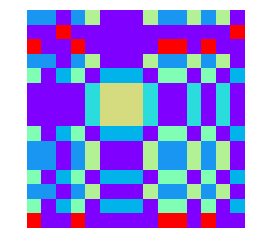

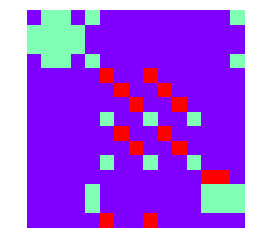

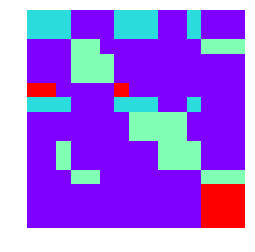

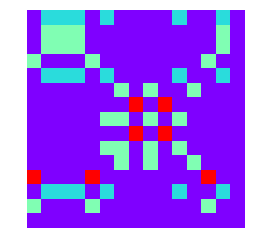

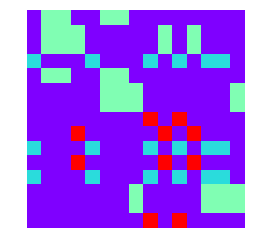

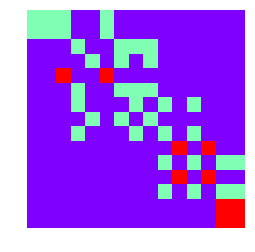

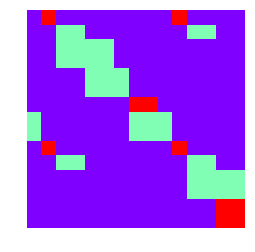

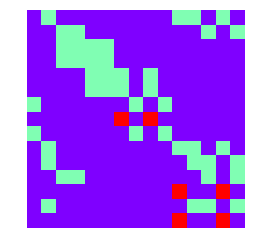

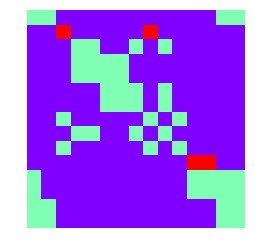

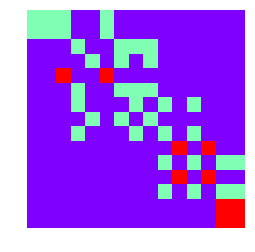

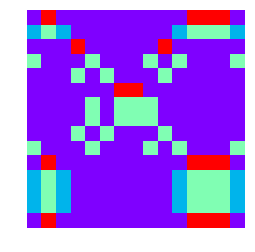

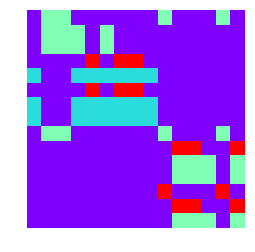

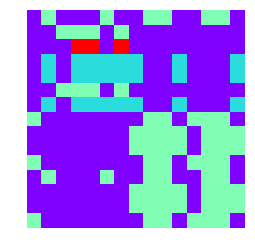

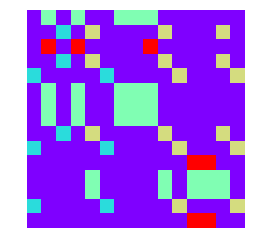

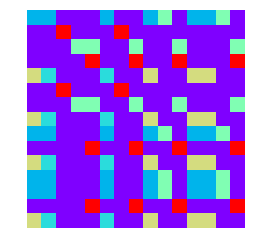

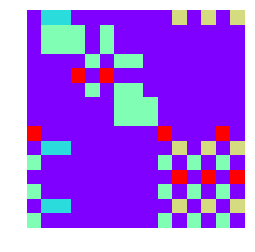

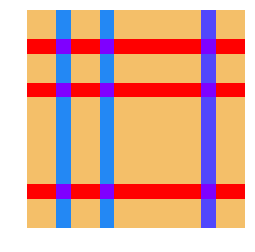

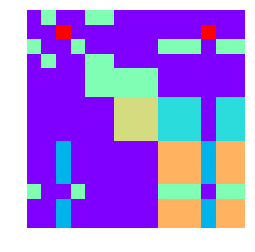

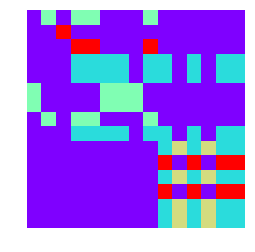

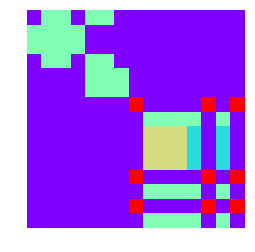

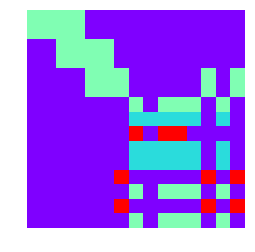

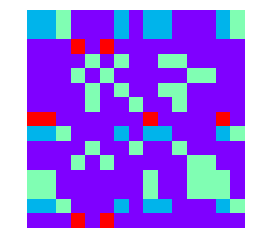

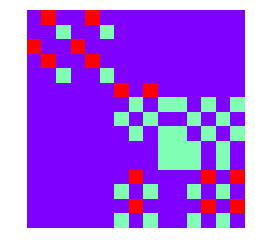

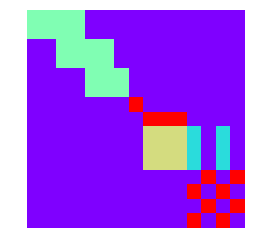

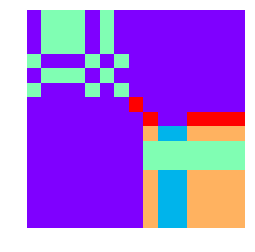

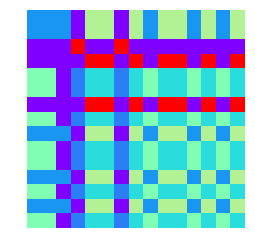

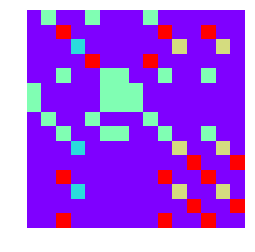

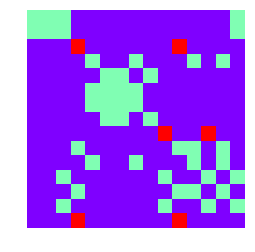

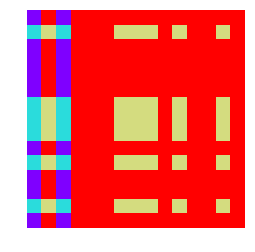

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


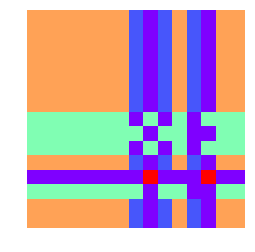

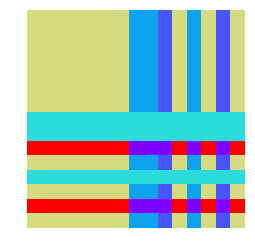

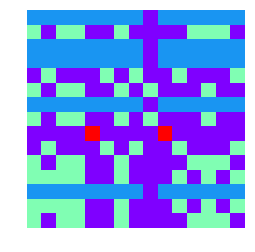

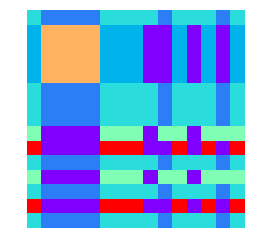

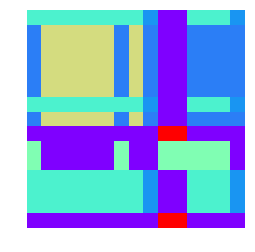

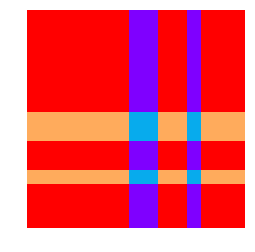

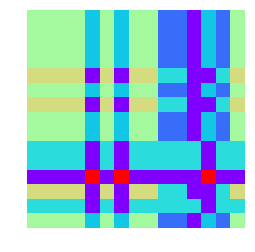

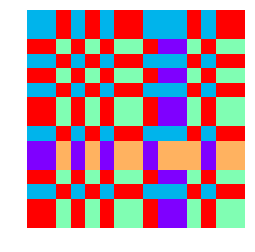

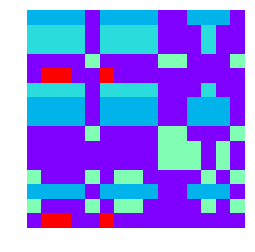

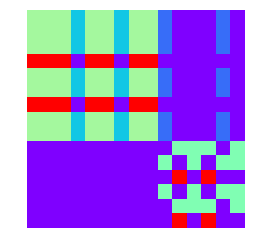

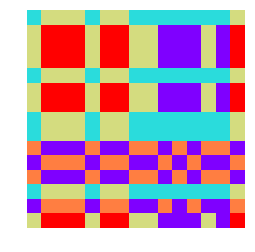

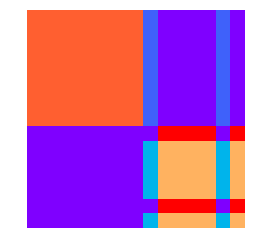

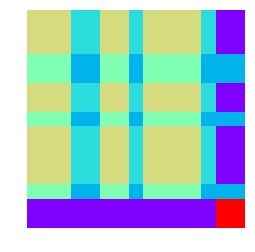

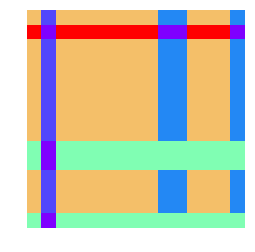

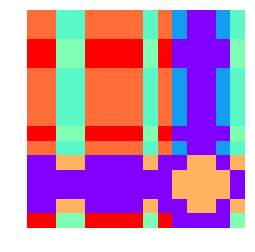

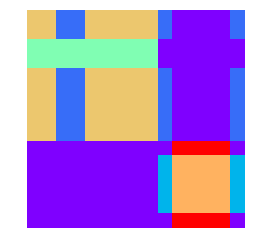

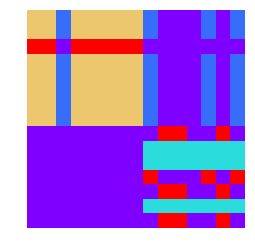

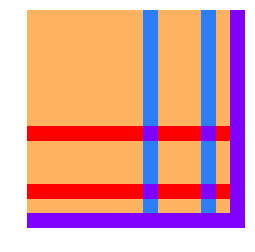

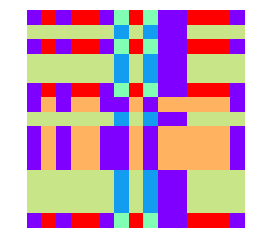

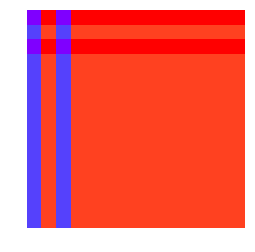

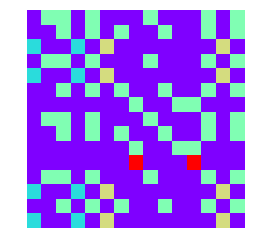

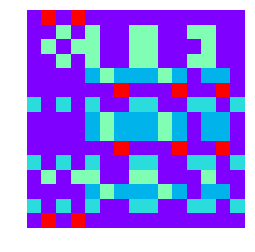

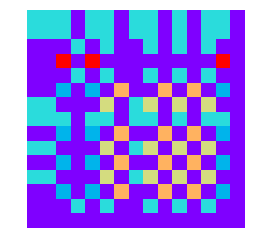

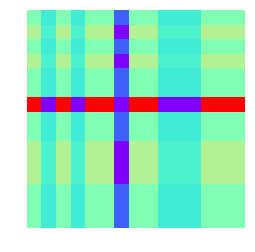

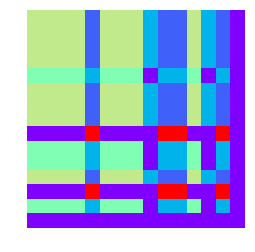

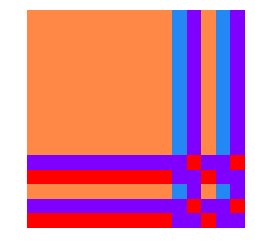

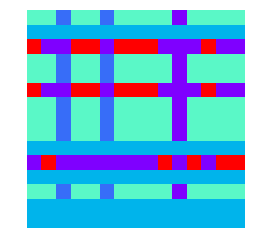

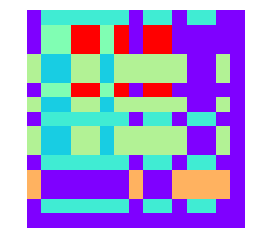

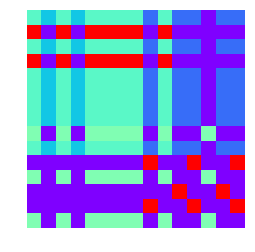

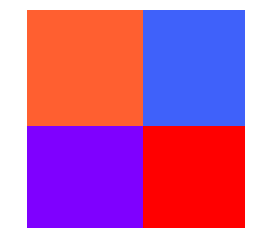

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


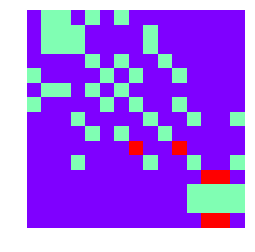

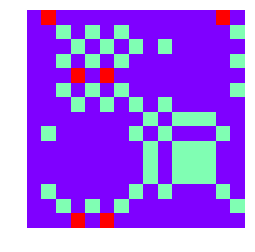

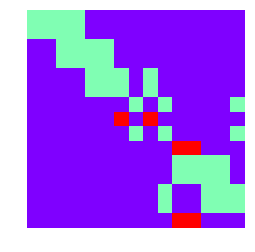

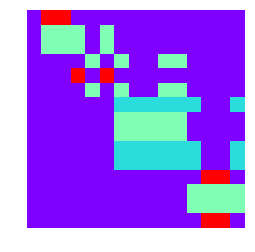

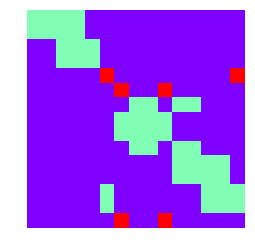

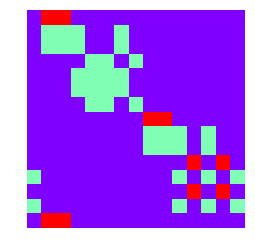

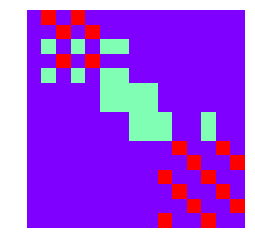

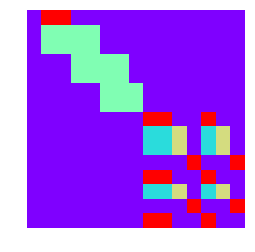

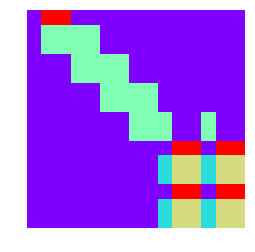

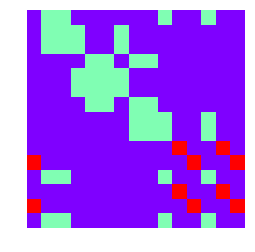

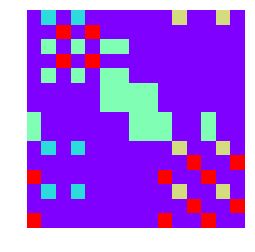

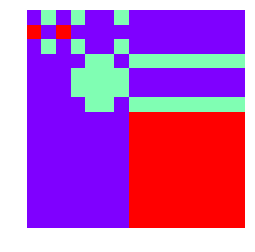

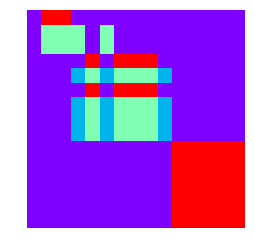

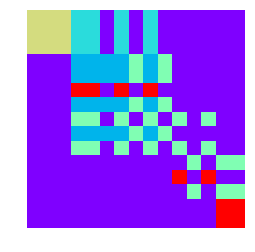

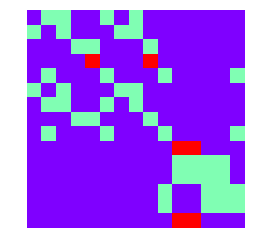

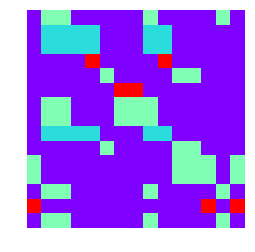

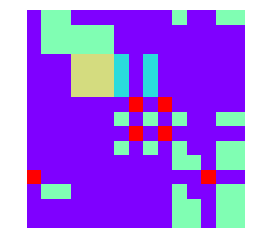

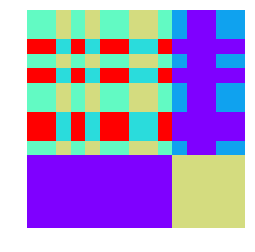

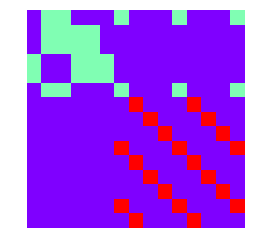

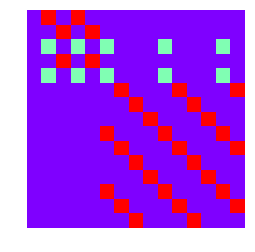

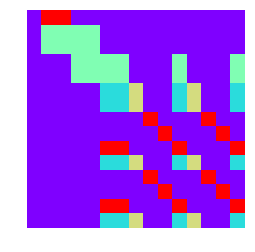

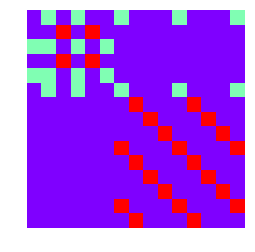

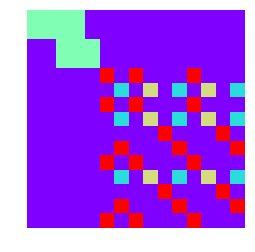

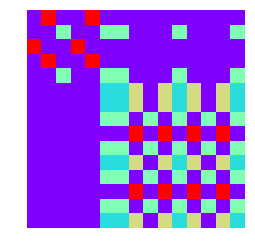

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


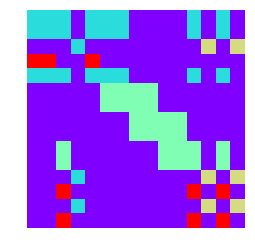

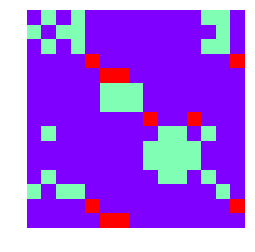

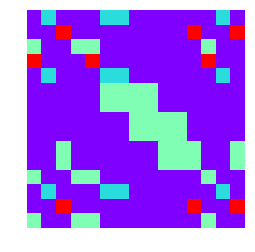

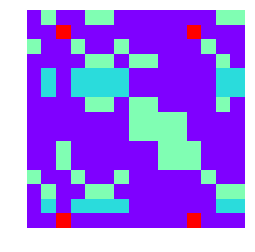

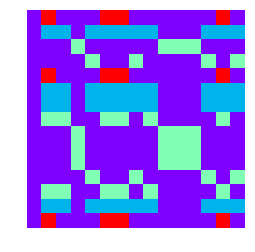

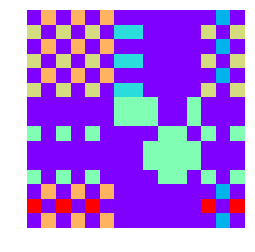

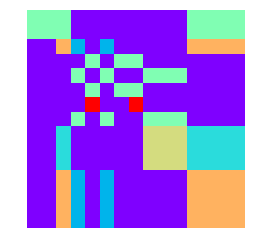

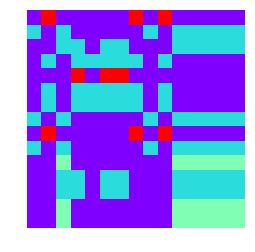

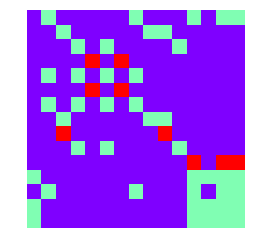

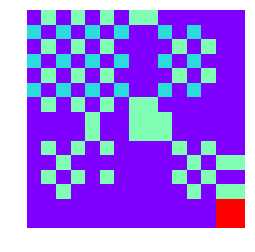

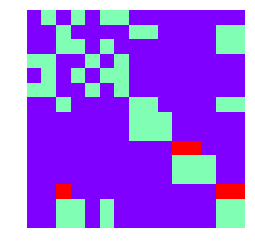

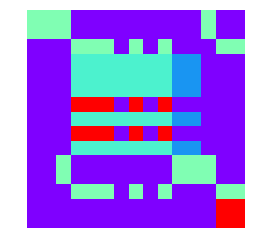

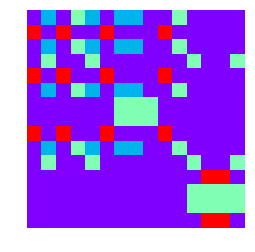

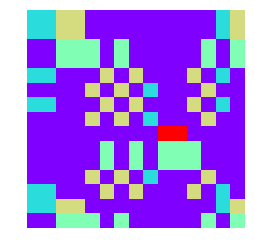

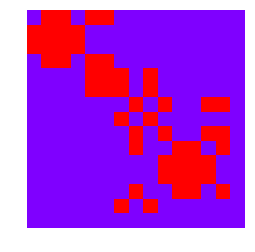

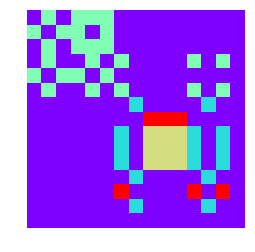

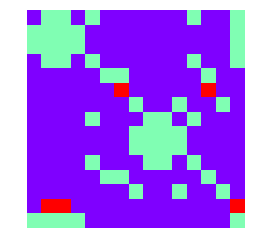

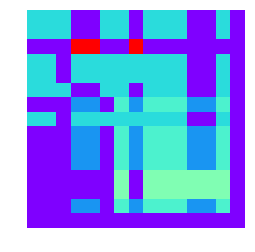

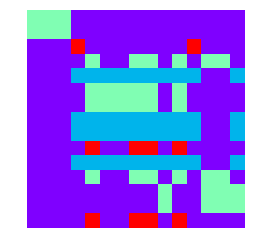

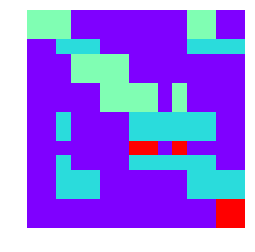

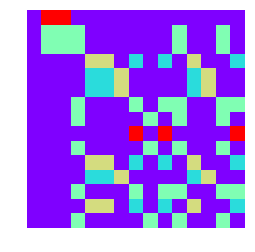

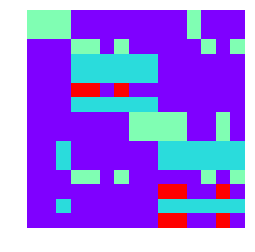

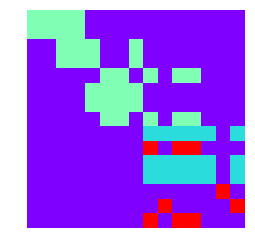

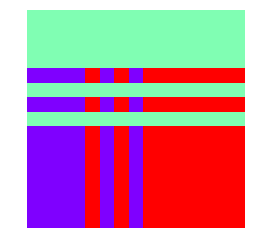

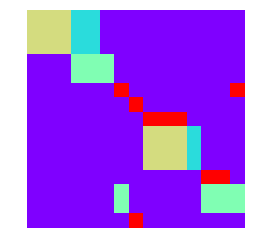

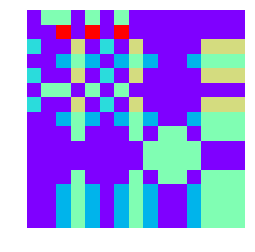

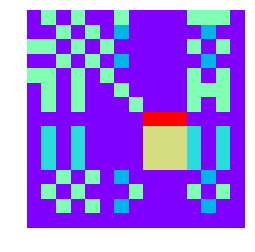

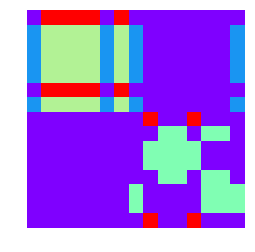

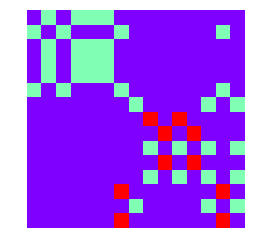

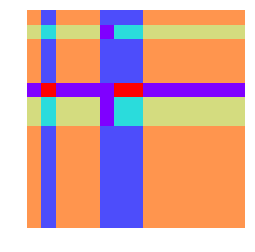

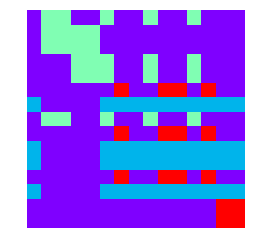

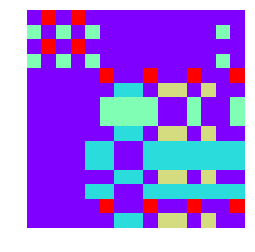

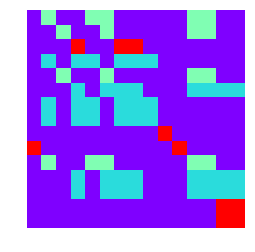

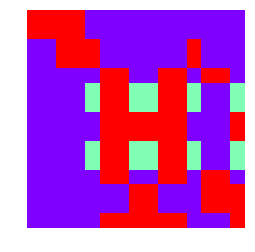

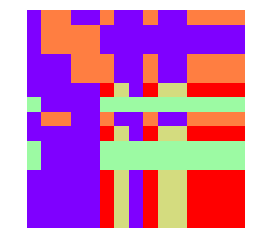

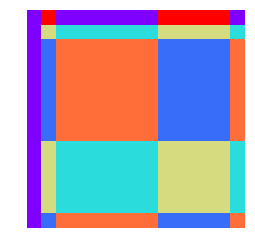

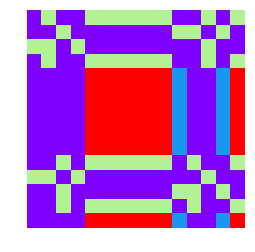

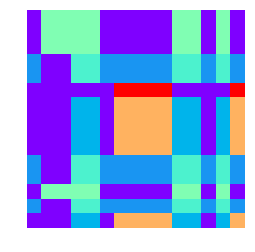

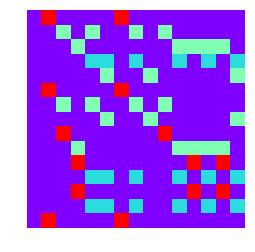

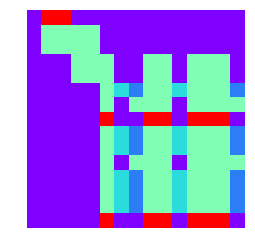

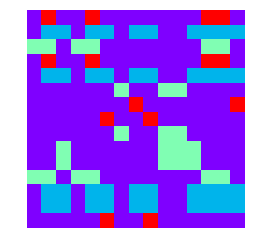

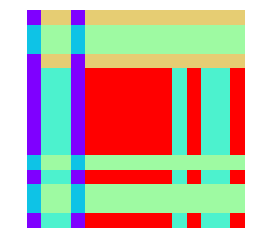

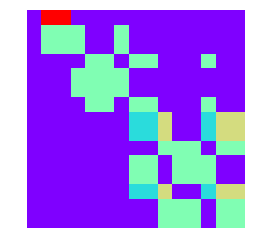

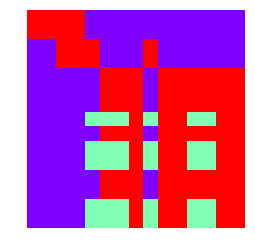

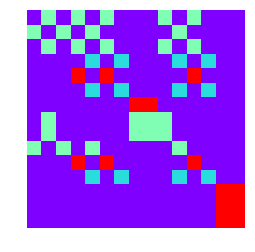

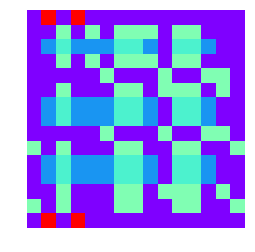

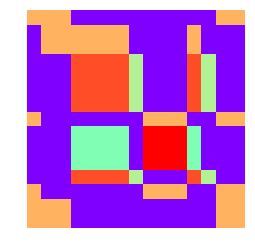

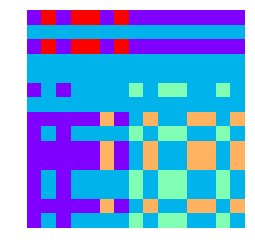

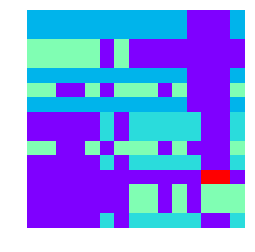

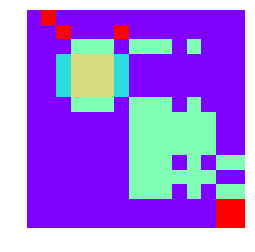

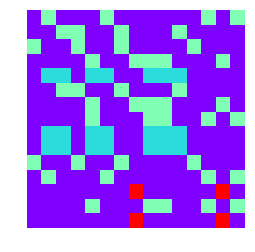

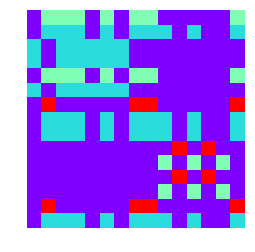

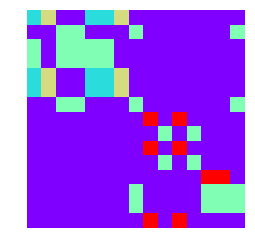

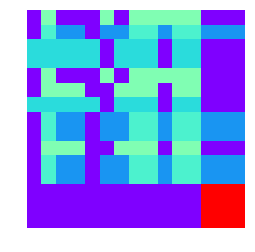

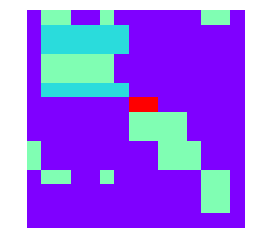

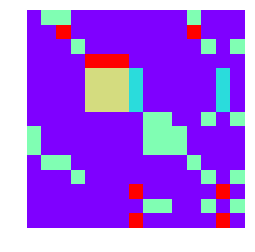

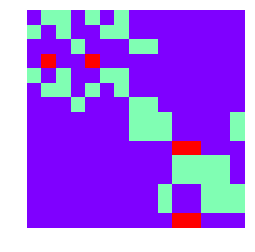

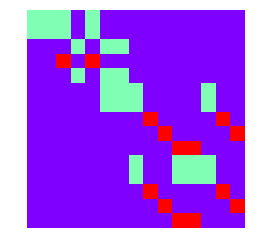

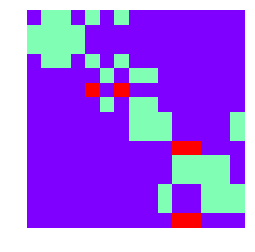

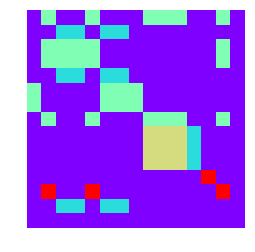

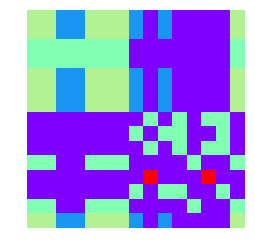

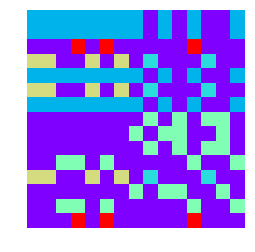

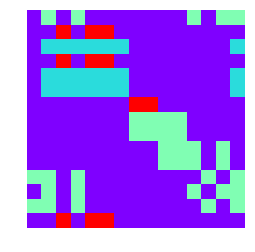

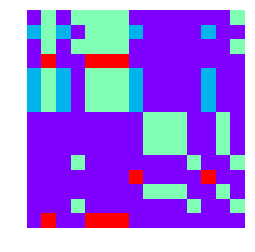

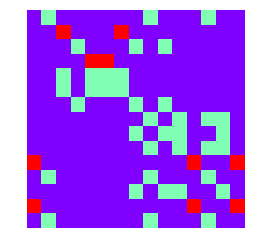

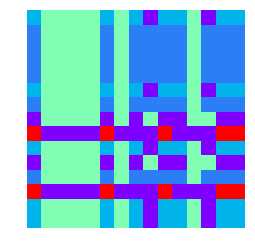

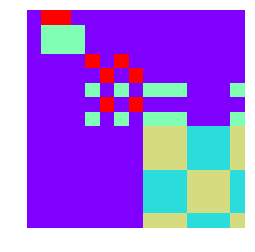

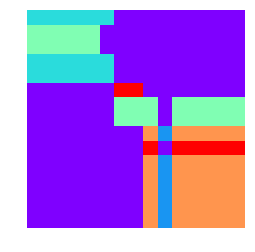

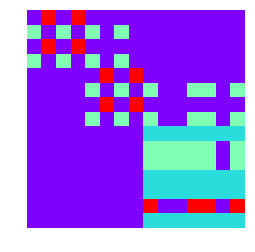

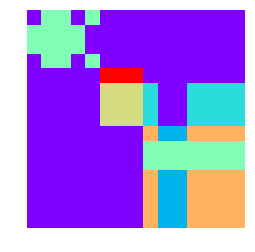

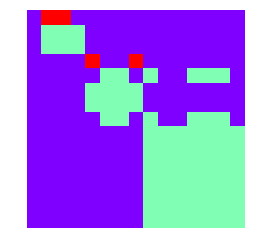

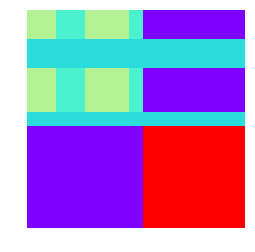

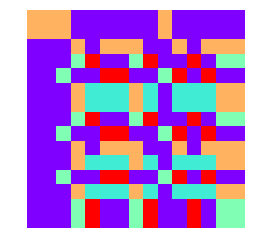

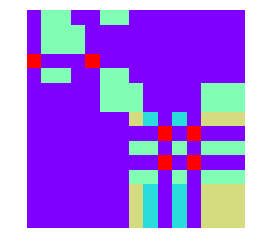

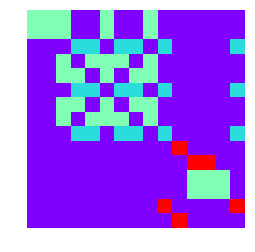

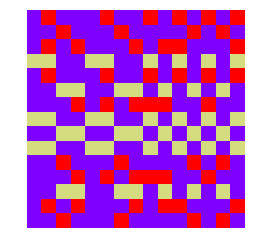

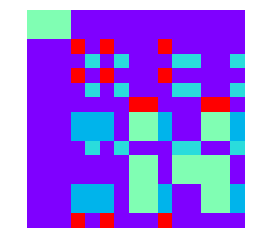

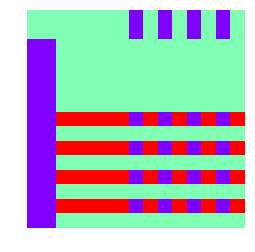

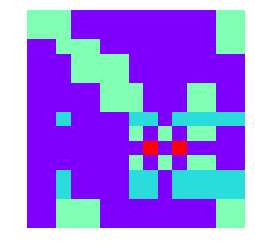

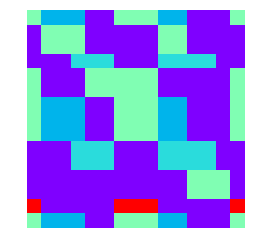

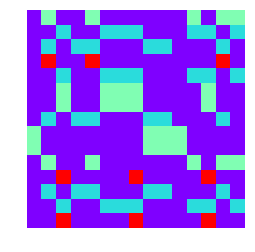

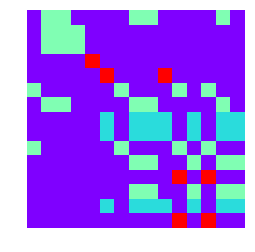

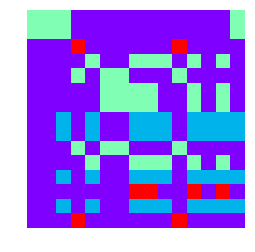

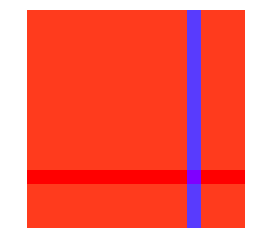

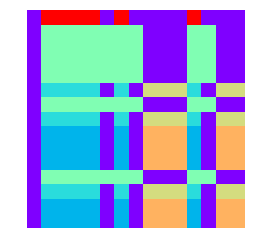

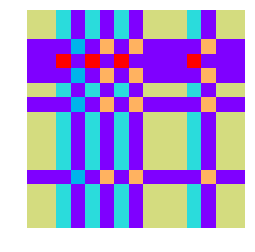

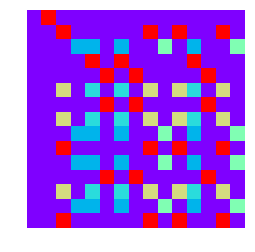

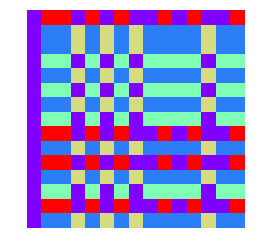

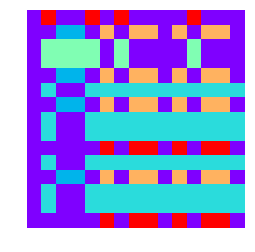

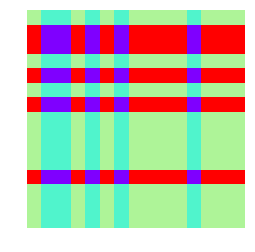

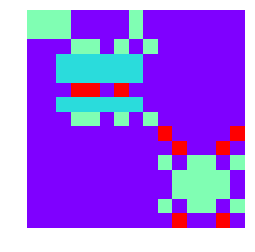

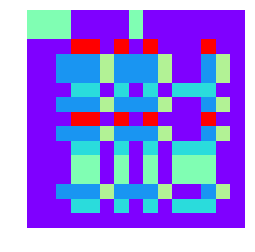

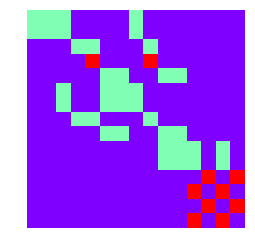

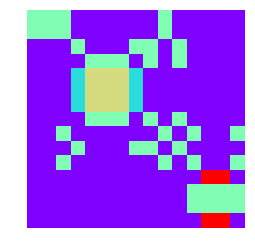

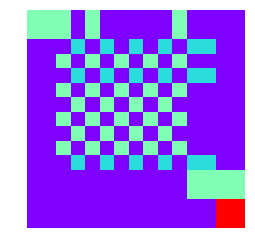

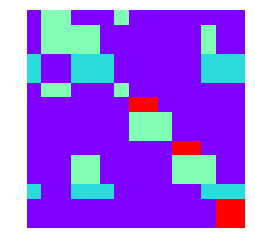

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


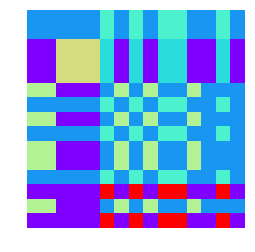

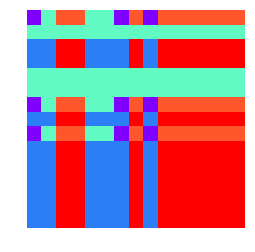

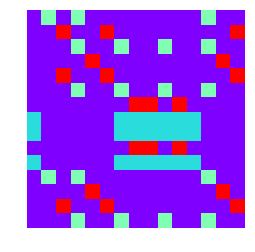

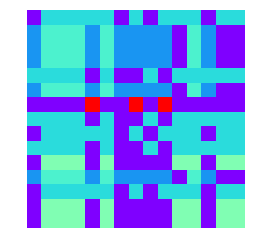

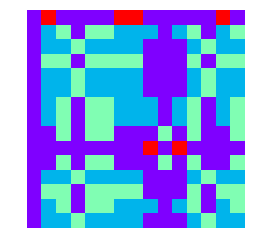

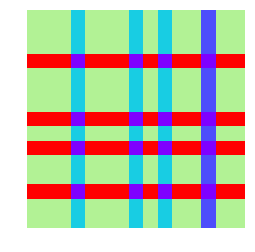

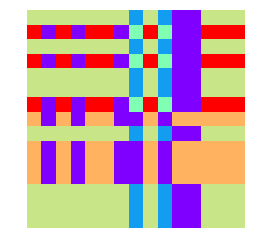

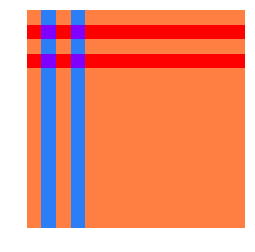

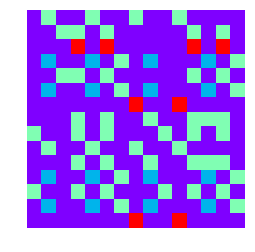

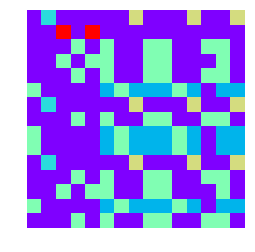

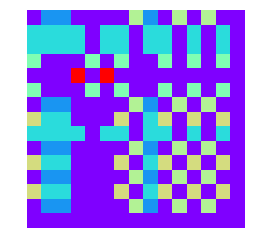

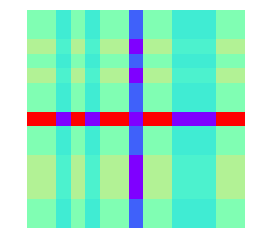

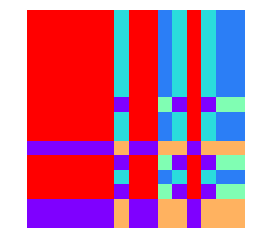

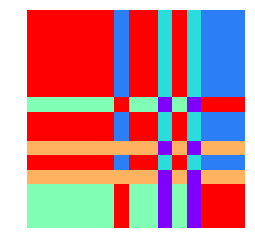

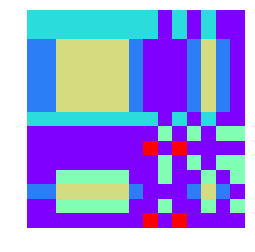

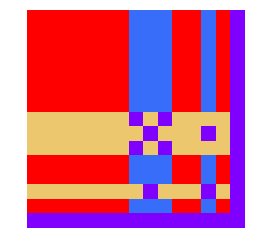

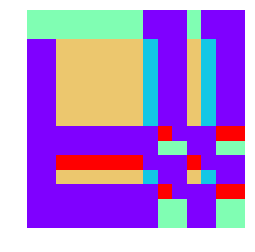

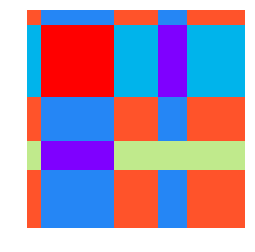

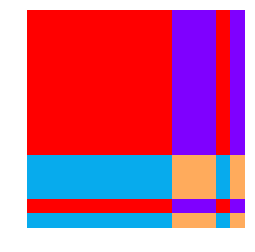

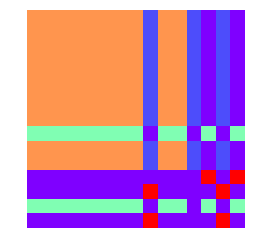

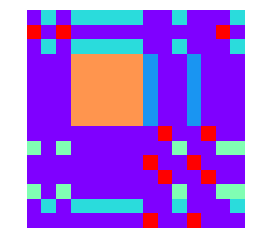

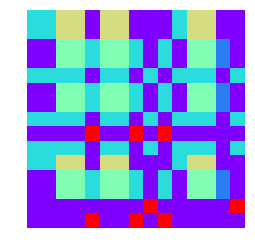

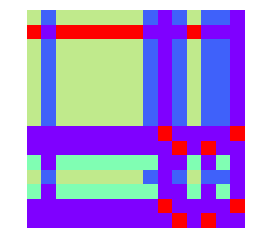

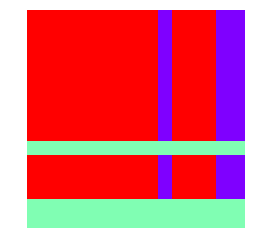

C:\ProgramData\Anaconda3\lib\site-packages\pyts\utils\utils.py:176: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  MTF[np.meshgrid(list_values[i], list_values[j])] = MTM[i, j]


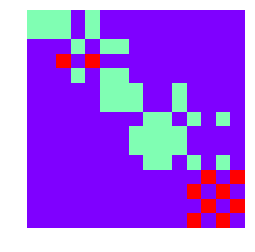

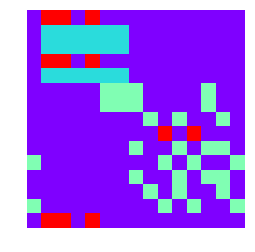

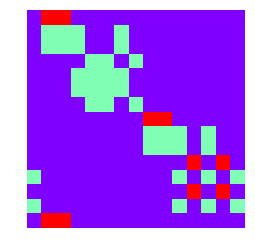

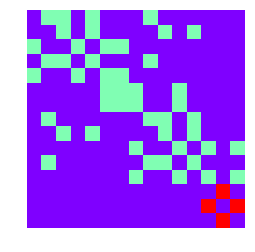

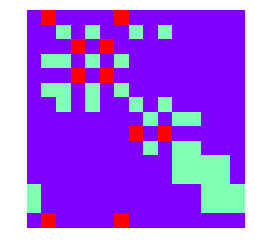

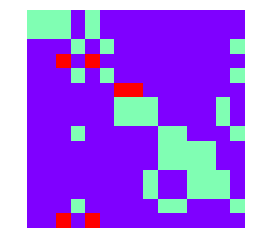

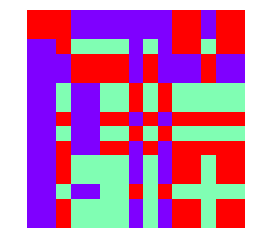

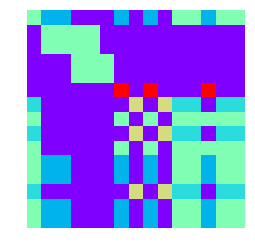

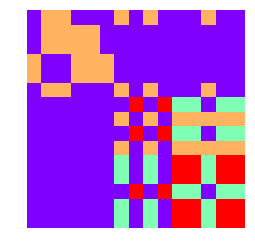

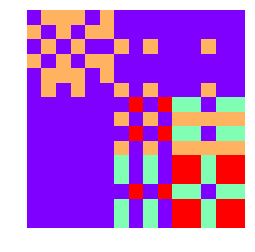

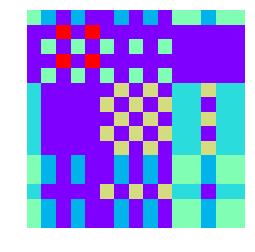

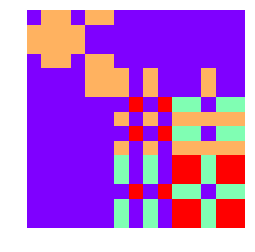

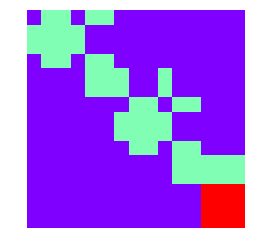

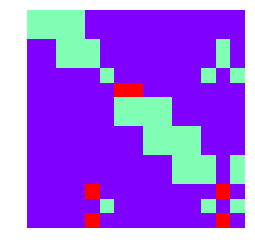

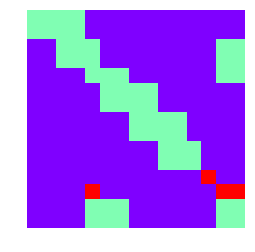

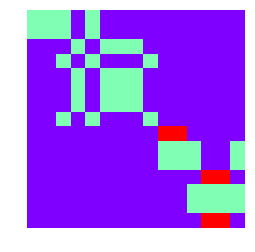

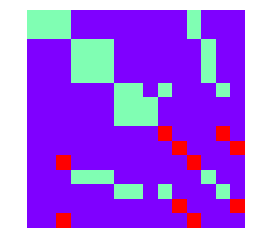

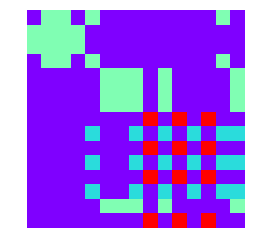

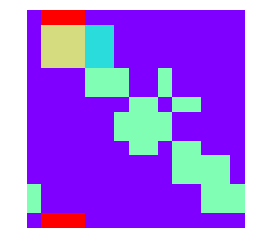

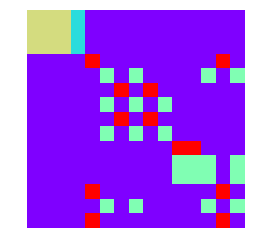

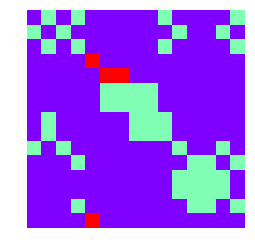

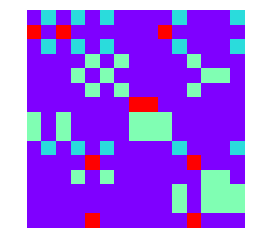

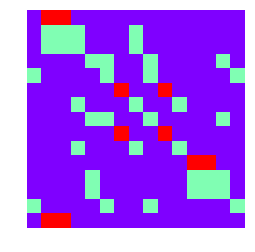

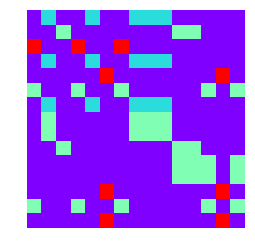

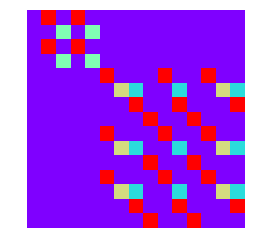

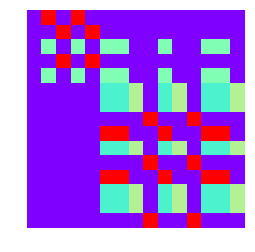

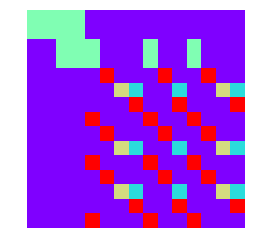

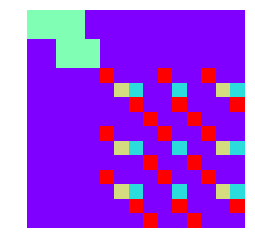

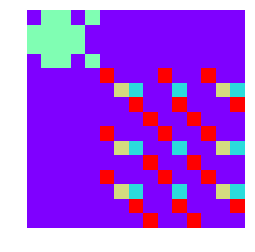

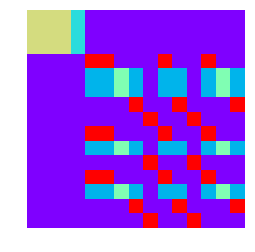

In [15]:
transformation(True,True,"mtf")

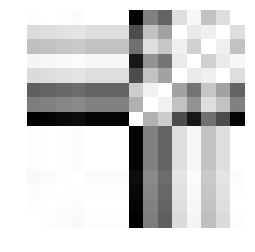

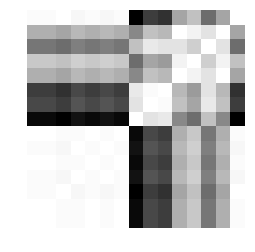

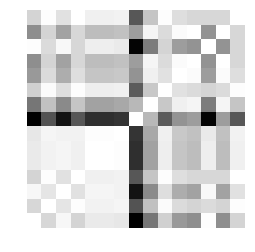

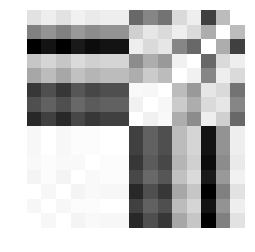

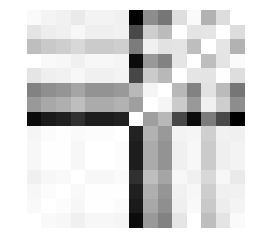

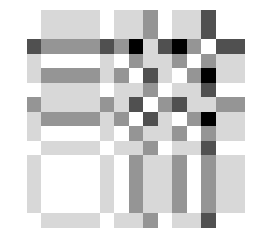

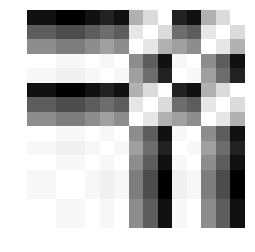

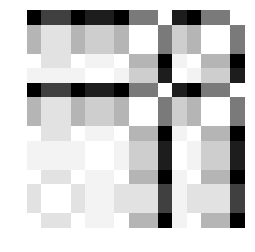

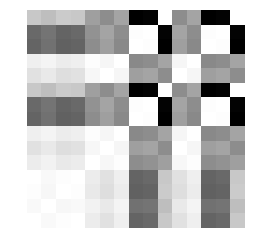

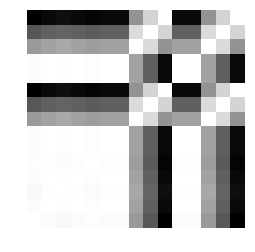

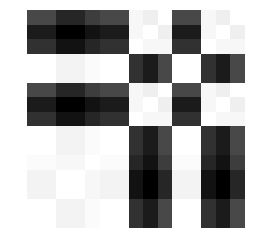

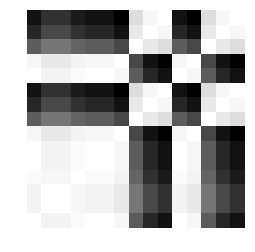

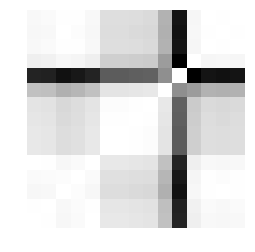

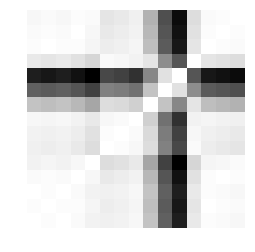

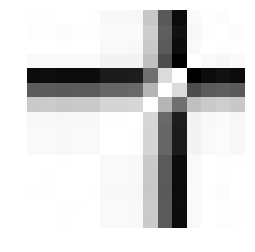

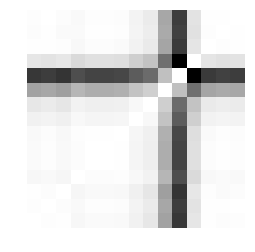

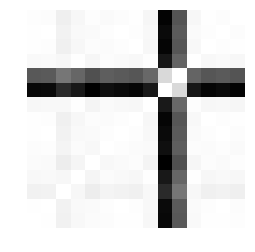

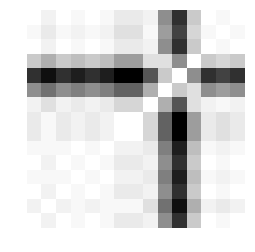

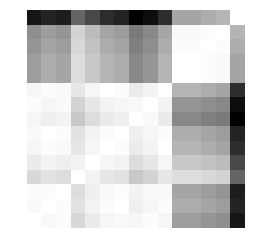

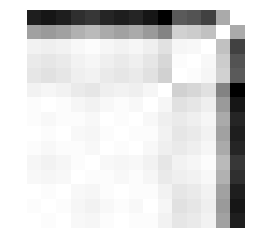

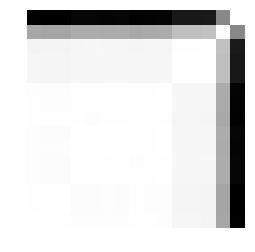

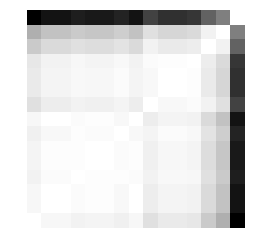

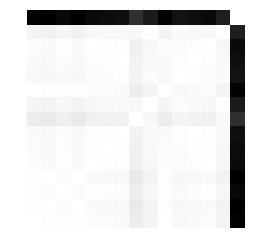

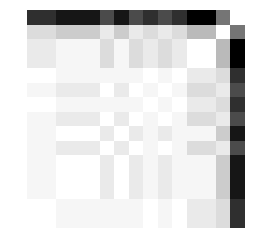

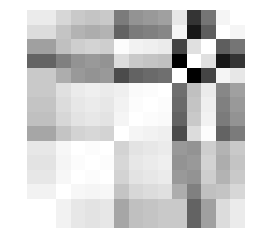

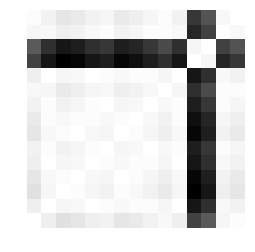

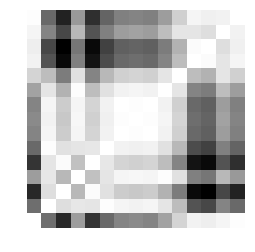

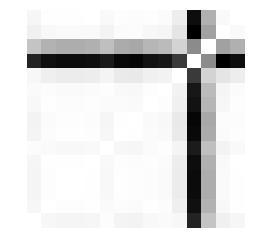

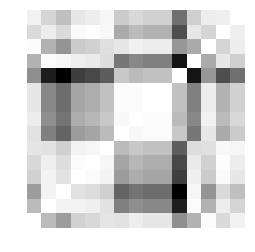

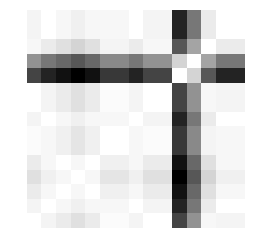

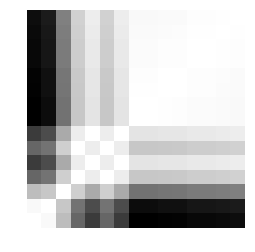

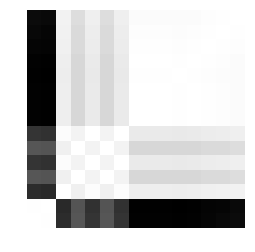

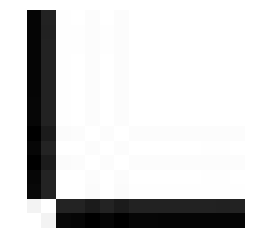

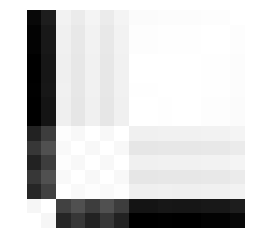

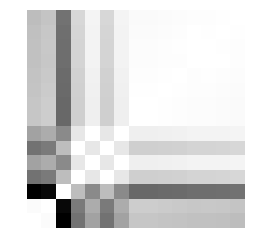

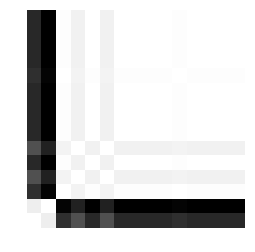

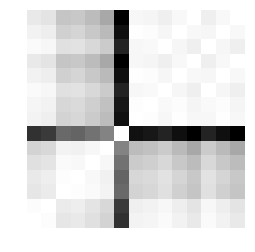

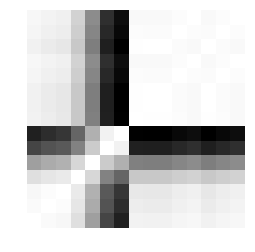

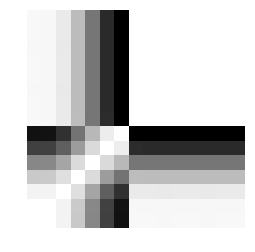

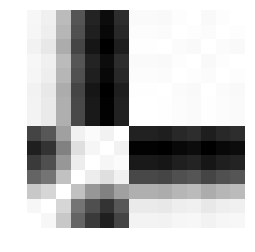

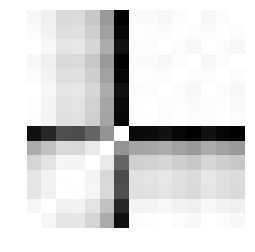

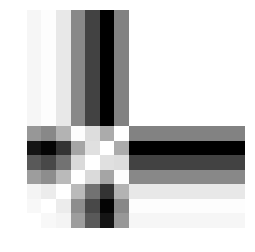

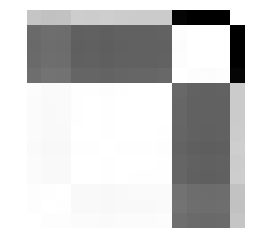

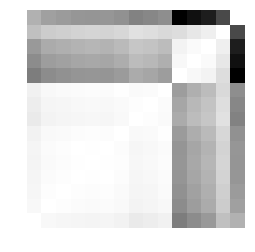

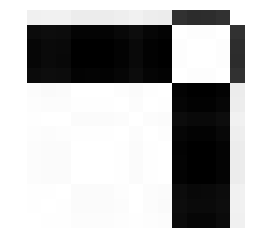

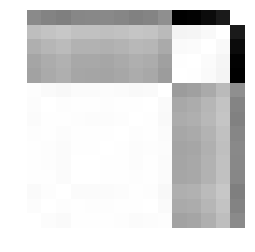

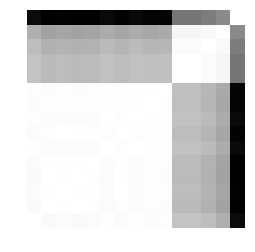

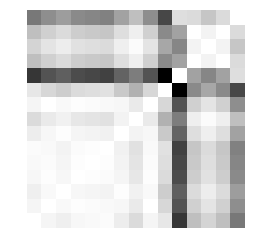

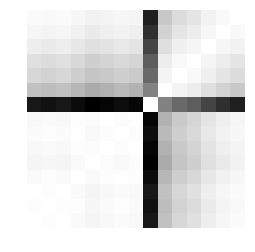

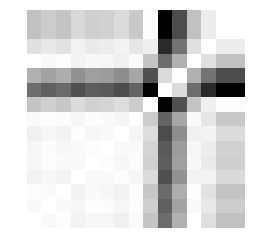

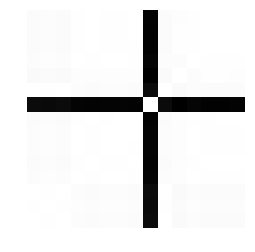

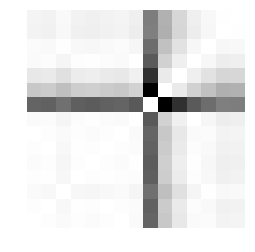

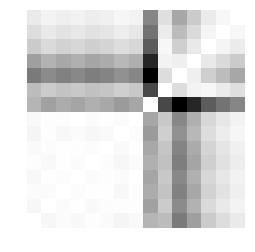

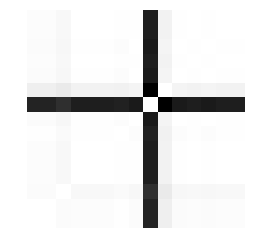

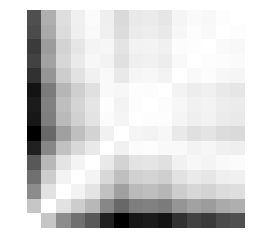

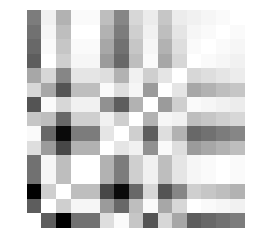

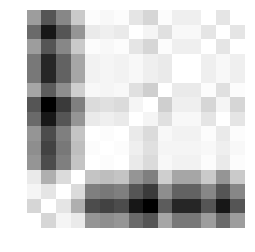

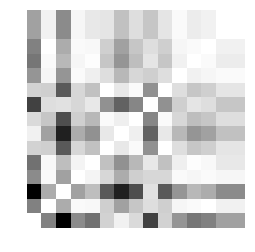

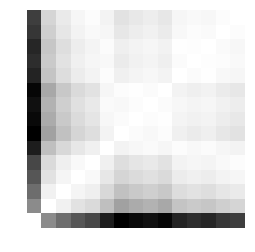

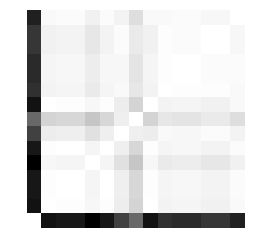

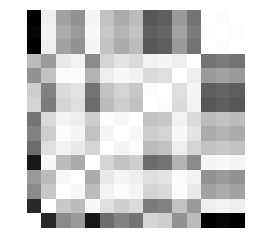

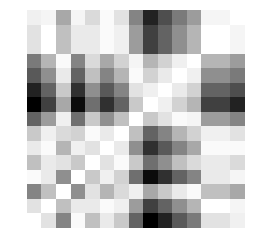

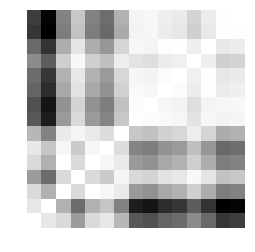

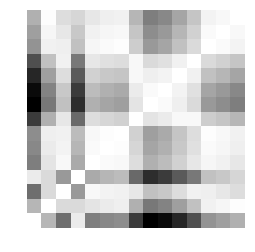

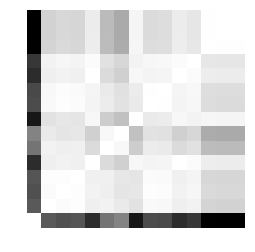

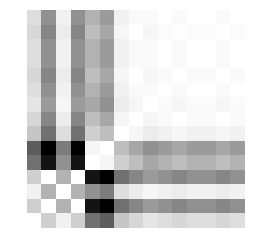

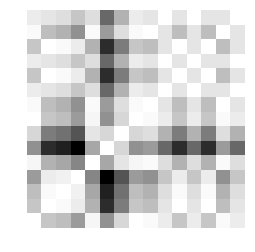

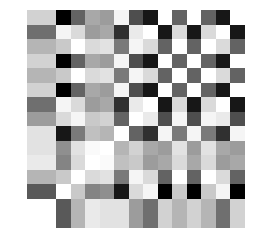

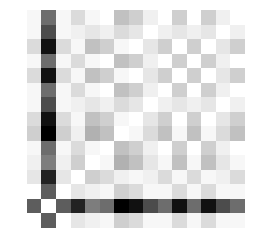

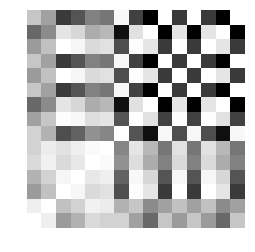

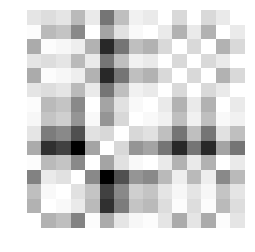

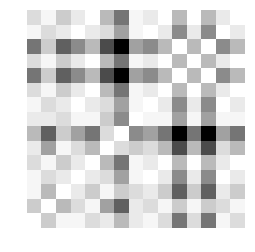

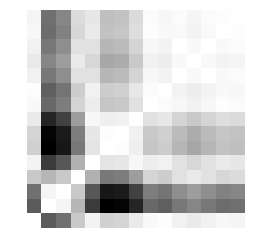

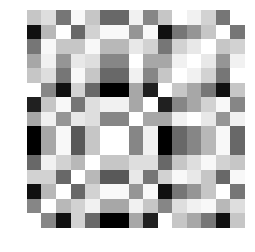

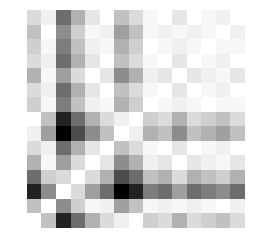

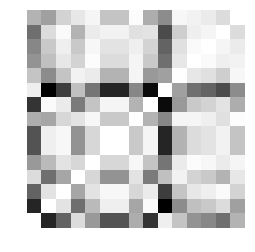

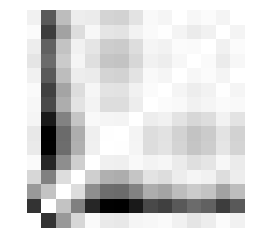

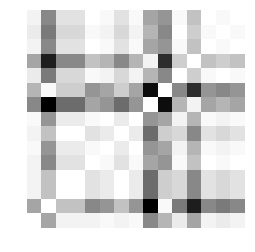

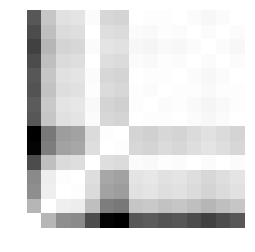

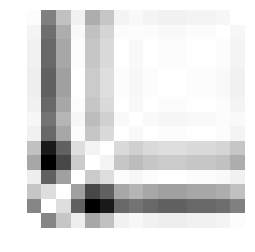

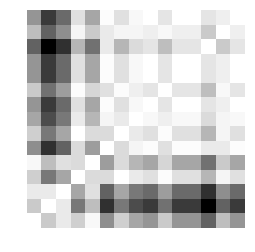

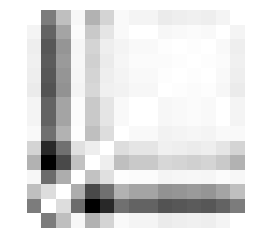

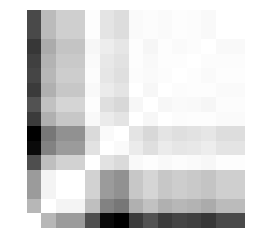

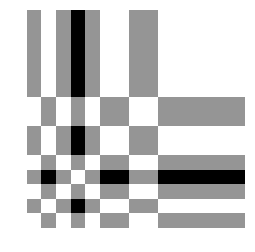

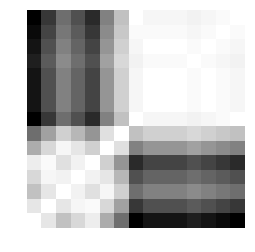

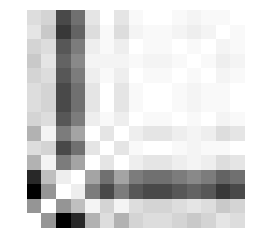

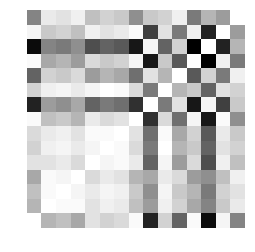

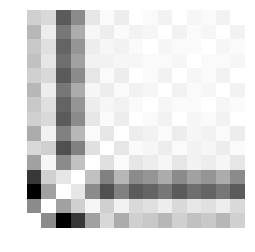

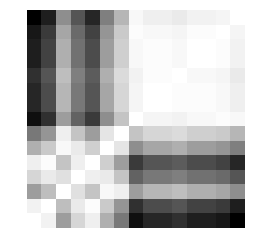

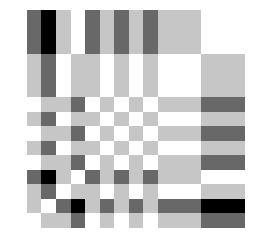

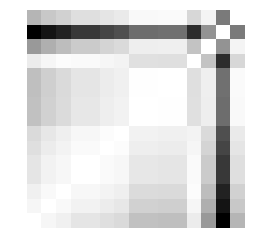

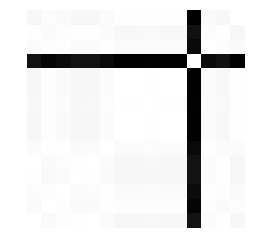

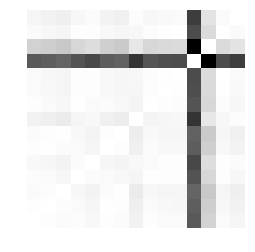

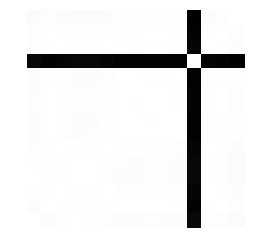

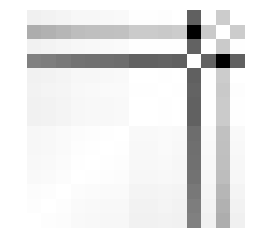

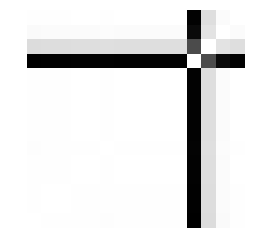

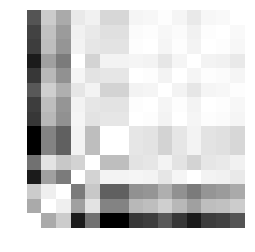

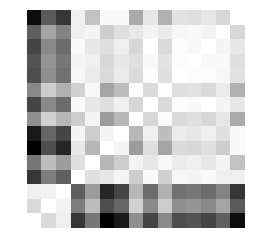

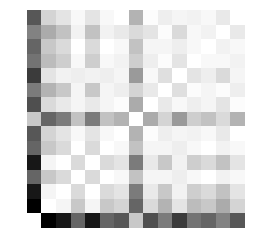

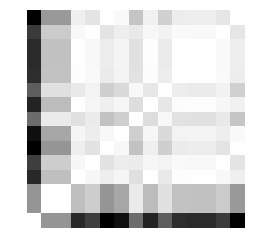

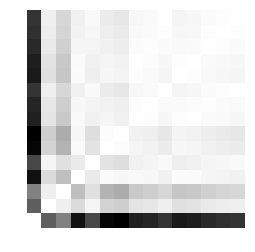

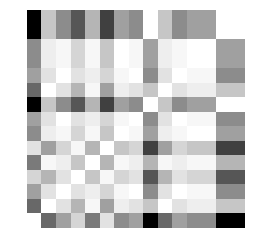

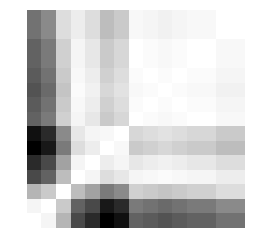

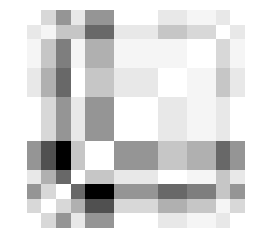

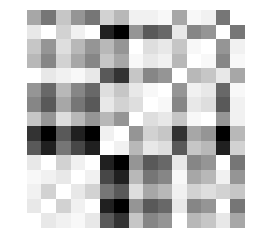

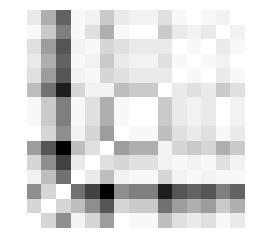

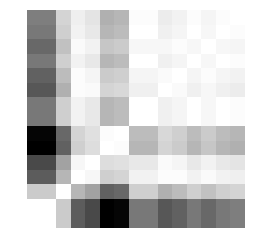

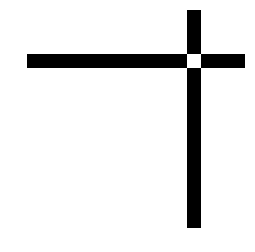

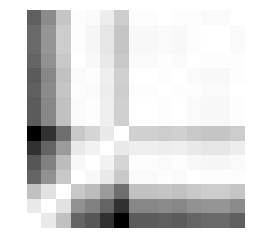

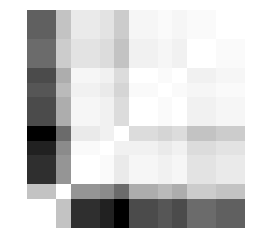

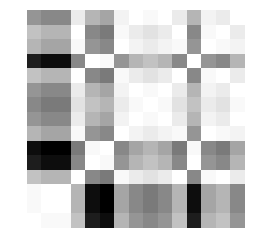

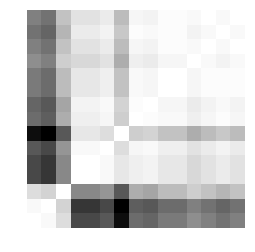

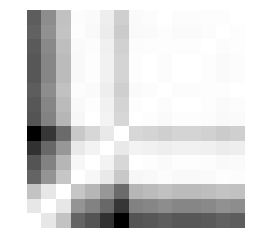

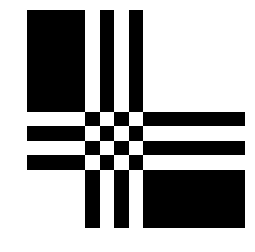

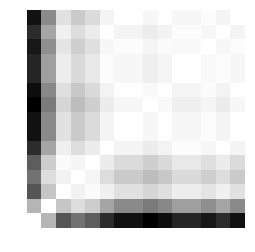

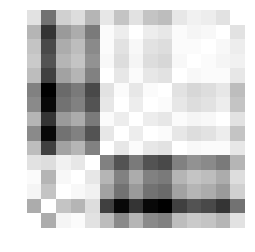

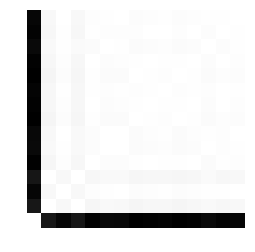

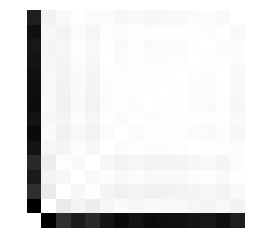

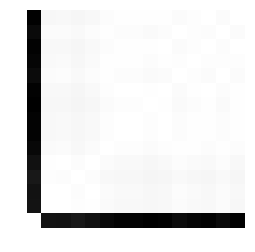

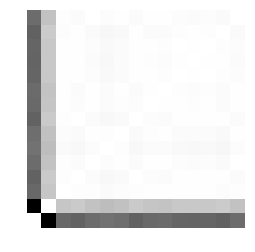

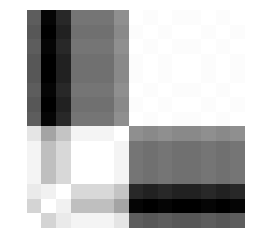

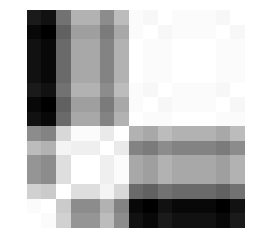

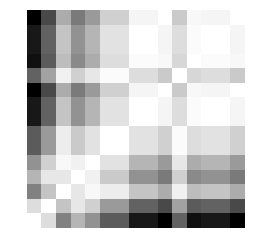

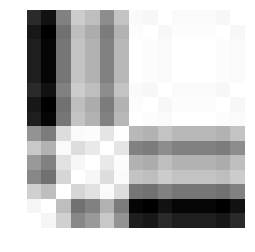

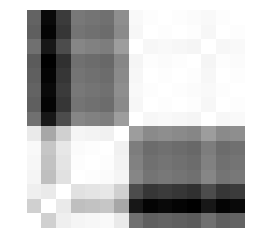

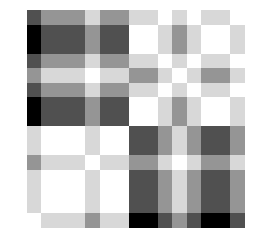

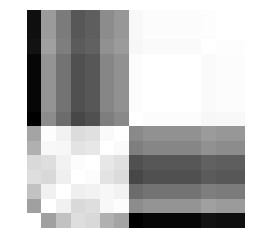

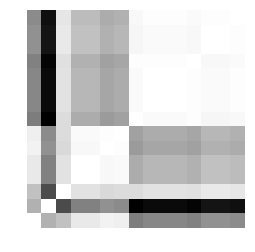

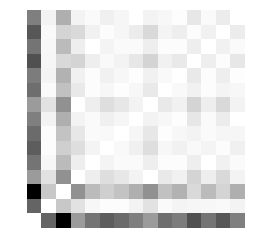

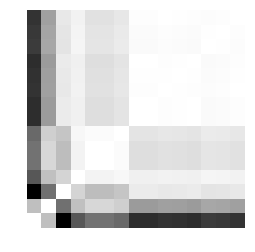

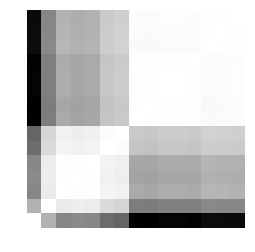

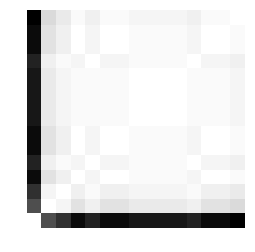

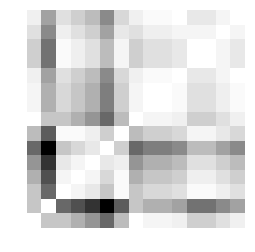

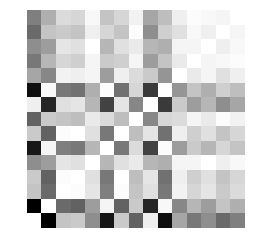

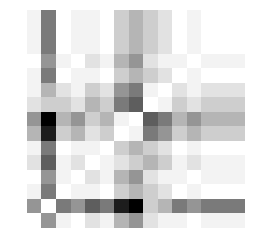

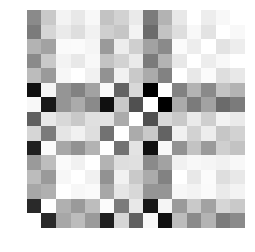

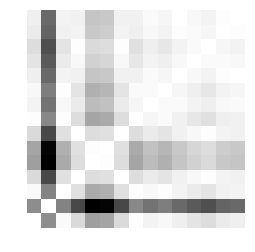

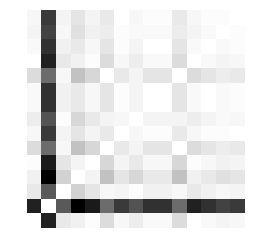

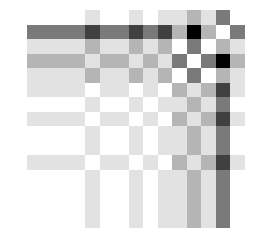

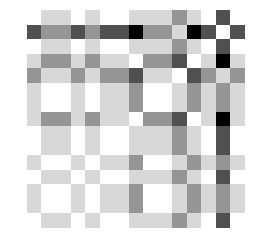

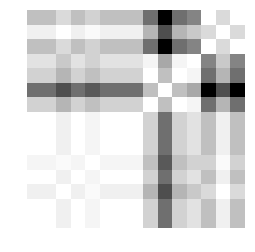

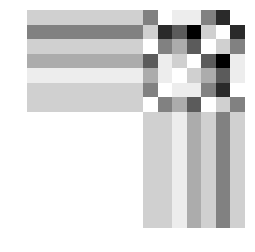

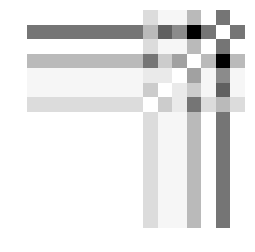

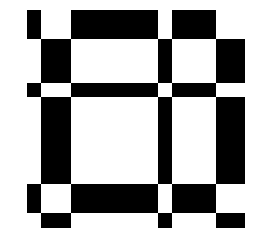

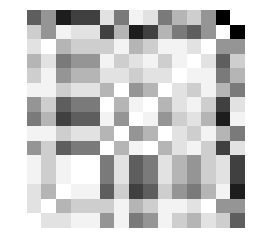

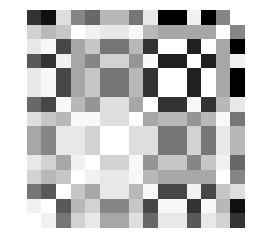

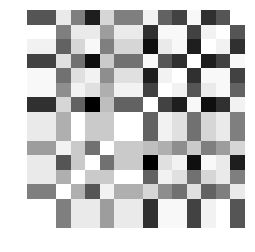

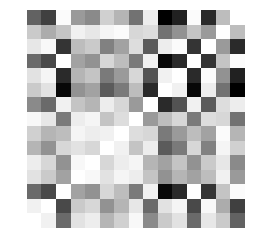

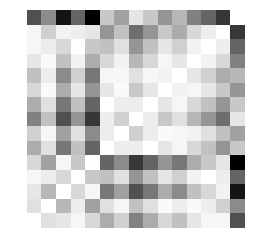

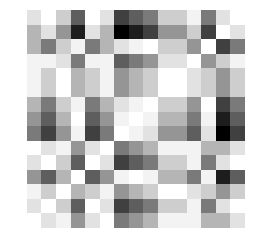

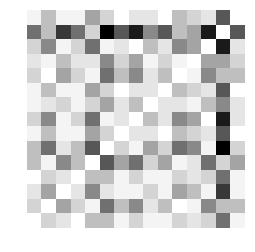

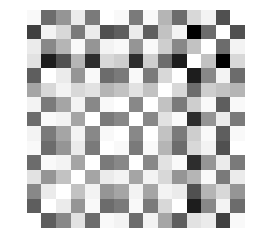

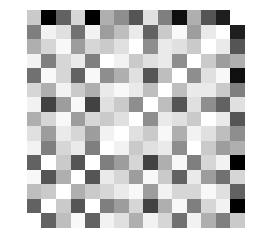

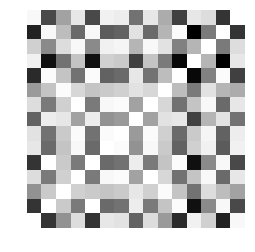

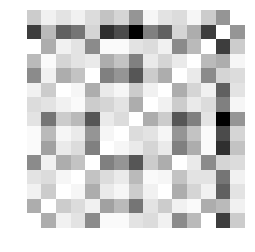

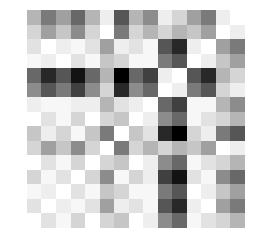

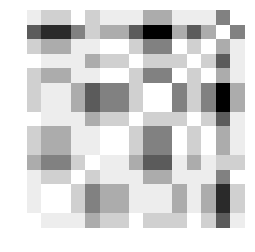

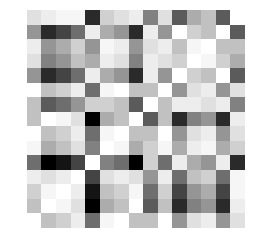

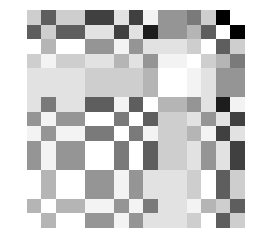

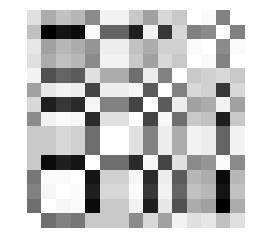

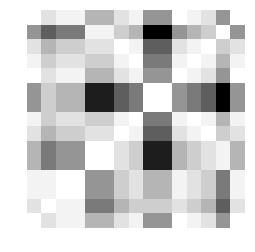

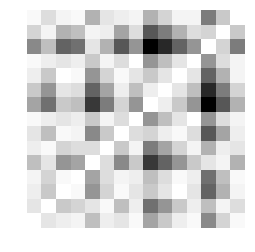

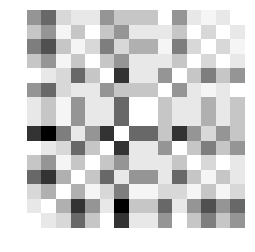

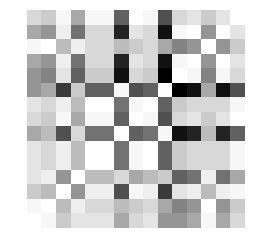

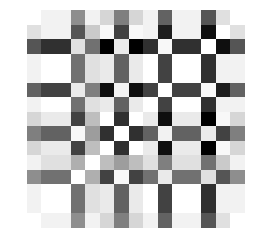

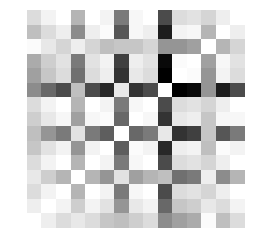

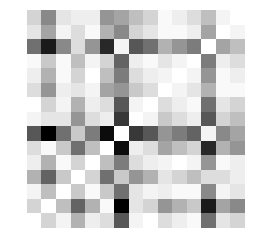

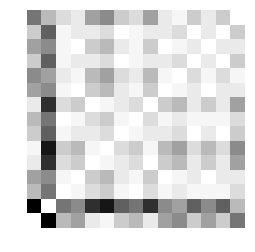

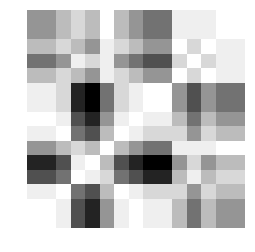

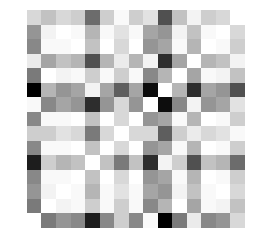

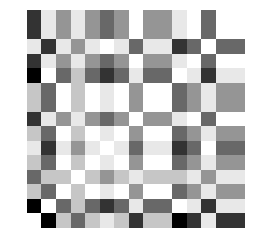

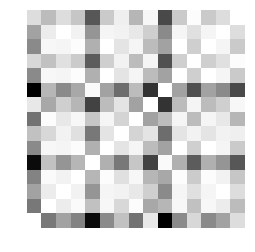

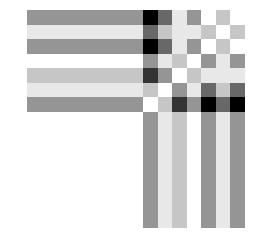

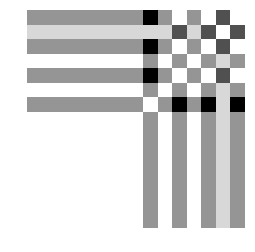

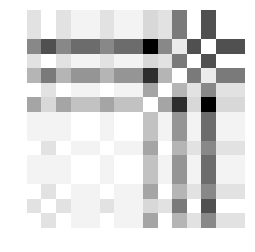

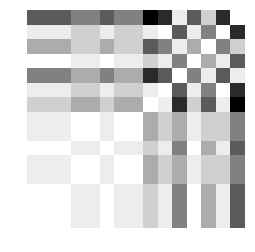

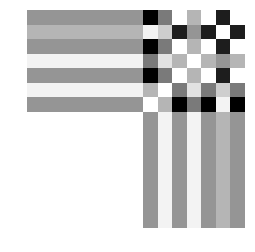

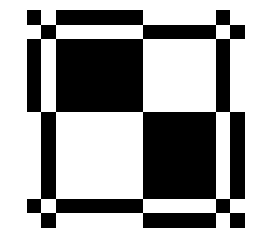

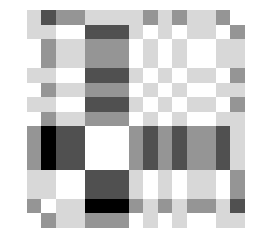

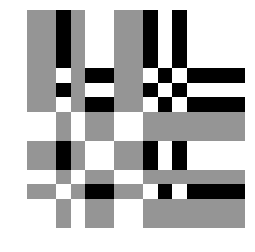

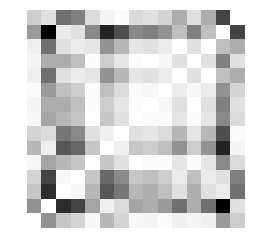

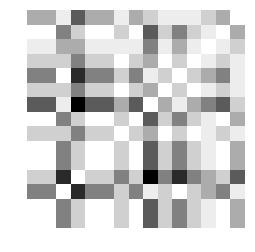

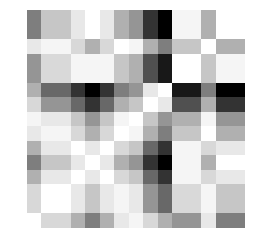

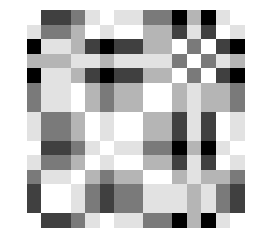

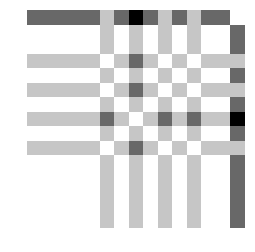

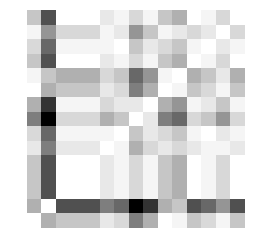

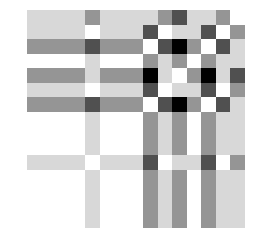

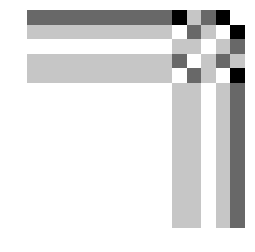

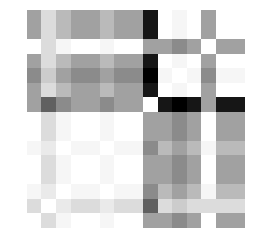

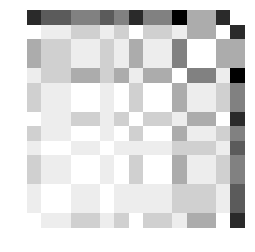

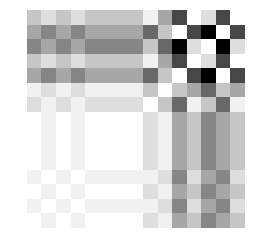

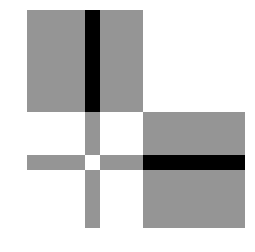

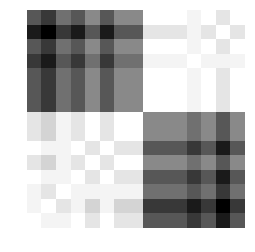

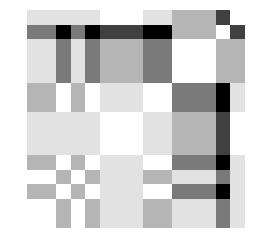

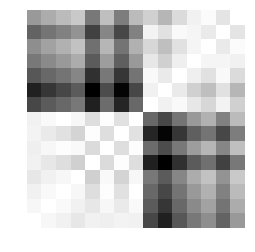

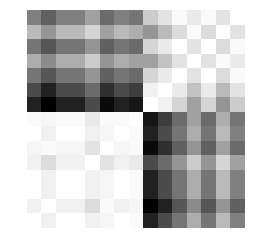

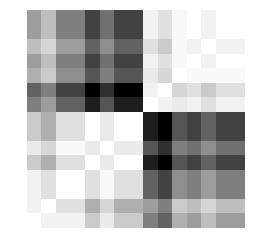

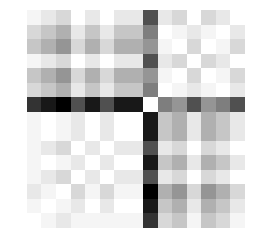

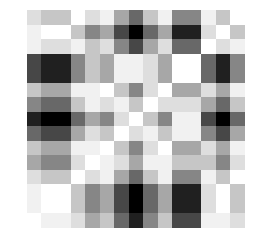

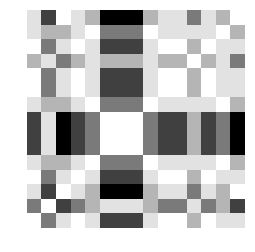

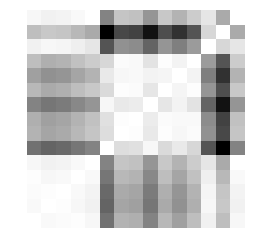

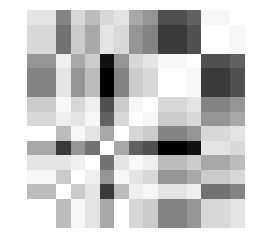

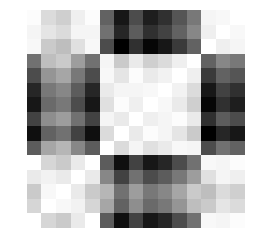

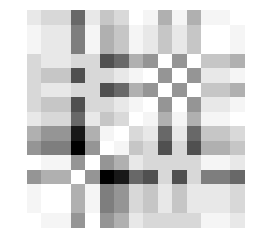

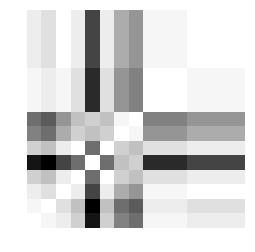

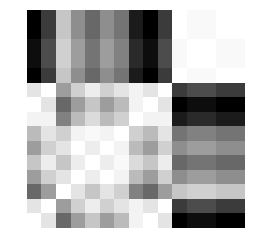

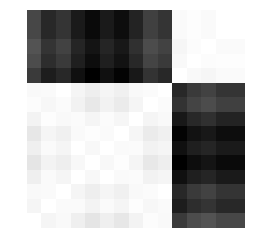

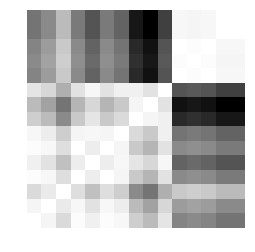

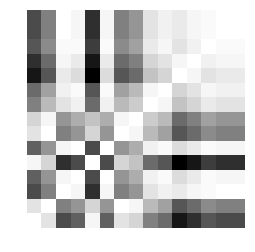

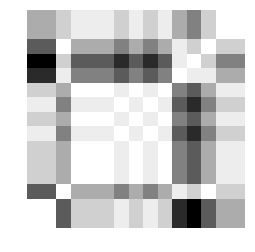

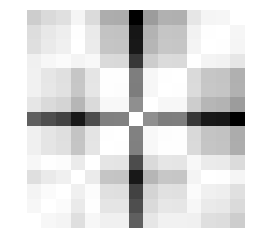

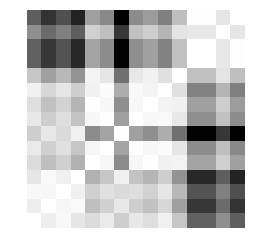

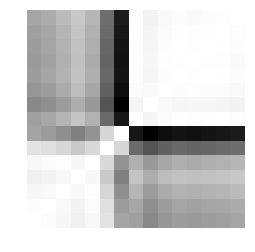

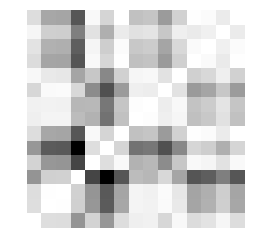

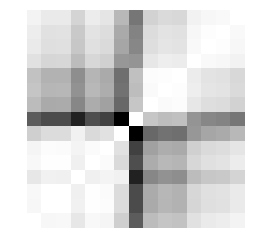

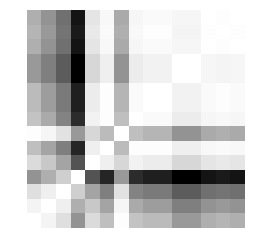

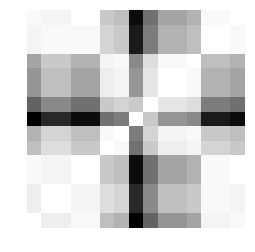

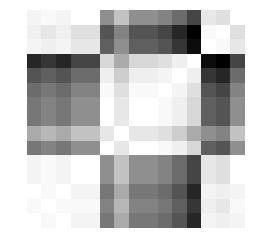

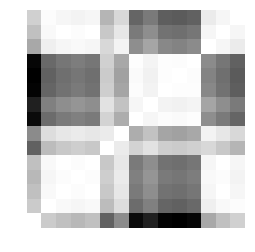

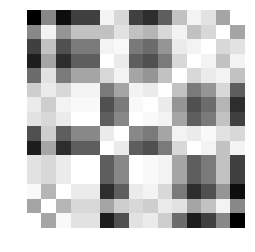

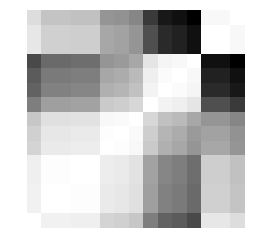

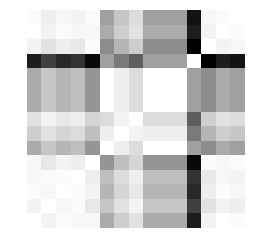

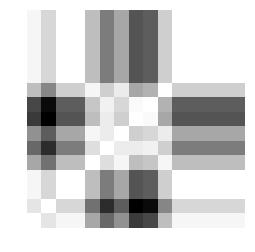

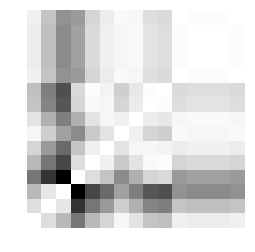

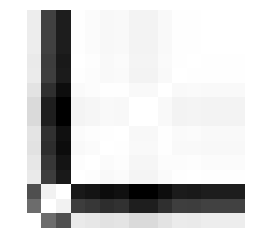

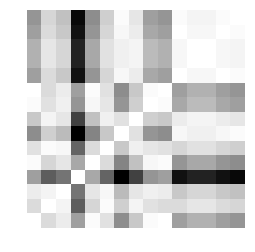

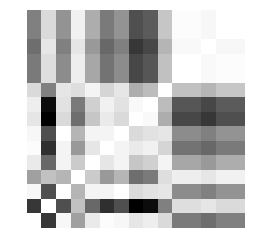

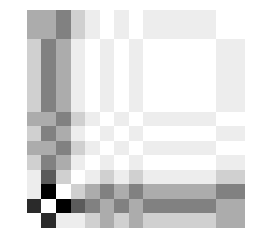

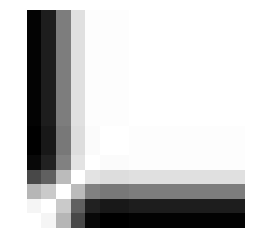

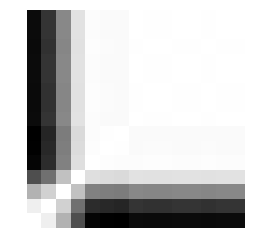

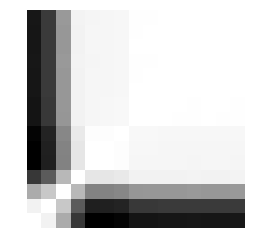

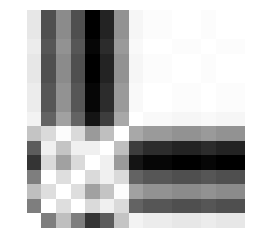

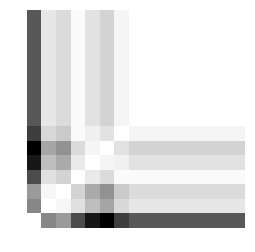

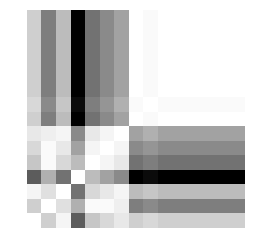

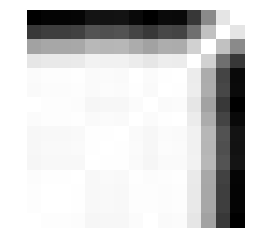

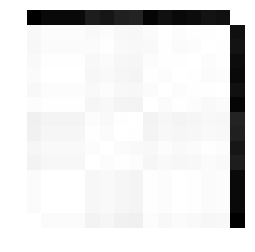

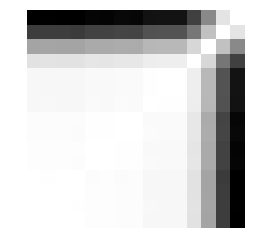

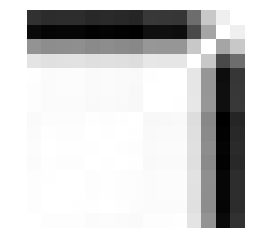

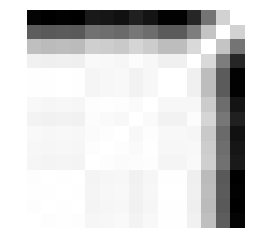

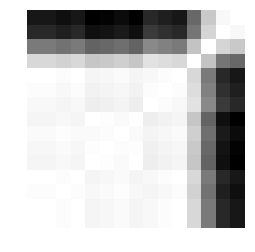

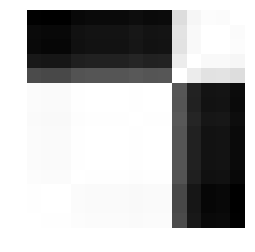

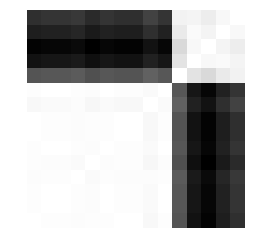

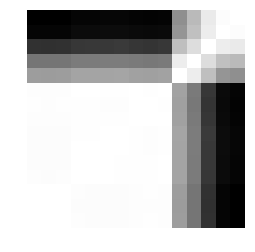

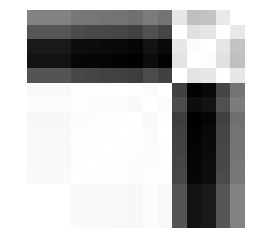

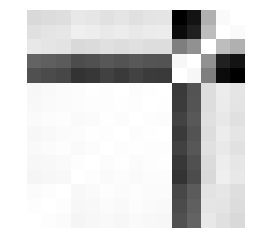

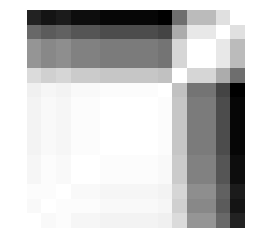

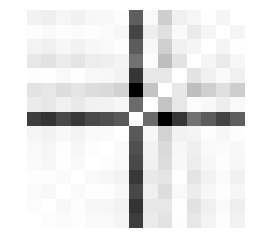

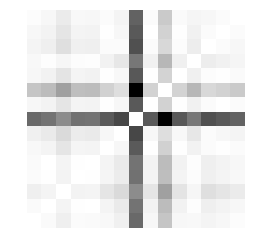

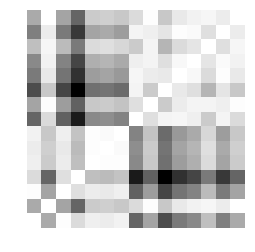

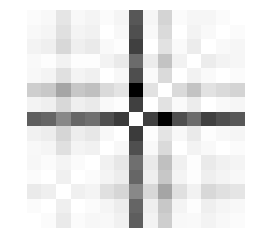

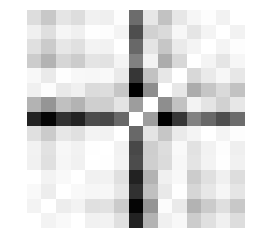

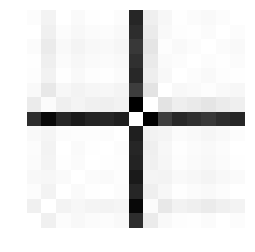

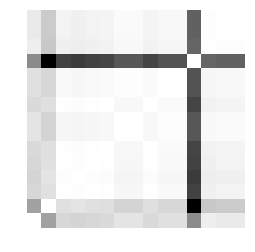

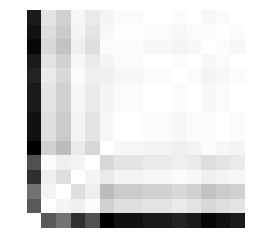

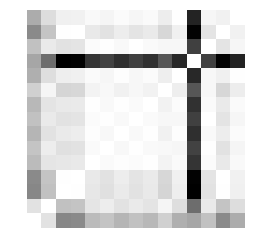

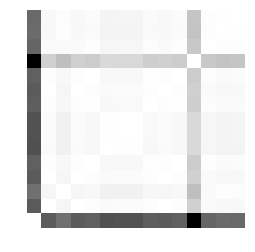

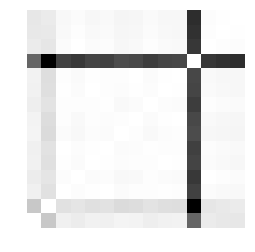

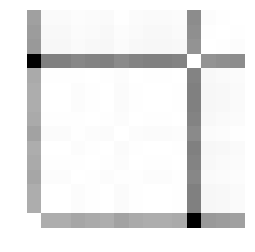

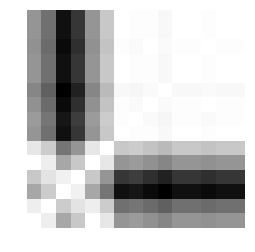

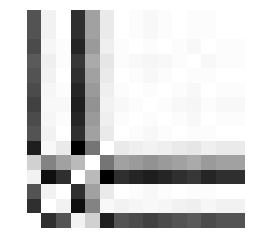

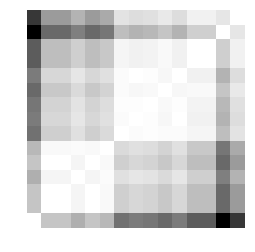

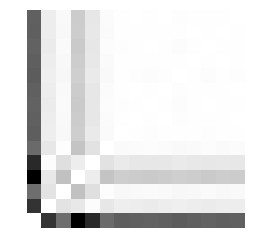

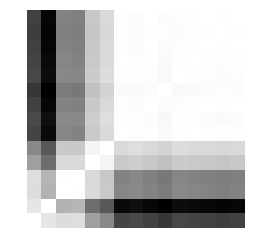

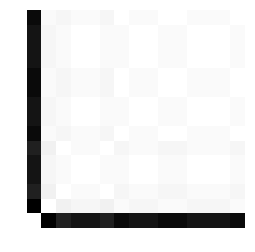

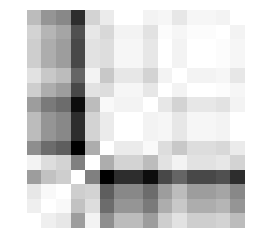

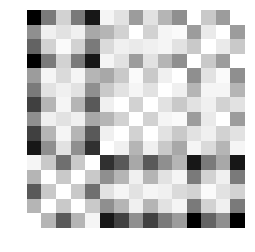

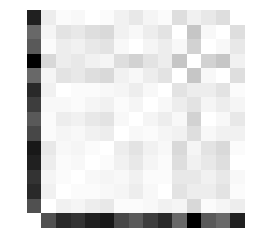

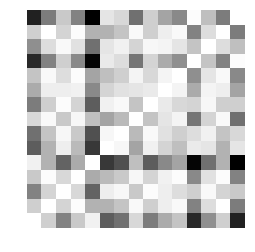

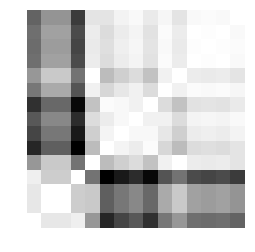

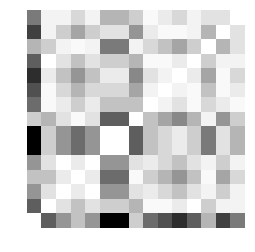

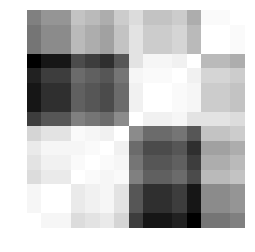

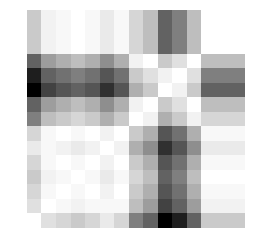

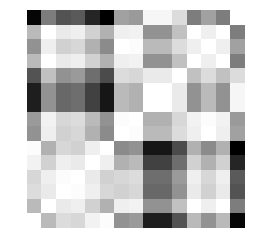

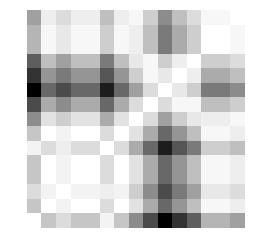

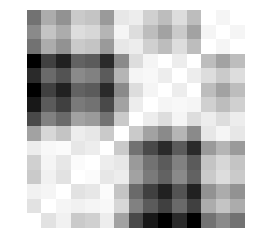

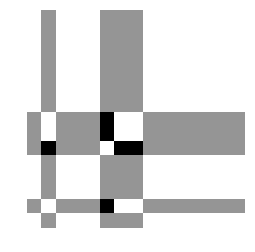

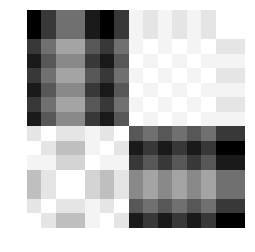

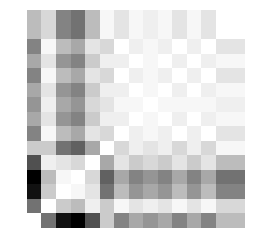

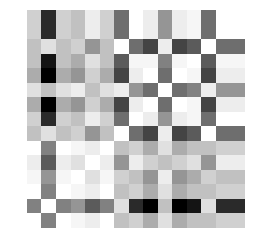

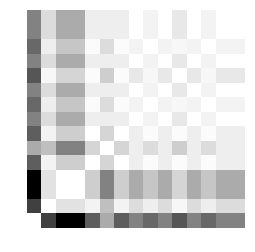

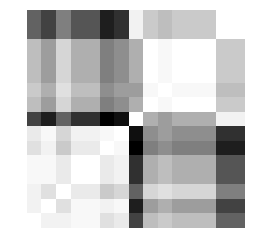

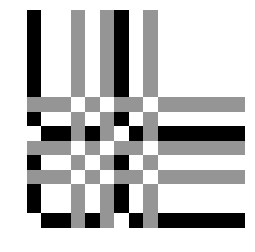

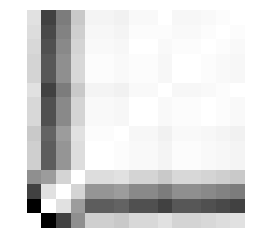

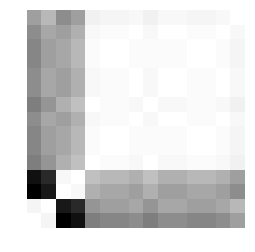

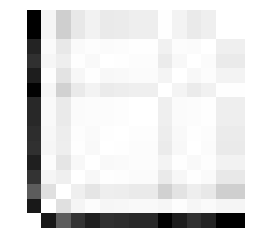

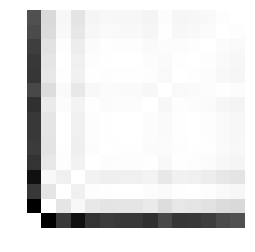

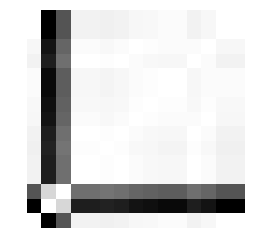

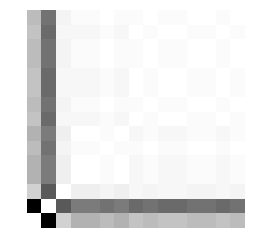

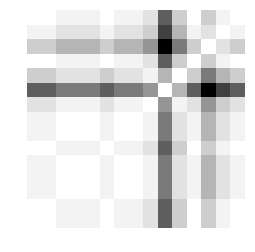

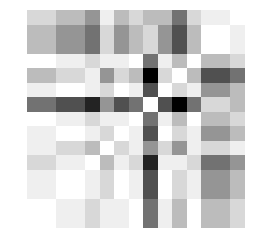

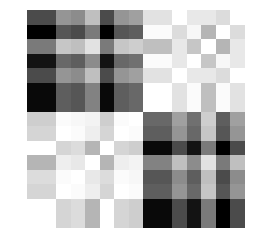

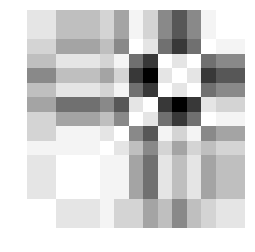

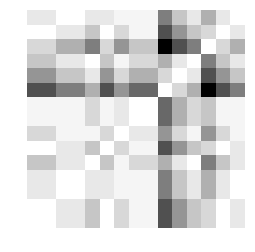

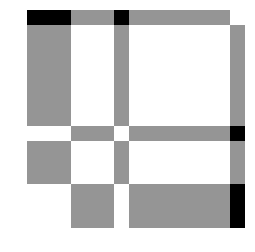

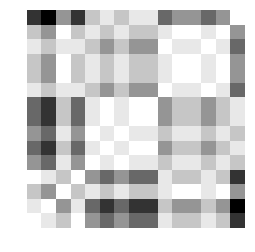

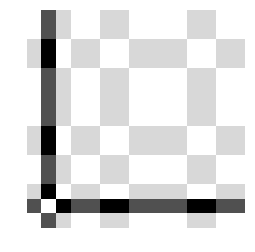

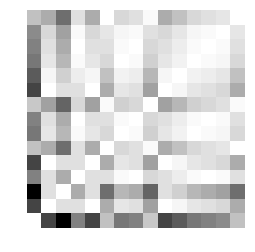

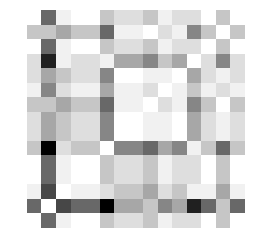

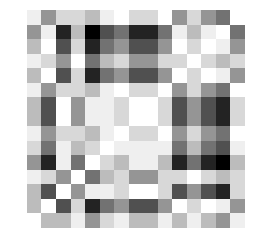

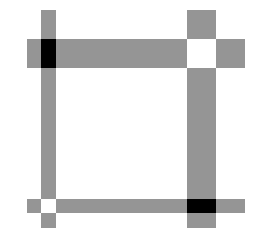

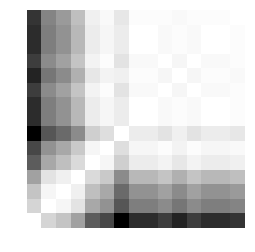

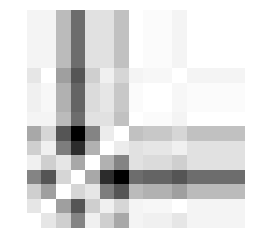

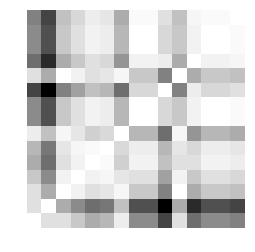

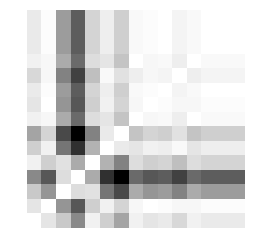

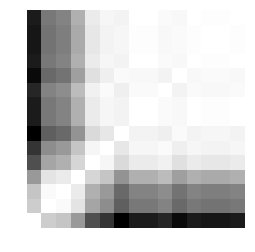

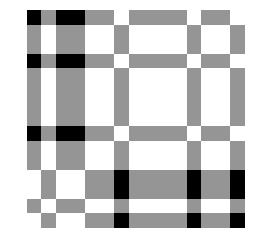

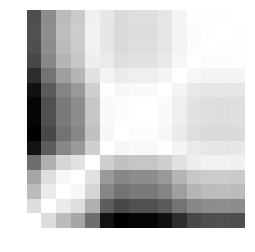

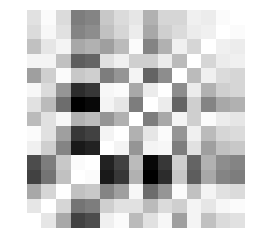

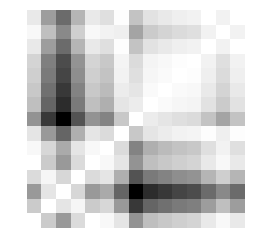

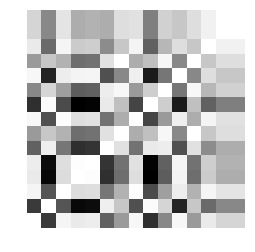

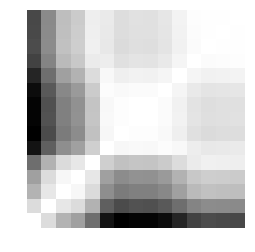

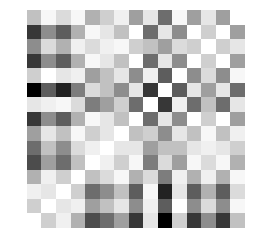

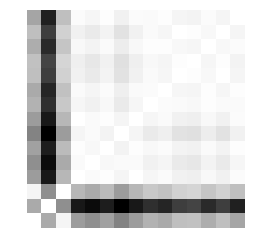

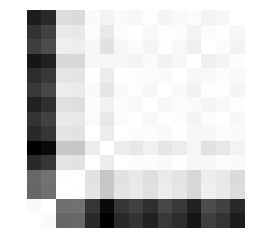

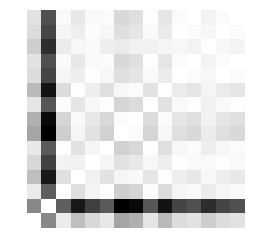

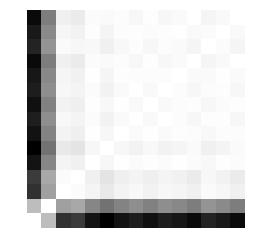

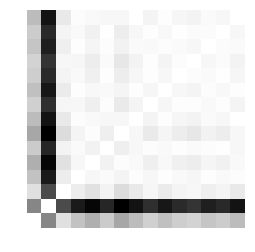

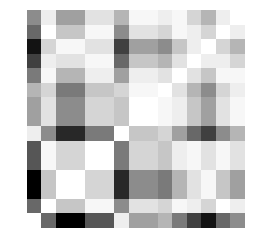

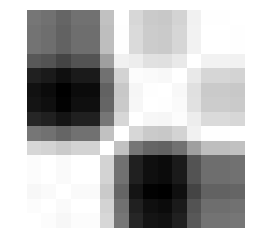

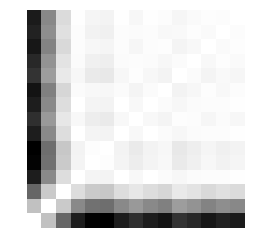

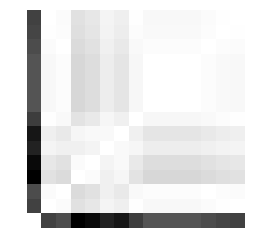

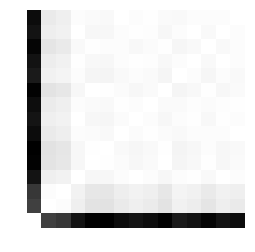

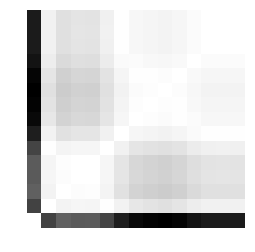

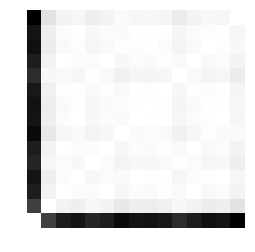

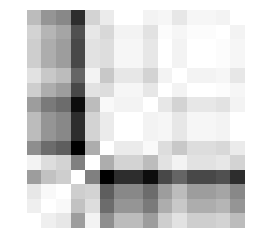

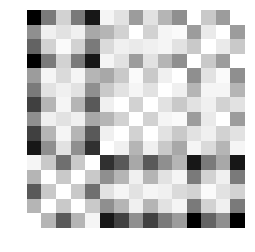

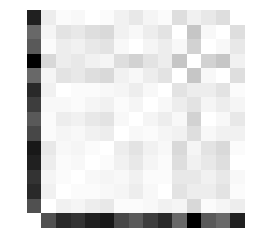

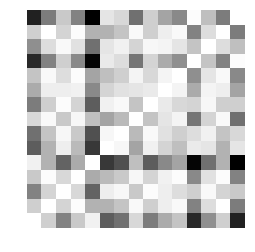

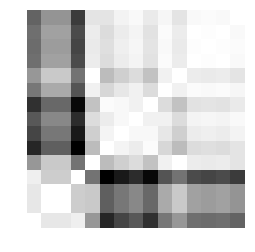

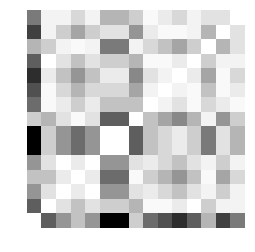

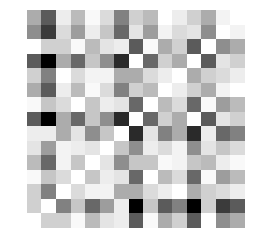

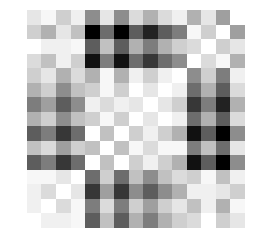

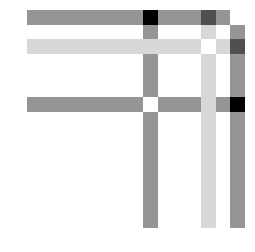

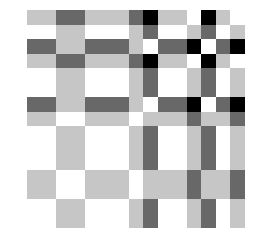

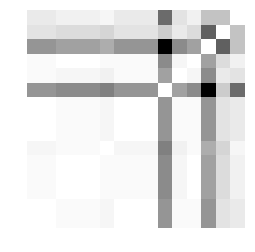

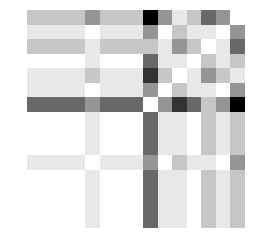

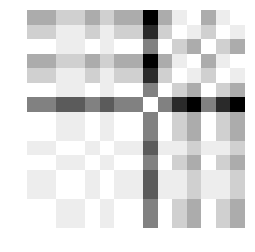

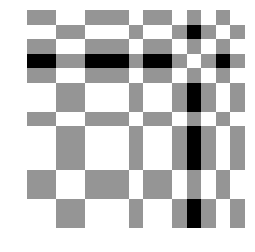

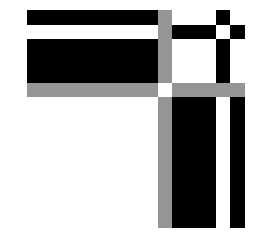

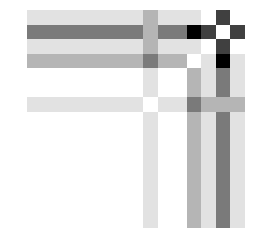

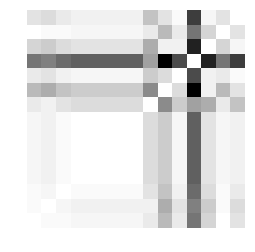

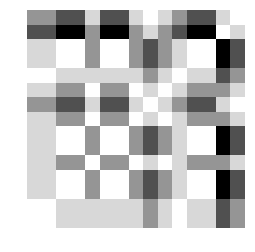

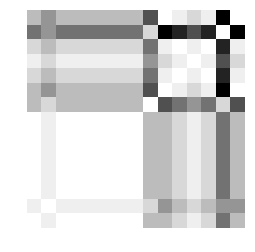

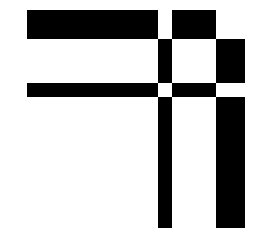

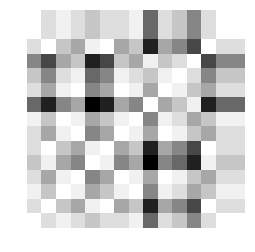

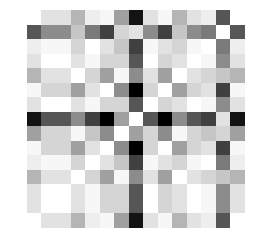

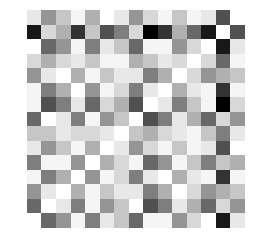

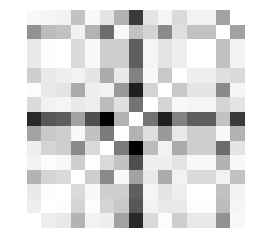

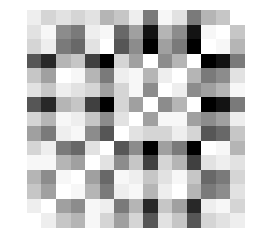

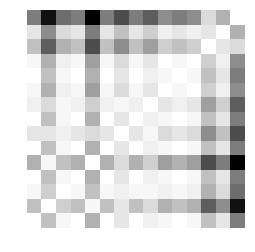

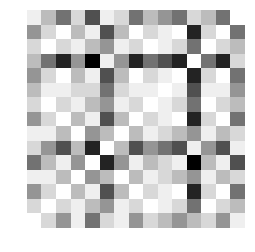

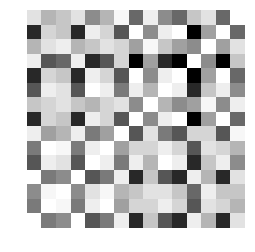

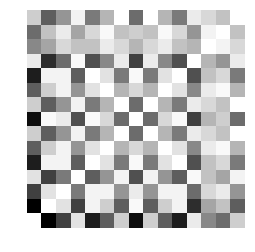

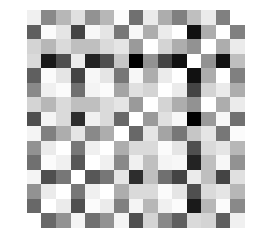

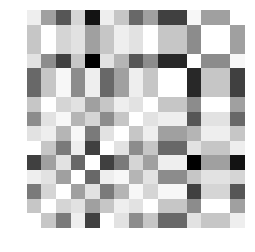

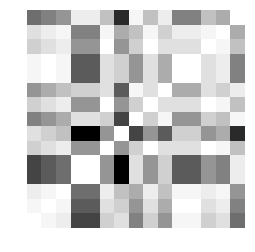

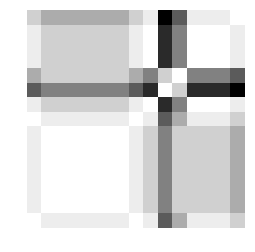

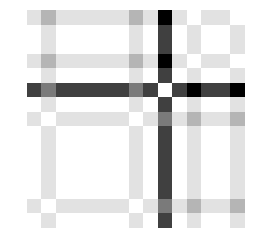

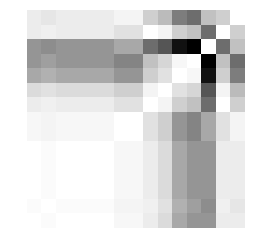

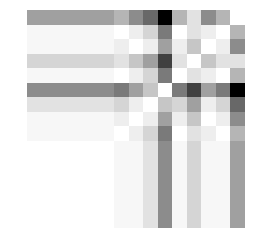

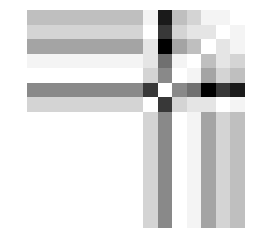

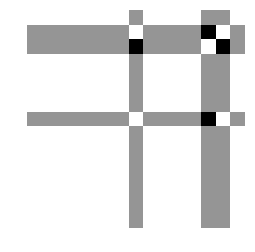

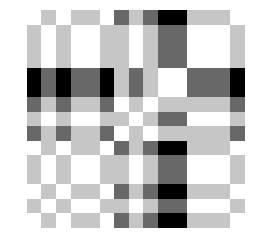

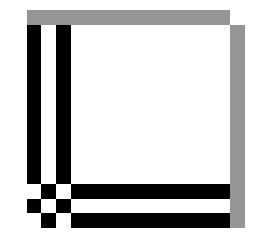

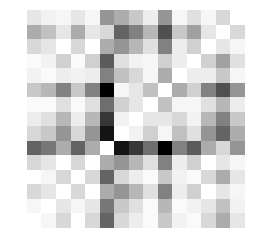

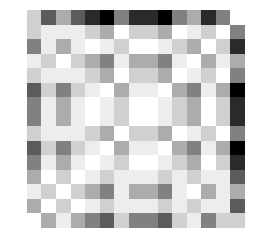

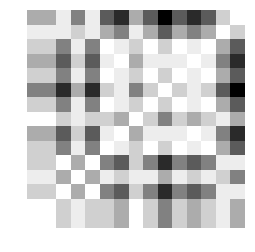

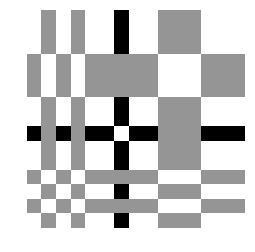

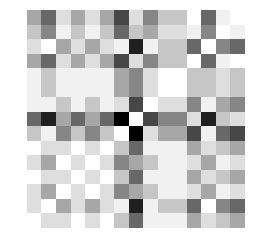

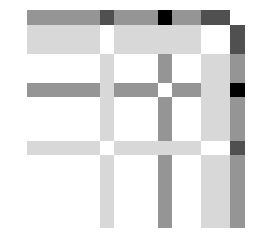

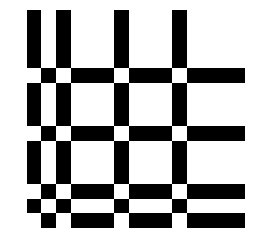

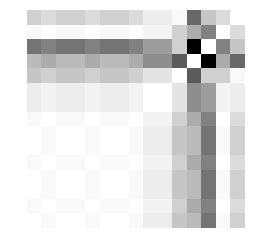

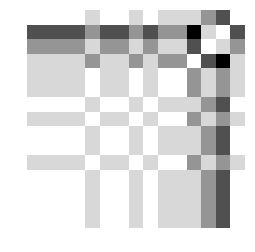

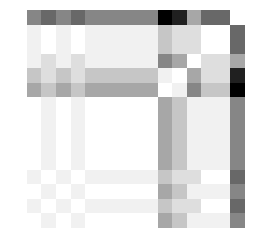

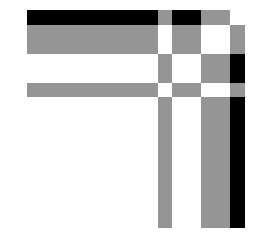

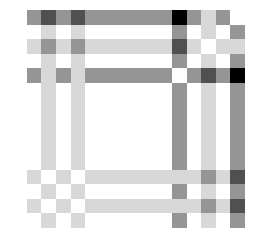

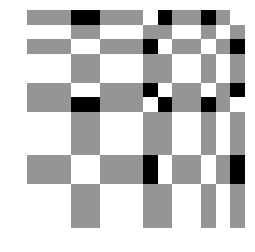

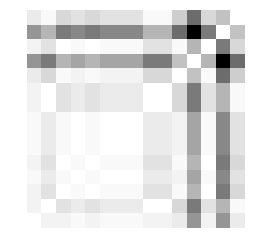

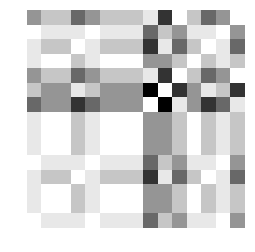

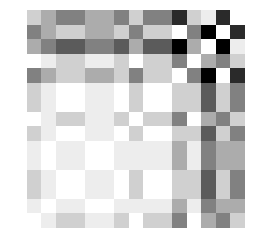

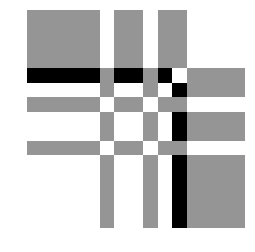

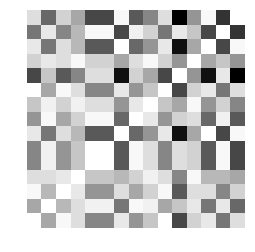

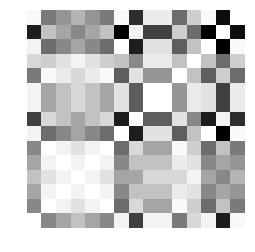

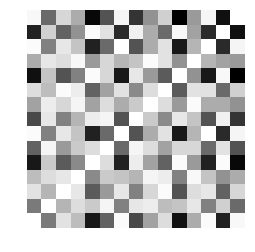

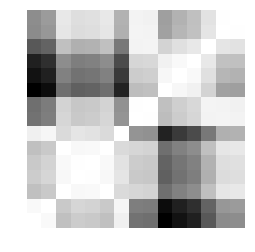

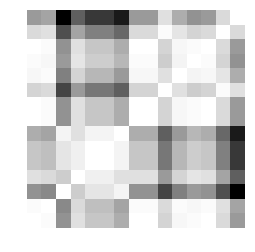

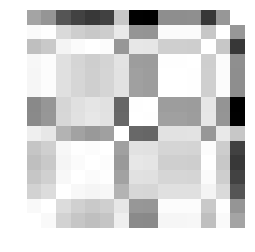

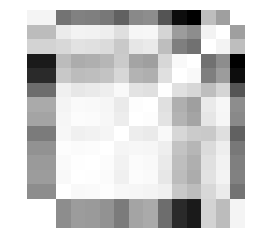

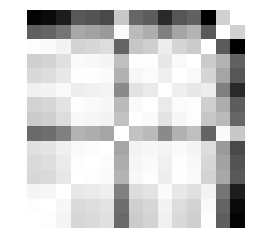

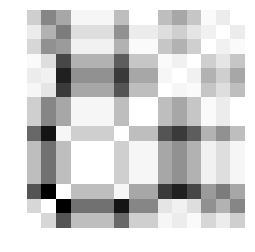

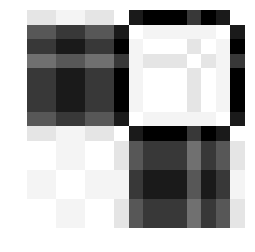

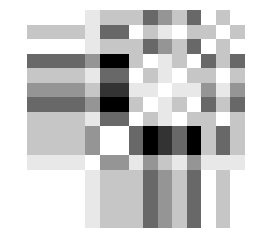

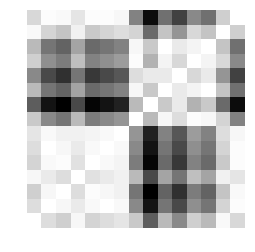

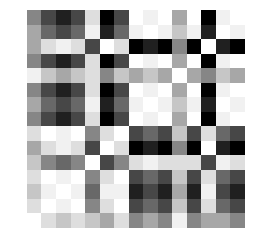

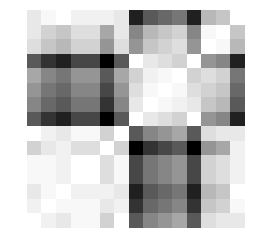

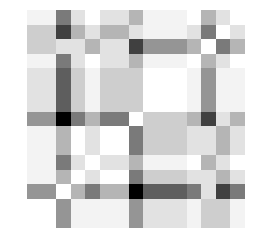

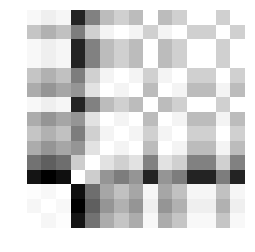

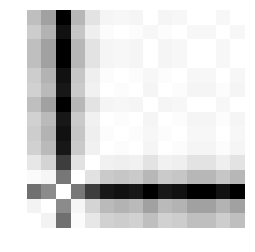

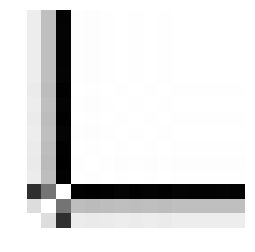

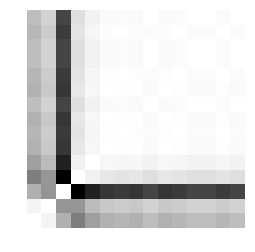

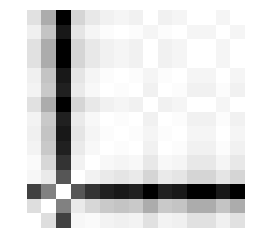

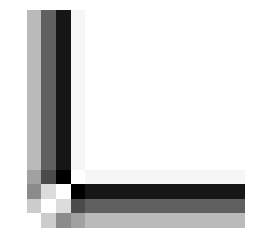

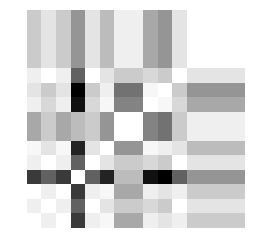

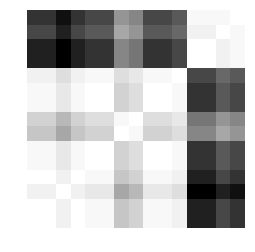

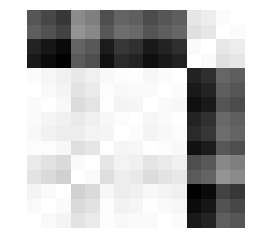

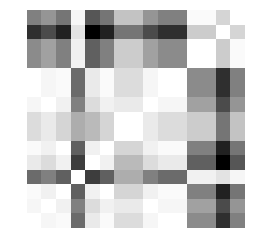

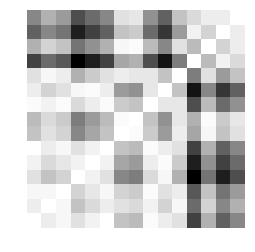

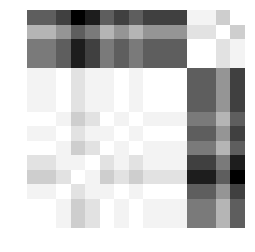

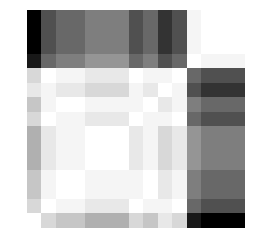

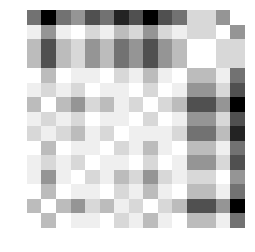

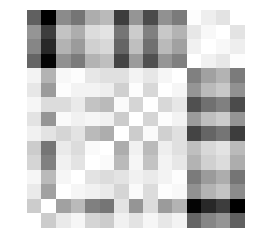

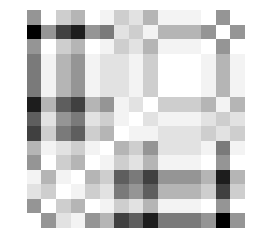

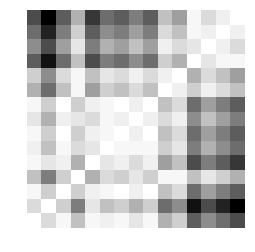

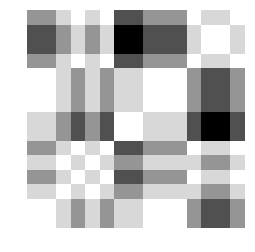

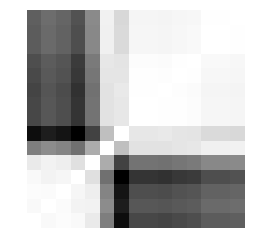

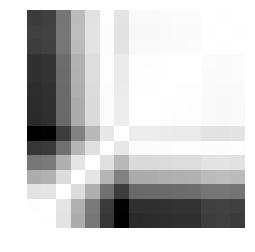

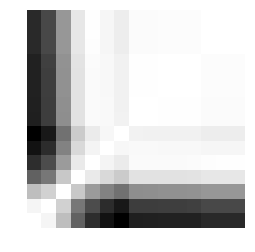

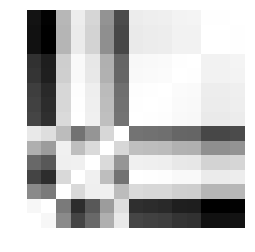

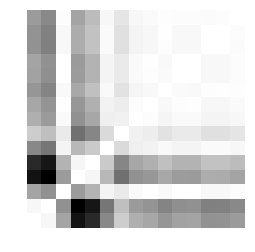

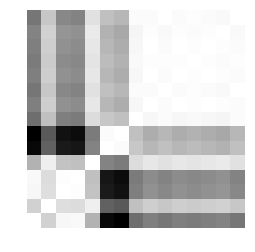

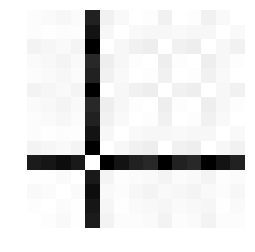

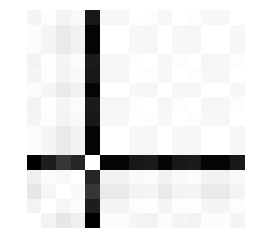

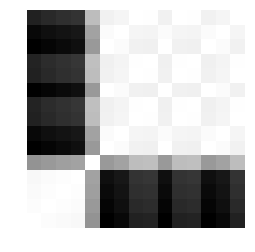

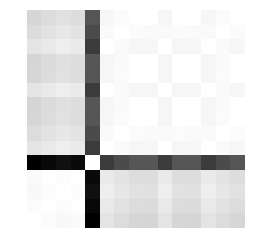

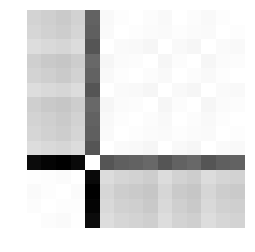

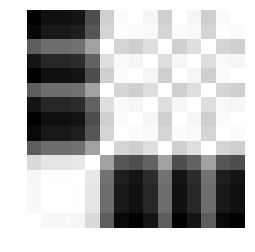

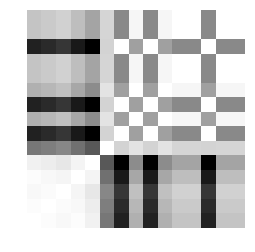

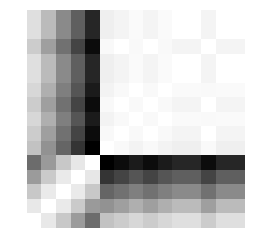

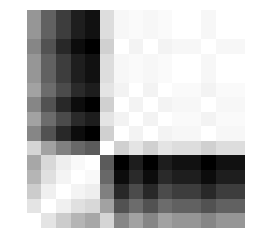

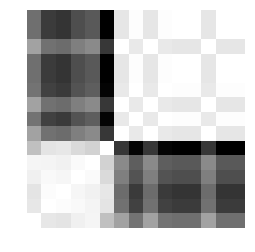

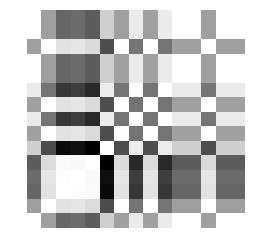

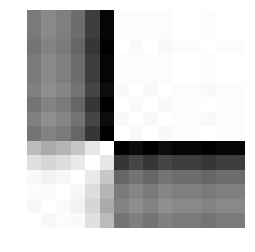

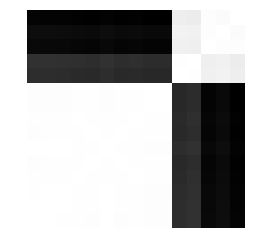

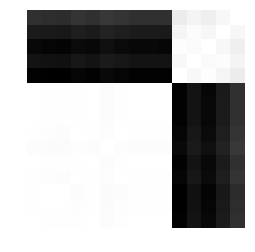

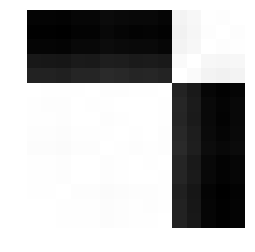

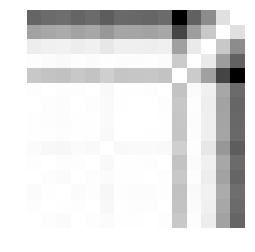

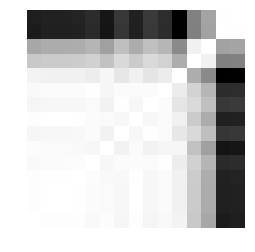

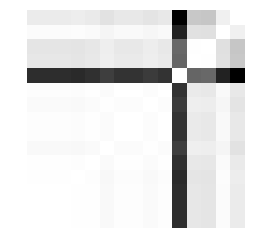

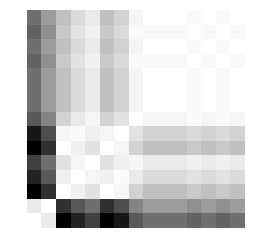

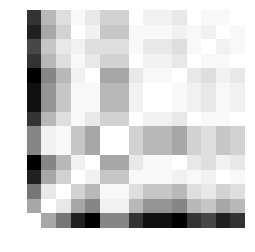

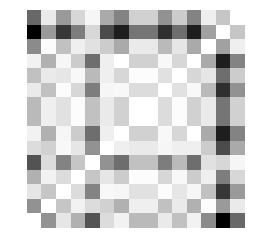

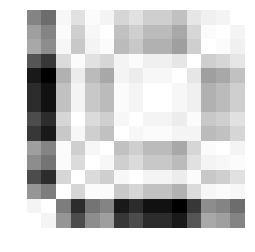

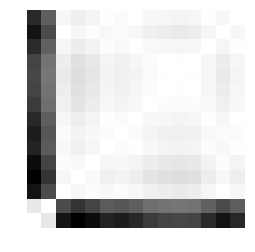

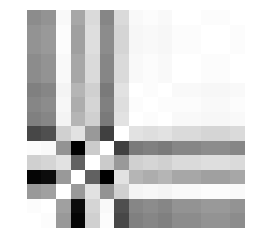

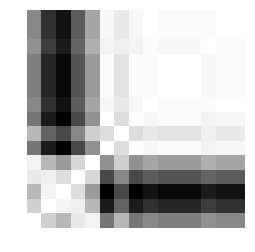

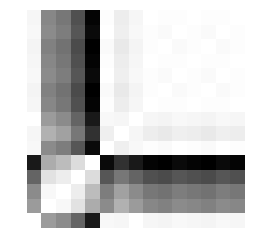

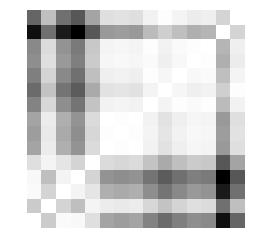

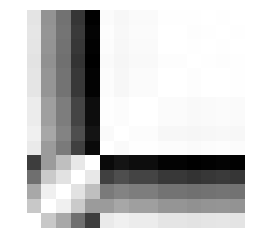

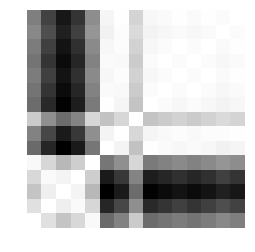

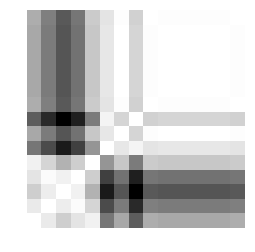

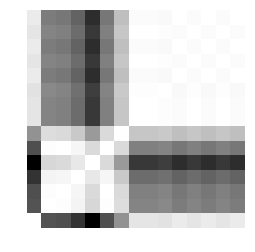

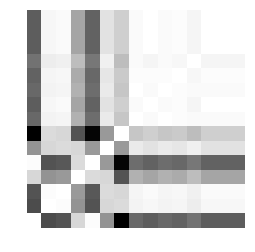

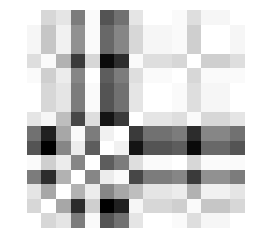

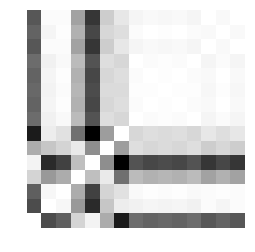

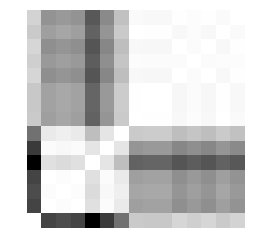

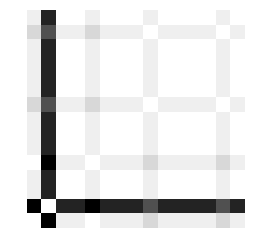

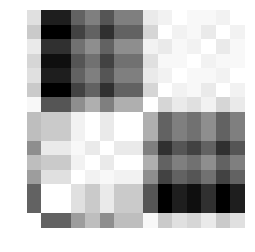

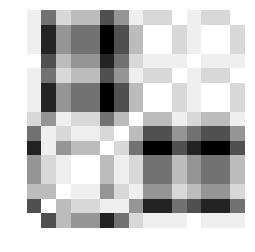

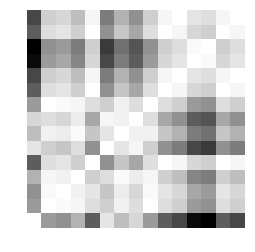

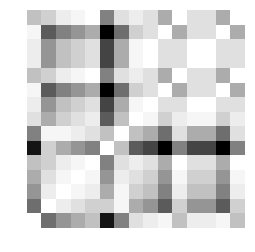

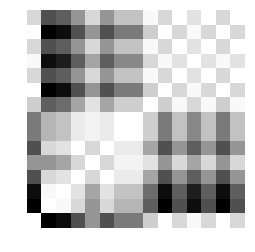

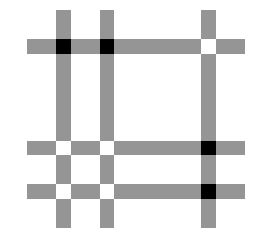

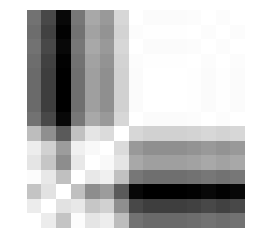

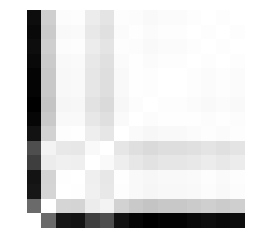

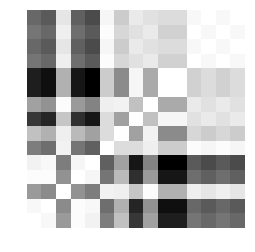

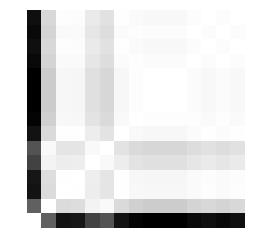

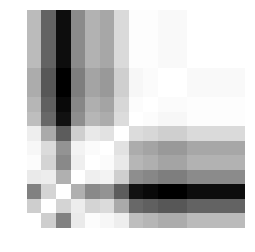

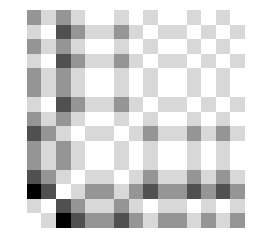

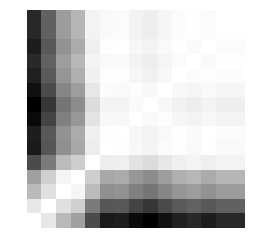

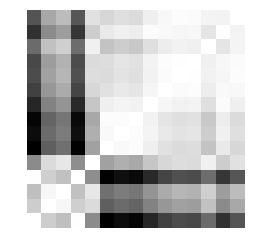

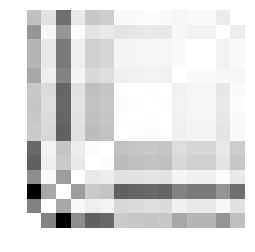

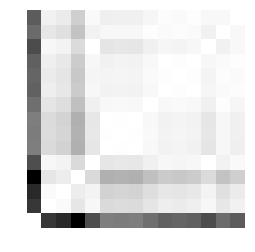

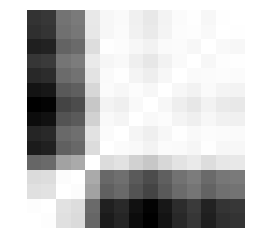

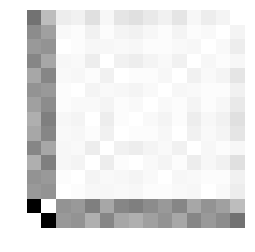

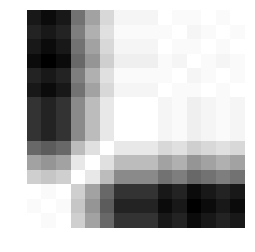

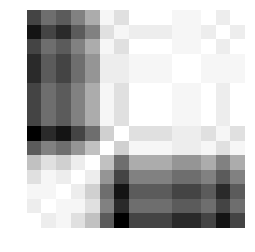

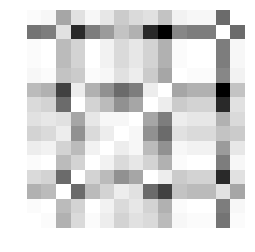

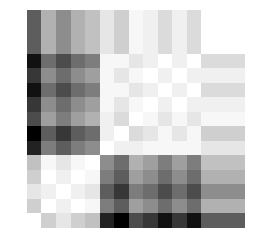

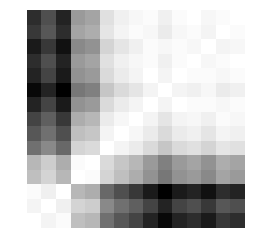

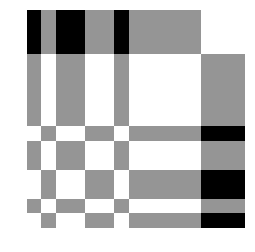

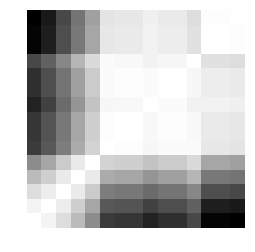

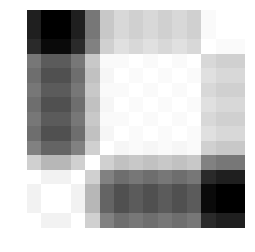

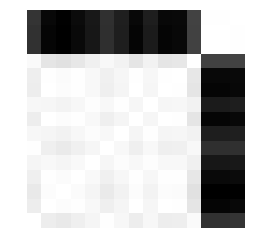

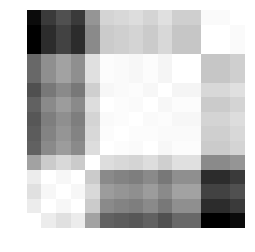

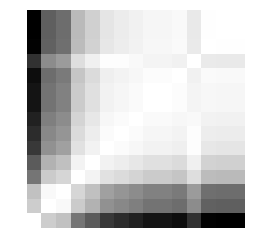

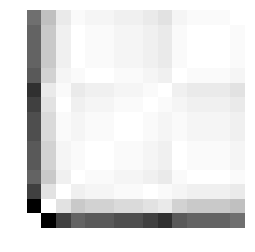

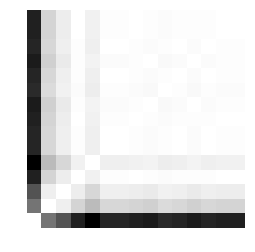

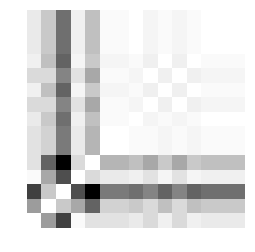

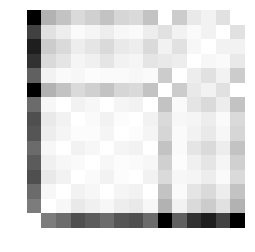

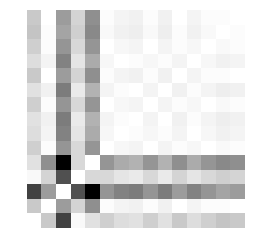

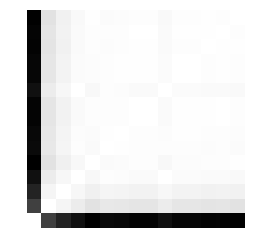

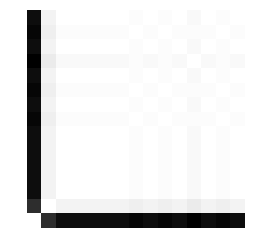

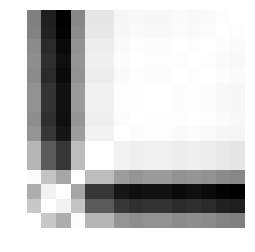

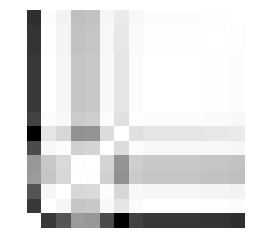

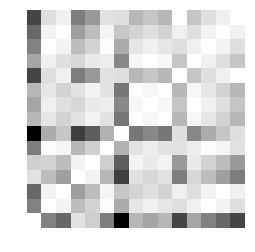

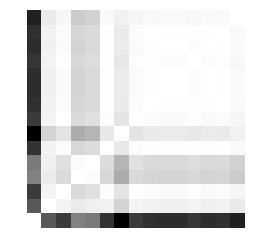

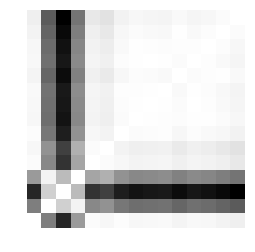

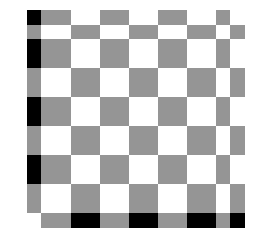

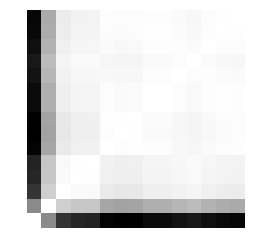

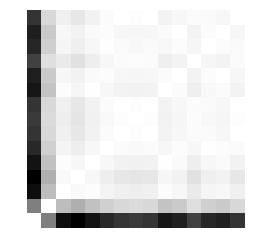

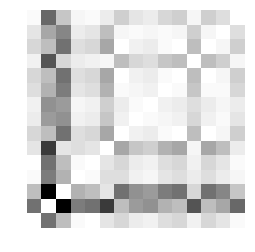

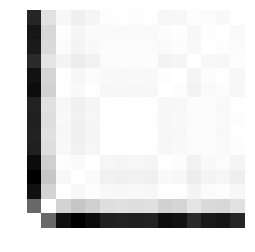

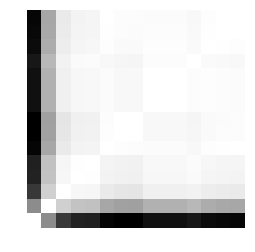

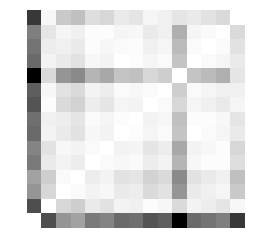

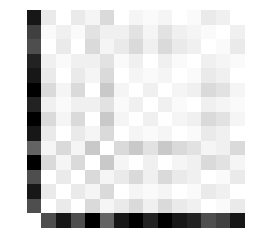

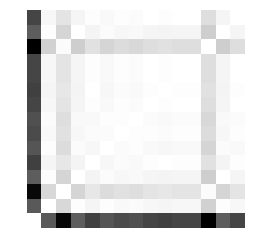

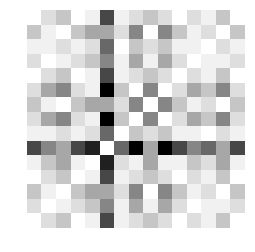

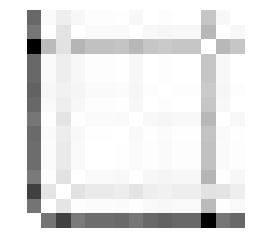

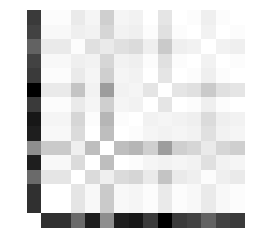

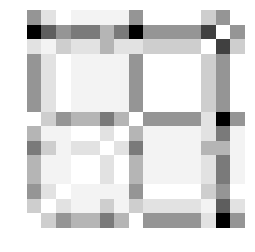

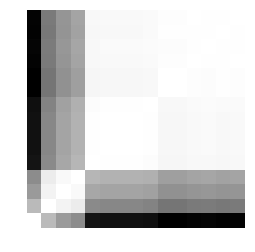

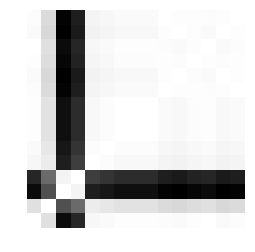

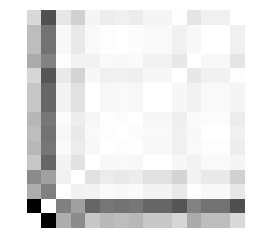

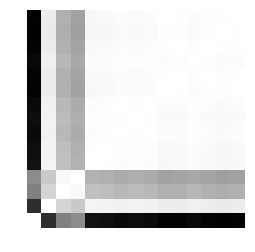

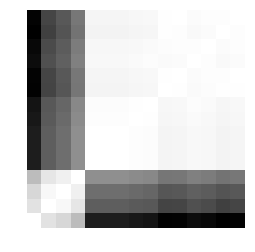

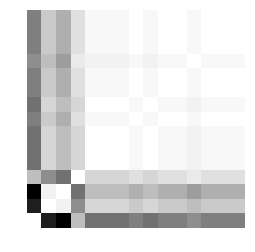

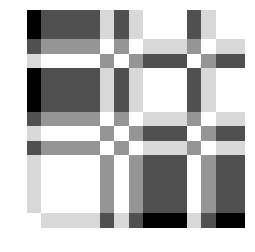

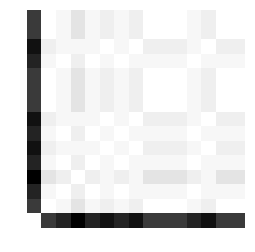

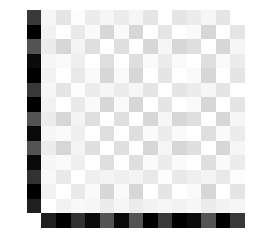

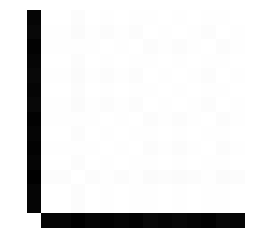

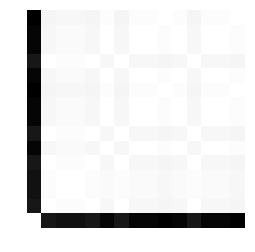

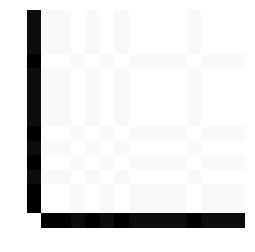

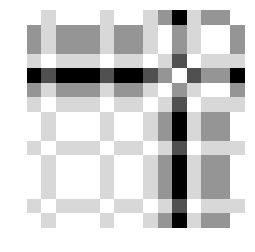

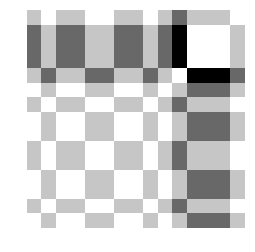

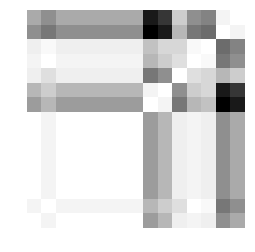

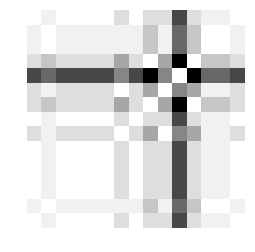

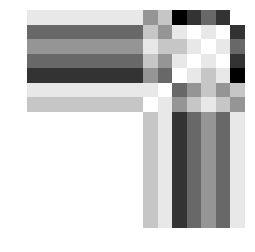

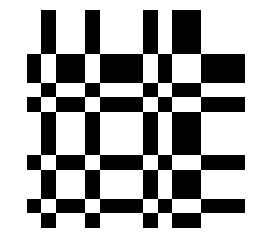

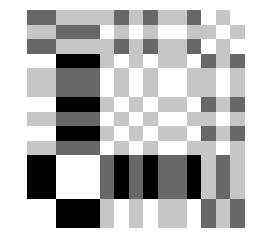

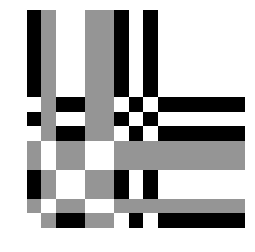

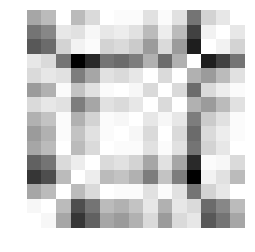

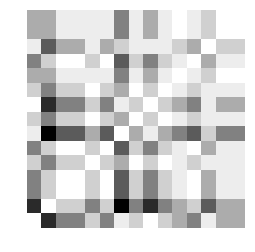

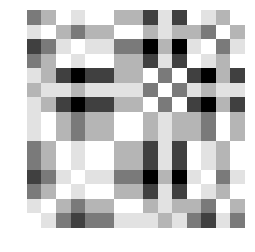

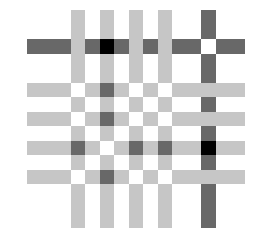

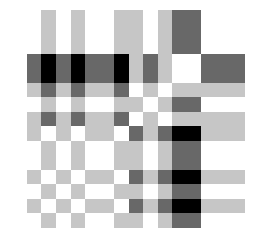

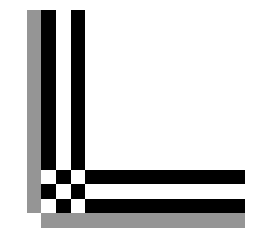

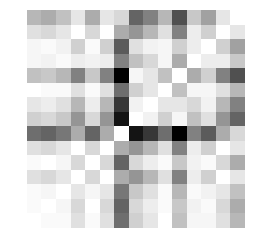

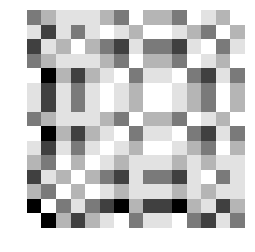

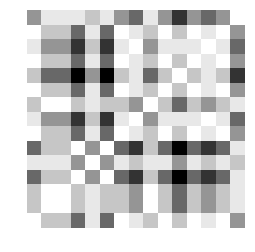

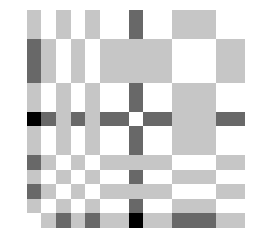

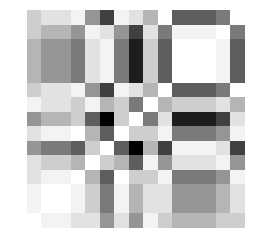

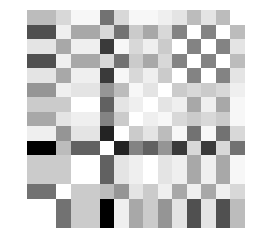

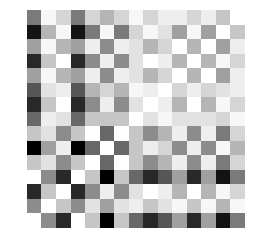

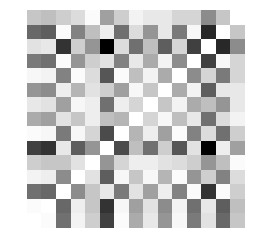

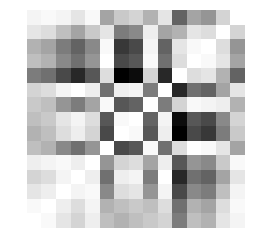

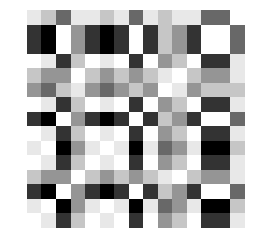

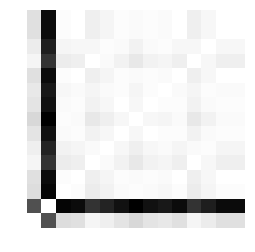

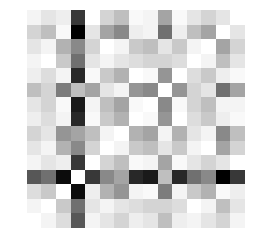

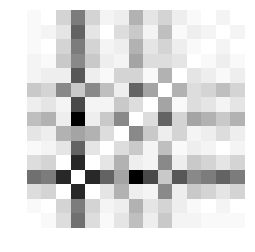

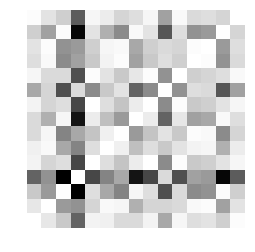

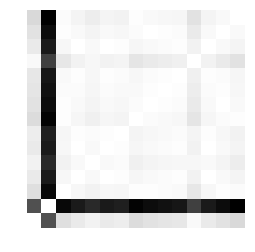

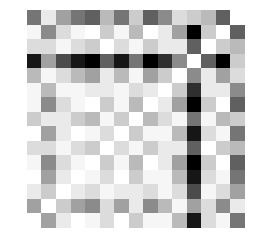

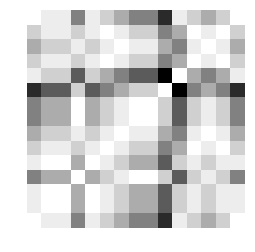

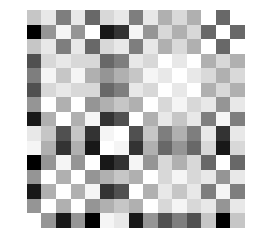

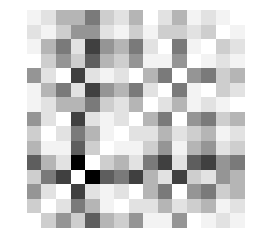

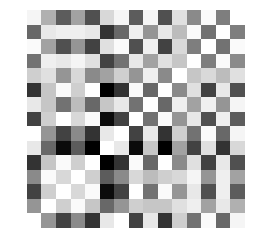

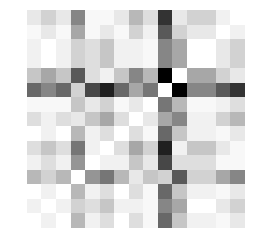

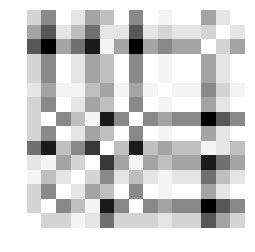

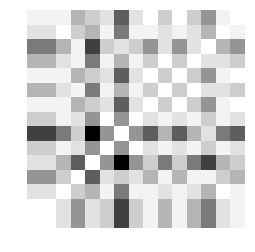

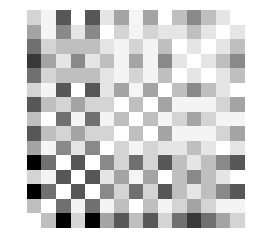

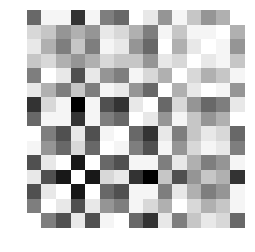

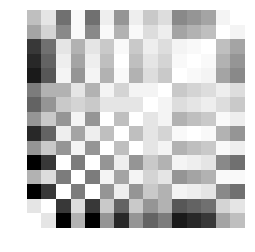

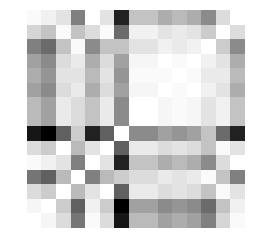

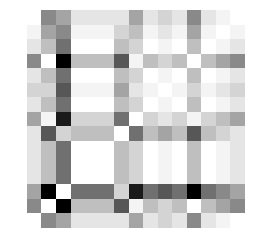

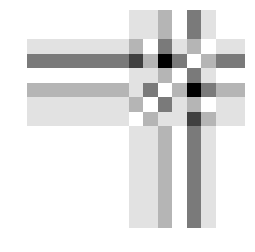

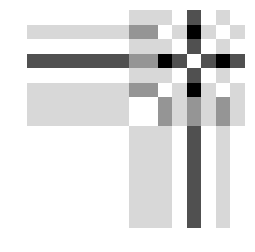

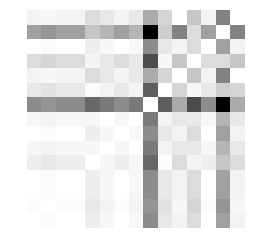

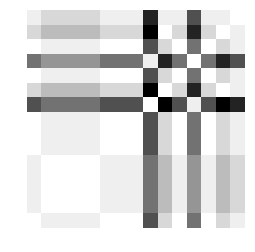

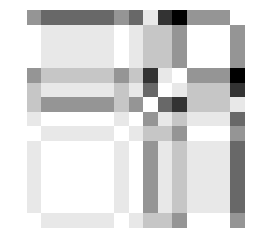

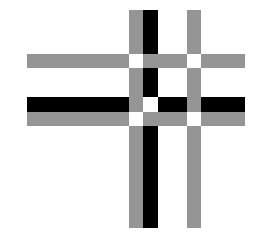

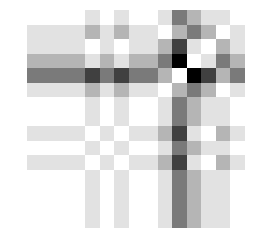

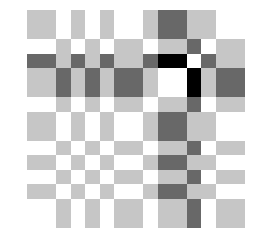

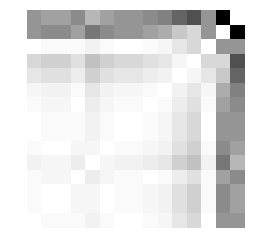

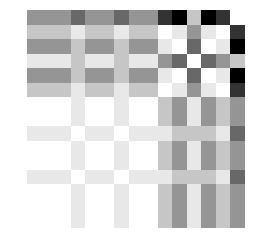

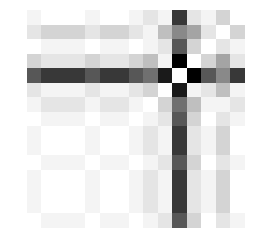

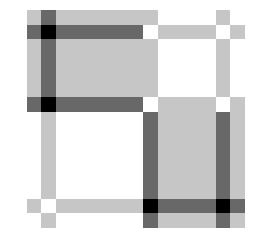

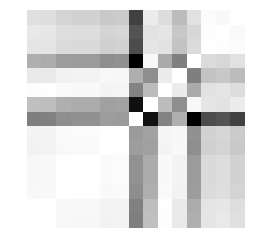

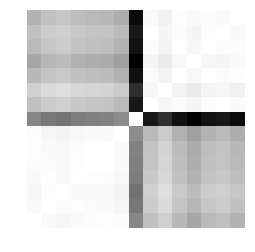

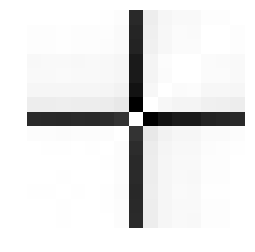

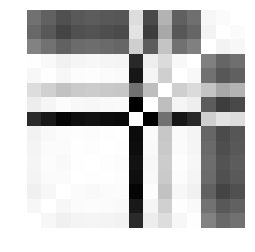

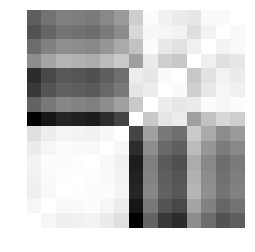

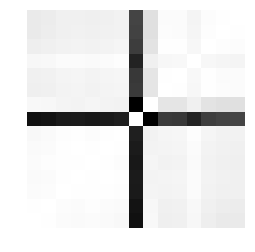

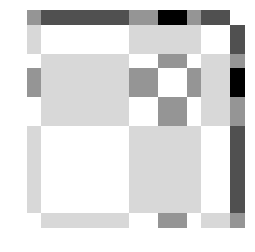

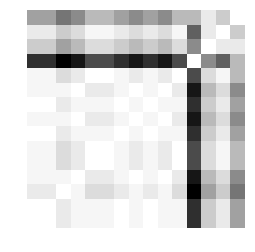

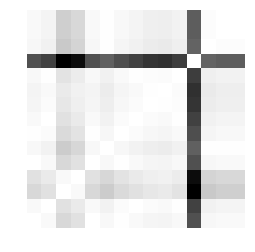

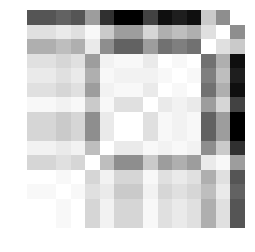

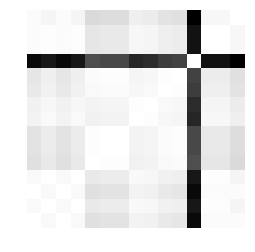

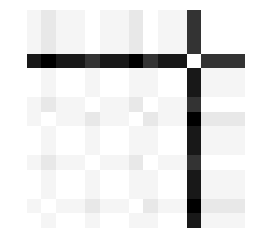

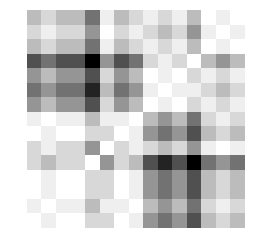

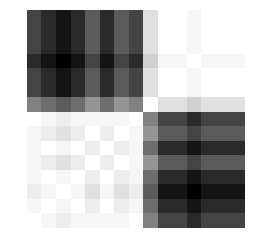

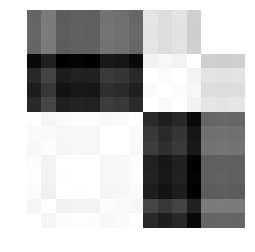

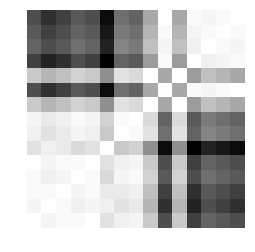

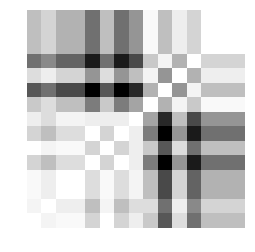

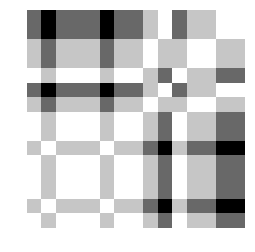

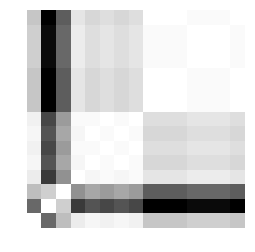

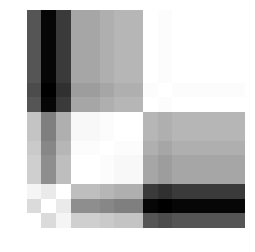

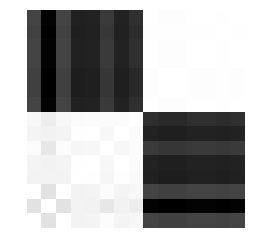

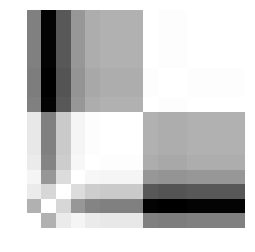

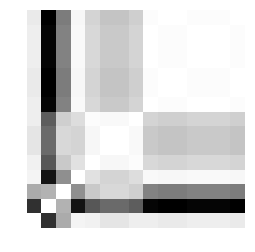

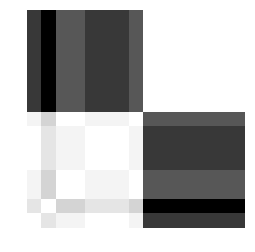

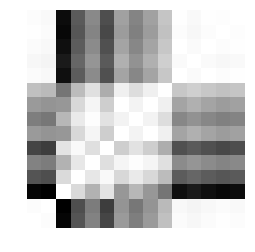

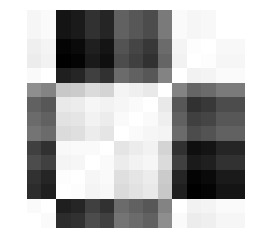

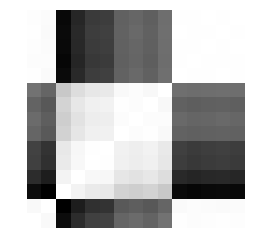

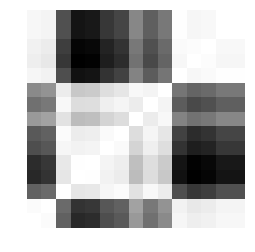

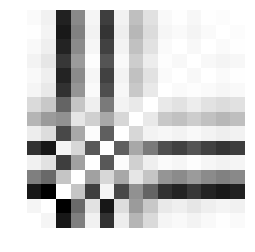

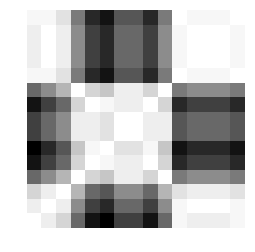

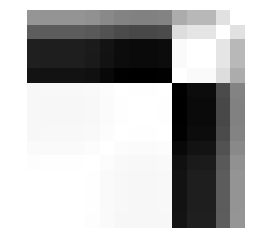

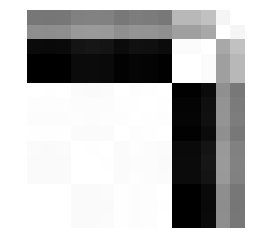

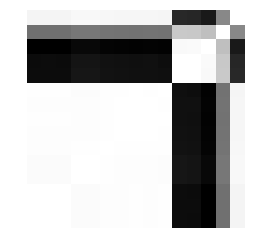

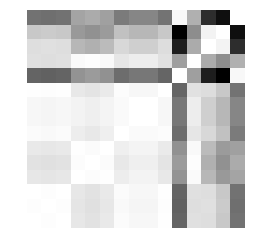

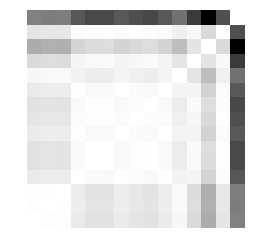

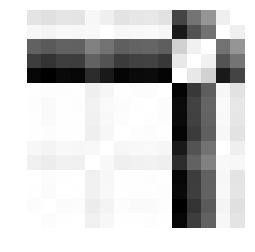

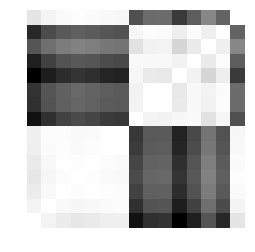

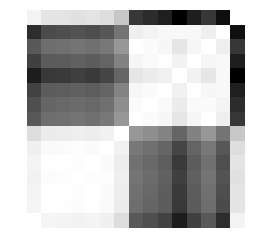

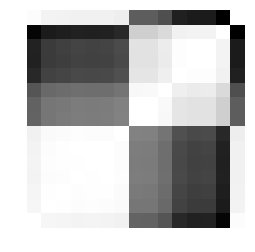

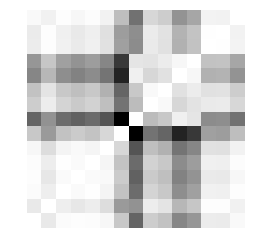

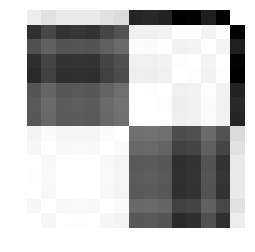

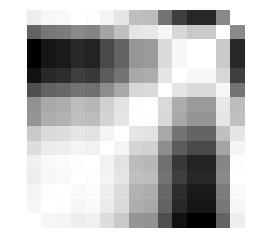

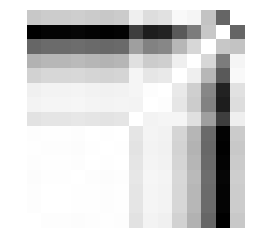

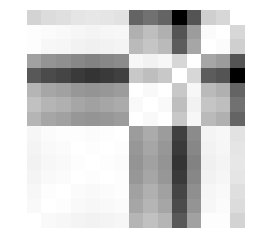

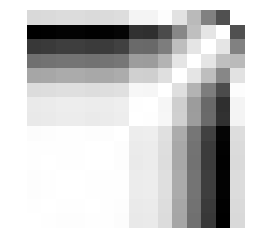

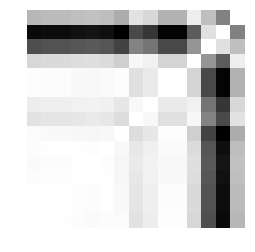

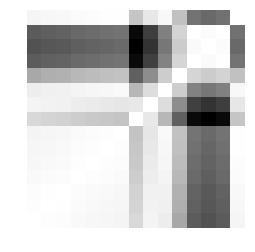

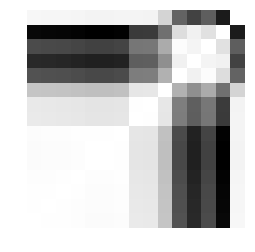

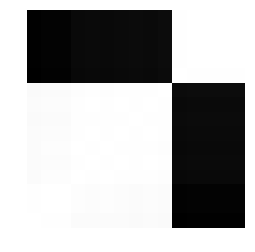

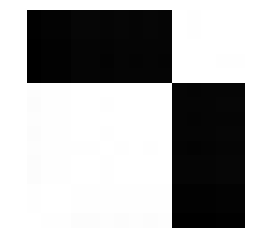

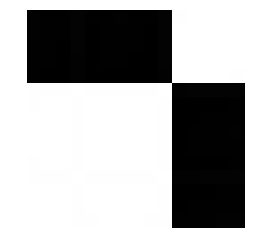

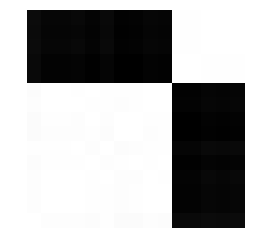

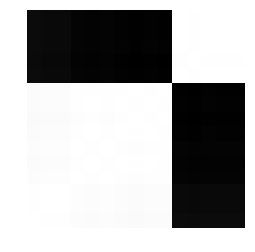

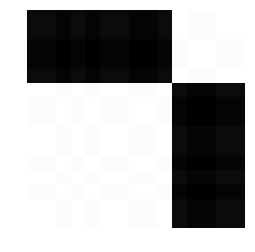

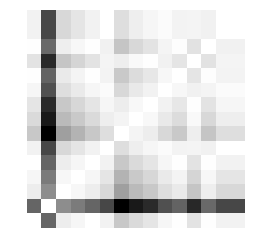

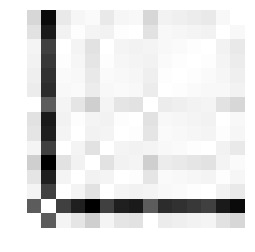

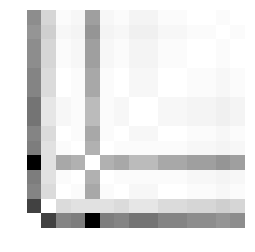

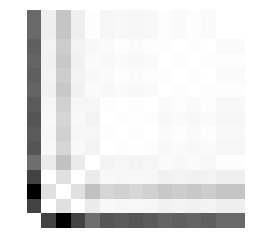

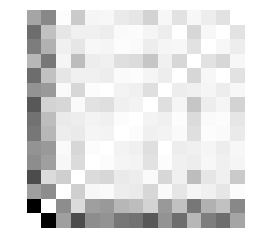

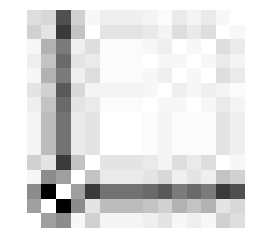

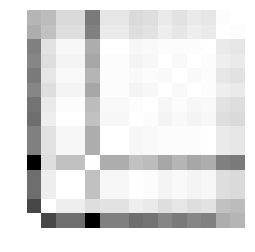

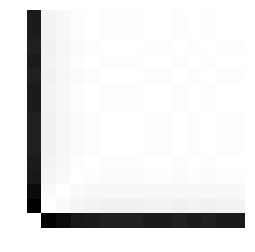

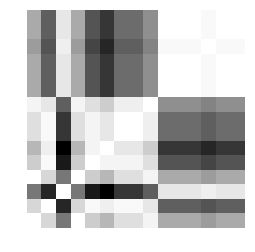

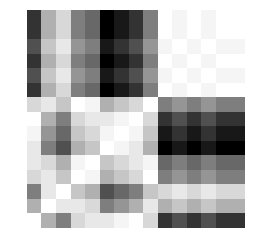

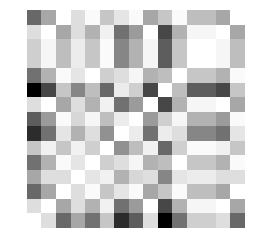

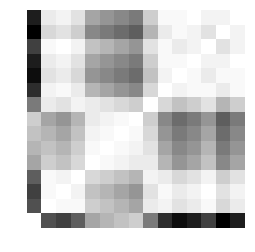

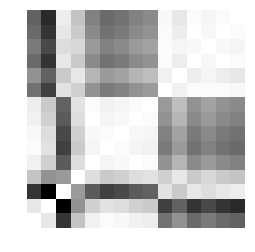

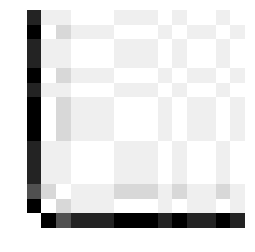

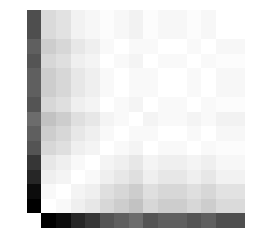

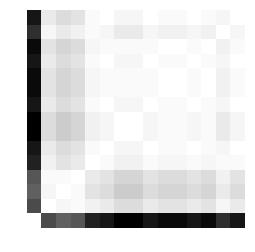

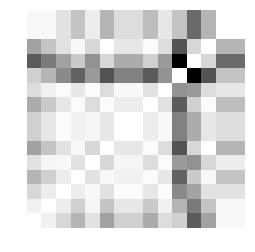

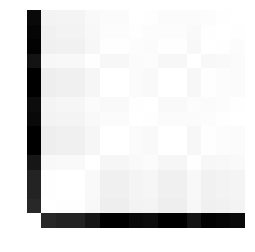

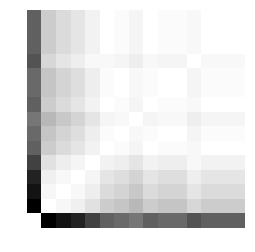

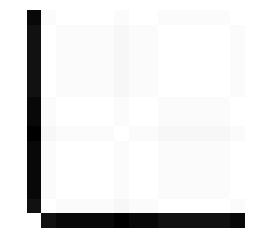

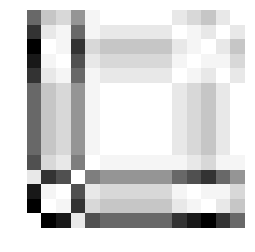

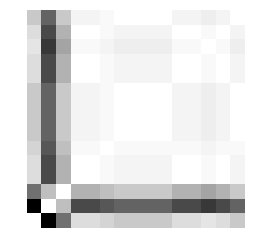

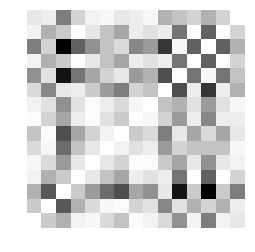

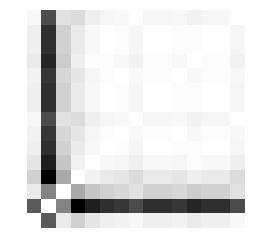

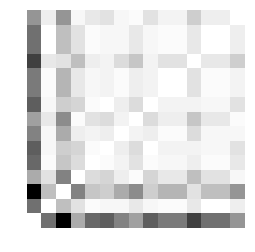

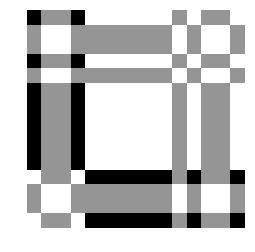

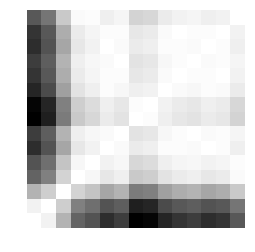

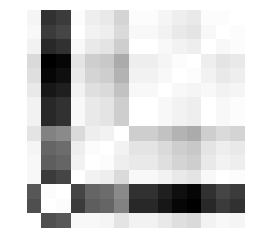

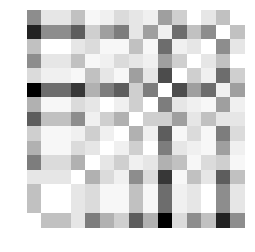

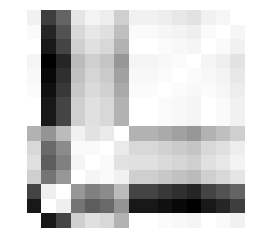

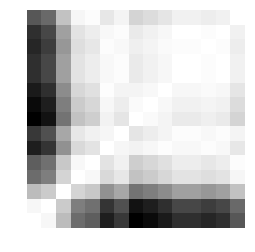

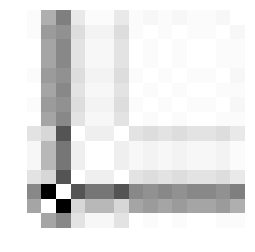

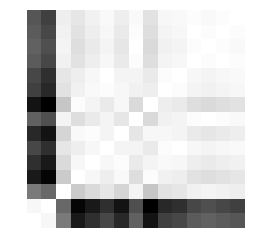

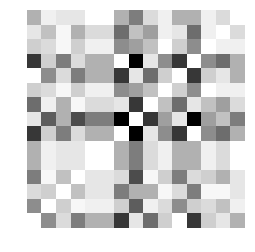

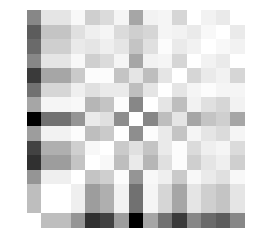

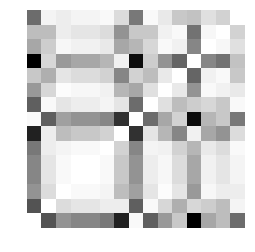

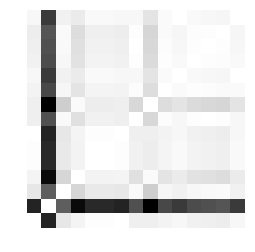

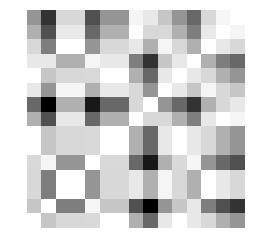

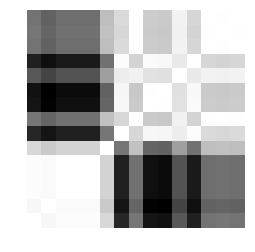

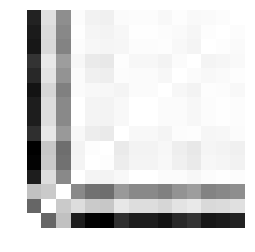

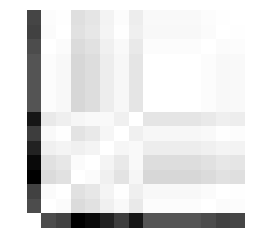

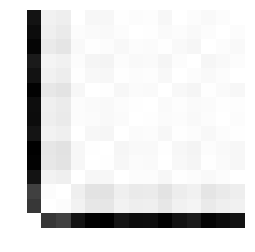

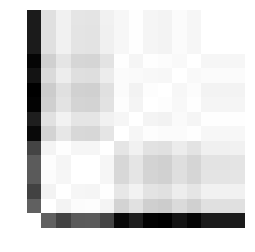

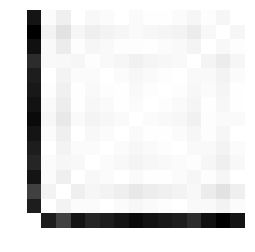

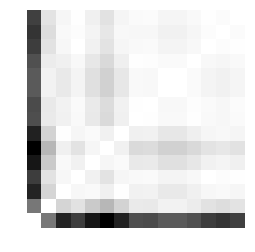

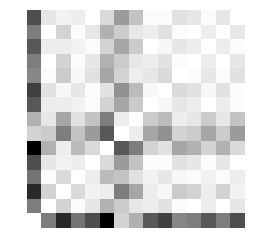

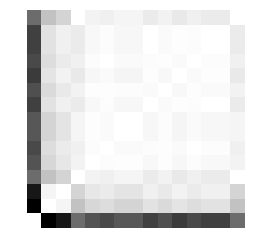

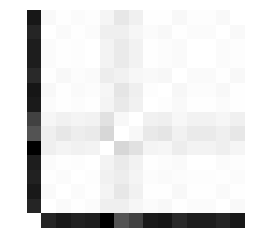

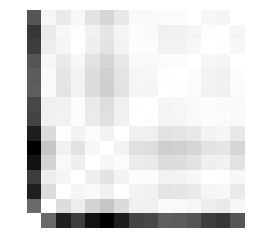

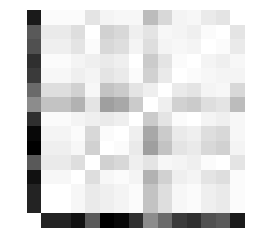

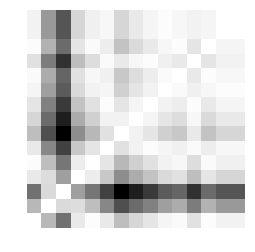

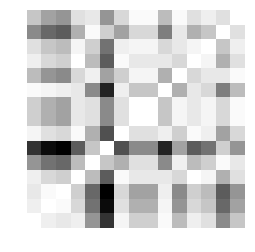

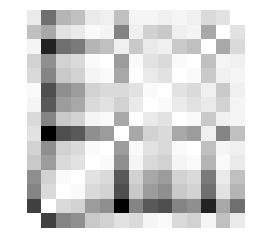

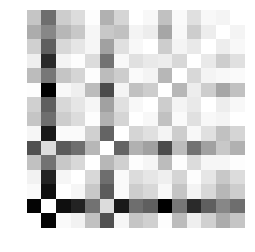

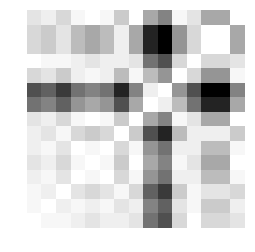

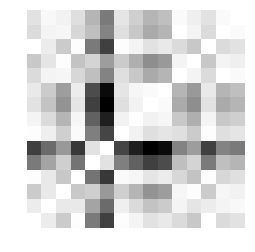

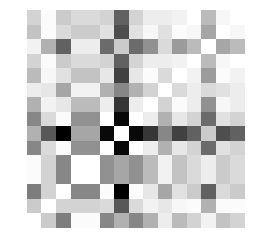

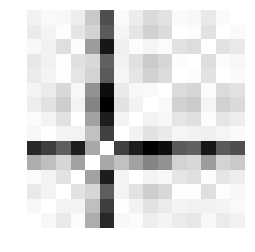

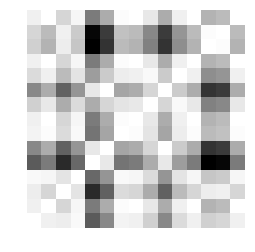

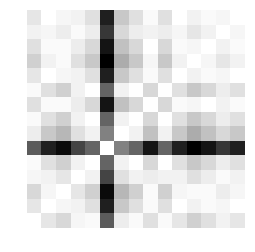

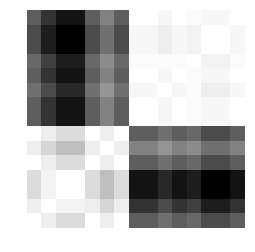

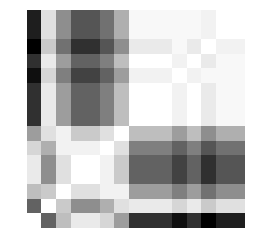

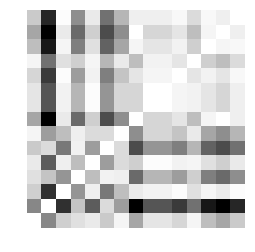

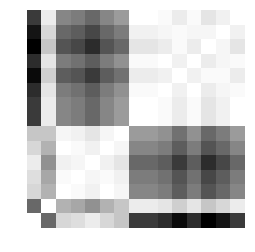

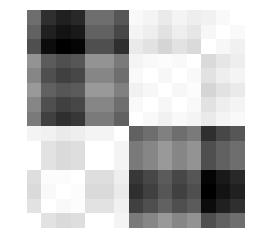

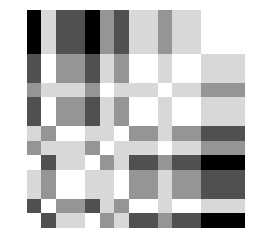

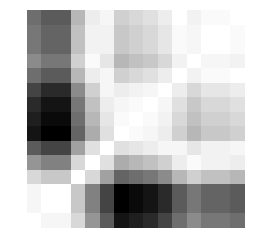

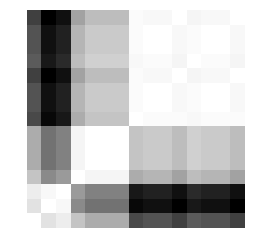

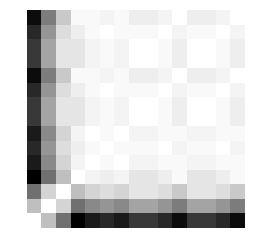

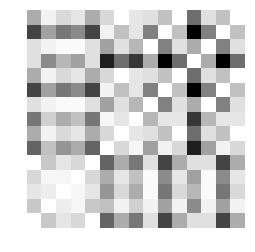

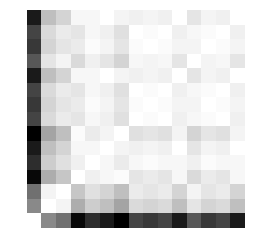

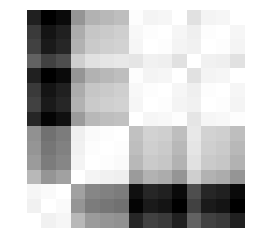

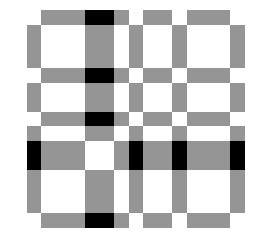

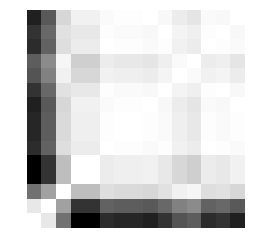

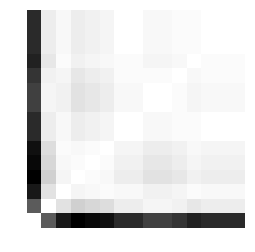

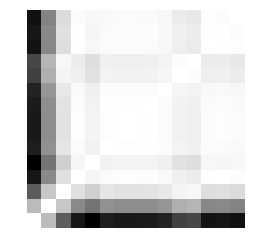

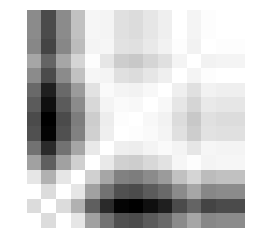

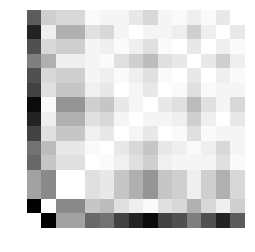

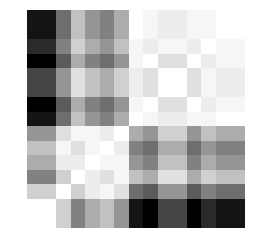

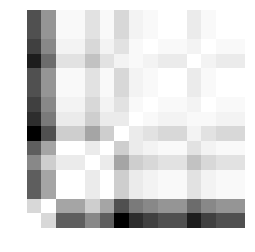

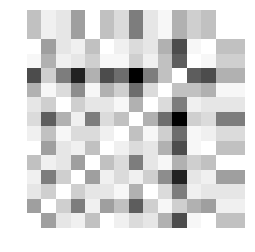

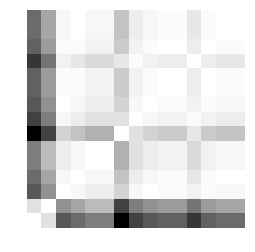

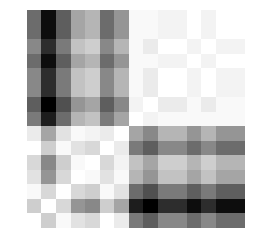

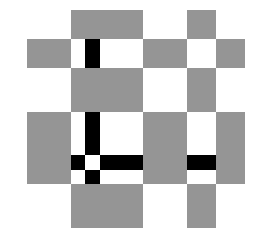

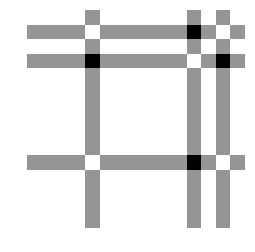

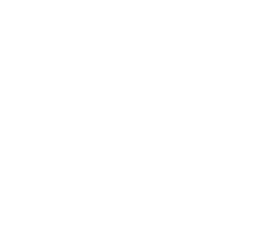

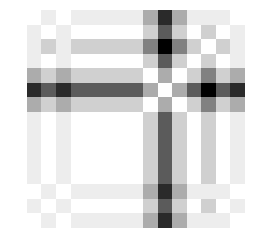

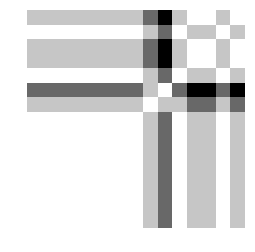

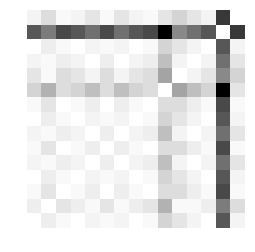

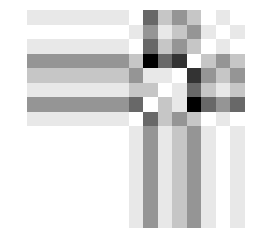

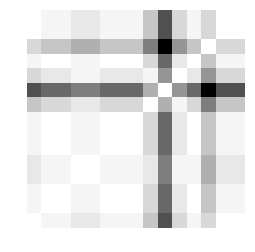

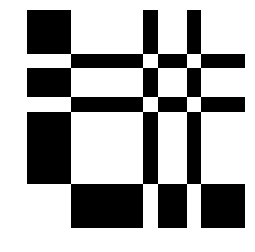

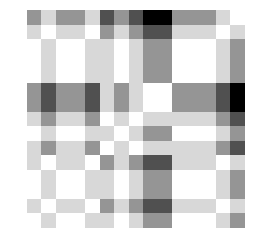

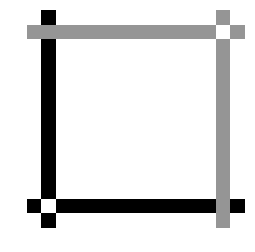

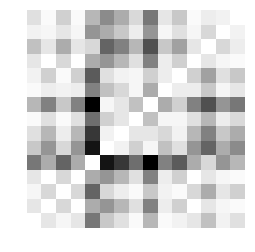

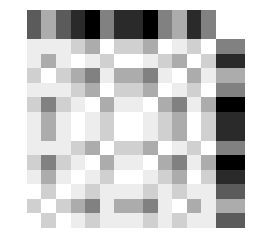

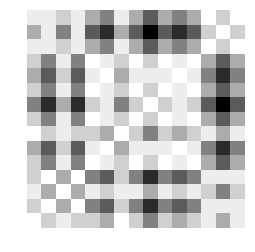

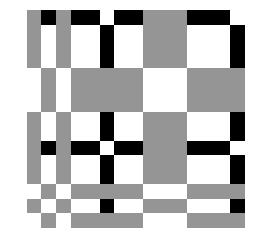

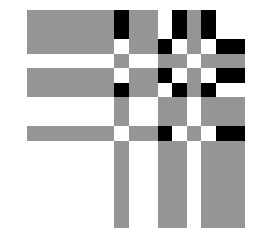

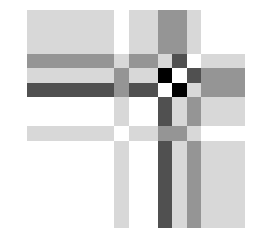

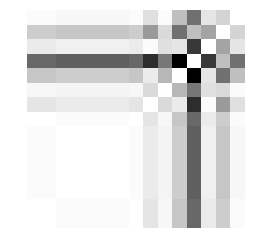

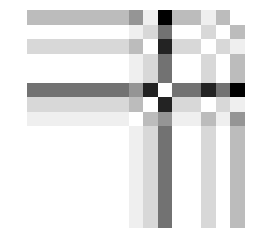

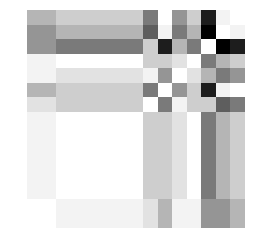

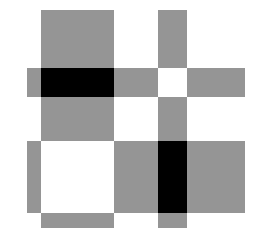

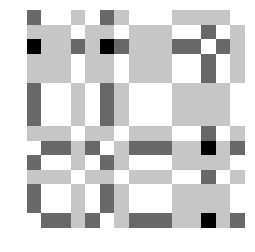

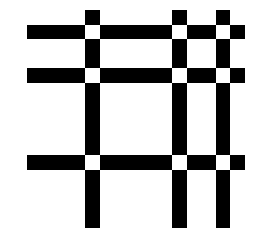

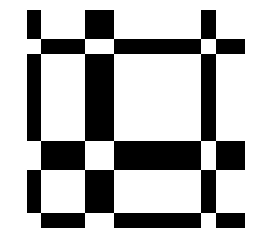

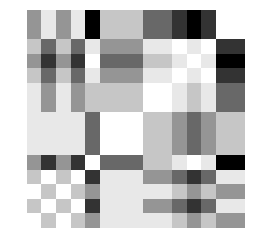

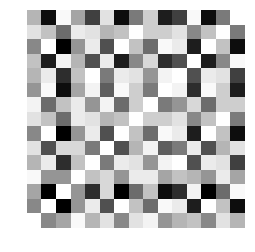

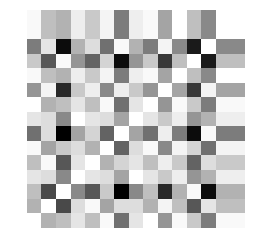

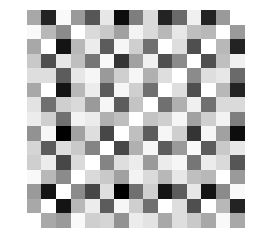

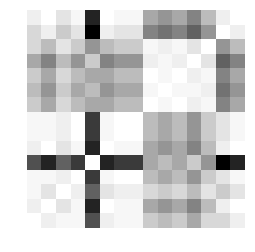

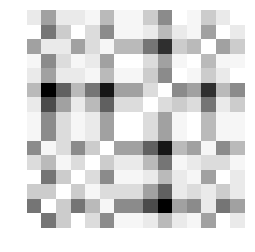

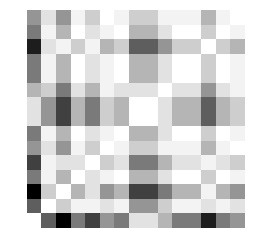

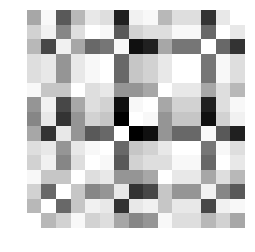

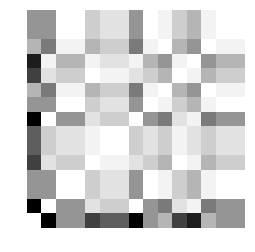

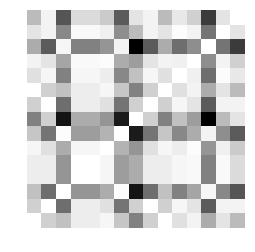

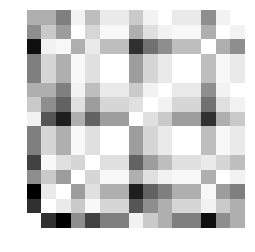

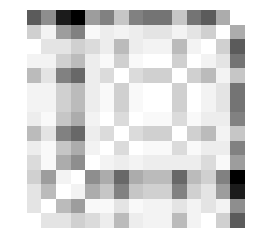

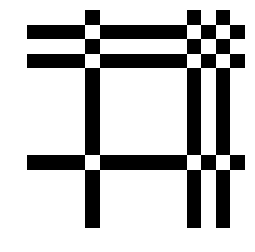

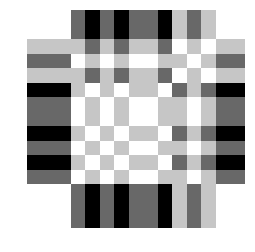

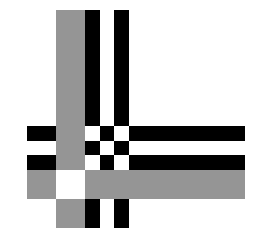

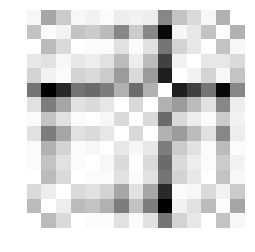

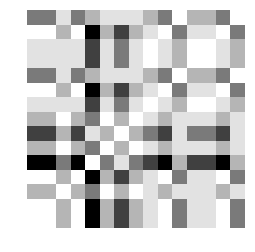

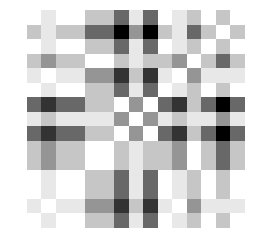

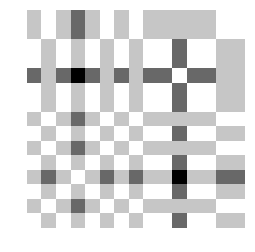

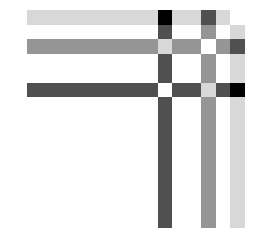

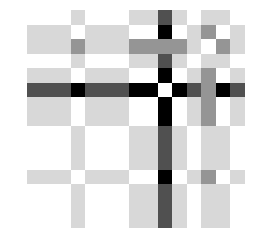

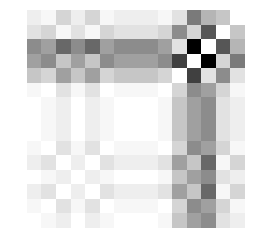

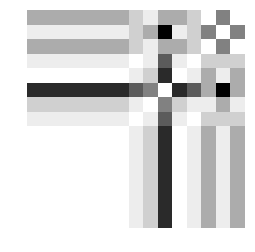

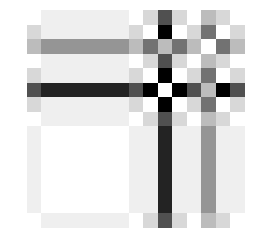

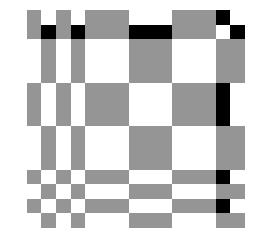

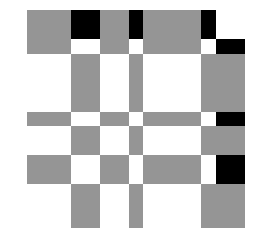

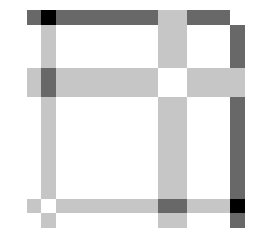

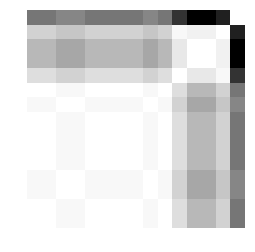

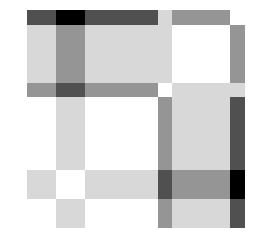

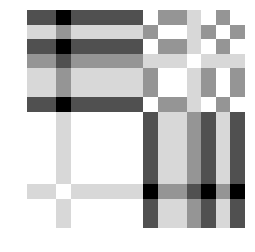

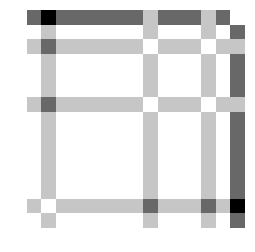

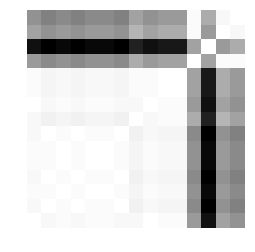

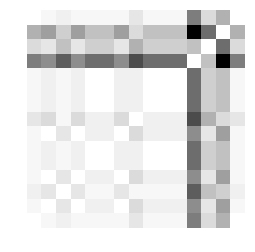

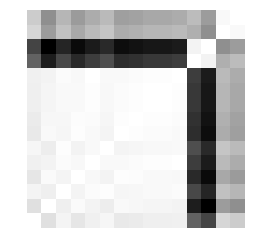

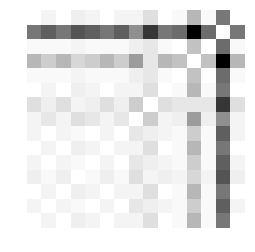

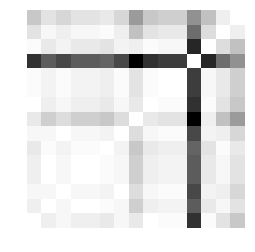

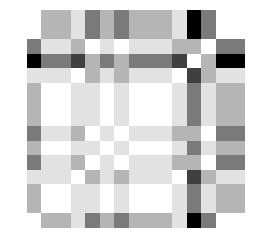

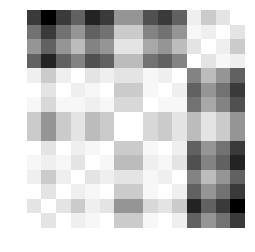

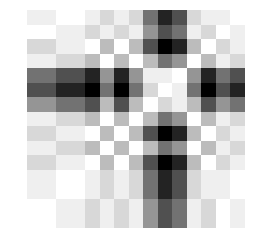

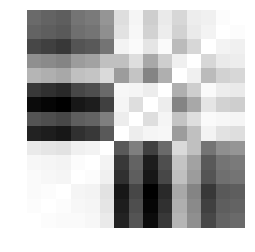

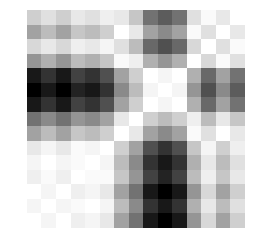

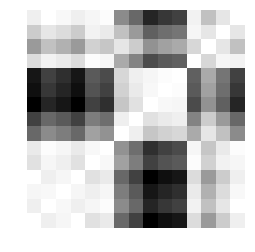

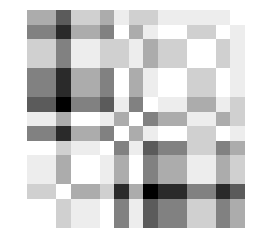

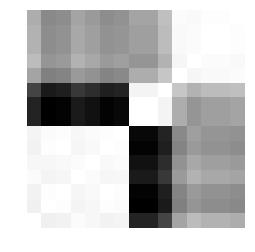

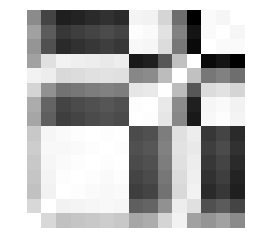

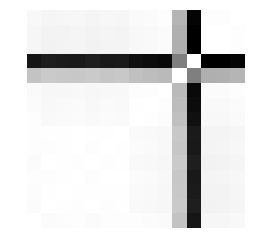

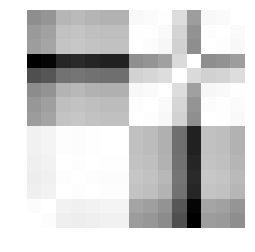

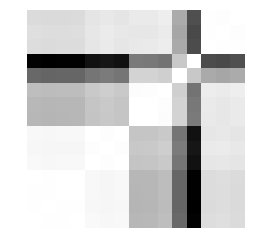

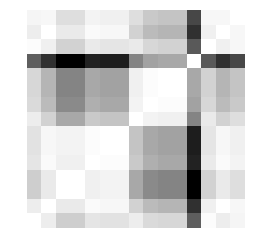

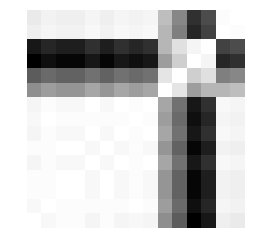

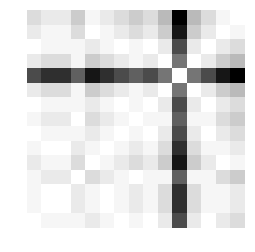

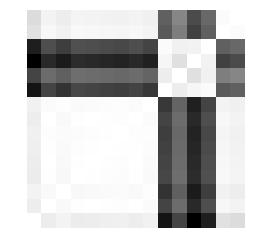

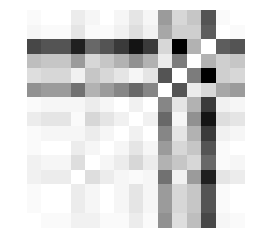

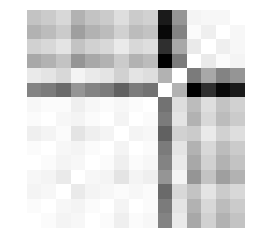

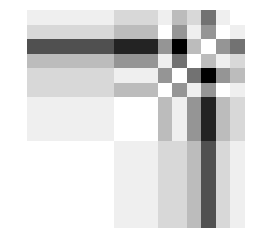

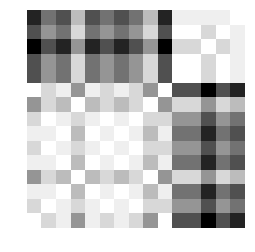

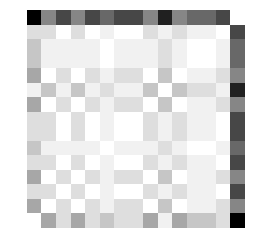

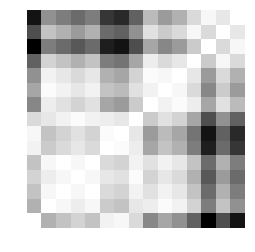

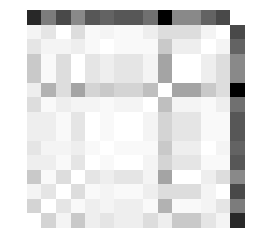

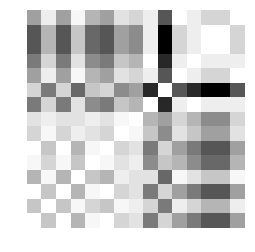

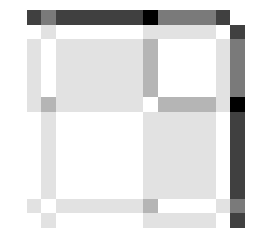

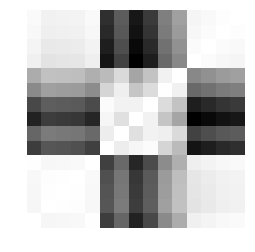

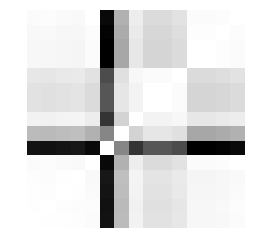

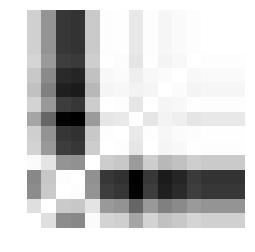

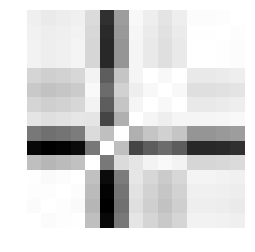

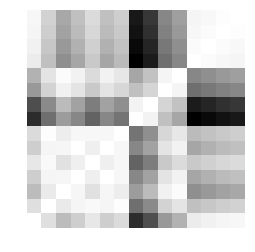

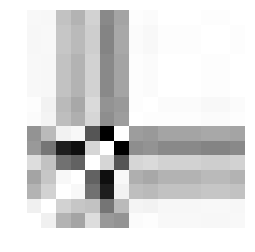

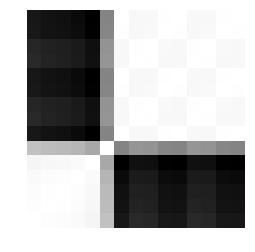

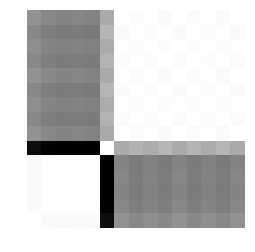

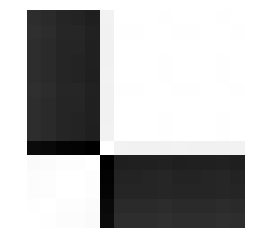

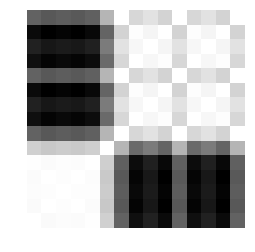

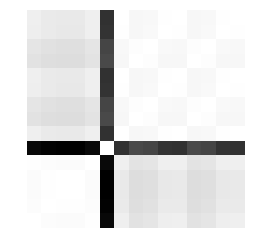

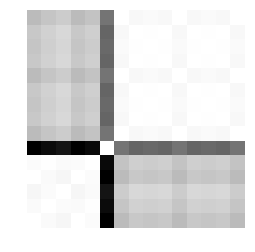

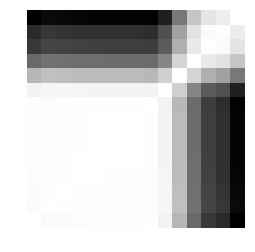

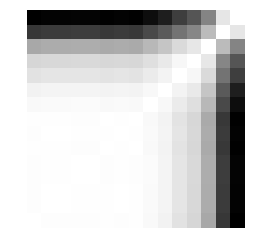

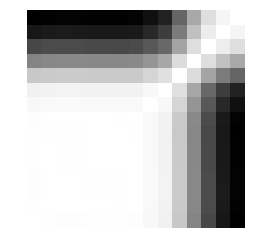

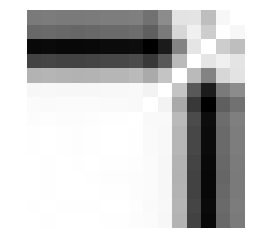

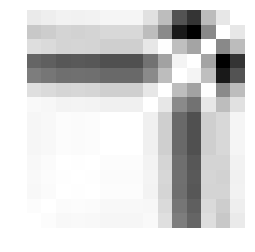

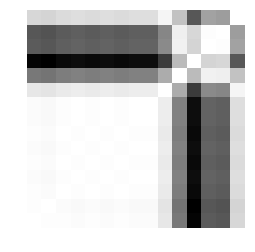

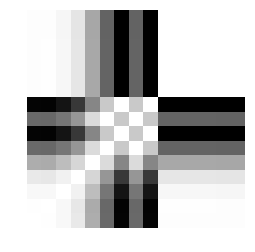

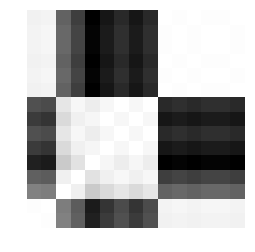

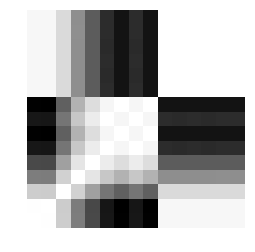

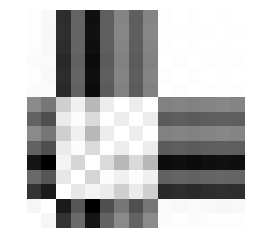

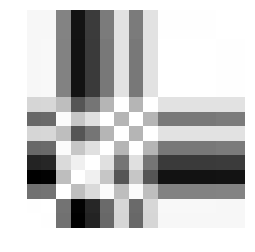

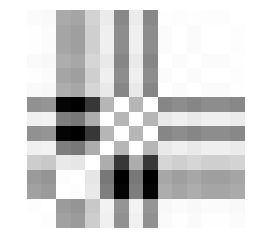

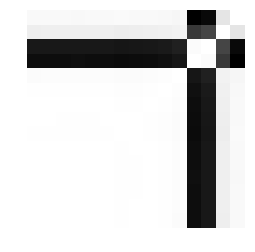

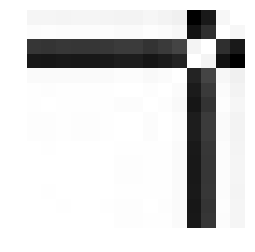

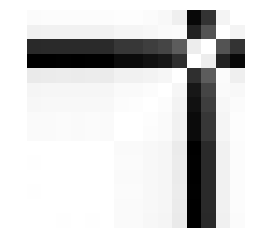

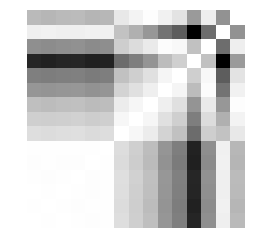

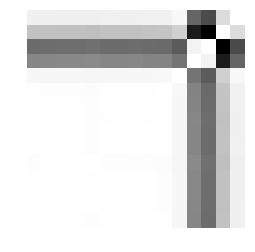

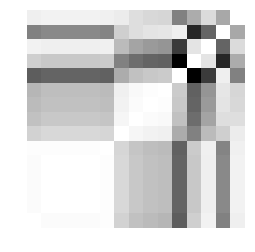

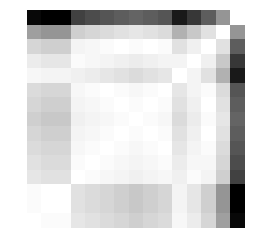

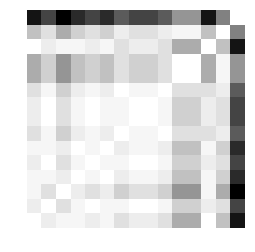

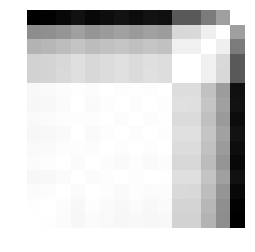

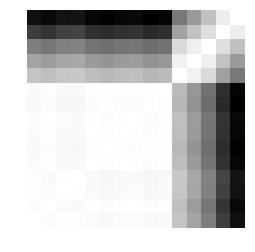

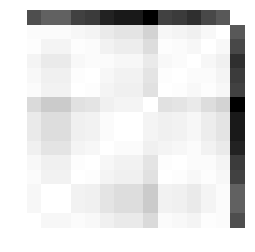

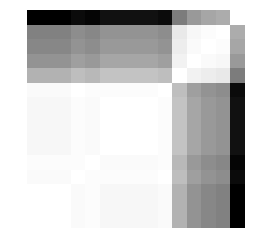

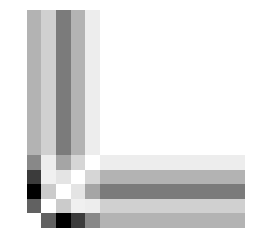

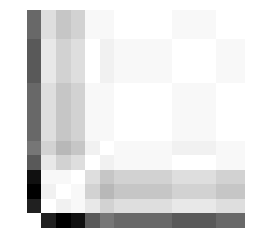

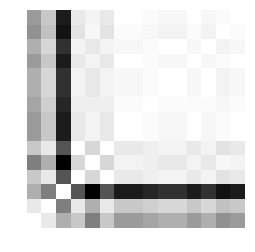

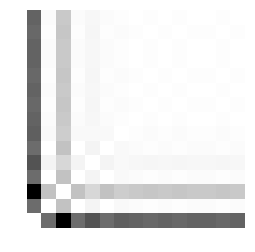

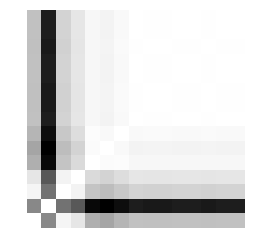

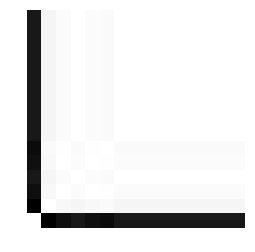

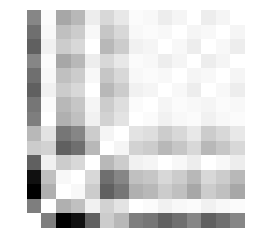

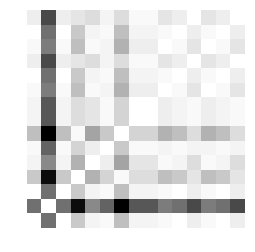

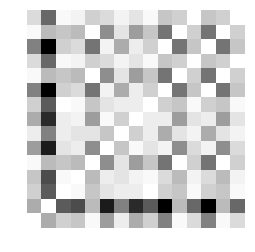

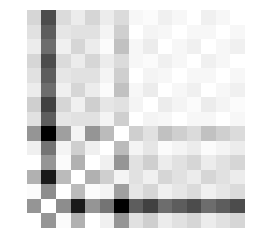

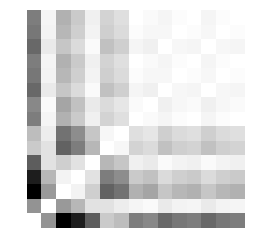

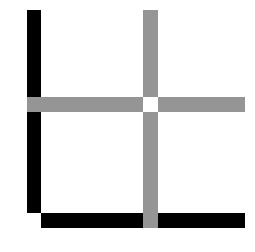

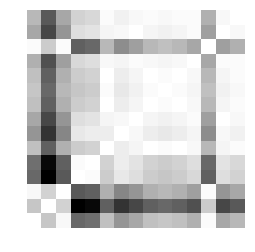

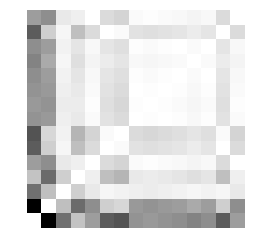

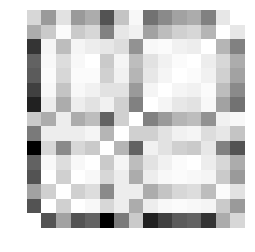

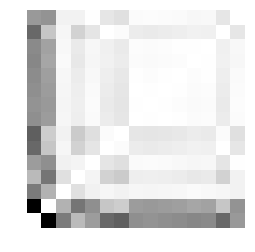

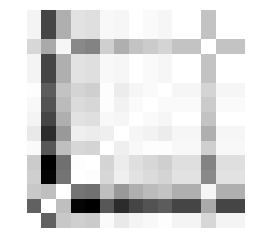

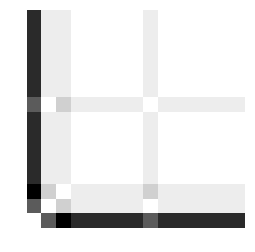

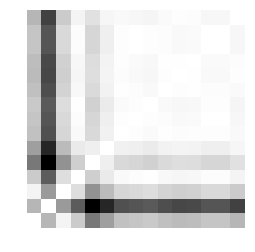

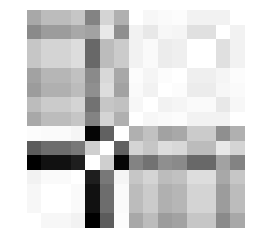

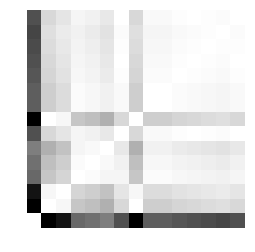

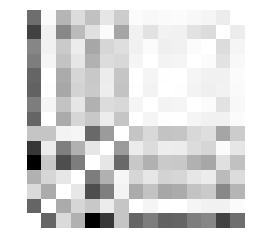

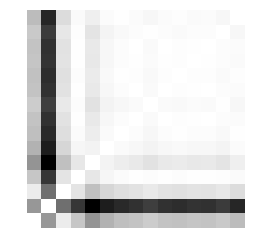

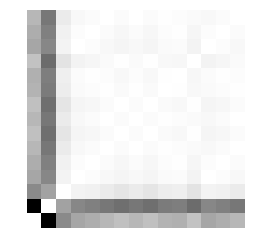

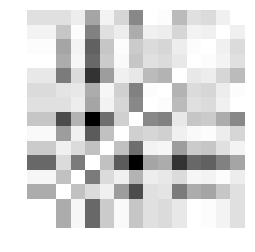

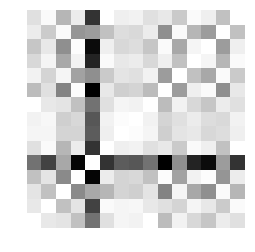

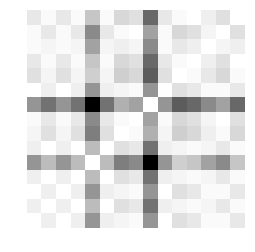

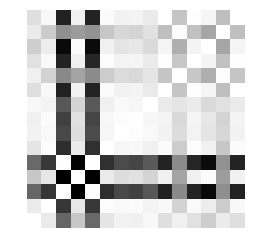

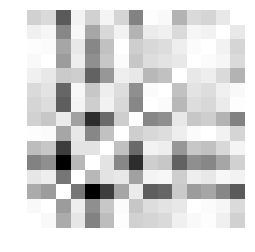

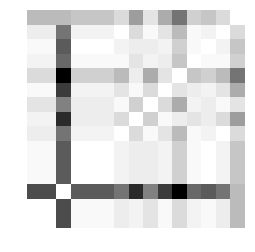

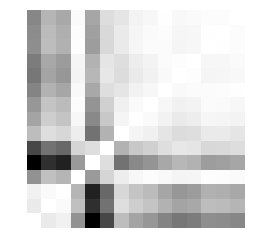

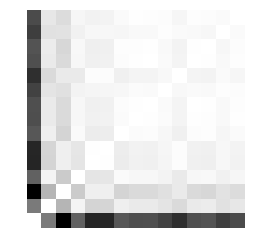

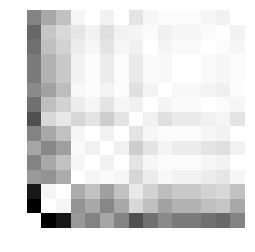

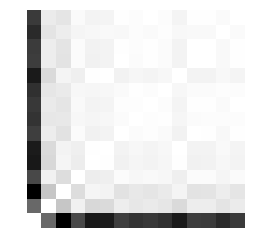

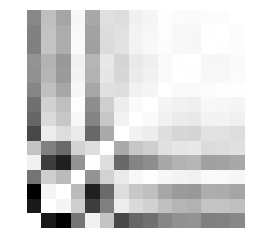

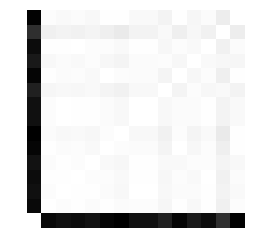

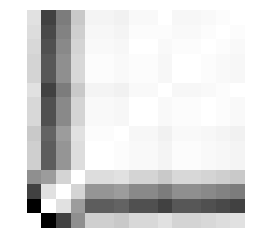

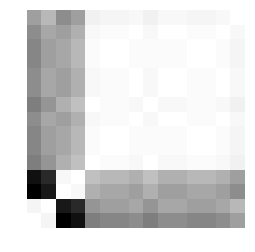

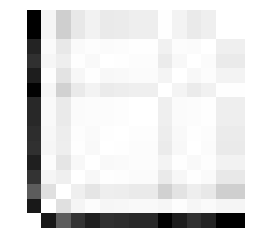

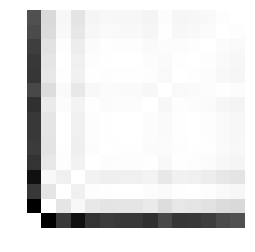

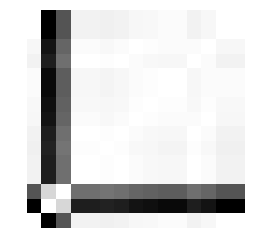

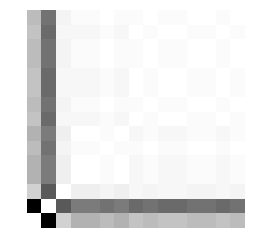

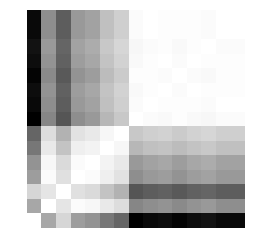

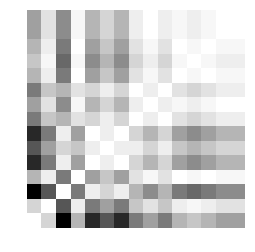

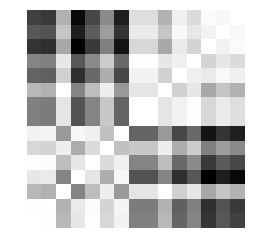

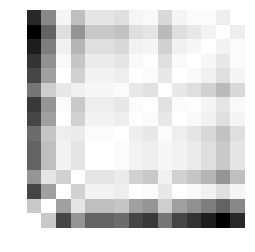

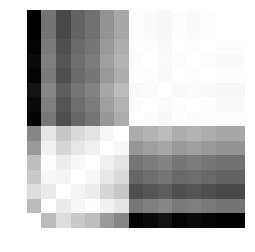

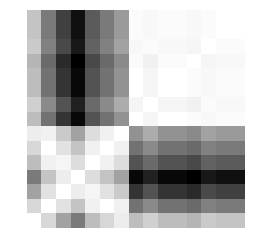

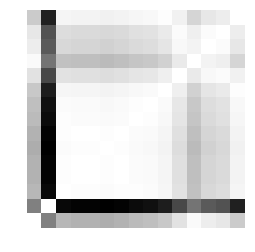

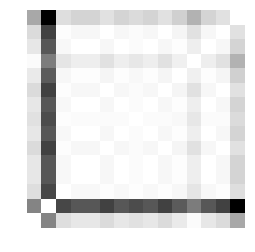

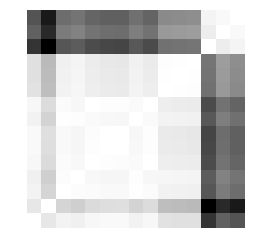

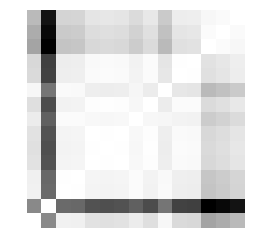

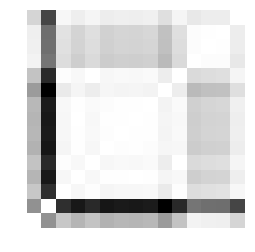

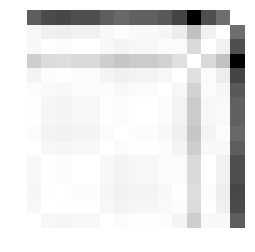

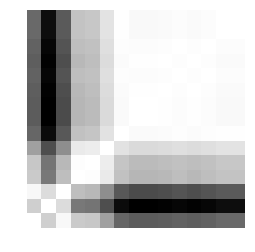

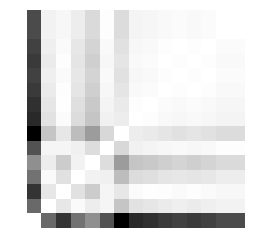

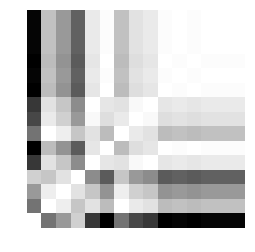

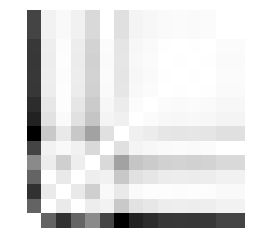

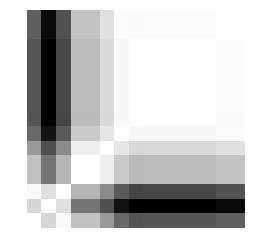

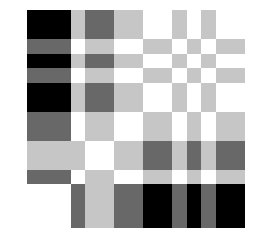

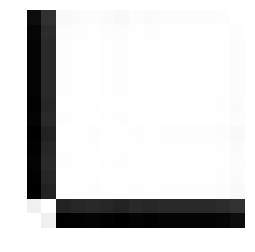

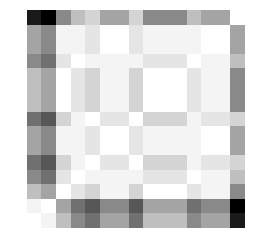

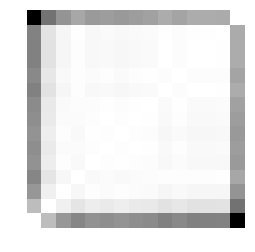

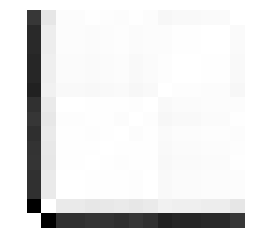

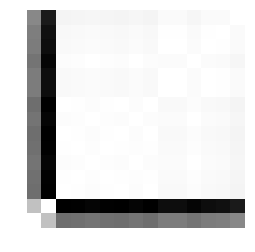

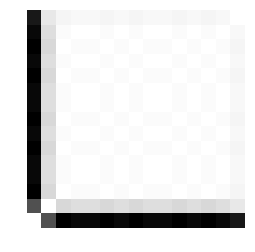

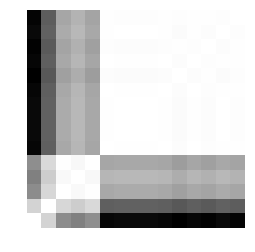

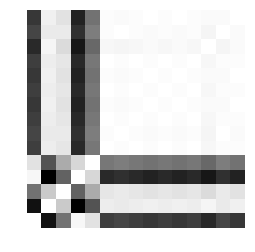

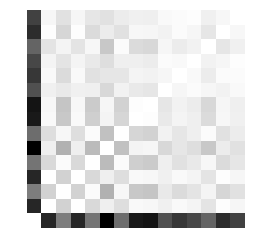

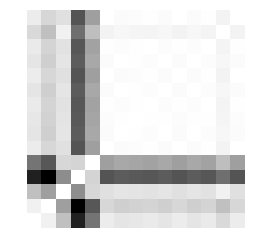

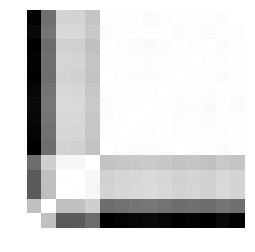

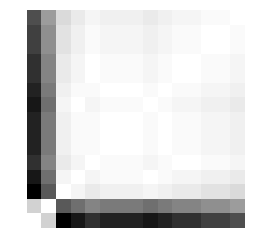

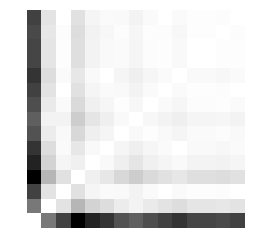

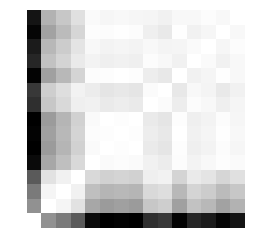

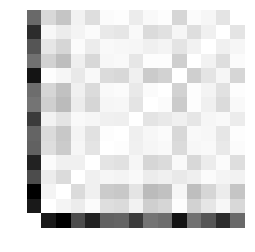

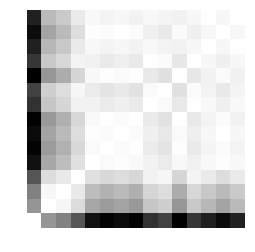

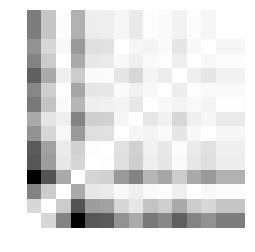

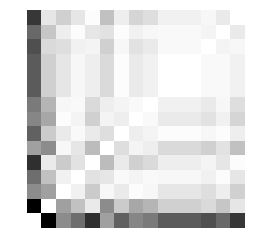

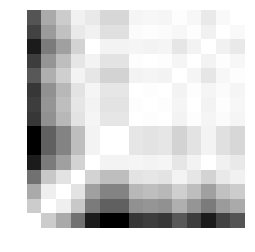

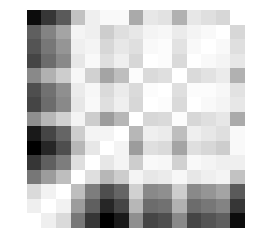

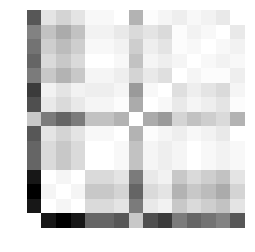

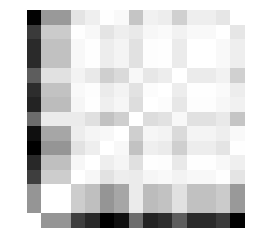

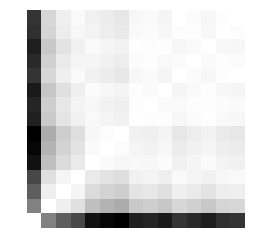

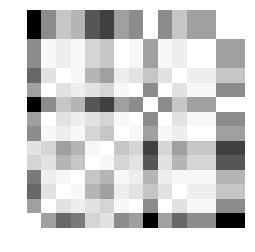

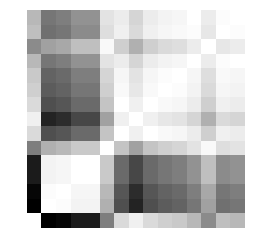

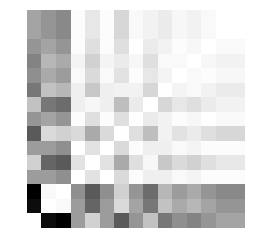

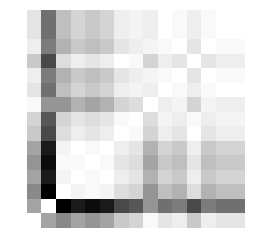

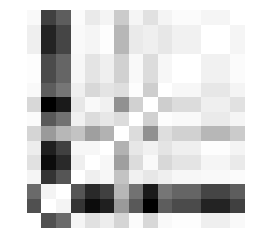

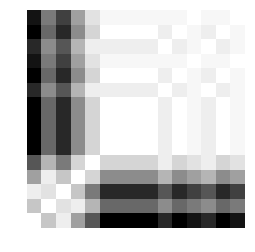

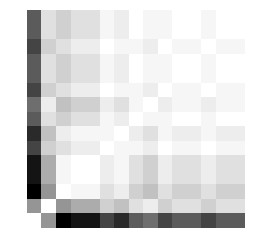

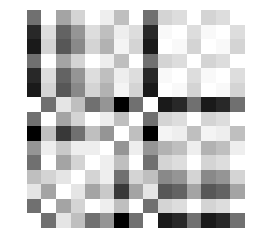

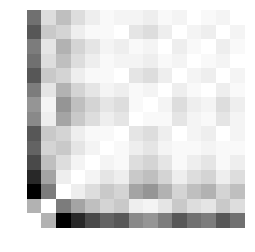

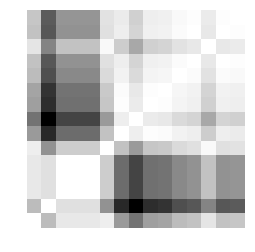

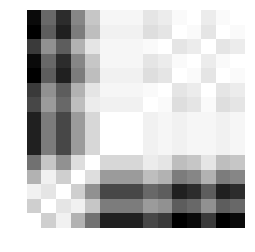

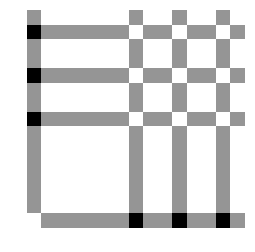

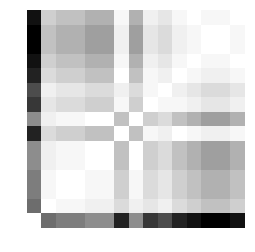

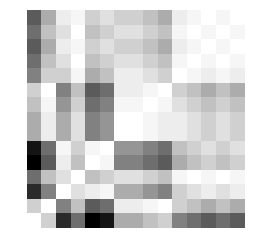

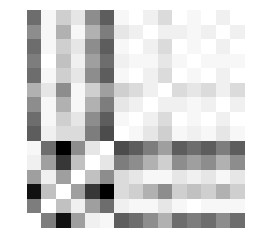

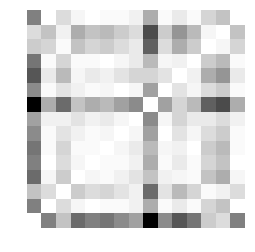

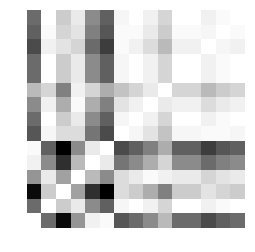

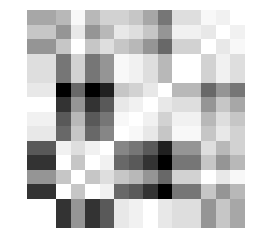

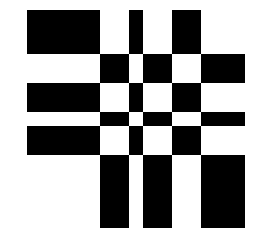

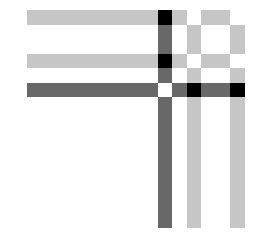

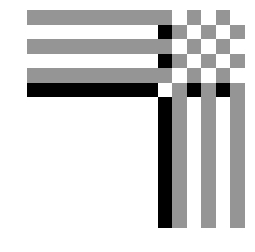

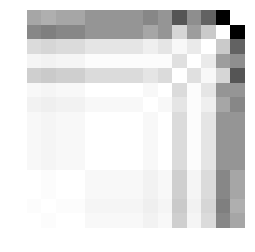

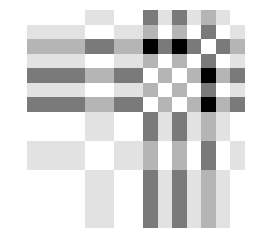

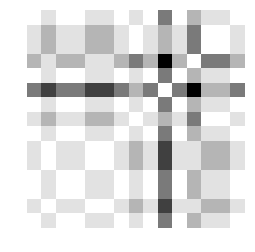

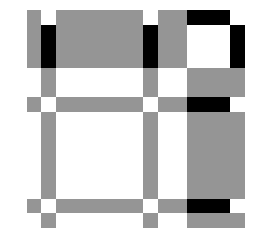

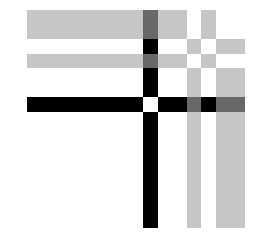

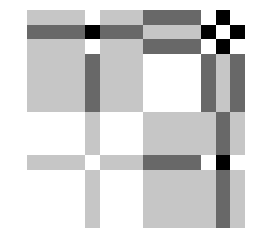

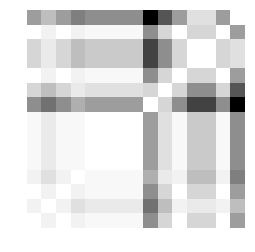

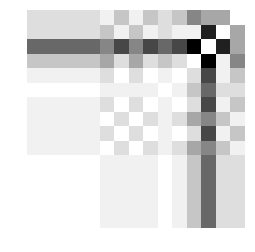

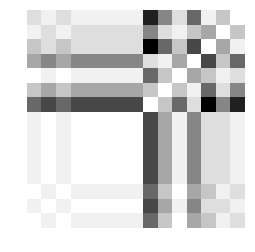

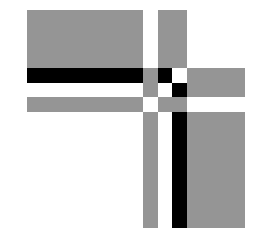

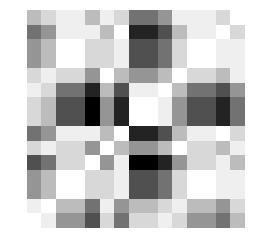

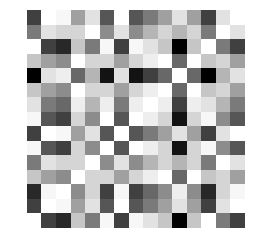

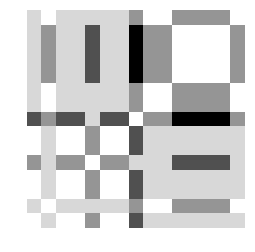

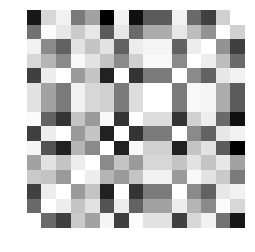

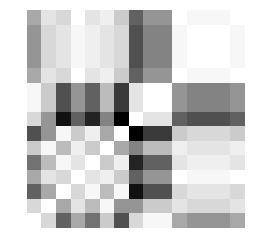

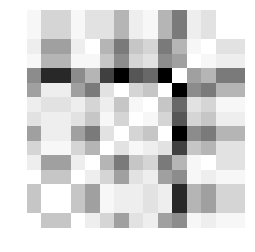

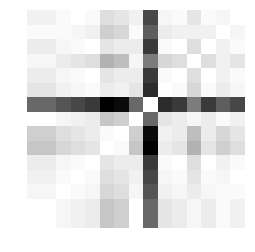

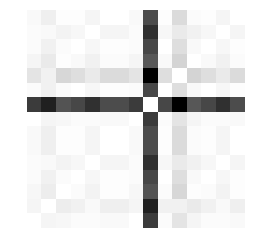

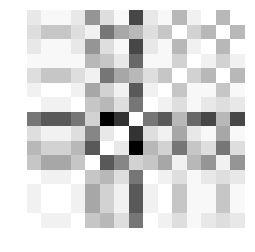

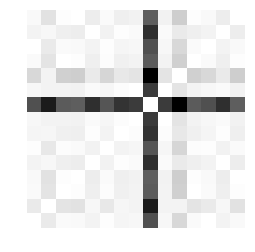

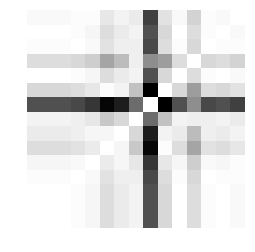

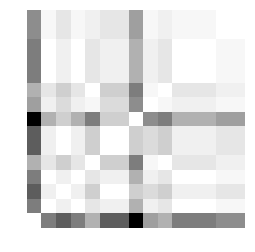

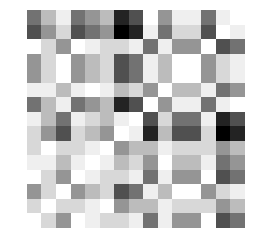

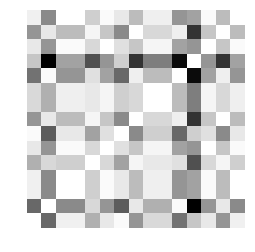

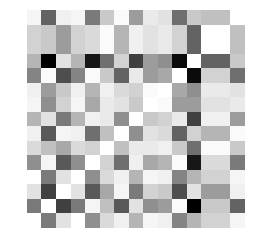

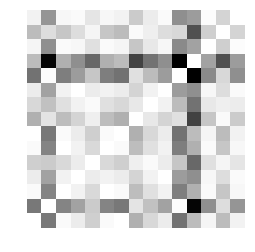

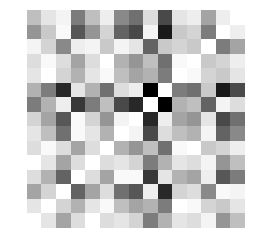

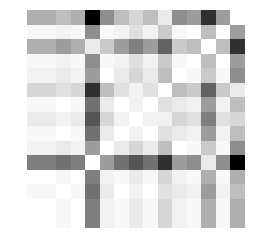

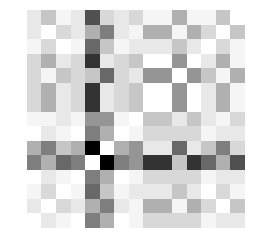

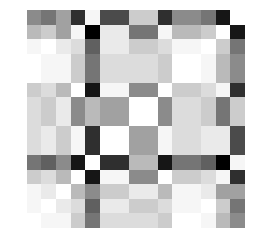

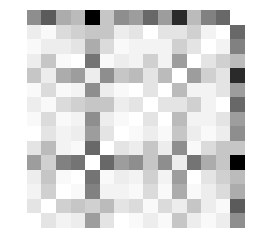

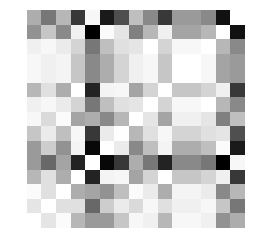

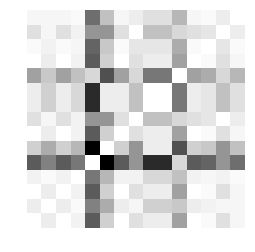

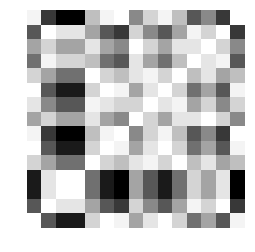

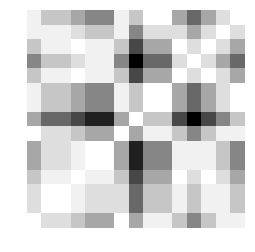

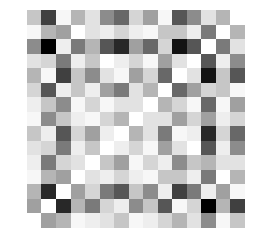

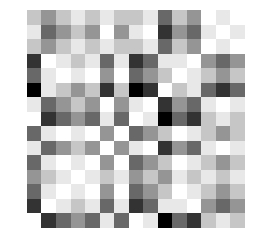

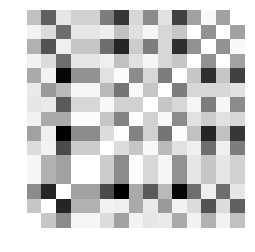

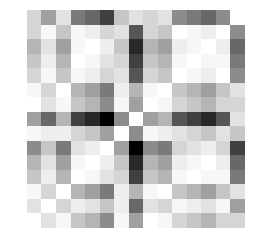

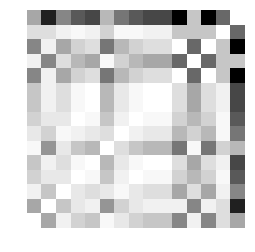

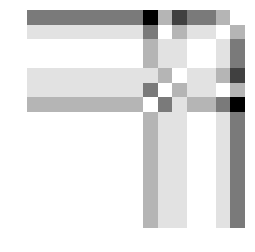

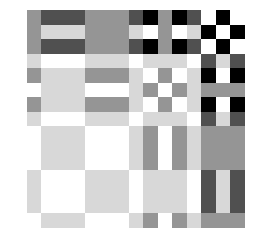

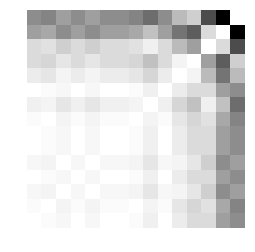

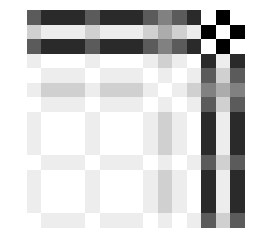

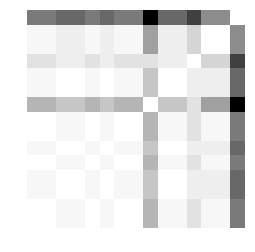

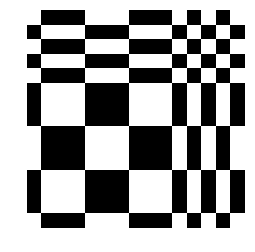

In [64]:
transformation(True,True,"recurrence_plots")

In [19]:
whole = '_all'
x = []
status_list=["status_1","status_2","status_3"]
for k in status_list:
    status_all  = pd.read_json("LP4_"+k+"_train"+whole+".json")
    x.append(status_all)
x = pd.concat(x,axis=0,ignore_index=True)
# x.head(20)

In [20]:
x

batch  sensor                                              value  status
0       17       5  [71.4285714286, 100.0, 84.126984127, 63.492063...       1
1       17       6  [100.0, 75.0, 75.0, 75.0, 50.0, 75.0, 75.0, 0....       1
2       20       1  [41.8032786885, 42.6229508197, 47.5409836066, ...       1
3       20       2  [55.3191489362, 60.2836879433, 62.4113475177, ...       1
4       20       3  [85.8152894388, 86.0362350862, 86.4339372514, ...       1
5       20       4  [14.2857142857, 8.3743842365, 1.9704433498, 5....       1
6       20       5  [0.0, 7.614213198, 12.690355329900001, 11.6751...       1
7       20       6  [94.3502824859, 93.2203389831, 90.9604519774, ...       1
8       26       1  [100.0, 86.3636363636, 86.3636363636, 95.45454...       1
9       26       2  [13.0434782609, 17.3913043478, 13.0434782609, ...       1
10      26       3  [100.0, 68.75, 63.75, 61.25, 63.75, 31.25, 46....       1
11      26       4  [100.0, 55.0, 95.0, 80.0, 80.0, 10.0, 25.0, 80...       1
12      26       5  [22.8571428571, 34.2857142857, 34.2857142857, ...       1
13      26       6  [10.0, 20.0, 13.3333333333, 16.6666666667, 3.3...       1
14      35       1  [18.1818181818, 18.1818181818, 9.0909090909, 9...       1
15      35       2  [33.3333333333, 33.3333333333, 33.3333333333, ...       1
16      35       3  [70.4545454545, 93.1818181818, 100.0, 77.27272...       1
17      35       4  [55.5555555556, 77.7777777778, 88.8888888889, ...       1
18      35       5  [72.2222222222, 83.3333333333, 88.8888888889, ...       1
19      35       6  [50.0, 50.0, 100.0, 60.0, 40.0, 60.0, 60.0, 0....       1
20      36       1  [92.8571428571, 100.0, 78.5714285714, 64.28571...       1
21      36       2  [100.0, 80.9523809524, 33.3333333333, 52.38095...       1
22      36       3  [81.4285714286, 90.0, 86.4285714286, 94.285714...       1
23      36       4  [38.0, 46.0, 62.0, 40.0, 26.0, 40.0, 32.0, 8.0...       1
24      36       5  [7.6923076923, 26.9230769231, 84.6153846154, 7...       1
25      36       6  [100.0, 100.0, 28.5714285714, 71.4285714286, 7...       1
26      39       1  [100.0, 75.0, 66.6666666667, 66.6666666667, 58...       1
27      39       2  [62.5, 100.0, 62.5, 50.0, 75.0, 62.5, 87.5, 75...       1
28      39       3  [69.23076923080001, 100.0, 53.8461538462, 61.5...       1
29      39       4  [100.0, 50.0, 80.0, 90.0, 50.0, 60.0, 20.0, 30...       1
..     ...     ...                                                ...     ...
462     79       1  [94.9438202247, 89.8876404494, 92.6966292135, ...       3
463     79       2  [100.0, 98.8764044944, 80.6179775281, 57.30337...       3
464     79       3  [100.0, 91.5573770492, 63.1967213115, 30.90163...       3
465     79       4  [94.0397350993, 100.0, 40.0662251656, 15.23178...       3
466     79       5  [6.2670299728, 0.0, 51.7711171662, 100.0, 92.3...       3
467     79       6  [0.0, 28.125, 6.25, 4.6875, 40.625, 96.875, 10...       3
468     82       1  [0.0, 8.5308056872, 39.8104265403, 77.72511848...       3
469     82       2  [100.0, 87.323943662, 59.1549295775, 23.943661...       3
470     82       3  [100.0, 89.1617273497, 56.9009314141, 17.95088...       3
471     82       4  [17.0731707317, 75.6097560976, 53.6585365854, ...       3
472     82       5  [100.0, 44.7368421053, 51.3157894737, 23.68421...       3
473     82       6  [70.8333333333, 41.6666666667, 62.5, 0.0, 37.5...       3
474     87       1  [98.2367758186, 98.7405541562, 92.9471032746, ...       3
475     87       2  [11.1111111111, 9.4017094017, 68.3760683761, 8...       3
476     87       3  [99.6021699819, 100.0, 69.2224231465, 40.86799...       3
477     87       4  [92.8571428571, 100.0, 9.5238095238, 26.785714...       3
478     87       5  [0.0, 0.8403361345, 63.2352941176, 100.0, 87.8...       3
479     87       6  [51.8867924528, 50.0, 98.1132075472, 100.0, 82...       3
480     89       1  [95.2173913043, 95.1086956522, 95.0, 94.891304...       3
481     89       2  [91.489

In [8]:
len(x)/6 

84.0

In [113]:
164*0.15

24.599999999999998

# CNN


In [1]:
import LP4_dataset_color

LP4 color 1 channel Function setting done


In [2]:
from pyts.visualization import plot_gasf,plot_gadf,plot_mtf,plot_recurrence_plots
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import torch.nn as nn
import time

In [3]:
cross = LP4_dataset_color.dataset_dataloader("",True,True,"gadf",1)

done


In [4]:
cross.train_x.size()

torch.Size([94, 3, 768, 128])

In [5]:
### import torch.nn as nn
F = open('LP4_color1.txt', 'w')  
# F = open('test', 'w') 
whole=[True]
method=["gasf","gadf","mtf"]
# method=[["gasf","gadf"],["mtf","gasf"],["mtf","gadf"]]
for l in method:
    for m in whole:
        for k in range(20):
            accuracy_matrix =[]
            start_time = time.time()
            for i in range(5):
                min_error=100
                min_lose=100
                count=0
                number=1
#                 cross = dataset_six_combine_method.dataset_dataloader(True,True,"mtf","gasf",i+1)
#                 cross = dataset_color.dataset_dataloader("color_",True,True,l,i+1)
#                 cross = dataset_color.dataset_dataloader("64_color_",True,True,l,i+1)
                cross = LP4_dataset_color.dataset_dataloader("",True,True,l,i+1)
                EPOCH = 50              # train the training data n times, to save time, we just train 1 epoch
                LR = 0.0023

                class CNN(nn.Module):
                    def __init__(self):
                        super(CNN, self).__init__()
                        self.conv1 =nn.Sequential( #卷基層   
                            nn.Conv2d(
                                in_channels  = 3  , # 圖片是有幾層的 若 RGB三層 灰階 1層
                                out_channels = 10, # 同時有幾個filter 進行掃描 會提取擠個特徵 代表下一層高度為擠
                                kernel_size  = 5  , # 一次畫出來的框 畫幾格 ex 5*5
                                stride       = 1  , # 每一個框框跳幾格
                                padding      = 2, # 在 5x5逐步掃描後會有少的格子 因此2代表在外面為兩圈的0
                                                    # if stride =1 padding = (kernel_size-1)/2
                            ),  # 過濾器 卷基層 蒐集圖片訊息 三維的空間  
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=2), #找出更重要的特徵  像是在2x2中 找到 最大的值
                        )                                # -> (16,64,64)
                        self.conv2 = nn.Sequential(
                            nn.Conv2d(10,20,5,1,2), # 輸入的是上一層的16 把輸出層在變大因此是32 其他不變
                            nn.ReLU(),
                            nn.MaxPool2d(2)             # -> (16,32,32)
                        )
#                         self.conv3 = nn.Sequential(
#                             nn.Conv2d(5,10,5,1,2), # 輸入的是上一層的16 把輸出層在變大因此是32 其他不變
#                             nn.ReLU(),
#                             nn.MaxPool2d(2)
#                         )

#                         self.out = nn.Linear(20*192*48,2) #hstack 
                        self.out = nn.Linear(20*192*32,3)#128
#                         self.out = nn.Linear(20*96*16,2)#64
                    def forward(self,x):

                        x=self.conv1(x)
                        x=self.conv2(x) #(batch.32.7.7)
#                         x=self.conv3(x)
                        x=x.view(x.size(0),-1) #將三維轉二維 (batch , 32*7*7)
                        output=self.out(x)
                        return output,x

                cnn=CNN()
                cnn.cuda()
            #     print(cnn)

                optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
                loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

                # following function (plot_with_labels) is for visualization, can be ignored if not interested

                # training and testing


                for epoch in range(EPOCH):
                    for step, (x, y) in enumerate(cross.train_loader):   # gives batch data, normalize x when iterate train_loader
            #             print(step)
                        b_x = Variable(x).cuda()   # batch x
                        b_y = Variable(y).cuda()   # batch y
            #             print("b_x.size:",b_x.size())
                        output = cnn(b_x)[0]             # cnn output
                        loss = loss_func(output, b_y)   # cross entropy loss
                        optimizer.zero_grad()           # clear gradients for this training step
                        loss.backward()                 # backpropagation, compute gradients
                        optimizer.step()                # apply gradients
                        test_output, last_layer = cnn(cross.test_x)
                        pred_y = torch.max(test_output, 1)[1].cuda().data.squeeze()
                        accuracy = sum(pred_y == cross.test_y).item() / float(cross.test_y.size(0))
                        error  = (1-accuracy)*100

                        if error<min_error:
                            min_error=error
                            min_lose=100
                            count=0
                        else:
                            count+=1
                            print(".",end="")

                        if error == min_error:
                            if loss.data.item()<min_lose:
                                min_lose=loss.data.item()
            #                     torch.save(cnn,'cnn_save/cnn'+str(number)+'.pkl')
                                number+=1
                #                 print('save!!')
                     
                #                 print('\ncount: ',count,'Epoch: ', epoch, '| train loss: %.15f' % loss.data[0], '| min validation error rate: %.20f' % min_error)
                        if count>=350:
                            break
                    torch.cuda.empty_cache()
                    if count>=350:
                        break
                print("min_error:",min_error)
                # print 10 predictions from test data
                # test_output, _ = cnn(test_x)
                # pred_y = torch.max(test_output, 1)[1].cuda().data.squeeze()

                # print(pred_y, 'prediction number')
                # print(test_y, 'real number')
                accuracy_matrix.append(min_error)
                print('\n number: ',number-1 ,min_error)

            
            print(accuracy_matrix)
            sum(accuracy_matrix) / float(len(accuracy_matrix))
#             F.write(str(l[0])+str(l[1])+","+str(m)+","+str(k)+",")
            F.write(str(l)+","+str(m)+","+str(k)+",")
            for i in accuracy_matrix:  
                F.write(str(i) + ",")
            F.write(str(sum(accuracy_matrix) / float(len(accuracy_matrix)))+",")
            F.write(str(time.time() - start_time)+"\n")
            print(time.time() - start_time)
            
F.close()  

done
.......................................................................................................................................................................................................................................................................................................................................................................................................min_error: 8.695652173913048

 number:  18 8.695652173913048
done
......................................................................................................................................................................................................................................................................................................................................................................................................min_error: 8.695652173913048

 number:  8 8.695652173913048
done
...................................................................................

............................................................................................................................................................................................................................................................................................................................................................................min_error: 8.695652173913048

 number:  17 8.695652173913048
done
..........................................................................................................................................................................................................................................................................................................................................................................................................min_error: 13.043478260869568

 number:  33 13.043478260869568
done
............................................................................................................

.............................................................................................................................................................................................................................................................................................................................................................................................min_error: 16.000000000000004

 number:  11 16.000000000000004
[0.0, 4.347826086956519, 17.391304347826086, 4.347826086956519, 16.000000000000004]
150.72789692878723
done
..........................................................................................................................................................................................................................................................................................................................................................................................................min_error: 4.347826086956519

 number:  11 4.347826086

...................................................................................................................................................................................................................................................................................................................................................................................min_error: 8.695652173913048

 number:  6 8.695652173913048
done
......................................................................................................................................................................................................................................................................................................................................................................................min_error: 13.043478260869568

 number:  26 13.043478260869568
done
..........................................................................................................................

..............................................................................................................................................................................................................................................................................................................................................................................................min_error: 13.043478260869568

 number:  17 13.043478260869568
done
..........................................................................................................................................................................................................................................................................................................................................................................................................min_error: 16.000000000000004

 number:  15 16.000000000000004
[17.391304347826086, 13.043478260869568, 17.391304347826086, 13.043478260869568, 16.000000000

........................................................................................................................................................................................................................................................................................................................................................................................min_error: 8.695652173913048

 number:  10 8.695652173913048
done
............................................................................................................................................................................................................................................................................................................................................................................................................min_error: 8.695652173913048

 number:  5 8.695652173913048
done
.................................................................................................

............................................................................................................................................................................................................................................................................................................................................................................................................min_error: 13.043478260869568

 number:  16 13.043478260869568
done
......................................................................................................................................................................................................................................................................................................................................................................................min_error: 13.043478260869568

 number:  20 13.043478260869568
done
..............................................................................................

.........................................................................................................................................................................................................................................................................................................................................................................................................min_error: 24.0

 number:  14 24.0
[17.391304347826086, 21.739130434782606, 13.043478260869568, 8.695652173913048, 24.0]
152.08625888824463
done
...................................................................................................................................................................................................................................................................................................................................................................................min_error: 26.086956521739136

 number:  10 26.086956521739136
done
.......................

.................................................................................................................................................................................................................................................................................................................................................................................................min_error: 21.739130434782606

 number:  13 21.739130434782606
done
............................................................................................................................................................................................................................................................................................................................................................................................................min_error: 21.739130434782606

 number:  25 21.739130434782606
done
...................................................................................

..................................................................................................................................................................................................................................................................................................................................................................................................min_error: 8.695652173913048

 number:  12 8.695652173913048
done
.................................................................................................................................................................................................................................................................................................................................................................................min_error: 19.999999999999996

 number:  20 19.999999999999996
[39.13043478260869, 26.086956521739136, 13.043478260869568, 8.695652173913048, 19.999999999999996]
145.0410590171814

...............................................................................................................................................................................................................................................................................................................................................................................min_error: 21.739130434782606

 number:  17 21.739130434782606
done
.............................................................................................................................................................................................................................................................................................................................................................................................min_error: 26.086956521739136

 number:  6 26.086956521739136
done
.....................................................................................................................

............................................................................................................................................................................................................................................................................................................................................................................................................min_error: 13.043478260869568

 number:  17 13.043478260869568
done
..............................................................................................................................................................................................................................................................................................................................................................................................min_error: 17.391304347826086

 number:  14 17.391304347826086
done
......................................................................................

............................................................................................................................................................................................................................................................................................................................................................................................................min_error: 16.000000000000004

 number:  9 16.000000000000004
[13.043478260869568, 8.695652173913048, 26.086956521739136, 17.391304347826086, 16.000000000000004]
148.96916675567627
done
..........................................................................................................................................................................................................................................................................................................................................................................................................min_error: 13.0434782608

.............................................................................................................................................................................................................................................................................................................................................................................min_error: 8.695652173913048

 number:  8 8.695652173913048
done
........................................................................................................................................................................................................................................................................................................................................................................................min_error: 8.695652173913048

 number:  9 8.695652173913048
done
.................................................................................................................................

.............................................................................................................................................................................................................................................................................................................................................................................................................min_error: 26.086956521739136

 number:  16 26.086956521739136
done
....................................................................................................................................................................................................................................................................................................................................................................................................min_error: 16.000000000000004

 number:  19 16.000000000000004
[17.391304347826086, 8.695652173913048, 8.695652173913048, 26.086956521739136, 16.00

..........................................................................................................................................................................................................................................................................................................................................................................................................min_error: 17.391304347826086

 number:  20 17.391304347826086
done
..............................................................................................................................................................................................................................................................................................................................................................................................min_error: 21.739130434782606

 number:  14 21.739130434782606
done
........................................................................................

done
..............................................................................................................................................................................................................................................................................................................................................................................................min_error: 13.043478260869568

 number:  12 13.043478260869568
done
.........................................................................................................................................................................................................................................................................................................................................................................................................min_error: 12.0

 number:  16 12.0
[39.13043478260869, 8.695652173913048, 13.043478260869568, 13.043478260869568, 12.0]
144.75062084197998
done
........

.....................................................................................................................................................................................................................................................................................................................................................................................min_error: 17.391304347826086

 number:  18 17.391304347826086
done
.........................................................................................................................................................................................................................................................................................................................................................................................................min_error: 13.043478260869568

 number:  23 13.043478260869568
done
..................................................................................................